In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)

**Importing Dataset**

In [7]:
df_train = pd.read_csv("train.csv" ,low_memory=False)

In [8]:
df_test = pd.read_csv("test.csv")

In [9]:
df_train.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            5           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            5           1         Noon         2       11          3   
3            4           0      Evening        15        9          4   
4            5           1         Noon         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

In [10]:
df_test.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0         1889       3           61     12871                  11   
1         1890       3           54      2569                 256   
2         1891       3           88      1473                  78   
3         1892       3           88      1473                  78   
4         1893       3           78      9020                  29   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            6           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            4           0      Evening         2       11          0   
3            3           0      Evening         2       11          0   
4            3           0         Noon         6       26          2   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            37         1                0         0         0             1   
1            22         0                0         0         0             0   
2            22         1                0         1         0             0   
3            22         1                0         1         0             0   
4            40         0                0         0         0             0   

   is_discount  is_price  is_urgency  target_audience  
0            0         0           0               14  
1            0         0           0               10  
2            0         0           0               10  
3            0         0           0               10  
4            0         0           0               14

# Concatenating train and test data set 

#### TO align the encoding we need to concatenate and encode and then split again 

In [11]:
df = pd.concat([df_train,df_test])
df

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0              1       3           76     10439                  39   
1              2       3           54      2570                 256   
2              3       3           59     12801                  16   
3              4       3           74     11037                  30   
4              5       3           80     10011                  27   
..           ...     ...          ...       ...                 ...   
757         2646       3           72      9081                  46   
758         2647       3           58     10537                  40   
759         2648       3          100      9132                  19   
760         2649       3           88      1451                  75   
761         2650       3           58     10537                  40   

     day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0              5           1         Noon         6       26          3   
1              5           1      Morning         2       11          0   
2              5           1         Noon         2       11          3   
3              4           0      Evening        15        9          4   
4              5           1         Noon         6       26          3   
..           ...         ...          ...       ...      ...        ...   
757            0           0      Evening        15        9          4   
758            3           0      Evening         2       11          5   
759            2           0      Evening        15        9          2   
760            1           0         Noon         2       11          0   
761            0           0      Evening         2       11          5   

     mean_CTA_len  is_image  is_personalised  is_quote  is_timer  \
0              29         0                0         0         0   
1              22         0                0         0         0   
2              23         1                0         1         0   
3              24         0                0         0         0   
4              31         0                0         1         0   
..            ...       ...              ...       ...       ...   
757            28         0                0         0         0   
758            27         0                0         0         0   
759            23         0                0         0         0   
760            22         0                0         1         0   
761            27         0                0         0         0   

     is_emoticons  is_discount  is_price  is_urgency  target_audience  \
0               0            0         0           0               14   
1               0            0         0           0               10   
2               0            0         0           0               16   
3               0            0         0           0               10   
4               0            0         0           0               14   
..            ...          ...       ...         ...              ...   
757             0            0         0           0                7   
758             0            0         0           0               16   
759             0            0         0           0               15   
760             0            0         0           0               10   
761             0            0         0           0                1   

     click_rate  
0      0.103079  
1      0.700000  
2      0.002769  
3      0.010868  
4      0.142826  
..          ...  
757         NaN  
758         NaN  
759         NaN  
760         NaN  
761         NaN  

[2650 rows x 22 columns]

# Exploratory Data Analysis(EDA)

In [12]:
df_train.shape,df_test.shape

((1888, 22), (762, 21))

In [13]:
df.describe()

campaign_id       sender  subject_len      body_len  \
count  2650.000000  2650.000000  2650.000000   2650.000000   
mean   1325.500000     4.353585    86.321887  14185.344151   
std     765.133431     3.236710    30.265757   7283.856366   
min       1.000000     0.000000     9.000000     23.000000   
25%     663.250000     3.000000    68.000000   9596.000000   
50%    1325.500000     3.000000    83.000000  12699.000000   
75%    1987.750000     3.000000    98.000000  17279.000000   
max    2650.000000    15.000000   265.000000  44491.000000   

       mean_paragraph_len  day_of_week   is_weekend     category      product  \
count         2650.000000  2650.000000  2650.000000  2650.000000  2650.000000   
mean            34.648679     2.834717     0.202642     9.846415    17.625283   
std             27.796352     1.771125     0.402043     5.306196    12.203647   
min              4.000000     0.000000     0.000000     0.000000     0.000000   
25%             21.000000     1.000000     0.000000     6.000000     9.000000   
50%             28.000000     3.000000     0.000000    10.000000    12.000000   
75%             40.000000     4.000000     0.000000    15.000000    26.000000   
max            498.000000     6.000000     1.000000    15.000000    44.000000   

         no_of_CTA  mean_CTA_len     is_image  is_personalised     is_quote  \
count  2650.000000   2650.000000  2650.000000      2650.000000  2650.000000   
mean      4.219623     30.210566     0.919245         0.052830     0.843019   
std       4.433314     11.596079     0.869499         0.223737     1.032265   
min       0.000000      0.000000     0.000000         0.000000     0.000000   
25%       2.000000     24.000000     0.000000         0.000000     0.000000   
50%       3.000000     29.000000     1.000000         0.000000     1.000000   
75%       5.000000     35.000000     2.000000         0.000000     1.000000   
max      49.000000    162.000000     6.000000         1.000000     6.000000   

       is_timer  is_emoticons  is_discount      is_price   is_urgency  \
count    2650.0   2650.000000  2650.000000   2650.000000  2650.000000   
mean        0.0      0.232453     0.037358     34.675472     0.112830   
std         0.0      0.735963     0.189674    497.222896     0.316445   
min         0.0      0.000000     0.000000      0.000000     0.000000   
25%         0.0      0.000000     0.000000      0.000000     0.000000   
50%         0.0      0.000000     0.000000      0.000000     0.000000   
75%         0.0      0.000000     0.000000      0.000000     0.000000   
max         0.0     17.000000     1.000000  14999.000000     1.000000   

       target_audience   click_rate  
count      2650.000000  1888.000000  
mean         11.638491     0.041888  
std           2.973373     0.084223  
min           0.000000     0.000000  
25%          12.000000     0.005413  
50%          12.000000     0.010686  
75%          12.000000     0.035589  
max          16.000000     0.897959

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         2650 non-null   int64  
 1   sender              2650 non-null   int64  
 2   subject_len         2650 non-null   int64  
 3   body_len            2650 non-null   int64  
 4   mean_paragraph_len  2650 non-null   int64  
 5   day_of_week         2650 non-null   int64  
 6   is_weekend          2650 non-null   int64  
 7   times_of_day        2650 non-null   object 
 8   category            2650 non-null   int64  
 9   product             2650 non-null   int64  
 10  no_of_CTA           2650 non-null   int64  
 11  mean_CTA_len        2650 non-null   int64  
 12  is_image            2650 non-null   int64  
 13  is_personalised     2650 non-null   int64  
 14  is_quote            2650 non-null   int64  
 15  is_timer            2650 non-null   int64  
 16  is_emot

In [15]:
df.isnull().sum()

campaign_id             0
sender                  0
subject_len             0
body_len                0
mean_paragraph_len      0
day_of_week             0
is_weekend              0
times_of_day            0
category                0
product                 0
no_of_CTA               0
mean_CTA_len            0
is_image                0
is_personalised         0
is_quote                0
is_timer                0
is_emoticons            0
is_discount             0
is_price                0
is_urgency              0
target_audience         0
click_rate            762
dtype: int64

In [16]:
df.isnull().sum()/len(df)

campaign_id           0.000000
sender                0.000000
subject_len           0.000000
body_len              0.000000
mean_paragraph_len    0.000000
day_of_week           0.000000
is_weekend            0.000000
times_of_day          0.000000
category              0.000000
product               0.000000
no_of_CTA             0.000000
mean_CTA_len          0.000000
is_image              0.000000
is_personalised       0.000000
is_quote              0.000000
is_timer              0.000000
is_emoticons          0.000000
is_discount           0.000000
is_price              0.000000
is_urgency            0.000000
target_audience       0.000000
click_rate            0.287547
dtype: float64

In [17]:
for label , content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        df[label] = content.astype("category").cat.as_ordered()

times_of_day


In [18]:
df.times_of_day.value_counts()

Evening    1849
Noon        622
Morning     179
Name: times_of_day, dtype: int64

In [19]:
df.is_timer.value_counts()

0    2650
Name: is_timer, dtype: int64

In [20]:
df.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            5           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            5           1         Noon         2       11          3   
3            4           0      Evening        15        9          4   
4            5           1         Noon         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

In [21]:
drop_col=['campaign_id','is_timer']

In [22]:
df.drop(columns=drop_col,inplace =True)
df

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0         3           76     10439                  39            5   
1         3           54      2570                 256            5   
2         3           59     12801                  16            5   
3         3           74     11037                  30            4   
4         3           80     10011                  27            5   
..      ...          ...       ...                 ...          ...   
757       3           72      9081                  46            0   
758       3           58     10537                  40            3   
759       3          100      9132                  19            2   
760       3           88      1451                  75            1   
761       3           58     10537                  40            0   

     is_weekend times_of_day  category  product  no_of_CTA  mean_CTA_len  \
0             1         Noon         6       26          3            29   
1             1      Morning         2       11          0            22   
2             1         Noon         2       11          3            23   
3             0      Evening        15        9          4            24   
4             1         Noon         6       26          3            31   
..          ...          ...       ...      ...        ...           ...   
757           0      Evening        15        9          4            28   
758           0      Evening         2       11          5            27   
759           0      Evening        15        9          2            23   
760           0         Noon         2       11          0            22   
761           0      Evening         2       11          5            27   

     is_image  is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0           0                0         0             0            0         0   
1           0                0         0             0            0         0   
2           1                0         1             0            0         0   
3           0                0         0             0            0         0   
4           0                0         1             0            0         0   
..        ...              ...       ...           ...          ...       ...   
757         0                0         0             0            0         0   
758         0                0         0             0            0         0   
759         0                0         0             0            0         0   
760         0                0         1             0            0         0   
761         0                0         0             0            0         0   

     is_urgency  target_audience  click_rate  
0             0               14    0.103079  
1             0               10    0.700000  
2             0               16    0.002769  
3             0               10    0.010868  
4             0               14    0.142826  
..          ...              ...         ...  
757           0                7         NaN  
758           0               16         NaN  
759           0               15         NaN  
760           0               10         NaN  
761           0                1         NaN  

[2650 rows x 20 columns]

## Encoding

In [23]:
df_app = pd.get_dummies(df['times_of_day'] , drop_first=1)

In [24]:
df=pd.concat([df,df_app],axis=1)
df.head()

sender  subject_len  body_len  mean_paragraph_len  day_of_week  is_weekend  \
0       3           76     10439                  39            5           1   
1       3           54      2570                 256            5           1   
2       3           59     12801                  16            5           1   
3       3           74     11037                  30            4           0   
4       3           80     10011                  27            5           1   

  times_of_day  category  product  no_of_CTA  mean_CTA_len  is_image  \
0         Noon         6       26          3            29         0   
1      Morning         2       11          0            22         0   
2         Noon         2       11          3            23         1   
3      Evening        15        9          4            24         0   
4         Noon         6       26          3            31         0   

   is_personalised  is_quote  is_emoticons  is_discount  is_price  is_urgency  \
0                0         0             0            0         0           0   
1                0         0             0            0         0           0   
2                0         1             0            0         0           0   
3                0         0             0            0         0           0   
4                0         1             0            0         0           0   

   target_audience  click_rate  Morning  Noon  
0               14    0.103079        0     1  
1               10    0.700000        1     0  
2               16    0.002769        0     1  
3               10    0.010868        0     0  
4               14    0.142826        0     1

In [25]:
df.drop(['times_of_day'] ,axis=1,inplace=True)

In [26]:
df

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0         3           76     10439                  39            5   
1         3           54      2570                 256            5   
2         3           59     12801                  16            5   
3         3           74     11037                  30            4   
4         3           80     10011                  27            5   
..      ...          ...       ...                 ...          ...   
757       3           72      9081                  46            0   
758       3           58     10537                  40            3   
759       3          100      9132                  19            2   
760       3           88      1451                  75            1   
761       3           58     10537                  40            0   

     is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0             1         6       26          3            29         0   
1             1         2       11          0            22         0   
2             1         2       11          3            23         1   
3             0        15        9          4            24         0   
4             1         6       26          3            31         0   
..          ...       ...      ...        ...           ...       ...   
757           0        15        9          4            28         0   
758           0         2       11          5            27         0   
759           0        15        9          2            23         0   
760           0         2       11          0            22         0   
761           0         2       11          5            27         0   

     is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0                  0         0             0            0         0   
1                  0         0             0            0         0   
2                  0         1             0            0         0   
3                  0         0             0            0         0   
4                  0         1             0            0         0   
..               ...       ...           ...          ...       ...   
757                0         0             0            0         0   
758                0         0             0            0         0   
759                0         0             0            0         0   
760                0         1             0            0         0   
761                0         0             0            0         0   

     is_urgency  target_audience  click_rate  Morning  Noon  
0             0               14    0.103079        0     1  
1             0               10    0.700000        1     0  
2             0               16    0.002769        0     1  
3             0               10    0.010868        0     0  
4             0               14    0.142826        0     1  
..          ...              ...         ...      ...   ...  
757           0                7         NaN        0     0  
758           0               16         NaN        0     0  
759           0               15         NaN        0     0  
760           0               10         NaN        0     1  
761           0                1         NaN        0     0  

[2650 rows x 21 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              2650 non-null   int64  
 1   subject_len         2650 non-null   int64  
 2   body_len            2650 non-null   int64  
 3   mean_paragraph_len  2650 non-null   int64  
 4   day_of_week         2650 non-null   int64  
 5   is_weekend          2650 non-null   int64  
 6   category            2650 non-null   int64  
 7   product             2650 non-null   int64  
 8   no_of_CTA           2650 non-null   int64  
 9   mean_CTA_len        2650 non-null   int64  
 10  is_image            2650 non-null   int64  
 11  is_personalised     2650 non-null   int64  
 12  is_quote            2650 non-null   int64  
 13  is_emoticons        2650 non-null   int64  
 14  is_discount         2650 non-null   int64  
 15  is_price            2650 non-null   int64  
 16  is_urge

##  Creating another copy of dataset

In [28]:
df2 =df.copy()

#  Feature Selection

In [29]:
df2.corr()

sender  subject_len  body_len  mean_paragraph_len  \
sender              1.000000    -0.105193  0.200798            0.059549   
subject_len        -0.105193     1.000000  0.413432           -0.203044   
body_len            0.200798     0.413432  1.000000           -0.478160   
mean_paragraph_len  0.059549    -0.203044 -0.478160            1.000000   
day_of_week        -0.048804    -0.048937 -0.076340           -0.020135   
is_weekend         -0.065525    -0.052177 -0.080141           -0.013456   
category            0.185159     0.022331  0.028715            0.051148   
product             0.076352    -0.020213 -0.034605           -0.062919   
no_of_CTA           0.107736     0.399823  0.557193           -0.171655   
mean_CTA_len        0.008355     0.175202  0.092141            0.034831   
is_image           -0.096891    -0.026138 -0.025574           -0.092891   
is_personalised     0.133188    -0.278186 -0.217294            0.163053   
is_quote            0.021252     0.107018  0.188864           -0.087795   
is_emoticons       -0.077463     0.084513 -0.035357           -0.029739   
is_discount        -0.039357     0.118047  0.048484           -0.027081   
is_price            0.015039     0.020791  0.016469            0.003863   
is_urgency         -0.056657     0.107280  0.038375           -0.043130   
target_audience    -0.116941    -0.025382 -0.093880           -0.083364   
click_rate         -0.031398    -0.180143 -0.247866            0.178042   
Morning             0.043076    -0.060454 -0.045876            0.076930   
Noon                0.003596     0.033625  0.108872           -0.066686   

                    day_of_week  is_weekend  category   product  no_of_CTA  \
sender                -0.048804   -0.065525  0.185159  0.076352   0.107736   
subject_len           -0.048937   -0.052177  0.022331 -0.020213   0.399823   
body_len              -0.076340   -0.080141  0.028715 -0.034605   0.557193   
mean_paragraph_len    -0.020135   -0.013456  0.051148 -0.062919  -0.171655   
day_of_week            1.000000    0.722991 -0.056488 -0.000002  -0.049558   
is_weekend             0.722991    1.000000 -0.059727 -0.015602  -0.034086   
category              -0.056488   -0.059727  1.000000  0.019923  -0.030933   
product               -0.000002   -0.015602  0.019923  1.000000   0.027527   
no_of_CTA             -0.049558   -0.034086 -0.030933  0.027527   1.000000   
mean_CTA_len          -0.007293   -0.031990  0.135744  0.055545   0.178183   
is_image               0.014372    0.037110 -0.033127  0.038736  -0.007737   
is_personalised       -0.057026   -0.056109  0.128305  0.058270  -0.147190   
is_quote              -0.031954   -0.037022 -0.076149 -0.095830   0.082602   
is_emoticons          -0.000054    0.001496  0.098369  0.008651  -0.024330   
is_discount           -0.037799   -0.039907  0.156861 -0.004714   0.045009   
is_price              -0.001420   -0.025723  0.058601 -0.040998  -0.014210   
is_urgency             0.026551    0.004184  0.185010 -0.109675  -0.007445   
target_audience        0.083415    0.049620 -0.025629  0.054795  -0.015052   
click_rate             0.086372    0.114138 -0.167756  0.121602  -0.172637   
Morning                0.160132    0.230899 -0.011198  0.019480   0.002269   
Noon                   0.120074    0.137237 -0.196104  0.066776   0.080027   

                    mean_CTA_len  is_image  is_personalised  is_quote  \
sender                  0.008355 -0.096891         0.133188  0.021252   
subject_len             0.175202 -0.026138        -0.278186  0.107018   
body_len                0.092141 -0.025574        -0.217294  0.188864   
mean_paragraph_len      0.034831 -0.092891         0.163053 -0.087795   
day_of_week            -0.007293  0.014372        -0.057026 -0.031954   
is_weekend             -0.031990  0.037110        -0.056109 -0.037022   
category                0.135744 -0.033127         0.128305 -0.076149   
product                 0.055545  0.038736         0.058270 -0.095830 

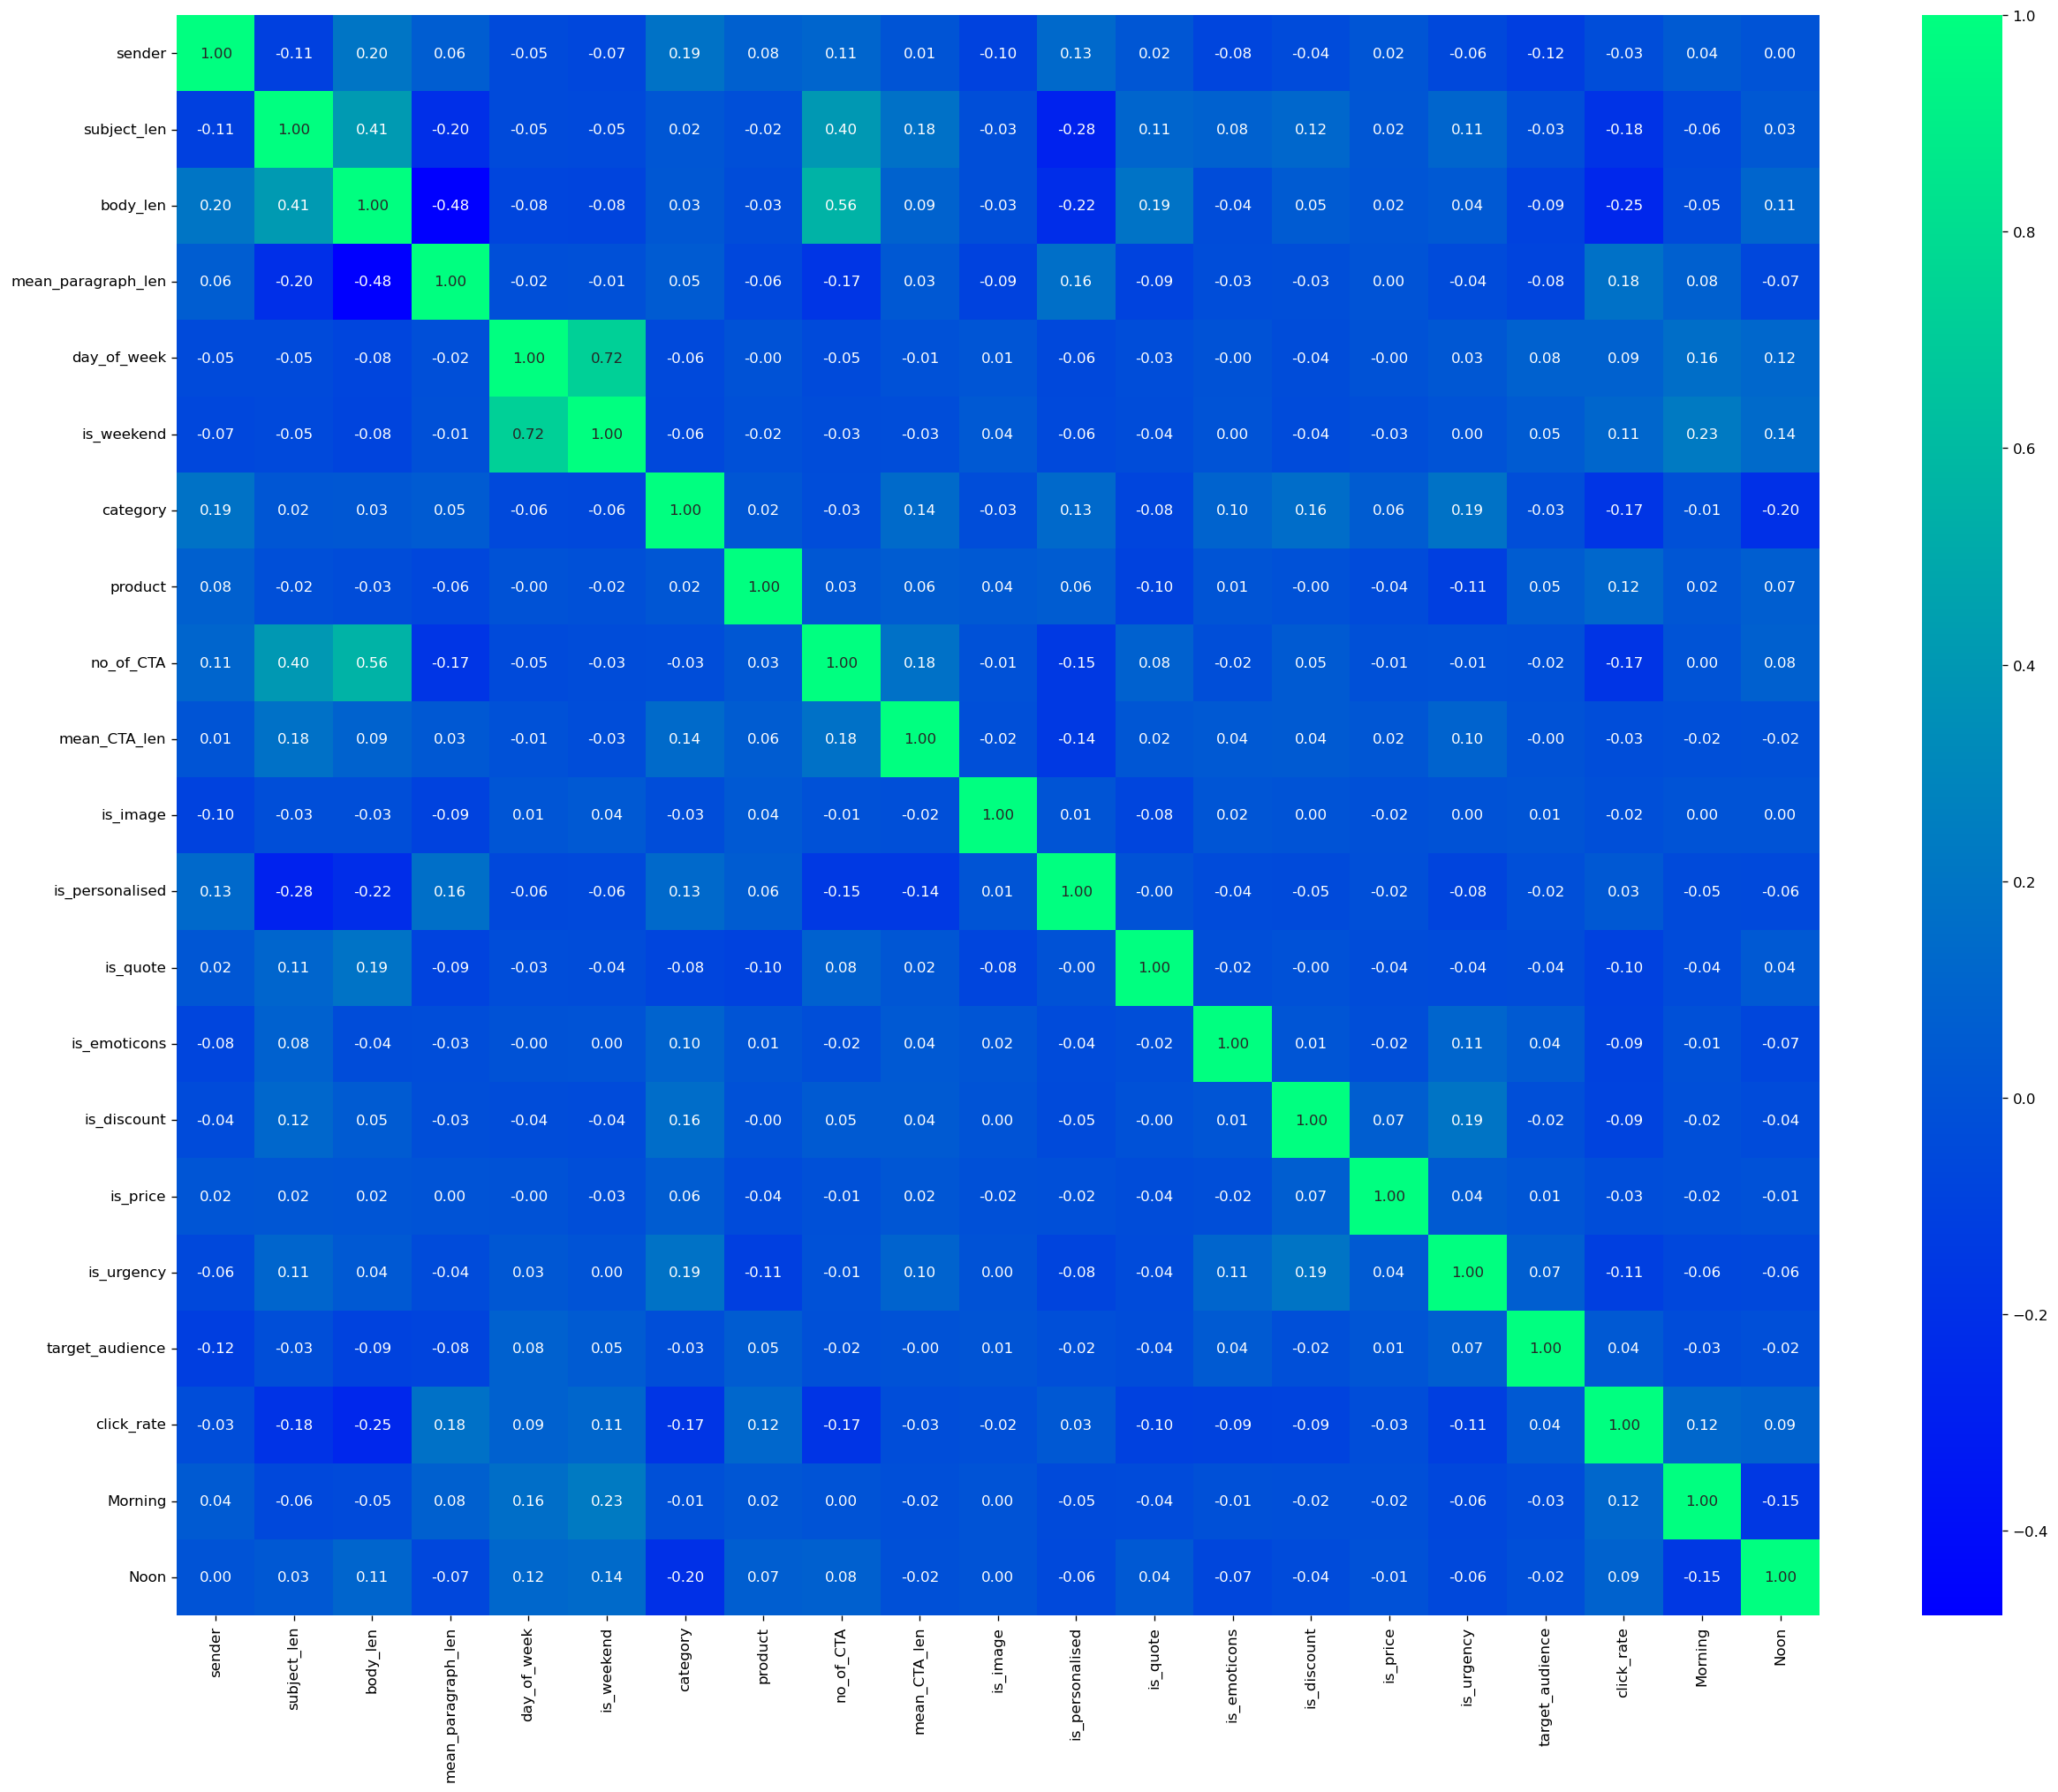

In [30]:
fig , ax = plt.subplots(figsize = (25,20),dpi=120)

ax = sns.heatmap(df2.corr(), annot =True, fmt='.2f', cmap ='winter' )

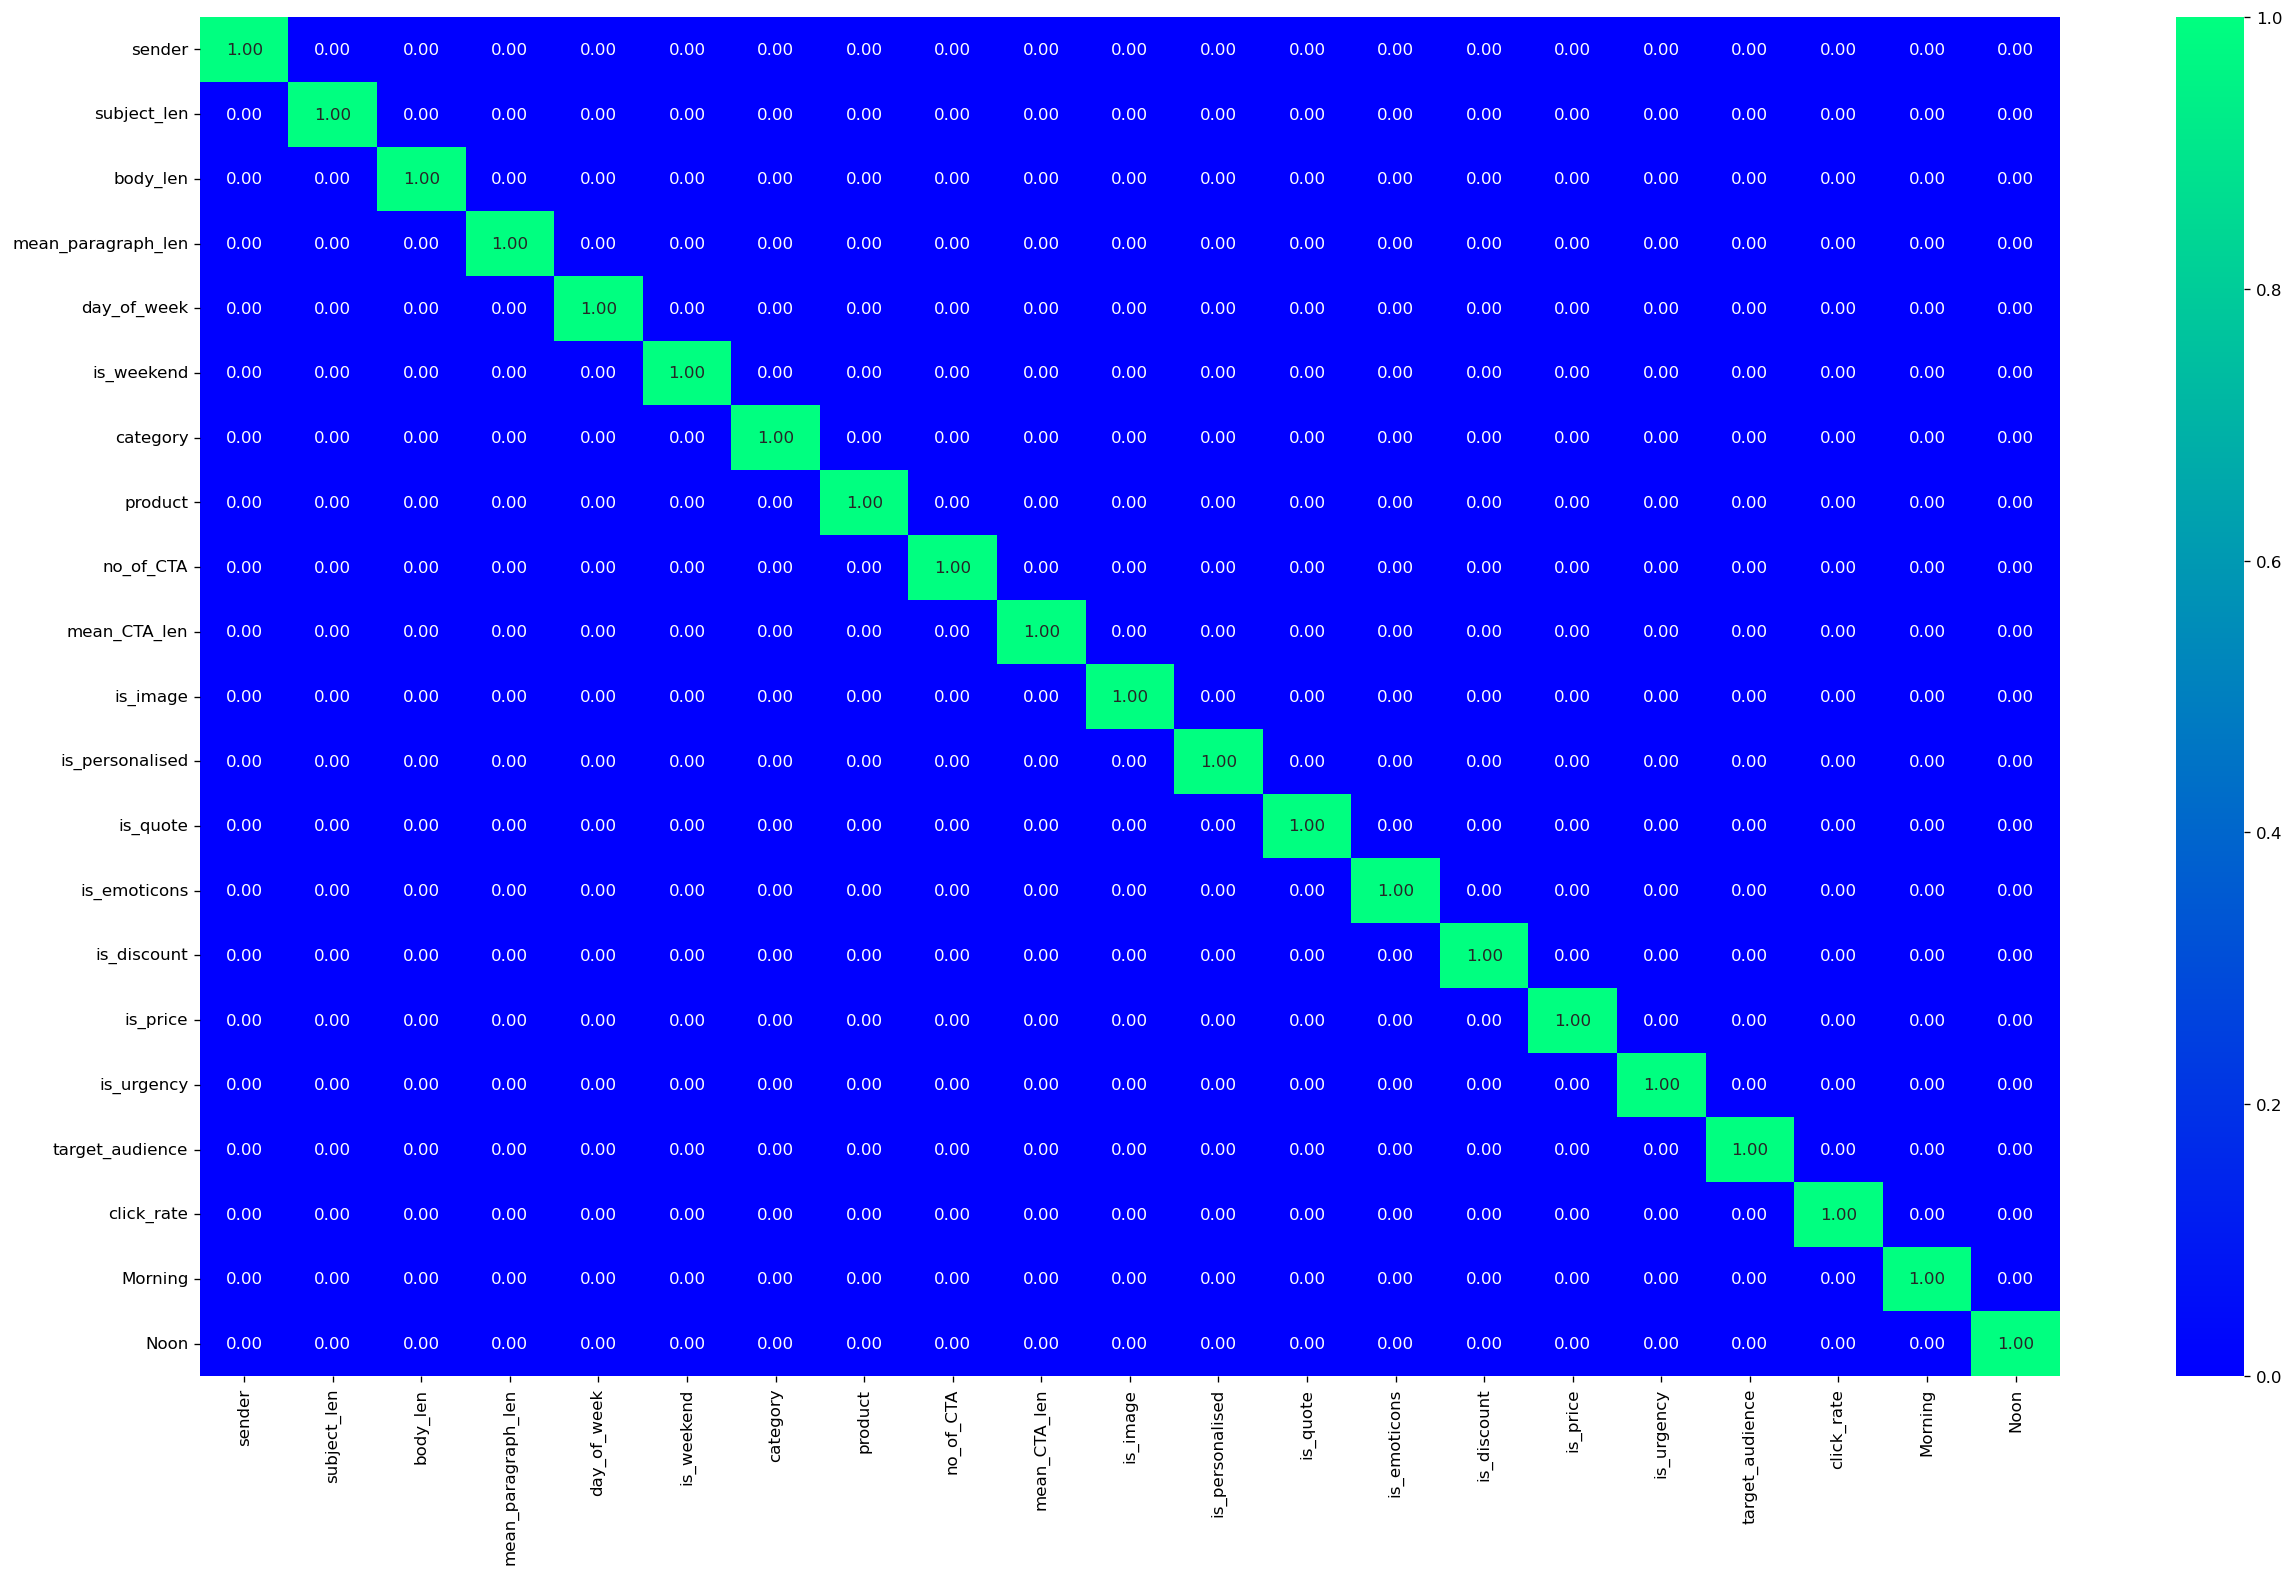

In [31]:
fig , ax = plt.subplots(figsize = (25,15),dpi=120)

ax = sns.heatmap(df2.corr() >0.9 , annot =True, fmt='.2f', cmap ='winter' )

# Splitting data into train data and test data 

In [32]:
df2
df3 = df2.iloc[:len(df_train),:]
df_test2 = df2.iloc[len(df_train):,:].drop('click_rate',axis=1)

In [91]:
len(df3) , len(df_test2)

(1888, 762)

In [34]:
df3

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0          3           76     10439                  39            5   
1          3           54      2570                 256            5   
2          3           59     12801                  16            5   
3          3           74     11037                  30            4   
4          3           80     10011                  27            5   
...      ...          ...       ...                 ...          ...   
1883       3           88      1451                  75            2   
1884       3           58     10537                  40            2   
1885       3           89     11050                  26            1   
1886       3           58     10537                  40            1   
1887       3           89     11050                  26            0   

      is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0              1         6       26          3            29         0   
1              1         2       11          0            22         0   
2              1         2       11          3            23         1   
3              0        15        9          4            24         0   
4              1         6       26          3            31         0   
...          ...       ...      ...        ...           ...       ...   
1883           0         2       11          0            22         0   
1884           0         2       11          5            27         0   
1885           0        15        9          4            28         0   
1886           0         2       11          5            27         0   
1887           0        15        9          4            28         0   

      is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0                   0         0             0            0         0   
1                   0         0             0            0         0   
2                   0         1             0            0         0   
3                   0         0             0            0         0   
4                   0         1             0            0         0   
...               ...       ...           ...          ...       ...   
1883                0         1             0            0         0   
1884                0         0             0            0         0   
1885                0         0             0            0         0   
1886                0         0             0            0         0   
1887                0         0             0            0         0   

      is_urgency  target_audience  click_rate  Morning  Noon  
0              0               14    0.103079        0     1  
1              0               10    0.700000        1     0  
2              0               16    0.002769        0     1  
3              0               10    0.010868        0     0  
4              0               14    0.142826        0     1  
...          ...              ...         ...      ...   ...  
1883           0               10    0.350746        0     1  
1884           0               11    0.004728        0     0  
1885           0                6    0.008289        0     0  
1886           0               16    0.012014        0     0  
1887           0               10    0.003644        0     0  

[1888 rows x 21 columns]

In [35]:
df_test2

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0         3           61     12871                  11            6   
1         3           54      2569                 256            5   
2         3           88      1473                  78            4   
3         3           88      1473                  78            3   
4         3           78      9020                  29            3   
..      ...          ...       ...                 ...          ...   
757       3           72      9081                  46            0   
758       3           58     10537                  40            3   
759       3          100      9132                  19            2   
760       3           88      1451                  75            1   
761       3           58     10537                  40            0   

     is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0             1         6       26          3            37         1   
1             1         2       11          0            22         0   
2             0         2       11          0            22         1   
3             0         2       11          0            22         1   
4             0         6       26          2            40         0   
..          ...       ...      ...        ...           ...       ...   
757           0        15        9          4            28         0   
758           0         2       11          5            27         0   
759           0        15        9          2            23         0   
760           0         2       11          0            22         0   
761           0         2       11          5            27         0   

     is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0                  0         0             1            0         0   
1                  0         0             0            0         0   
2                  0         1             0            0         0   
3                  0         1             0            0         0   
4                  0         0             0            0         0   
..               ...       ...           ...          ...       ...   
757                0         0             0            0         0   
758                0         0             0            0         0   
759                0         0             0            0         0   
760                0         1             0            0         0   
761                0         0             0            0         0   

     is_urgency  target_audience  Morning  Noon  
0             0               14        0     1  
1             0               10        1     0  
2             0               10        0     0  
3             0               10        0     0  
4             0               14        0     1  
..          ...              ...      ...   ...  
757           0                7        0     0  
758           0               16        0     0  
759           0               15        0     0  
760           0               10        0     1  
761           0                1        0     0  

[762 rows x 20 columns]

In [36]:
df3.to_csv("df3.csv",index=False)
df_test2.to_csv("df_test2.csv",index=False)

In [37]:
df3=pd.read_csv("df3.csv")
df_test2=pd.read_csv("df_test2.csv")

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
X = df3.drop('click_rate', axis=1)
y = df3['click_rate']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.25)

# Modelling

### Standardization - not applied as not many numerical features

In [41]:
# from sklearn.preprocessing import StandardScaler

# # copy of datasets
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()

# # numerical features
# num_cols = ['ACCOUNT NUMBER','SITE NUMBER','CITY','STATE','ZIP CODE']

# # apply standardization on numerical features
# for i in num_cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_stand[[i]])
    
#     # transform the training data column
#     X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
#     # transform the testing data column
#     X_test_stand[i] = scale.transform(X_test_stand[[i]])


### Baseline Predictions

**Importing Models libraries**

In [42]:
# Models from Scikit-Learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

### Applying basic Models for baseline

In [43]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
#               "Training RMSLE": rmsle(y_train, train_preds),
#               "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

In [44]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1
                              
                              )

In [45]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: total: 1.7 s
Wall time: 707 ms


RandomForestRegressor(n_jobs=-1)

In [46]:
show_scores(model)

{'Training MAE': 0.01174404894924316,
 'Valid MAE': 0.02966161705964511,
 'Training R^2': 0.9330577033128147,
 'Valid R^2': 0.5351937919624546}

In [47]:
### Hyerparameter tuning with RandomizedSearchCV

In [ ]:
modelcb 

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]
           }



CPU times: total: 0 ns
Wall time: 0 ns


In [49]:
# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

In [50]:
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Shashank.Awasthi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Shashank.Awasthi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Shashank.Awasthi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [52]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 0.019382566537494324,
 'Valid MAE': 0.029780718290688787,
 'Training R^2': 0.8157010655452306,
 'Valid R^2': 0.5295014625565488}

In [53]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [55]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 0.023614708244238773,
 'Valid MAE': 0.030598336200452065,
 'Training R^2': 0.7154277698268121,
 'Valid R^2': 0.4867029804041093}

In [56]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 0.01938256653749432,
 'Valid MAE': 0.029780718290688787,
 'Training R^2': 0.8157010655452306,
 'Valid R^2': 0.5295014625565488}

In [57]:
## apply ensembling methods as well 

In [58]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [ ]:
iterations=None,
    learning_rate=None,
    depth=None,

In [105]:
# Change max_samples value
modelcb = CatBoostRegressor(iterations = 1500,learning_rate=0.04)
                              
                              

In [106]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
modelcb.fit(X, y)

0:	learn: 0.0833210	total: 3.51ms	remaining: 5.26s
1:	learn: 0.0824833	total: 7.22ms	remaining: 5.41s
2:	learn: 0.0816062	total: 10.9ms	remaining: 5.45s
3:	learn: 0.0809031	total: 14ms	remaining: 5.22s
4:	learn: 0.0802454	total: 17.3ms	remaining: 5.17s
5:	learn: 0.0794940	total: 20ms	remaining: 4.98s
6:	learn: 0.0789182	total: 23.5ms	remaining: 5.02s
7:	learn: 0.0783183	total: 26.2ms	remaining: 4.89s
8:	learn: 0.0776205	total: 31.4ms	remaining: 5.2s
9:	learn: 0.0770273	total: 35.7ms	remaining: 5.31s
10:	learn: 0.0764082	total: 39.9ms	remaining: 5.39s
11:	learn: 0.0758421	total: 43ms	remaining: 5.33s
12:	learn: 0.0752747	total: 46.4ms	remaining: 5.3s
13:	learn: 0.0748075	total: 51.6ms	remaining: 5.48s
14:	learn: 0.0742503	total: 56.3ms	remaining: 5.57s
15:	learn: 0.0737031	total: 59.3ms	remaining: 5.5s
16:	learn: 0.0731777	total: 62.7ms	remaining: 5.47s
17:	learn: 0.0727917	total: 67.1ms	remaining: 5.53s
18:	learn: 0.0722430	total: 70.2ms	remaining: 5.47s
19:	learn: 0.0718169	total: 72.

196:	learn: 0.0468651	total: 675ms	remaining: 4.46s
197:	learn: 0.0467521	total: 677ms	remaining: 4.45s
198:	learn: 0.0466694	total: 680ms	remaining: 4.45s
199:	learn: 0.0466353	total: 683ms	remaining: 4.44s
200:	learn: 0.0465133	total: 686ms	remaining: 4.43s
201:	learn: 0.0464471	total: 691ms	remaining: 4.44s
202:	learn: 0.0463781	total: 695ms	remaining: 4.44s
203:	learn: 0.0462715	total: 700ms	remaining: 4.45s
204:	learn: 0.0462065	total: 704ms	remaining: 4.45s
205:	learn: 0.0461861	total: 709ms	remaining: 4.45s
206:	learn: 0.0461022	total: 714ms	remaining: 4.46s
207:	learn: 0.0460039	total: 717ms	remaining: 4.45s
208:	learn: 0.0459429	total: 720ms	remaining: 4.45s
209:	learn: 0.0458848	total: 722ms	remaining: 4.44s
210:	learn: 0.0458393	total: 726ms	remaining: 4.43s
211:	learn: 0.0457624	total: 729ms	remaining: 4.43s
212:	learn: 0.0456995	total: 731ms	remaining: 4.42s
213:	learn: 0.0456657	total: 734ms	remaining: 4.41s
214:	learn: 0.0456043	total: 736ms	remaining: 4.4s
215:	learn: 0

354:	learn: 0.0385515	total: 1.18s	remaining: 3.82s
355:	learn: 0.0385282	total: 1.19s	remaining: 3.81s
356:	learn: 0.0385135	total: 1.19s	remaining: 3.81s
357:	learn: 0.0384654	total: 1.19s	remaining: 3.8s
358:	learn: 0.0384363	total: 1.2s	remaining: 3.8s
359:	learn: 0.0383619	total: 1.2s	remaining: 3.8s
360:	learn: 0.0383163	total: 1.2s	remaining: 3.79s
361:	learn: 0.0382505	total: 1.2s	remaining: 3.79s
362:	learn: 0.0382173	total: 1.21s	remaining: 3.78s
363:	learn: 0.0382032	total: 1.21s	remaining: 3.78s
364:	learn: 0.0381742	total: 1.21s	remaining: 3.77s
365:	learn: 0.0381174	total: 1.22s	remaining: 3.77s
366:	learn: 0.0380935	total: 1.22s	remaining: 3.76s
367:	learn: 0.0380484	total: 1.22s	remaining: 3.76s
368:	learn: 0.0379617	total: 1.23s	remaining: 3.76s
369:	learn: 0.0379420	total: 1.23s	remaining: 3.75s
370:	learn: 0.0379282	total: 1.23s	remaining: 3.75s
371:	learn: 0.0378576	total: 1.24s	remaining: 3.75s
372:	learn: 0.0378147	total: 1.24s	remaining: 3.75s
373:	learn: 0.03775

518:	learn: 0.0328262	total: 1.85s	remaining: 3.5s
519:	learn: 0.0328046	total: 1.85s	remaining: 3.5s
520:	learn: 0.0327953	total: 1.86s	remaining: 3.49s
521:	learn: 0.0327725	total: 1.86s	remaining: 3.49s
522:	learn: 0.0327483	total: 1.86s	remaining: 3.48s
523:	learn: 0.0327415	total: 1.87s	remaining: 3.48s
524:	learn: 0.0327344	total: 1.87s	remaining: 3.47s
525:	learn: 0.0326948	total: 1.87s	remaining: 3.47s
526:	learn: 0.0326500	total: 1.88s	remaining: 3.47s
527:	learn: 0.0325801	total: 1.88s	remaining: 3.46s
528:	learn: 0.0325727	total: 1.88s	remaining: 3.46s
529:	learn: 0.0325656	total: 1.89s	remaining: 3.45s
530:	learn: 0.0325335	total: 1.89s	remaining: 3.45s
531:	learn: 0.0324529	total: 1.89s	remaining: 3.44s
532:	learn: 0.0324138	total: 1.9s	remaining: 3.44s
533:	learn: 0.0323808	total: 1.9s	remaining: 3.44s
534:	learn: 0.0323591	total: 1.9s	remaining: 3.43s
535:	learn: 0.0323242	total: 1.9s	remaining: 3.42s
536:	learn: 0.0322881	total: 1.91s	remaining: 3.42s
537:	learn: 0.0322

699:	learn: 0.0284388	total: 2.35s	remaining: 2.69s
700:	learn: 0.0284102	total: 2.36s	remaining: 2.69s
701:	learn: 0.0283618	total: 2.36s	remaining: 2.69s
702:	learn: 0.0283348	total: 2.37s	remaining: 2.68s
703:	learn: 0.0282971	total: 2.37s	remaining: 2.68s
704:	learn: 0.0282719	total: 2.37s	remaining: 2.67s
705:	learn: 0.0282495	total: 2.38s	remaining: 2.67s
706:	learn: 0.0282341	total: 2.38s	remaining: 2.67s
707:	learn: 0.0282050	total: 2.38s	remaining: 2.66s
708:	learn: 0.0281851	total: 2.39s	remaining: 2.66s
709:	learn: 0.0281687	total: 2.39s	remaining: 2.66s
710:	learn: 0.0281597	total: 2.39s	remaining: 2.65s
711:	learn: 0.0281557	total: 2.39s	remaining: 2.65s
712:	learn: 0.0281426	total: 2.4s	remaining: 2.65s
713:	learn: 0.0281295	total: 2.4s	remaining: 2.64s
714:	learn: 0.0281051	total: 2.4s	remaining: 2.64s
715:	learn: 0.0280818	total: 2.4s	remaining: 2.63s
716:	learn: 0.0280650	total: 2.41s	remaining: 2.63s
717:	learn: 0.0280361	total: 2.41s	remaining: 2.63s
718:	learn: 0.02

870:	learn: 0.0250722	total: 2.87s	remaining: 2.07s
871:	learn: 0.0250561	total: 2.87s	remaining: 2.07s
872:	learn: 0.0250478	total: 2.88s	remaining: 2.06s
873:	learn: 0.0250266	total: 2.88s	remaining: 2.06s
874:	learn: 0.0250076	total: 2.88s	remaining: 2.06s
875:	learn: 0.0249932	total: 2.89s	remaining: 2.06s
876:	learn: 0.0249745	total: 2.89s	remaining: 2.05s
877:	learn: 0.0249628	total: 2.89s	remaining: 2.05s
878:	learn: 0.0249567	total: 2.9s	remaining: 2.05s
879:	learn: 0.0249449	total: 2.9s	remaining: 2.04s
880:	learn: 0.0249233	total: 2.9s	remaining: 2.04s
881:	learn: 0.0249022	total: 2.91s	remaining: 2.04s
882:	learn: 0.0248889	total: 2.91s	remaining: 2.04s
883:	learn: 0.0248813	total: 2.92s	remaining: 2.03s
884:	learn: 0.0248576	total: 2.92s	remaining: 2.03s
885:	learn: 0.0248396	total: 2.93s	remaining: 2.03s
886:	learn: 0.0248259	total: 2.93s	remaining: 2.03s
887:	learn: 0.0248069	total: 2.94s	remaining: 2.02s
888:	learn: 0.0247870	total: 2.94s	remaining: 2.02s
889:	learn: 0.0

1032:	learn: 0.0225159	total: 3.37s	remaining: 1.52s
1033:	learn: 0.0225097	total: 3.38s	remaining: 1.52s
1034:	learn: 0.0224847	total: 3.38s	remaining: 1.52s
1035:	learn: 0.0224801	total: 3.38s	remaining: 1.51s
1036:	learn: 0.0224590	total: 3.38s	remaining: 1.51s
1037:	learn: 0.0224490	total: 3.39s	remaining: 1.51s
1038:	learn: 0.0224406	total: 3.39s	remaining: 1.5s
1039:	learn: 0.0224266	total: 3.39s	remaining: 1.5s
1040:	learn: 0.0224164	total: 3.4s	remaining: 1.5s
1041:	learn: 0.0224128	total: 3.4s	remaining: 1.5s
1042:	learn: 0.0224037	total: 3.41s	remaining: 1.49s
1043:	learn: 0.0223943	total: 3.41s	remaining: 1.49s
1044:	learn: 0.0223695	total: 3.42s	remaining: 1.49s
1045:	learn: 0.0223541	total: 3.42s	remaining: 1.48s
1046:	learn: 0.0223322	total: 3.42s	remaining: 1.48s
1047:	learn: 0.0223247	total: 3.42s	remaining: 1.48s
1048:	learn: 0.0223078	total: 3.43s	remaining: 1.47s
1049:	learn: 0.0222942	total: 3.43s	remaining: 1.47s
1050:	learn: 0.0222800	total: 3.43s	remaining: 1.47s

1195:	learn: 0.0205843	total: 3.88s	remaining: 987ms
1196:	learn: 0.0205799	total: 3.88s	remaining: 983ms
1197:	learn: 0.0205729	total: 3.89s	remaining: 980ms
1198:	learn: 0.0205511	total: 3.89s	remaining: 977ms
1199:	learn: 0.0205344	total: 3.89s	remaining: 973ms
1200:	learn: 0.0205159	total: 3.9s	remaining: 970ms
1201:	learn: 0.0205105	total: 3.9s	remaining: 967ms
1202:	learn: 0.0204990	total: 3.9s	remaining: 963ms
1203:	learn: 0.0204941	total: 3.9s	remaining: 960ms
1204:	learn: 0.0204658	total: 3.91s	remaining: 957ms
1205:	learn: 0.0204530	total: 3.91s	remaining: 954ms
1206:	learn: 0.0204422	total: 3.92s	remaining: 951ms
1207:	learn: 0.0204338	total: 3.92s	remaining: 947ms
1208:	learn: 0.0204276	total: 3.92s	remaining: 944ms
1209:	learn: 0.0204216	total: 3.92s	remaining: 941ms
1210:	learn: 0.0204079	total: 3.93s	remaining: 937ms
1211:	learn: 0.0203873	total: 3.93s	remaining: 934ms
1212:	learn: 0.0203774	total: 3.93s	remaining: 931ms
1213:	learn: 0.0203588	total: 3.94s	remaining: 927

1395:	learn: 0.0183630	total: 4.55s	remaining: 339ms
1396:	learn: 0.0183483	total: 4.56s	remaining: 336ms
1397:	learn: 0.0183386	total: 4.56s	remaining: 333ms
1398:	learn: 0.0183309	total: 4.56s	remaining: 330ms
1399:	learn: 0.0183258	total: 4.57s	remaining: 326ms
1400:	learn: 0.0183181	total: 4.57s	remaining: 323ms
1401:	learn: 0.0183101	total: 4.57s	remaining: 320ms
1402:	learn: 0.0183070	total: 4.58s	remaining: 316ms
1403:	learn: 0.0182992	total: 4.58s	remaining: 313ms
1404:	learn: 0.0182899	total: 4.58s	remaining: 310ms
1405:	learn: 0.0182779	total: 4.59s	remaining: 307ms
1406:	learn: 0.0182601	total: 4.59s	remaining: 303ms
1407:	learn: 0.0182462	total: 4.59s	remaining: 300ms
1408:	learn: 0.0182350	total: 4.6s	remaining: 297ms
1409:	learn: 0.0182322	total: 4.6s	remaining: 294ms
1410:	learn: 0.0182241	total: 4.6s	remaining: 290ms
1411:	learn: 0.0182145	total: 4.61s	remaining: 287ms
1412:	learn: 0.0182023	total: 4.61s	remaining: 284ms
1413:	learn: 0.0181909	total: 4.61s	remaining: 28

In [107]:
show_scores(modelcb)

{'Training MAE': 0.011213311493019023,
 'Valid MAE': 0.0113900618225222,
 'Training R^2': 0.9603934473832153,
 'Valid R^2': 0.9436603922462845}

In [88]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
cb_grid = {"iterations": [1500,2000,2500],
           "learning_rate": [0.04]
           }



CPU times: total: 0 ns
Wall time: 0 ns


In [89]:
gs_rf = GridSearchCV(CatBoostRegressor(),
                          param_grid=cb_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0:	learn: 0.0897998	total: 2.97ms	remaining: 4.45s
1:	learn: 0.0887304	total: 5.72ms	remaining: 4.29s
2:	learn: 0.0876499	total: 8.71ms	remaining: 4.35s
3:	learn: 0.0867812	total: 12ms	remaining: 4.48s
4:	learn: 0.0859974	total: 15ms	remaining: 4.48s
5:	learn: 0.0851328	total: 17.8ms	remaining: 4.44s
6:	learn: 0.0844492	total: 20.7ms	remaining: 4.42s
7:	learn: 0.0835017	total: 23.7ms	remaining: 4.43s
8:	learn: 0.0826983	total: 26.6ms	remaining: 4.41s
9:	learn: 0.0819473	total: 30.1ms	remaining: 4.48s
10:	learn: 0.0811355	total: 33ms	remaining: 4.47s
11:	learn: 0.0806623	total: 35.7ms	remaining: 4.42s
12:	learn: 0.0799503	total: 38.4ms	remaining: 4.39s
13:	learn: 0.0792283	total: 40.8ms	remaining: 4.33s
14:	learn: 0.0785491	total: 43.3ms	remaining: 4.28s
15:	learn: 0.0779939	total: 46ms	remaining: 4.26s
16:	learn: 0.0774811	total: 48.4ms	remaining: 4.22s
17:	learn: 0.0770027	total: 51.7ms	remaining: 4.25s
18:	learn: 0.0764229	t

168:	learn: 0.0473527	total: 478ms	remaining: 3.76s
169:	learn: 0.0472333	total: 480ms	remaining: 3.76s
170:	learn: 0.0471185	total: 484ms	remaining: 3.76s
171:	learn: 0.0470020	total: 486ms	remaining: 3.75s
172:	learn: 0.0469601	total: 489ms	remaining: 3.75s
173:	learn: 0.0469516	total: 491ms	remaining: 3.75s
174:	learn: 0.0469348	total: 494ms	remaining: 3.74s
175:	learn: 0.0468373	total: 496ms	remaining: 3.73s
176:	learn: 0.0467817	total: 499ms	remaining: 3.73s
177:	learn: 0.0467508	total: 501ms	remaining: 3.72s
178:	learn: 0.0466115	total: 505ms	remaining: 3.72s
179:	learn: 0.0465052	total: 507ms	remaining: 3.72s
180:	learn: 0.0464386	total: 510ms	remaining: 3.72s
181:	learn: 0.0463062	total: 513ms	remaining: 3.71s
182:	learn: 0.0462554	total: 516ms	remaining: 3.71s
183:	learn: 0.0461992	total: 519ms	remaining: 3.71s
184:	learn: 0.0460809	total: 521ms	remaining: 3.71s
185:	learn: 0.0459537	total: 524ms	remaining: 3.7s
186:	learn: 0.0458192	total: 526ms	remaining: 3.69s
187:	learn: 0

362:	learn: 0.0344801	total: 984ms	remaining: 3.08s
363:	learn: 0.0344311	total: 987ms	remaining: 3.08s
364:	learn: 0.0343663	total: 989ms	remaining: 3.08s
365:	learn: 0.0343399	total: 992ms	remaining: 3.07s
366:	learn: 0.0342727	total: 995ms	remaining: 3.07s
367:	learn: 0.0342239	total: 997ms	remaining: 3.07s
368:	learn: 0.0341976	total: 1s	remaining: 3.06s
369:	learn: 0.0341536	total: 1s	remaining: 3.06s
370:	learn: 0.0341031	total: 1.01s	remaining: 3.06s
371:	learn: 0.0339888	total: 1.01s	remaining: 3.06s
372:	learn: 0.0338754	total: 1.01s	remaining: 3.05s
373:	learn: 0.0337530	total: 1.01s	remaining: 3.05s
374:	learn: 0.0336907	total: 1.02s	remaining: 3.05s
375:	learn: 0.0336746	total: 1.02s	remaining: 3.05s
376:	learn: 0.0336479	total: 1.02s	remaining: 3.04s
377:	learn: 0.0336223	total: 1.02s	remaining: 3.04s
378:	learn: 0.0335913	total: 1.03s	remaining: 3.04s
379:	learn: 0.0335665	total: 1.03s	remaining: 3.04s
380:	learn: 0.0335558	total: 1.03s	remaining: 3.04s
381:	learn: 0.0335

522:	learn: 0.0277290	total: 1.49s	remaining: 2.79s
523:	learn: 0.0277212	total: 1.49s	remaining: 2.78s
524:	learn: 0.0276963	total: 1.5s	remaining: 2.78s
525:	learn: 0.0276742	total: 1.5s	remaining: 2.77s
526:	learn: 0.0276398	total: 1.5s	remaining: 2.77s
527:	learn: 0.0276033	total: 1.5s	remaining: 2.77s
528:	learn: 0.0275762	total: 1.51s	remaining: 2.76s
529:	learn: 0.0275053	total: 1.51s	remaining: 2.76s
530:	learn: 0.0274848	total: 1.51s	remaining: 2.76s
531:	learn: 0.0274347	total: 1.51s	remaining: 2.75s
532:	learn: 0.0274065	total: 1.52s	remaining: 2.75s
533:	learn: 0.0273679	total: 1.52s	remaining: 2.75s
534:	learn: 0.0273215	total: 1.52s	remaining: 2.75s
535:	learn: 0.0273139	total: 1.52s	remaining: 2.74s
536:	learn: 0.0273065	total: 1.53s	remaining: 2.74s
537:	learn: 0.0272809	total: 1.53s	remaining: 2.74s
538:	learn: 0.0272429	total: 1.53s	remaining: 2.73s
539:	learn: 0.0272357	total: 1.53s	remaining: 2.73s
540:	learn: 0.0271868	total: 1.54s	remaining: 2.73s
541:	learn: 0.02

688:	learn: 0.0233568	total: 1.99s	remaining: 2.34s
689:	learn: 0.0233430	total: 2s	remaining: 2.34s
690:	learn: 0.0233130	total: 2s	remaining: 2.34s
691:	learn: 0.0232902	total: 2s	remaining: 2.34s
692:	learn: 0.0232391	total: 2s	remaining: 2.33s
693:	learn: 0.0232051	total: 2.01s	remaining: 2.33s
694:	learn: 0.0231918	total: 2.01s	remaining: 2.33s
695:	learn: 0.0231758	total: 2.01s	remaining: 2.33s
696:	learn: 0.0231513	total: 2.02s	remaining: 2.32s
697:	learn: 0.0231449	total: 2.02s	remaining: 2.32s
698:	learn: 0.0231261	total: 2.02s	remaining: 2.32s
699:	learn: 0.0231223	total: 2.03s	remaining: 2.32s
700:	learn: 0.0230946	total: 2.03s	remaining: 2.31s
701:	learn: 0.0230781	total: 2.04s	remaining: 2.31s
702:	learn: 0.0230594	total: 2.04s	remaining: 2.31s
703:	learn: 0.0230220	total: 2.04s	remaining: 2.31s
704:	learn: 0.0230056	total: 2.04s	remaining: 2.31s
705:	learn: 0.0229830	total: 2.05s	remaining: 2.3s
706:	learn: 0.0229427	total: 2.05s	remaining: 2.3s
707:	learn: 0.0229021	tota

879:	learn: 0.0197604	total: 2.49s	remaining: 1.75s
880:	learn: 0.0197559	total: 2.49s	remaining: 1.75s
881:	learn: 0.0197233	total: 2.5s	remaining: 1.75s
882:	learn: 0.0197222	total: 2.5s	remaining: 1.75s
883:	learn: 0.0197090	total: 2.5s	remaining: 1.74s
884:	learn: 0.0196956	total: 2.5s	remaining: 1.74s
885:	learn: 0.0196746	total: 2.51s	remaining: 1.74s
886:	learn: 0.0196535	total: 2.51s	remaining: 1.74s
887:	learn: 0.0196398	total: 2.52s	remaining: 1.73s
888:	learn: 0.0196222	total: 2.52s	remaining: 1.73s
889:	learn: 0.0196150	total: 2.52s	remaining: 1.73s
890:	learn: 0.0196068	total: 2.52s	remaining: 1.73s
891:	learn: 0.0195744	total: 2.53s	remaining: 1.73s
892:	learn: 0.0195459	total: 2.54s	remaining: 1.73s
893:	learn: 0.0195274	total: 2.54s	remaining: 1.72s
894:	learn: 0.0195019	total: 2.55s	remaining: 1.72s
895:	learn: 0.0194868	total: 2.55s	remaining: 1.72s
896:	learn: 0.0194517	total: 2.55s	remaining: 1.72s
897:	learn: 0.0194441	total: 2.56s	remaining: 1.72s
898:	learn: 0.01

1056:	learn: 0.0171576	total: 2.99s	remaining: 1.25s
1057:	learn: 0.0171420	total: 2.99s	remaining: 1.25s
1058:	learn: 0.0171341	total: 2.99s	remaining: 1.25s
1059:	learn: 0.0171144	total: 3s	remaining: 1.24s
1060:	learn: 0.0171137	total: 3s	remaining: 1.24s
1061:	learn: 0.0171049	total: 3s	remaining: 1.24s
1062:	learn: 0.0170911	total: 3s	remaining: 1.23s
1063:	learn: 0.0170762	total: 3s	remaining: 1.23s
1064:	learn: 0.0170489	total: 3.01s	remaining: 1.23s
1065:	learn: 0.0170302	total: 3.01s	remaining: 1.23s
1066:	learn: 0.0170284	total: 3.02s	remaining: 1.22s
1067:	learn: 0.0169929	total: 3.02s	remaining: 1.22s
1068:	learn: 0.0169842	total: 3.02s	remaining: 1.22s
1069:	learn: 0.0169835	total: 3.03s	remaining: 1.22s
1070:	learn: 0.0169666	total: 3.03s	remaining: 1.21s
1071:	learn: 0.0169483	total: 3.03s	remaining: 1.21s
1072:	learn: 0.0169334	total: 3.03s	remaining: 1.21s
1073:	learn: 0.0169078	total: 3.04s	remaining: 1.2s
1074:	learn: 0.0169045	total: 3.04s	remaining: 1.2s
1075:	lear

1256:	learn: 0.0147273	total: 3.49s	remaining: 675ms
1257:	learn: 0.0147266	total: 3.5s	remaining: 673ms
1258:	learn: 0.0147234	total: 3.5s	remaining: 670ms
1259:	learn: 0.0147215	total: 3.5s	remaining: 667ms
1260:	learn: 0.0147099	total: 3.5s	remaining: 664ms
1261:	learn: 0.0147001	total: 3.51s	remaining: 661ms
1262:	learn: 0.0146690	total: 3.51s	remaining: 659ms
1263:	learn: 0.0146634	total: 3.51s	remaining: 656ms
1264:	learn: 0.0146616	total: 3.51s	remaining: 653ms
1265:	learn: 0.0146577	total: 3.52s	remaining: 650ms
1266:	learn: 0.0146471	total: 3.52s	remaining: 647ms
1267:	learn: 0.0146271	total: 3.52s	remaining: 645ms
1268:	learn: 0.0146149	total: 3.52s	remaining: 642ms
1269:	learn: 0.0146079	total: 3.53s	remaining: 639ms
1270:	learn: 0.0145985	total: 3.53s	remaining: 636ms
1271:	learn: 0.0145850	total: 3.53s	remaining: 633ms
1272:	learn: 0.0145770	total: 3.54s	remaining: 630ms
1273:	learn: 0.0145662	total: 3.54s	remaining: 628ms
1274:	learn: 0.0145596	total: 3.54s	remaining: 625

1450:	learn: 0.0131096	total: 4s	remaining: 135ms
1451:	learn: 0.0131029	total: 4s	remaining: 132ms
1452:	learn: 0.0130943	total: 4s	remaining: 129ms
1453:	learn: 0.0130800	total: 4s	remaining: 127ms
1454:	learn: 0.0130619	total: 4.01s	remaining: 124ms
1455:	learn: 0.0130563	total: 4.01s	remaining: 121ms
1456:	learn: 0.0130491	total: 4.01s	remaining: 118ms
1457:	learn: 0.0130479	total: 4.01s	remaining: 116ms
1458:	learn: 0.0130446	total: 4.02s	remaining: 113ms
1459:	learn: 0.0130338	total: 4.02s	remaining: 110ms
1460:	learn: 0.0130278	total: 4.02s	remaining: 107ms
1461:	learn: 0.0130122	total: 4.03s	remaining: 105ms
1462:	learn: 0.0130017	total: 4.03s	remaining: 102ms
1463:	learn: 0.0129983	total: 4.03s	remaining: 99.1ms
1464:	learn: 0.0129828	total: 4.03s	remaining: 96.4ms
1465:	learn: 0.0129776	total: 4.04s	remaining: 93.6ms
1466:	learn: 0.0129710	total: 4.04s	remaining: 90.8ms
1467:	learn: 0.0129645	total: 4.04s	remaining: 88.1ms
1468:	learn: 0.0129623	total: 4.04s	remaining: 85.3ms

123:	learn: 0.0504341	total: 342ms	remaining: 3.79s
124:	learn: 0.0503013	total: 345ms	remaining: 3.8s
125:	learn: 0.0501585	total: 348ms	remaining: 3.79s
126:	learn: 0.0501266	total: 351ms	remaining: 3.79s
127:	learn: 0.0500979	total: 354ms	remaining: 3.79s
128:	learn: 0.0500487	total: 357ms	remaining: 3.79s
129:	learn: 0.0499011	total: 360ms	remaining: 3.79s
130:	learn: 0.0498247	total: 362ms	remaining: 3.78s
131:	learn: 0.0496633	total: 365ms	remaining: 3.78s
132:	learn: 0.0495084	total: 369ms	remaining: 3.79s
133:	learn: 0.0493963	total: 371ms	remaining: 3.78s
134:	learn: 0.0493295	total: 374ms	remaining: 3.78s
135:	learn: 0.0492894	total: 376ms	remaining: 3.77s
136:	learn: 0.0491863	total: 379ms	remaining: 3.77s
137:	learn: 0.0491073	total: 381ms	remaining: 3.76s
138:	learn: 0.0490360	total: 384ms	remaining: 3.76s
139:	learn: 0.0489608	total: 387ms	remaining: 3.75s
140:	learn: 0.0488626	total: 389ms	remaining: 3.75s
141:	learn: 0.0487921	total: 391ms	remaining: 3.74s
142:	learn: 0

327:	learn: 0.0369845	total: 1.02s	remaining: 3.64s
328:	learn: 0.0369183	total: 1.02s	remaining: 3.64s
329:	learn: 0.0368930	total: 1.02s	remaining: 3.63s
330:	learn: 0.0368324	total: 1.03s	remaining: 3.63s
331:	learn: 0.0367745	total: 1.03s	remaining: 3.63s
332:	learn: 0.0366854	total: 1.03s	remaining: 3.63s
333:	learn: 0.0365864	total: 1.04s	remaining: 3.63s
334:	learn: 0.0365235	total: 1.04s	remaining: 3.62s
335:	learn: 0.0364649	total: 1.05s	remaining: 3.63s
336:	learn: 0.0364494	total: 1.05s	remaining: 3.62s
337:	learn: 0.0363960	total: 1.05s	remaining: 3.62s
338:	learn: 0.0363039	total: 1.06s	remaining: 3.63s
339:	learn: 0.0361943	total: 1.06s	remaining: 3.63s
340:	learn: 0.0361773	total: 1.07s	remaining: 3.65s
341:	learn: 0.0361036	total: 1.07s	remaining: 3.64s
342:	learn: 0.0360398	total: 1.08s	remaining: 3.64s
343:	learn: 0.0360241	total: 1.08s	remaining: 3.63s
344:	learn: 0.0359803	total: 1.08s	remaining: 3.63s
345:	learn: 0.0358841	total: 1.09s	remaining: 3.63s
346:	learn: 

540:	learn: 0.0290224	total: 1.68s	remaining: 2.99s
541:	learn: 0.0289968	total: 1.69s	remaining: 2.98s
542:	learn: 0.0289455	total: 1.69s	remaining: 2.98s
543:	learn: 0.0289096	total: 1.69s	remaining: 2.98s
544:	learn: 0.0288776	total: 1.7s	remaining: 2.97s
545:	learn: 0.0288676	total: 1.7s	remaining: 2.97s
546:	learn: 0.0288058	total: 1.7s	remaining: 2.96s
547:	learn: 0.0288040	total: 1.7s	remaining: 2.96s
548:	learn: 0.0287804	total: 1.71s	remaining: 2.96s
549:	learn: 0.0287352	total: 1.71s	remaining: 2.96s
550:	learn: 0.0286963	total: 1.72s	remaining: 2.95s
551:	learn: 0.0286472	total: 1.72s	remaining: 2.95s
552:	learn: 0.0286170	total: 1.72s	remaining: 2.95s
553:	learn: 0.0285734	total: 1.72s	remaining: 2.94s
554:	learn: 0.0285446	total: 1.73s	remaining: 2.94s
555:	learn: 0.0284788	total: 1.73s	remaining: 2.94s
556:	learn: 0.0284599	total: 1.73s	remaining: 2.93s
557:	learn: 0.0284432	total: 1.74s	remaining: 2.93s
558:	learn: 0.0284285	total: 1.74s	remaining: 2.92s
559:	learn: 0.02

733:	learn: 0.0235483	total: 2.19s	remaining: 2.29s
734:	learn: 0.0235257	total: 2.19s	remaining: 2.28s
735:	learn: 0.0235021	total: 2.2s	remaining: 2.28s
736:	learn: 0.0234844	total: 2.2s	remaining: 2.28s
737:	learn: 0.0234484	total: 2.2s	remaining: 2.28s
738:	learn: 0.0234239	total: 2.21s	remaining: 2.27s
739:	learn: 0.0234191	total: 2.21s	remaining: 2.27s
740:	learn: 0.0233930	total: 2.21s	remaining: 2.27s
741:	learn: 0.0233648	total: 2.21s	remaining: 2.26s
742:	learn: 0.0233558	total: 2.22s	remaining: 2.26s
743:	learn: 0.0233498	total: 2.22s	remaining: 2.25s
744:	learn: 0.0233280	total: 2.22s	remaining: 2.25s
745:	learn: 0.0233121	total: 2.22s	remaining: 2.25s
746:	learn: 0.0232843	total: 2.23s	remaining: 2.24s
747:	learn: 0.0232712	total: 2.23s	remaining: 2.24s
748:	learn: 0.0232609	total: 2.23s	remaining: 2.24s
749:	learn: 0.0232237	total: 2.23s	remaining: 2.23s
750:	learn: 0.0231913	total: 2.24s	remaining: 2.23s
751:	learn: 0.0231824	total: 2.24s	remaining: 2.23s
752:	learn: 0.0

928:	learn: 0.0195885	total: 2.7s	remaining: 1.66s
929:	learn: 0.0195656	total: 2.7s	remaining: 1.65s
930:	learn: 0.0195473	total: 2.7s	remaining: 1.65s
931:	learn: 0.0195469	total: 2.7s	remaining: 1.65s
932:	learn: 0.0195222	total: 2.71s	remaining: 1.64s
933:	learn: 0.0194927	total: 2.71s	remaining: 1.64s
934:	learn: 0.0194804	total: 2.71s	remaining: 1.64s
935:	learn: 0.0194667	total: 2.72s	remaining: 1.64s
936:	learn: 0.0194598	total: 2.72s	remaining: 1.63s
937:	learn: 0.0194426	total: 2.72s	remaining: 1.63s
938:	learn: 0.0194254	total: 2.73s	remaining: 1.63s
939:	learn: 0.0194139	total: 2.73s	remaining: 1.63s
940:	learn: 0.0194019	total: 2.73s	remaining: 1.62s
941:	learn: 0.0193803	total: 2.73s	remaining: 1.62s
942:	learn: 0.0193714	total: 2.74s	remaining: 1.62s
943:	learn: 0.0193555	total: 2.74s	remaining: 1.61s
944:	learn: 0.0193389	total: 2.74s	remaining: 1.61s
945:	learn: 0.0193224	total: 2.74s	remaining: 1.61s
946:	learn: 0.0193058	total: 2.75s	remaining: 1.6s
947:	learn: 0.019

1119:	learn: 0.0169334	total: 3.2s	remaining: 1.09s
1120:	learn: 0.0169191	total: 3.2s	remaining: 1.08s
1121:	learn: 0.0169070	total: 3.21s	remaining: 1.08s
1122:	learn: 0.0169037	total: 3.21s	remaining: 1.08s
1123:	learn: 0.0168919	total: 3.21s	remaining: 1.07s
1124:	learn: 0.0168836	total: 3.21s	remaining: 1.07s
1125:	learn: 0.0168677	total: 3.22s	remaining: 1.07s
1126:	learn: 0.0168633	total: 3.22s	remaining: 1.07s
1127:	learn: 0.0168627	total: 3.22s	remaining: 1.06s
1128:	learn: 0.0168459	total: 3.23s	remaining: 1.06s
1129:	learn: 0.0168236	total: 3.23s	remaining: 1.06s
1130:	learn: 0.0168206	total: 3.23s	remaining: 1.05s
1131:	learn: 0.0168100	total: 3.23s	remaining: 1.05s
1132:	learn: 0.0167991	total: 3.24s	remaining: 1.05s
1133:	learn: 0.0167988	total: 3.24s	remaining: 1.05s
1134:	learn: 0.0167911	total: 3.24s	remaining: 1.04s
1135:	learn: 0.0167764	total: 3.25s	remaining: 1.04s
1136:	learn: 0.0167533	total: 3.25s	remaining: 1.04s
1137:	learn: 0.0167386	total: 3.25s	remaining: 1

1298:	learn: 0.0149867	total: 3.7s	remaining: 573ms
1299:	learn: 0.0149767	total: 3.7s	remaining: 570ms
1300:	learn: 0.0149635	total: 3.71s	remaining: 567ms
1301:	learn: 0.0149429	total: 3.71s	remaining: 564ms
1302:	learn: 0.0149344	total: 3.71s	remaining: 561ms
1303:	learn: 0.0149192	total: 3.72s	remaining: 559ms
1304:	learn: 0.0149076	total: 3.72s	remaining: 556ms
1305:	learn: 0.0148924	total: 3.72s	remaining: 553ms
1306:	learn: 0.0148765	total: 3.73s	remaining: 550ms
1307:	learn: 0.0148683	total: 3.73s	remaining: 547ms
1308:	learn: 0.0148548	total: 3.73s	remaining: 545ms
1309:	learn: 0.0148447	total: 3.73s	remaining: 542ms
1310:	learn: 0.0148305	total: 3.74s	remaining: 539ms
1311:	learn: 0.0148301	total: 3.74s	remaining: 536ms
1312:	learn: 0.0148210	total: 3.74s	remaining: 533ms
1313:	learn: 0.0148133	total: 3.75s	remaining: 530ms
1314:	learn: 0.0147940	total: 3.75s	remaining: 527ms
1315:	learn: 0.0147851	total: 3.75s	remaining: 525ms
1316:	learn: 0.0147817	total: 3.75s	remaining: 5

1462:	learn: 0.0134134	total: 4.21s	remaining: 107ms
1463:	learn: 0.0133972	total: 4.21s	remaining: 104ms
1464:	learn: 0.0133881	total: 4.22s	remaining: 101ms
1465:	learn: 0.0133851	total: 4.22s	remaining: 97.9ms
1466:	learn: 0.0133694	total: 4.22s	remaining: 95ms
1467:	learn: 0.0133588	total: 4.23s	remaining: 92.2ms
1468:	learn: 0.0133465	total: 4.23s	remaining: 89.3ms
1469:	learn: 0.0133332	total: 4.24s	remaining: 86.4ms
1470:	learn: 0.0133220	total: 4.24s	remaining: 83.5ms
1471:	learn: 0.0133133	total: 4.24s	remaining: 80.7ms
1472:	learn: 0.0133103	total: 4.24s	remaining: 77.8ms
1473:	learn: 0.0133060	total: 4.25s	remaining: 74.9ms
1474:	learn: 0.0132921	total: 4.25s	remaining: 72ms
1475:	learn: 0.0132818	total: 4.25s	remaining: 69.1ms
1476:	learn: 0.0132772	total: 4.25s	remaining: 66.2ms
1477:	learn: 0.0132698	total: 4.25s	remaining: 63.3ms
1478:	learn: 0.0132507	total: 4.26s	remaining: 60.5ms
1479:	learn: 0.0132447	total: 4.26s	remaining: 57.6ms
1480:	learn: 0.0132378	total: 4.26s

178:	learn: 0.0480369	total: 504ms	remaining: 3.72s
179:	learn: 0.0479893	total: 507ms	remaining: 3.72s
180:	learn: 0.0478969	total: 510ms	remaining: 3.72s
181:	learn: 0.0477479	total: 514ms	remaining: 3.72s
182:	learn: 0.0476853	total: 517ms	remaining: 3.72s
183:	learn: 0.0474945	total: 520ms	remaining: 3.72s
184:	learn: 0.0474716	total: 523ms	remaining: 3.72s
185:	learn: 0.0473468	total: 526ms	remaining: 3.71s
186:	learn: 0.0472883	total: 529ms	remaining: 3.71s
187:	learn: 0.0472449	total: 532ms	remaining: 3.71s
188:	learn: 0.0472025	total: 537ms	remaining: 3.73s
189:	learn: 0.0471450	total: 539ms	remaining: 3.72s
190:	learn: 0.0470586	total: 542ms	remaining: 3.71s
191:	learn: 0.0469123	total: 544ms	remaining: 3.71s
192:	learn: 0.0468804	total: 547ms	remaining: 3.7s
193:	learn: 0.0467942	total: 550ms	remaining: 3.7s
194:	learn: 0.0466335	total: 552ms	remaining: 3.7s
195:	learn: 0.0466078	total: 556ms	remaining: 3.7s
196:	learn: 0.0465042	total: 559ms	remaining: 3.69s
197:	learn: 0.04

358:	learn: 0.0358248	total: 1s	remaining: 3.19s
359:	learn: 0.0358007	total: 1.01s	remaining: 3.19s
360:	learn: 0.0357702	total: 1.01s	remaining: 3.18s
361:	learn: 0.0357081	total: 1.01s	remaining: 3.18s
362:	learn: 0.0356798	total: 1.01s	remaining: 3.18s
363:	learn: 0.0356175	total: 1.02s	remaining: 3.17s
364:	learn: 0.0355668	total: 1.02s	remaining: 3.17s
365:	learn: 0.0354952	total: 1.02s	remaining: 3.17s
366:	learn: 0.0354106	total: 1.02s	remaining: 3.16s
367:	learn: 0.0353283	total: 1.03s	remaining: 3.16s
368:	learn: 0.0352929	total: 1.03s	remaining: 3.16s
369:	learn: 0.0352432	total: 1.03s	remaining: 3.16s
370:	learn: 0.0352389	total: 1.04s	remaining: 3.16s
371:	learn: 0.0352274	total: 1.04s	remaining: 3.15s
372:	learn: 0.0351900	total: 1.04s	remaining: 3.15s
373:	learn: 0.0350878	total: 1.04s	remaining: 3.15s
374:	learn: 0.0350465	total: 1.05s	remaining: 3.14s
375:	learn: 0.0350407	total: 1.05s	remaining: 3.14s
376:	learn: 0.0349180	total: 1.05s	remaining: 3.13s
377:	learn: 0.0

551:	learn: 0.0280807	total: 1.51s	remaining: 2.59s
552:	learn: 0.0280594	total: 1.51s	remaining: 2.58s
553:	learn: 0.0280506	total: 1.51s	remaining: 2.58s
554:	learn: 0.0280413	total: 1.51s	remaining: 2.58s
555:	learn: 0.0280025	total: 1.52s	remaining: 2.58s
556:	learn: 0.0279822	total: 1.52s	remaining: 2.57s
557:	learn: 0.0279294	total: 1.52s	remaining: 2.57s
558:	learn: 0.0278816	total: 1.52s	remaining: 2.56s
559:	learn: 0.0278686	total: 1.53s	remaining: 2.56s
560:	learn: 0.0278187	total: 1.53s	remaining: 2.56s
561:	learn: 0.0277715	total: 1.53s	remaining: 2.56s
562:	learn: 0.0277612	total: 1.53s	remaining: 2.56s
563:	learn: 0.0277202	total: 1.54s	remaining: 2.55s
564:	learn: 0.0276526	total: 1.54s	remaining: 2.55s
565:	learn: 0.0276416	total: 1.54s	remaining: 2.55s
566:	learn: 0.0275945	total: 1.54s	remaining: 2.54s
567:	learn: 0.0275801	total: 1.55s	remaining: 2.54s
568:	learn: 0.0275469	total: 1.55s	remaining: 2.54s
569:	learn: 0.0275211	total: 1.55s	remaining: 2.53s
570:	learn: 

745:	learn: 0.0239397	total: 2.01s	remaining: 2.03s
746:	learn: 0.0238926	total: 2.01s	remaining: 2.03s
747:	learn: 0.0238845	total: 2.01s	remaining: 2.02s
748:	learn: 0.0238387	total: 2.02s	remaining: 2.02s
749:	learn: 0.0238340	total: 2.02s	remaining: 2.02s
750:	learn: 0.0238289	total: 2.02s	remaining: 2.02s
751:	learn: 0.0238148	total: 2.02s	remaining: 2.01s
752:	learn: 0.0237863	total: 2.03s	remaining: 2.01s
753:	learn: 0.0237662	total: 2.03s	remaining: 2.01s
754:	learn: 0.0237614	total: 2.03s	remaining: 2s
755:	learn: 0.0237504	total: 2.03s	remaining: 2s
756:	learn: 0.0237348	total: 2.04s	remaining: 2s
757:	learn: 0.0236854	total: 2.04s	remaining: 2s
758:	learn: 0.0236810	total: 2.04s	remaining: 1.99s
759:	learn: 0.0236460	total: 2.04s	remaining: 1.99s
760:	learn: 0.0236337	total: 2.05s	remaining: 1.99s
761:	learn: 0.0236102	total: 2.05s	remaining: 1.99s
762:	learn: 0.0235825	total: 2.05s	remaining: 1.98s
763:	learn: 0.0235685	total: 2.06s	remaining: 1.98s
764:	learn: 0.0235564	to

941:	learn: 0.0203804	total: 2.52s	remaining: 1.49s
942:	learn: 0.0203689	total: 2.52s	remaining: 1.49s
943:	learn: 0.0203605	total: 2.52s	remaining: 1.48s
944:	learn: 0.0203493	total: 2.52s	remaining: 1.48s
945:	learn: 0.0203418	total: 2.52s	remaining: 1.48s
946:	learn: 0.0203218	total: 2.53s	remaining: 1.48s
947:	learn: 0.0203119	total: 2.53s	remaining: 1.47s
948:	learn: 0.0202967	total: 2.53s	remaining: 1.47s
949:	learn: 0.0202721	total: 2.54s	remaining: 1.47s
950:	learn: 0.0202637	total: 2.54s	remaining: 1.47s
951:	learn: 0.0202526	total: 2.54s	remaining: 1.46s
952:	learn: 0.0202255	total: 2.54s	remaining: 1.46s
953:	learn: 0.0201941	total: 2.55s	remaining: 1.46s
954:	learn: 0.0201790	total: 2.55s	remaining: 1.45s
955:	learn: 0.0201626	total: 2.55s	remaining: 1.45s
956:	learn: 0.0201266	total: 2.55s	remaining: 1.45s
957:	learn: 0.0201044	total: 2.56s	remaining: 1.45s
958:	learn: 0.0201023	total: 2.56s	remaining: 1.44s
959:	learn: 0.0200864	total: 2.56s	remaining: 1.44s
960:	learn: 

1134:	learn: 0.0172275	total: 3.01s	remaining: 969ms
1135:	learn: 0.0172219	total: 3.02s	remaining: 967ms
1136:	learn: 0.0172173	total: 3.02s	remaining: 964ms
1137:	learn: 0.0171829	total: 3.02s	remaining: 961ms
1138:	learn: 0.0171808	total: 3.02s	remaining: 959ms
1139:	learn: 0.0171660	total: 3.03s	remaining: 956ms
1140:	learn: 0.0171568	total: 3.03s	remaining: 953ms
1141:	learn: 0.0171337	total: 3.03s	remaining: 951ms
1142:	learn: 0.0171138	total: 3.03s	remaining: 948ms
1143:	learn: 0.0170971	total: 3.04s	remaining: 945ms
1144:	learn: 0.0170725	total: 3.04s	remaining: 942ms
1145:	learn: 0.0170676	total: 3.04s	remaining: 940ms
1146:	learn: 0.0170518	total: 3.04s	remaining: 937ms
1147:	learn: 0.0170367	total: 3.05s	remaining: 935ms
1148:	learn: 0.0170273	total: 3.05s	remaining: 932ms
1149:	learn: 0.0170145	total: 3.05s	remaining: 929ms
1150:	learn: 0.0170033	total: 3.06s	remaining: 926ms
1151:	learn: 0.0169976	total: 3.06s	remaining: 924ms
1152:	learn: 0.0169890	total: 3.06s	remaining:

1325:	learn: 0.0150222	total: 3.52s	remaining: 462ms
1326:	learn: 0.0150101	total: 3.52s	remaining: 459ms
1327:	learn: 0.0149969	total: 3.52s	remaining: 456ms
1328:	learn: 0.0149907	total: 3.52s	remaining: 454ms
1329:	learn: 0.0149750	total: 3.53s	remaining: 451ms
1330:	learn: 0.0149710	total: 3.53s	remaining: 448ms
1331:	learn: 0.0149701	total: 3.53s	remaining: 445ms
1332:	learn: 0.0149506	total: 3.53s	remaining: 443ms
1333:	learn: 0.0149415	total: 3.54s	remaining: 440ms
1334:	learn: 0.0149359	total: 3.54s	remaining: 438ms
1335:	learn: 0.0149210	total: 3.54s	remaining: 435ms
1336:	learn: 0.0149132	total: 3.55s	remaining: 432ms
1337:	learn: 0.0148992	total: 3.55s	remaining: 430ms
1338:	learn: 0.0148987	total: 3.55s	remaining: 427ms
1339:	learn: 0.0148887	total: 3.55s	remaining: 424ms
1340:	learn: 0.0148800	total: 3.56s	remaining: 422ms
1341:	learn: 0.0148653	total: 3.56s	remaining: 419ms
1342:	learn: 0.0148604	total: 3.56s	remaining: 416ms
1343:	learn: 0.0148600	total: 3.56s	remaining:

1:	learn: 0.0861689	total: 6.26ms	remaining: 4.69s
2:	learn: 0.0854426	total: 8.83ms	remaining: 4.41s
3:	learn: 0.0848169	total: 14.3ms	remaining: 5.37s
4:	learn: 0.0841510	total: 17.1ms	remaining: 5.1s
5:	learn: 0.0834613	total: 20.4ms	remaining: 5.07s
6:	learn: 0.0827895	total: 23.1ms	remaining: 4.93s
7:	learn: 0.0820349	total: 25.9ms	remaining: 4.84s
8:	learn: 0.0812412	total: 28.6ms	remaining: 4.74s
9:	learn: 0.0806920	total: 31.3ms	remaining: 4.66s
10:	learn: 0.0800660	total: 34.5ms	remaining: 4.67s
11:	learn: 0.0796453	total: 37ms	remaining: 4.59s
12:	learn: 0.0791124	total: 40.3ms	remaining: 4.61s
13:	learn: 0.0785857	total: 43.7ms	remaining: 4.63s
14:	learn: 0.0779881	total: 46.2ms	remaining: 4.58s
15:	learn: 0.0774292	total: 48.7ms	remaining: 4.52s
16:	learn: 0.0768685	total: 51.1ms	remaining: 4.46s
17:	learn: 0.0764993	total: 53.7ms	remaining: 4.42s
18:	learn: 0.0759495	total: 56.9ms	remaining: 4.44s
19:	learn: 0.0755003	total: 59.3ms	remaining: 4.39s
20:	learn: 0.0751028	tot

193:	learn: 0.0454261	total: 503ms	remaining: 3.38s
194:	learn: 0.0453702	total: 505ms	remaining: 3.38s
195:	learn: 0.0452692	total: 508ms	remaining: 3.38s
196:	learn: 0.0451540	total: 510ms	remaining: 3.37s
197:	learn: 0.0450786	total: 513ms	remaining: 3.37s
198:	learn: 0.0450276	total: 515ms	remaining: 3.37s
199:	learn: 0.0449738	total: 519ms	remaining: 3.37s
200:	learn: 0.0448636	total: 521ms	remaining: 3.37s
201:	learn: 0.0448270	total: 523ms	remaining: 3.36s
202:	learn: 0.0447940	total: 526ms	remaining: 3.36s
203:	learn: 0.0446248	total: 528ms	remaining: 3.35s
204:	learn: 0.0444693	total: 532ms	remaining: 3.36s
205:	learn: 0.0444570	total: 535ms	remaining: 3.36s
206:	learn: 0.0443503	total: 538ms	remaining: 3.36s
207:	learn: 0.0442578	total: 541ms	remaining: 3.36s
208:	learn: 0.0441551	total: 543ms	remaining: 3.35s
209:	learn: 0.0440980	total: 545ms	remaining: 3.35s
210:	learn: 0.0440838	total: 547ms	remaining: 3.34s
211:	learn: 0.0439882	total: 550ms	remaining: 3.34s
212:	learn: 

390:	learn: 0.0343454	total: 1s	remaining: 2.85s
391:	learn: 0.0342975	total: 1.01s	remaining: 2.85s
392:	learn: 0.0341887	total: 1.01s	remaining: 2.85s
393:	learn: 0.0341169	total: 1.01s	remaining: 2.85s
394:	learn: 0.0340982	total: 1.02s	remaining: 2.84s
395:	learn: 0.0340490	total: 1.02s	remaining: 2.84s
396:	learn: 0.0340033	total: 1.02s	remaining: 2.84s
397:	learn: 0.0339558	total: 1.02s	remaining: 2.84s
398:	learn: 0.0338836	total: 1.03s	remaining: 2.84s
399:	learn: 0.0338334	total: 1.03s	remaining: 2.84s
400:	learn: 0.0337883	total: 1.03s	remaining: 2.84s
401:	learn: 0.0337182	total: 1.04s	remaining: 2.84s
402:	learn: 0.0336369	total: 1.04s	remaining: 2.83s
403:	learn: 0.0335775	total: 1.04s	remaining: 2.83s
404:	learn: 0.0335321	total: 1.05s	remaining: 2.83s
405:	learn: 0.0335160	total: 1.05s	remaining: 2.83s
406:	learn: 0.0334507	total: 1.05s	remaining: 2.83s
407:	learn: 0.0334352	total: 1.05s	remaining: 2.82s
408:	learn: 0.0333797	total: 1.06s	remaining: 2.82s
409:	learn: 0.0

573:	learn: 0.0274869	total: 1.5s	remaining: 2.43s
574:	learn: 0.0274602	total: 1.51s	remaining: 2.42s
575:	learn: 0.0274437	total: 1.51s	remaining: 2.42s
576:	learn: 0.0273888	total: 1.51s	remaining: 2.42s
577:	learn: 0.0273817	total: 1.51s	remaining: 2.42s
578:	learn: 0.0273740	total: 1.52s	remaining: 2.41s
579:	learn: 0.0273654	total: 1.52s	remaining: 2.41s
580:	learn: 0.0273430	total: 1.52s	remaining: 2.41s
581:	learn: 0.0272940	total: 1.53s	remaining: 2.41s
582:	learn: 0.0272373	total: 1.53s	remaining: 2.4s
583:	learn: 0.0271955	total: 1.53s	remaining: 2.4s
584:	learn: 0.0271801	total: 1.53s	remaining: 2.4s
585:	learn: 0.0271554	total: 1.54s	remaining: 2.4s
586:	learn: 0.0271463	total: 1.54s	remaining: 2.4s
587:	learn: 0.0271228	total: 1.54s	remaining: 2.39s
588:	learn: 0.0271146	total: 1.54s	remaining: 2.39s
589:	learn: 0.0270910	total: 1.55s	remaining: 2.39s
590:	learn: 0.0270685	total: 1.55s	remaining: 2.38s
591:	learn: 0.0270467	total: 1.55s	remaining: 2.38s
592:	learn: 0.0270

760:	learn: 0.0231722	total: 2s	remaining: 1.95s
761:	learn: 0.0231634	total: 2.01s	remaining: 1.94s
762:	learn: 0.0231365	total: 2.01s	remaining: 1.94s
763:	learn: 0.0231329	total: 2.01s	remaining: 1.94s
764:	learn: 0.0231245	total: 2.01s	remaining: 1.94s
765:	learn: 0.0230930	total: 2.02s	remaining: 1.93s
766:	learn: 0.0230629	total: 2.02s	remaining: 1.93s
767:	learn: 0.0230473	total: 2.02s	remaining: 1.93s
768:	learn: 0.0230249	total: 2.02s	remaining: 1.93s
769:	learn: 0.0230205	total: 2.03s	remaining: 1.92s
770:	learn: 0.0230123	total: 2.03s	remaining: 1.92s
771:	learn: 0.0229949	total: 2.03s	remaining: 1.92s
772:	learn: 0.0229662	total: 2.04s	remaining: 1.92s
773:	learn: 0.0229040	total: 2.04s	remaining: 1.91s
774:	learn: 0.0228845	total: 2.04s	remaining: 1.91s
775:	learn: 0.0228642	total: 2.05s	remaining: 1.91s
776:	learn: 0.0228422	total: 2.05s	remaining: 1.91s
777:	learn: 0.0228276	total: 2.06s	remaining: 1.91s
778:	learn: 0.0227989	total: 2.06s	remaining: 1.91s
779:	learn: 0.0

945:	learn: 0.0195469	total: 2.51s	remaining: 1.47s
946:	learn: 0.0195205	total: 2.51s	remaining: 1.47s
947:	learn: 0.0194962	total: 2.51s	remaining: 1.46s
948:	learn: 0.0194610	total: 2.52s	remaining: 1.46s
949:	learn: 0.0194506	total: 2.52s	remaining: 1.46s
950:	learn: 0.0194413	total: 2.52s	remaining: 1.46s
951:	learn: 0.0194302	total: 2.52s	remaining: 1.45s
952:	learn: 0.0194079	total: 2.53s	remaining: 1.45s
953:	learn: 0.0193966	total: 2.53s	remaining: 1.45s
954:	learn: 0.0193912	total: 2.53s	remaining: 1.45s
955:	learn: 0.0193794	total: 2.54s	remaining: 1.44s
956:	learn: 0.0193708	total: 2.54s	remaining: 1.44s
957:	learn: 0.0193585	total: 2.54s	remaining: 1.44s
958:	learn: 0.0193510	total: 2.54s	remaining: 1.43s
959:	learn: 0.0193416	total: 2.54s	remaining: 1.43s
960:	learn: 0.0193387	total: 2.55s	remaining: 1.43s
961:	learn: 0.0193280	total: 2.55s	remaining: 1.43s
962:	learn: 0.0193261	total: 2.55s	remaining: 1.42s
963:	learn: 0.0193094	total: 2.56s	remaining: 1.42s
964:	learn: 

1124:	learn: 0.0171717	total: 3.01s	remaining: 1s
1125:	learn: 0.0171453	total: 3.01s	remaining: 1s
1126:	learn: 0.0171270	total: 3.02s	remaining: 998ms
1127:	learn: 0.0171255	total: 3.02s	remaining: 996ms
1128:	learn: 0.0171236	total: 3.02s	remaining: 993ms
1129:	learn: 0.0171182	total: 3.02s	remaining: 990ms
1130:	learn: 0.0171136	total: 3.03s	remaining: 987ms
1131:	learn: 0.0170859	total: 3.03s	remaining: 985ms
1132:	learn: 0.0170586	total: 3.03s	remaining: 982ms
1133:	learn: 0.0170562	total: 3.03s	remaining: 979ms
1134:	learn: 0.0170294	total: 3.04s	remaining: 979ms
1135:	learn: 0.0170192	total: 3.05s	remaining: 978ms
1136:	learn: 0.0170052	total: 3.06s	remaining: 976ms
1137:	learn: 0.0170011	total: 3.06s	remaining: 974ms
1138:	learn: 0.0169991	total: 3.07s	remaining: 972ms
1139:	learn: 0.0169933	total: 3.07s	remaining: 969ms
1140:	learn: 0.0169794	total: 3.08s	remaining: 969ms
1141:	learn: 0.0169766	total: 3.08s	remaining: 966ms
1142:	learn: 0.0169658	total: 3.08s	remaining: 963ms

1310:	learn: 0.0150667	total: 3.52s	remaining: 507ms
1311:	learn: 0.0150603	total: 3.52s	remaining: 504ms
1312:	learn: 0.0150527	total: 3.52s	remaining: 501ms
1313:	learn: 0.0150446	total: 3.52s	remaining: 499ms
1314:	learn: 0.0150426	total: 3.52s	remaining: 496ms
1315:	learn: 0.0150395	total: 3.53s	remaining: 493ms
1316:	learn: 0.0150254	total: 3.53s	remaining: 491ms
1317:	learn: 0.0150213	total: 3.53s	remaining: 488ms
1318:	learn: 0.0150152	total: 3.54s	remaining: 485ms
1319:	learn: 0.0150128	total: 3.54s	remaining: 483ms
1320:	learn: 0.0149987	total: 3.54s	remaining: 480ms
1321:	learn: 0.0149981	total: 3.54s	remaining: 477ms
1322:	learn: 0.0149875	total: 3.55s	remaining: 475ms
1323:	learn: 0.0149855	total: 3.55s	remaining: 472ms
1324:	learn: 0.0149692	total: 3.55s	remaining: 469ms
1325:	learn: 0.0149489	total: 3.56s	remaining: 467ms
1326:	learn: 0.0149462	total: 3.56s	remaining: 464ms
1327:	learn: 0.0149305	total: 3.56s	remaining: 461ms
1328:	learn: 0.0149277	total: 3.56s	remaining:

1498:	learn: 0.0135304	total: 4.02s	remaining: 2.68ms
1499:	learn: 0.0135231	total: 4.02s	remaining: 0us
0:	learn: 0.0856589	total: 2.62ms	remaining: 3.93s
1:	learn: 0.0848464	total: 4.97ms	remaining: 3.72s
2:	learn: 0.0838546	total: 7.48ms	remaining: 3.73s
3:	learn: 0.0831735	total: 11.3ms	remaining: 4.21s
4:	learn: 0.0825707	total: 13.5ms	remaining: 4.05s
5:	learn: 0.0815661	total: 16.1ms	remaining: 4.01s
6:	learn: 0.0809009	total: 18.6ms	remaining: 3.97s
7:	learn: 0.0800919	total: 21ms	remaining: 3.92s
8:	learn: 0.0794959	total: 23.7ms	remaining: 3.92s
9:	learn: 0.0787751	total: 26.2ms	remaining: 3.9s
10:	learn: 0.0780049	total: 29.3ms	remaining: 3.96s
11:	learn: 0.0774924	total: 32.3ms	remaining: 4s
12:	learn: 0.0768434	total: 35.1ms	remaining: 4.01s
13:	learn: 0.0764013	total: 37.7ms	remaining: 4s
14:	learn: 0.0757874	total: 40.3ms	remaining: 3.98s
15:	learn: 0.0752436	total: 42.8ms	remaining: 3.97s
16:	learn: 0.0747024	total: 45.4ms	remaining: 3.96s
17:	learn: 0.0741506	total: 48

213:	learn: 0.0442841	total: 558ms	remaining: 3.35s
214:	learn: 0.0442643	total: 561ms	remaining: 3.35s
215:	learn: 0.0442337	total: 564ms	remaining: 3.35s
216:	learn: 0.0441016	total: 566ms	remaining: 3.35s
217:	learn: 0.0440061	total: 569ms	remaining: 3.35s
218:	learn: 0.0438540	total: 572ms	remaining: 3.34s
219:	learn: 0.0437464	total: 574ms	remaining: 3.34s
220:	learn: 0.0437250	total: 577ms	remaining: 3.34s
221:	learn: 0.0436305	total: 579ms	remaining: 3.33s
222:	learn: 0.0435942	total: 582ms	remaining: 3.33s
223:	learn: 0.0435478	total: 585ms	remaining: 3.33s
224:	learn: 0.0435139	total: 588ms	remaining: 3.33s
225:	learn: 0.0434696	total: 590ms	remaining: 3.33s
226:	learn: 0.0433947	total: 593ms	remaining: 3.32s
227:	learn: 0.0433594	total: 595ms	remaining: 3.32s
228:	learn: 0.0432988	total: 597ms	remaining: 3.32s
229:	learn: 0.0431844	total: 601ms	remaining: 3.32s
230:	learn: 0.0430514	total: 604ms	remaining: 3.32s
231:	learn: 0.0430156	total: 608ms	remaining: 3.32s
232:	learn: 

398:	learn: 0.0335658	total: 1.06s	remaining: 2.94s
399:	learn: 0.0335578	total: 1.07s	remaining: 2.94s
400:	learn: 0.0335334	total: 1.07s	remaining: 2.93s
401:	learn: 0.0335198	total: 1.07s	remaining: 2.93s
402:	learn: 0.0334968	total: 1.07s	remaining: 2.93s
403:	learn: 0.0334726	total: 1.08s	remaining: 2.92s
404:	learn: 0.0334040	total: 1.08s	remaining: 2.92s
405:	learn: 0.0333189	total: 1.08s	remaining: 2.92s
406:	learn: 0.0332599	total: 1.08s	remaining: 2.92s
407:	learn: 0.0331915	total: 1.09s	remaining: 2.91s
408:	learn: 0.0331757	total: 1.09s	remaining: 2.91s
409:	learn: 0.0331528	total: 1.09s	remaining: 2.91s
410:	learn: 0.0331048	total: 1.1s	remaining: 2.9s
411:	learn: 0.0330509	total: 1.1s	remaining: 2.9s
412:	learn: 0.0330412	total: 1.1s	remaining: 2.9s
413:	learn: 0.0330269	total: 1.1s	remaining: 2.89s
414:	learn: 0.0329406	total: 1.1s	remaining: 2.89s
415:	learn: 0.0329103	total: 1.11s	remaining: 2.89s
416:	learn: 0.0329004	total: 1.11s	remaining: 2.88s
417:	learn: 0.032863

590:	learn: 0.0271527	total: 1.56s	remaining: 2.4s
591:	learn: 0.0271211	total: 1.56s	remaining: 2.4s
592:	learn: 0.0270975	total: 1.56s	remaining: 2.39s
593:	learn: 0.0270707	total: 1.57s	remaining: 2.39s
594:	learn: 0.0270497	total: 1.57s	remaining: 2.39s
595:	learn: 0.0270385	total: 1.57s	remaining: 2.39s
596:	learn: 0.0270160	total: 1.58s	remaining: 2.39s
597:	learn: 0.0270031	total: 1.58s	remaining: 2.39s
598:	learn: 0.0269519	total: 1.59s	remaining: 2.39s
599:	learn: 0.0269480	total: 1.59s	remaining: 2.38s
600:	learn: 0.0269122	total: 1.59s	remaining: 2.38s
601:	learn: 0.0268780	total: 1.6s	remaining: 2.38s
602:	learn: 0.0268403	total: 1.6s	remaining: 2.38s
603:	learn: 0.0268019	total: 1.6s	remaining: 2.38s
604:	learn: 0.0267474	total: 1.6s	remaining: 2.37s
605:	learn: 0.0267181	total: 1.61s	remaining: 2.37s
606:	learn: 0.0267080	total: 1.61s	remaining: 2.37s
607:	learn: 0.0266862	total: 1.61s	remaining: 2.37s
608:	learn: 0.0266557	total: 1.62s	remaining: 2.37s
609:	learn: 0.0265

755:	learn: 0.0231705	total: 2s	remaining: 1.96s
756:	learn: 0.0231602	total: 2s	remaining: 1.96s
757:	learn: 0.0231566	total: 2s	remaining: 1.96s
758:	learn: 0.0231253	total: 2s	remaining: 1.96s
759:	learn: 0.0231158	total: 2.01s	remaining: 1.95s
760:	learn: 0.0231038	total: 2.01s	remaining: 1.95s
761:	learn: 0.0230904	total: 2.01s	remaining: 1.95s
762:	learn: 0.0230601	total: 2.02s	remaining: 1.95s
763:	learn: 0.0230323	total: 2.02s	remaining: 1.94s
764:	learn: 0.0230245	total: 2.02s	remaining: 1.94s
765:	learn: 0.0230027	total: 2.02s	remaining: 1.94s
766:	learn: 0.0229847	total: 2.03s	remaining: 1.94s
767:	learn: 0.0229423	total: 2.03s	remaining: 1.94s
768:	learn: 0.0228941	total: 2.03s	remaining: 1.93s
769:	learn: 0.0228668	total: 2.04s	remaining: 1.93s
770:	learn: 0.0228345	total: 2.04s	remaining: 1.93s
771:	learn: 0.0228101	total: 2.04s	remaining: 1.93s
772:	learn: 0.0227950	total: 2.05s	remaining: 1.93s
773:	learn: 0.0227781	total: 2.05s	remaining: 1.92s
774:	learn: 0.0227681	to

950:	learn: 0.0198512	total: 2.5s	remaining: 1.44s
951:	learn: 0.0198310	total: 2.5s	remaining: 1.44s
952:	learn: 0.0198190	total: 2.51s	remaining: 1.44s
953:	learn: 0.0198101	total: 2.51s	remaining: 1.44s
954:	learn: 0.0197970	total: 2.51s	remaining: 1.43s
955:	learn: 0.0197840	total: 2.52s	remaining: 1.43s
956:	learn: 0.0197548	total: 2.52s	remaining: 1.43s
957:	learn: 0.0197477	total: 2.52s	remaining: 1.43s
958:	learn: 0.0197292	total: 2.52s	remaining: 1.42s
959:	learn: 0.0197268	total: 2.53s	remaining: 1.42s
960:	learn: 0.0196978	total: 2.53s	remaining: 1.42s
961:	learn: 0.0196921	total: 2.53s	remaining: 1.42s
962:	learn: 0.0196766	total: 2.54s	remaining: 1.41s
963:	learn: 0.0196566	total: 2.54s	remaining: 1.41s
964:	learn: 0.0196381	total: 2.54s	remaining: 1.41s
965:	learn: 0.0196303	total: 2.54s	remaining: 1.41s
966:	learn: 0.0196094	total: 2.55s	remaining: 1.4s
967:	learn: 0.0195879	total: 2.55s	remaining: 1.4s
968:	learn: 0.0195712	total: 2.55s	remaining: 1.4s
969:	learn: 0.019

1149:	learn: 0.0171845	total: 3.01s	remaining: 916ms
1150:	learn: 0.0171707	total: 3.01s	remaining: 913ms
1151:	learn: 0.0171637	total: 3.02s	remaining: 911ms
1152:	learn: 0.0171415	total: 3.02s	remaining: 908ms
1153:	learn: 0.0171360	total: 3.02s	remaining: 905ms
1154:	learn: 0.0171190	total: 3.02s	remaining: 903ms
1155:	learn: 0.0171172	total: 3.02s	remaining: 900ms
1156:	learn: 0.0171080	total: 3.03s	remaining: 897ms
1157:	learn: 0.0170988	total: 3.03s	remaining: 895ms
1158:	learn: 0.0170868	total: 3.03s	remaining: 892ms
1159:	learn: 0.0170580	total: 3.04s	remaining: 890ms
1160:	learn: 0.0170564	total: 3.04s	remaining: 887ms
1161:	learn: 0.0170342	total: 3.04s	remaining: 884ms
1162:	learn: 0.0170327	total: 3.04s	remaining: 881ms
1163:	learn: 0.0170270	total: 3.04s	remaining: 879ms
1164:	learn: 0.0170120	total: 3.05s	remaining: 876ms
1165:	learn: 0.0169988	total: 3.05s	remaining: 874ms
1166:	learn: 0.0169949	total: 3.05s	remaining: 871ms
1167:	learn: 0.0169806	total: 3.06s	remaining:

1347:	learn: 0.0150518	total: 3.51s	remaining: 396ms
1348:	learn: 0.0150486	total: 3.51s	remaining: 393ms
1349:	learn: 0.0150450	total: 3.52s	remaining: 391ms
1350:	learn: 0.0150301	total: 3.52s	remaining: 388ms
1351:	learn: 0.0150214	total: 3.52s	remaining: 386ms
1352:	learn: 0.0150142	total: 3.52s	remaining: 383ms
1353:	learn: 0.0150042	total: 3.53s	remaining: 380ms
1354:	learn: 0.0149915	total: 3.53s	remaining: 378ms
1355:	learn: 0.0149851	total: 3.53s	remaining: 375ms
1356:	learn: 0.0149777	total: 3.54s	remaining: 373ms
1357:	learn: 0.0149567	total: 3.54s	remaining: 370ms
1358:	learn: 0.0149462	total: 3.54s	remaining: 368ms
1359:	learn: 0.0149407	total: 3.55s	remaining: 365ms
1360:	learn: 0.0149378	total: 3.55s	remaining: 362ms
1361:	learn: 0.0149285	total: 3.55s	remaining: 360ms
1362:	learn: 0.0149171	total: 3.55s	remaining: 357ms
1363:	learn: 0.0149043	total: 3.56s	remaining: 355ms
1364:	learn: 0.0148909	total: 3.56s	remaining: 352ms
1365:	learn: 0.0148824	total: 3.56s	remaining:

26:	learn: 0.0720901	total: 68.8ms	remaining: 5.02s
27:	learn: 0.0716180	total: 71.3ms	remaining: 5.02s
28:	learn: 0.0711336	total: 74.1ms	remaining: 5.04s
29:	learn: 0.0706630	total: 76.6ms	remaining: 5.03s
30:	learn: 0.0701952	total: 79.3ms	remaining: 5.03s
31:	learn: 0.0698185	total: 81.8ms	remaining: 5.03s
32:	learn: 0.0693164	total: 84.2ms	remaining: 5.02s
33:	learn: 0.0689470	total: 86.9ms	remaining: 5.02s
34:	learn: 0.0685778	total: 89.2ms	remaining: 5.01s
35:	learn: 0.0681901	total: 92.7ms	remaining: 5.05s
36:	learn: 0.0677581	total: 96.1ms	remaining: 5.1s
37:	learn: 0.0674275	total: 98.5ms	remaining: 5.08s
38:	learn: 0.0670582	total: 101ms	remaining: 5.07s
39:	learn: 0.0668386	total: 103ms	remaining: 5.05s
40:	learn: 0.0666024	total: 106ms	remaining: 5.04s
41:	learn: 0.0663752	total: 109ms	remaining: 5.07s
42:	learn: 0.0661984	total: 111ms	remaining: 5.07s
43:	learn: 0.0659925	total: 114ms	remaining: 5.05s
44:	learn: 0.0656661	total: 116ms	remaining: 5.03s
45:	learn: 0.0654084

215:	learn: 0.0432805	total: 577ms	remaining: 4.76s
216:	learn: 0.0432572	total: 579ms	remaining: 4.76s
217:	learn: 0.0431640	total: 582ms	remaining: 4.76s
218:	learn: 0.0431140	total: 585ms	remaining: 4.75s
219:	learn: 0.0429570	total: 587ms	remaining: 4.75s
220:	learn: 0.0429109	total: 590ms	remaining: 4.75s
221:	learn: 0.0428359	total: 593ms	remaining: 4.75s
222:	learn: 0.0426852	total: 596ms	remaining: 4.75s
223:	learn: 0.0426292	total: 598ms	remaining: 4.74s
224:	learn: 0.0425837	total: 601ms	remaining: 4.74s
225:	learn: 0.0425366	total: 603ms	remaining: 4.74s
226:	learn: 0.0424912	total: 606ms	remaining: 4.73s
227:	learn: 0.0424589	total: 610ms	remaining: 4.74s
228:	learn: 0.0423892	total: 612ms	remaining: 4.73s
229:	learn: 0.0423134	total: 615ms	remaining: 4.73s
230:	learn: 0.0422616	total: 618ms	remaining: 4.73s
231:	learn: 0.0421930	total: 620ms	remaining: 4.73s
232:	learn: 0.0421052	total: 623ms	remaining: 4.72s
233:	learn: 0.0420539	total: 625ms	remaining: 4.72s
234:	learn: 

405:	learn: 0.0324373	total: 1.08s	remaining: 4.25s
406:	learn: 0.0323955	total: 1.08s	remaining: 4.25s
407:	learn: 0.0323528	total: 1.09s	remaining: 4.24s
408:	learn: 0.0322644	total: 1.09s	remaining: 4.24s
409:	learn: 0.0321697	total: 1.09s	remaining: 4.24s
410:	learn: 0.0321265	total: 1.09s	remaining: 4.23s
411:	learn: 0.0321004	total: 1.1s	remaining: 4.23s
412:	learn: 0.0320961	total: 1.1s	remaining: 4.23s
413:	learn: 0.0320599	total: 1.1s	remaining: 4.22s
414:	learn: 0.0320109	total: 1.1s	remaining: 4.22s
415:	learn: 0.0319903	total: 1.11s	remaining: 4.22s
416:	learn: 0.0319610	total: 1.11s	remaining: 4.21s
417:	learn: 0.0319018	total: 1.11s	remaining: 4.21s
418:	learn: 0.0318831	total: 1.11s	remaining: 4.21s
419:	learn: 0.0318020	total: 1.12s	remaining: 4.2s
420:	learn: 0.0317883	total: 1.12s	remaining: 4.2s
421:	learn: 0.0317552	total: 1.12s	remaining: 4.2s
422:	learn: 0.0317136	total: 1.12s	remaining: 4.19s
423:	learn: 0.0316930	total: 1.13s	remaining: 4.19s
424:	learn: 0.03163

585:	learn: 0.0258161	total: 1.58s	remaining: 3.81s
586:	learn: 0.0258088	total: 1.58s	remaining: 3.81s
587:	learn: 0.0257709	total: 1.58s	remaining: 3.81s
588:	learn: 0.0257657	total: 1.59s	remaining: 3.81s
589:	learn: 0.0257442	total: 1.59s	remaining: 3.8s
590:	learn: 0.0257234	total: 1.59s	remaining: 3.8s
591:	learn: 0.0257174	total: 1.59s	remaining: 3.79s
592:	learn: 0.0256880	total: 1.6s	remaining: 3.79s
593:	learn: 0.0256470	total: 1.6s	remaining: 3.79s
594:	learn: 0.0255906	total: 1.6s	remaining: 3.79s
595:	learn: 0.0255709	total: 1.61s	remaining: 3.79s
596:	learn: 0.0255461	total: 1.61s	remaining: 3.78s
597:	learn: 0.0255373	total: 1.61s	remaining: 3.78s
598:	learn: 0.0255013	total: 1.62s	remaining: 3.79s
599:	learn: 0.0254310	total: 1.62s	remaining: 3.78s
600:	learn: 0.0254171	total: 1.62s	remaining: 3.78s
601:	learn: 0.0253738	total: 1.63s	remaining: 3.78s
602:	learn: 0.0253258	total: 1.63s	remaining: 3.77s
603:	learn: 0.0253133	total: 1.63s	remaining: 3.77s
604:	learn: 0.025

771:	learn: 0.0216473	total: 2.08s	remaining: 3.31s
772:	learn: 0.0216227	total: 2.08s	remaining: 3.31s
773:	learn: 0.0215884	total: 2.09s	remaining: 3.31s
774:	learn: 0.0215646	total: 2.09s	remaining: 3.3s
775:	learn: 0.0215424	total: 2.09s	remaining: 3.3s
776:	learn: 0.0215211	total: 2.1s	remaining: 3.3s
777:	learn: 0.0215110	total: 2.1s	remaining: 3.29s
778:	learn: 0.0215001	total: 2.1s	remaining: 3.29s
779:	learn: 0.0214886	total: 2.1s	remaining: 3.29s
780:	learn: 0.0214701	total: 2.1s	remaining: 3.29s
781:	learn: 0.0214429	total: 2.11s	remaining: 3.28s
782:	learn: 0.0214159	total: 2.11s	remaining: 3.28s
783:	learn: 0.0213754	total: 2.12s	remaining: 3.28s
784:	learn: 0.0213533	total: 2.12s	remaining: 3.29s
785:	learn: 0.0213314	total: 2.13s	remaining: 3.29s
786:	learn: 0.0213260	total: 2.14s	remaining: 3.29s
787:	learn: 0.0213075	total: 2.14s	remaining: 3.29s
788:	learn: 0.0213061	total: 2.15s	remaining: 3.29s
789:	learn: 0.0212964	total: 2.15s	remaining: 3.29s
790:	learn: 0.021259

969:	learn: 0.0184407	total: 2.59s	remaining: 2.75s
970:	learn: 0.0184214	total: 2.59s	remaining: 2.74s
971:	learn: 0.0184203	total: 2.59s	remaining: 2.74s
972:	learn: 0.0183960	total: 2.6s	remaining: 2.74s
973:	learn: 0.0183835	total: 2.6s	remaining: 2.74s
974:	learn: 0.0183723	total: 2.6s	remaining: 2.73s
975:	learn: 0.0183559	total: 2.6s	remaining: 2.73s
976:	learn: 0.0183467	total: 2.6s	remaining: 2.73s
977:	learn: 0.0183201	total: 2.61s	remaining: 2.73s
978:	learn: 0.0183056	total: 2.61s	remaining: 2.72s
979:	learn: 0.0183031	total: 2.61s	remaining: 2.72s
980:	learn: 0.0182795	total: 2.62s	remaining: 2.72s
981:	learn: 0.0182559	total: 2.62s	remaining: 2.71s
982:	learn: 0.0182479	total: 2.62s	remaining: 2.71s
983:	learn: 0.0182357	total: 2.62s	remaining: 2.71s
984:	learn: 0.0182156	total: 2.63s	remaining: 2.71s
985:	learn: 0.0182120	total: 2.63s	remaining: 2.7s
986:	learn: 0.0182095	total: 2.63s	remaining: 2.7s
987:	learn: 0.0182004	total: 2.63s	remaining: 2.7s
988:	learn: 0.018182

1138:	learn: 0.0159801	total: 3.1s	remaining: 2.34s
1139:	learn: 0.0159660	total: 3.1s	remaining: 2.34s
1140:	learn: 0.0159548	total: 3.1s	remaining: 2.34s
1141:	learn: 0.0159408	total: 3.11s	remaining: 2.33s
1142:	learn: 0.0159232	total: 3.11s	remaining: 2.33s
1143:	learn: 0.0159104	total: 3.11s	remaining: 2.33s
1144:	learn: 0.0159064	total: 3.11s	remaining: 2.33s
1145:	learn: 0.0159020	total: 3.12s	remaining: 2.32s
1146:	learn: 0.0158849	total: 3.12s	remaining: 2.32s
1147:	learn: 0.0158808	total: 3.12s	remaining: 2.32s
1148:	learn: 0.0158640	total: 3.13s	remaining: 2.31s
1149:	learn: 0.0158465	total: 3.13s	remaining: 2.31s
1150:	learn: 0.0158336	total: 3.13s	remaining: 2.31s
1151:	learn: 0.0158160	total: 3.13s	remaining: 2.31s
1152:	learn: 0.0158043	total: 3.13s	remaining: 2.3s
1153:	learn: 0.0157943	total: 3.14s	remaining: 2.3s
1154:	learn: 0.0157810	total: 3.14s	remaining: 2.3s
1155:	learn: 0.0157766	total: 3.14s	remaining: 2.29s
1156:	learn: 0.0157642	total: 3.14s	remaining: 2.29s

1342:	learn: 0.0139620	total: 3.6s	remaining: 1.76s
1343:	learn: 0.0139591	total: 3.6s	remaining: 1.76s
1344:	learn: 0.0139467	total: 3.6s	remaining: 1.75s
1345:	learn: 0.0139456	total: 3.61s	remaining: 1.75s
1346:	learn: 0.0139311	total: 3.61s	remaining: 1.75s
1347:	learn: 0.0139295	total: 3.61s	remaining: 1.75s
1348:	learn: 0.0139075	total: 3.61s	remaining: 1.74s
1349:	learn: 0.0139014	total: 3.62s	remaining: 1.74s
1350:	learn: 0.0138921	total: 3.62s	remaining: 1.74s
1351:	learn: 0.0138886	total: 3.62s	remaining: 1.74s
1352:	learn: 0.0138780	total: 3.62s	remaining: 1.73s
1353:	learn: 0.0138662	total: 3.63s	remaining: 1.73s
1354:	learn: 0.0138626	total: 3.63s	remaining: 1.73s
1355:	learn: 0.0138621	total: 3.63s	remaining: 1.73s
1356:	learn: 0.0138596	total: 3.63s	remaining: 1.72s
1357:	learn: 0.0138467	total: 3.64s	remaining: 1.72s
1358:	learn: 0.0138333	total: 3.64s	remaining: 1.72s
1359:	learn: 0.0138209	total: 3.64s	remaining: 1.71s
1360:	learn: 0.0138057	total: 3.65s	remaining: 1.

1541:	learn: 0.0123707	total: 4.1s	remaining: 1.22s
1542:	learn: 0.0123688	total: 4.11s	remaining: 1.22s
1543:	learn: 0.0123636	total: 4.11s	remaining: 1.21s
1544:	learn: 0.0123537	total: 4.11s	remaining: 1.21s
1545:	learn: 0.0123377	total: 4.11s	remaining: 1.21s
1546:	learn: 0.0123307	total: 4.12s	remaining: 1.21s
1547:	learn: 0.0123264	total: 4.12s	remaining: 1.2s
1548:	learn: 0.0123194	total: 4.12s	remaining: 1.2s
1549:	learn: 0.0123167	total: 4.12s	remaining: 1.2s
1550:	learn: 0.0123119	total: 4.13s	remaining: 1.19s
1551:	learn: 0.0123107	total: 4.13s	remaining: 1.19s
1552:	learn: 0.0123028	total: 4.13s	remaining: 1.19s
1553:	learn: 0.0122897	total: 4.13s	remaining: 1.19s
1554:	learn: 0.0122852	total: 4.14s	remaining: 1.18s
1555:	learn: 0.0122797	total: 4.14s	remaining: 1.18s
1556:	learn: 0.0122721	total: 4.14s	remaining: 1.18s
1557:	learn: 0.0122694	total: 4.14s	remaining: 1.18s
1558:	learn: 0.0122644	total: 4.15s	remaining: 1.17s
1559:	learn: 0.0122574	total: 4.15s	remaining: 1.1

1727:	learn: 0.0110311	total: 4.61s	remaining: 725ms
1728:	learn: 0.0110307	total: 4.61s	remaining: 723ms
1729:	learn: 0.0110294	total: 4.62s	remaining: 720ms
1730:	learn: 0.0110206	total: 4.62s	remaining: 718ms
1731:	learn: 0.0110109	total: 4.62s	remaining: 715ms
1732:	learn: 0.0110042	total: 4.62s	remaining: 712ms
1733:	learn: 0.0109921	total: 4.63s	remaining: 710ms
1734:	learn: 0.0109853	total: 4.63s	remaining: 707ms
1735:	learn: 0.0109812	total: 4.63s	remaining: 704ms
1736:	learn: 0.0109795	total: 4.63s	remaining: 702ms
1737:	learn: 0.0109661	total: 4.64s	remaining: 699ms
1738:	learn: 0.0109568	total: 4.64s	remaining: 697ms
1739:	learn: 0.0109507	total: 4.64s	remaining: 694ms
1740:	learn: 0.0109309	total: 4.65s	remaining: 691ms
1741:	learn: 0.0109185	total: 4.65s	remaining: 688ms
1742:	learn: 0.0109097	total: 4.65s	remaining: 686ms
1743:	learn: 0.0108885	total: 4.65s	remaining: 683ms
1744:	learn: 0.0108761	total: 4.66s	remaining: 680ms
1745:	learn: 0.0108653	total: 4.66s	remaining:

1929:	learn: 0.0098640	total: 5.11s	remaining: 185ms
1930:	learn: 0.0098515	total: 5.11s	remaining: 183ms
1931:	learn: 0.0098445	total: 5.12s	remaining: 180ms
1932:	learn: 0.0098409	total: 5.12s	remaining: 177ms
1933:	learn: 0.0098364	total: 5.12s	remaining: 175ms
1934:	learn: 0.0098230	total: 5.12s	remaining: 172ms
1935:	learn: 0.0098175	total: 5.13s	remaining: 169ms
1936:	learn: 0.0098144	total: 5.13s	remaining: 167ms
1937:	learn: 0.0098041	total: 5.13s	remaining: 164ms
1938:	learn: 0.0098018	total: 5.13s	remaining: 161ms
1939:	learn: 0.0097997	total: 5.13s	remaining: 159ms
1940:	learn: 0.0097935	total: 5.14s	remaining: 156ms
1941:	learn: 0.0097868	total: 5.14s	remaining: 154ms
1942:	learn: 0.0097796	total: 5.14s	remaining: 151ms
1943:	learn: 0.0097722	total: 5.15s	remaining: 148ms
1944:	learn: 0.0097659	total: 5.15s	remaining: 146ms
1945:	learn: 0.0097621	total: 5.15s	remaining: 143ms
1946:	learn: 0.0097536	total: 5.15s	remaining: 140ms
1947:	learn: 0.0097486	total: 5.16s	remaining:

94:	learn: 0.0537457	total: 259ms	remaining: 5.2s
95:	learn: 0.0536691	total: 262ms	remaining: 5.19s
96:	learn: 0.0534475	total: 264ms	remaining: 5.18s
97:	learn: 0.0533752	total: 267ms	remaining: 5.18s
98:	learn: 0.0532407	total: 270ms	remaining: 5.18s
99:	learn: 0.0531026	total: 273ms	remaining: 5.18s
100:	learn: 0.0529306	total: 275ms	remaining: 5.18s
101:	learn: 0.0528744	total: 278ms	remaining: 5.17s
102:	learn: 0.0527783	total: 280ms	remaining: 5.17s
103:	learn: 0.0526662	total: 283ms	remaining: 5.16s
104:	learn: 0.0525631	total: 287ms	remaining: 5.18s
105:	learn: 0.0524232	total: 290ms	remaining: 5.17s
106:	learn: 0.0523526	total: 293ms	remaining: 5.17s
107:	learn: 0.0522452	total: 295ms	remaining: 5.17s
108:	learn: 0.0521811	total: 298ms	remaining: 5.17s
109:	learn: 0.0521067	total: 300ms	remaining: 5.16s
110:	learn: 0.0520205	total: 303ms	remaining: 5.15s
111:	learn: 0.0519524	total: 307ms	remaining: 5.17s
112:	learn: 0.0518530	total: 311ms	remaining: 5.2s
113:	learn: 0.051559

272:	learn: 0.0394158	total: 932ms	remaining: 5.9s
273:	learn: 0.0393270	total: 939ms	remaining: 5.91s
274:	learn: 0.0392968	total: 943ms	remaining: 5.92s
275:	learn: 0.0392712	total: 948ms	remaining: 5.92s
276:	learn: 0.0391973	total: 954ms	remaining: 5.94s
277:	learn: 0.0391673	total: 958ms	remaining: 5.93s
278:	learn: 0.0391285	total: 962ms	remaining: 5.93s
279:	learn: 0.0391036	total: 967ms	remaining: 5.94s
280:	learn: 0.0390745	total: 972ms	remaining: 5.94s
281:	learn: 0.0389632	total: 976ms	remaining: 5.95s
282:	learn: 0.0388988	total: 979ms	remaining: 5.94s
283:	learn: 0.0388495	total: 982ms	remaining: 5.93s
284:	learn: 0.0388220	total: 985ms	remaining: 5.92s
285:	learn: 0.0387994	total: 989ms	remaining: 5.92s
286:	learn: 0.0387479	total: 992ms	remaining: 5.92s
287:	learn: 0.0387184	total: 995ms	remaining: 5.91s
288:	learn: 0.0386920	total: 997ms	remaining: 5.9s
289:	learn: 0.0386708	total: 1000ms	remaining: 5.9s
290:	learn: 0.0385804	total: 1s	remaining: 5.89s
291:	learn: 0.038

447:	learn: 0.0323738	total: 1.43s	remaining: 4.96s
448:	learn: 0.0323131	total: 1.44s	remaining: 4.96s
449:	learn: 0.0322942	total: 1.44s	remaining: 4.95s
450:	learn: 0.0322920	total: 1.44s	remaining: 4.95s
451:	learn: 0.0322335	total: 1.44s	remaining: 4.94s
452:	learn: 0.0322312	total: 1.45s	remaining: 4.94s
453:	learn: 0.0321930	total: 1.45s	remaining: 4.93s
454:	learn: 0.0321288	total: 1.45s	remaining: 4.93s
455:	learn: 0.0321270	total: 1.45s	remaining: 4.92s
456:	learn: 0.0320663	total: 1.46s	remaining: 4.92s
457:	learn: 0.0320645	total: 1.46s	remaining: 4.92s
458:	learn: 0.0320015	total: 1.46s	remaining: 4.91s
459:	learn: 0.0319850	total: 1.47s	remaining: 4.91s
460:	learn: 0.0319437	total: 1.47s	remaining: 4.91s
461:	learn: 0.0319259	total: 1.47s	remaining: 4.9s
462:	learn: 0.0319155	total: 1.47s	remaining: 4.89s
463:	learn: 0.0318555	total: 1.48s	remaining: 4.89s
464:	learn: 0.0317912	total: 1.48s	remaining: 4.88s
465:	learn: 0.0317279	total: 1.48s	remaining: 4.88s
466:	learn: 0

633:	learn: 0.0260451	total: 1.94s	remaining: 4.17s
634:	learn: 0.0260080	total: 1.94s	remaining: 4.18s
635:	learn: 0.0259828	total: 1.95s	remaining: 4.17s
636:	learn: 0.0259591	total: 1.95s	remaining: 4.17s
637:	learn: 0.0259314	total: 1.95s	remaining: 4.17s
638:	learn: 0.0258963	total: 1.95s	remaining: 4.16s
639:	learn: 0.0258852	total: 1.96s	remaining: 4.16s
640:	learn: 0.0258506	total: 1.96s	remaining: 4.15s
641:	learn: 0.0258129	total: 1.96s	remaining: 4.15s
642:	learn: 0.0257890	total: 1.97s	remaining: 4.15s
643:	learn: 0.0257770	total: 1.97s	remaining: 4.14s
644:	learn: 0.0257683	total: 1.97s	remaining: 4.14s
645:	learn: 0.0257372	total: 1.97s	remaining: 4.13s
646:	learn: 0.0257055	total: 1.98s	remaining: 4.13s
647:	learn: 0.0256979	total: 1.98s	remaining: 4.13s
648:	learn: 0.0256584	total: 1.98s	remaining: 4.12s
649:	learn: 0.0256092	total: 1.98s	remaining: 4.12s
650:	learn: 0.0255470	total: 1.99s	remaining: 4.12s
651:	learn: 0.0255257	total: 1.99s	remaining: 4.11s
652:	learn: 

815:	learn: 0.0216983	total: 2.44s	remaining: 3.54s
816:	learn: 0.0216689	total: 2.44s	remaining: 3.54s
817:	learn: 0.0216418	total: 2.44s	remaining: 3.53s
818:	learn: 0.0216308	total: 2.45s	remaining: 3.53s
819:	learn: 0.0216102	total: 2.45s	remaining: 3.52s
820:	learn: 0.0215936	total: 2.45s	remaining: 3.52s
821:	learn: 0.0215710	total: 2.46s	remaining: 3.52s
822:	learn: 0.0215538	total: 2.46s	remaining: 3.52s
823:	learn: 0.0215361	total: 2.46s	remaining: 3.51s
824:	learn: 0.0215083	total: 2.47s	remaining: 3.51s
825:	learn: 0.0214776	total: 2.47s	remaining: 3.51s
826:	learn: 0.0214455	total: 2.47s	remaining: 3.51s
827:	learn: 0.0214285	total: 2.48s	remaining: 3.5s
828:	learn: 0.0214062	total: 2.48s	remaining: 3.5s
829:	learn: 0.0214050	total: 2.48s	remaining: 3.5s
830:	learn: 0.0213866	total: 2.48s	remaining: 3.49s
831:	learn: 0.0213858	total: 2.48s	remaining: 3.49s
832:	learn: 0.0213605	total: 2.49s	remaining: 3.48s
833:	learn: 0.0213491	total: 2.49s	remaining: 3.48s
834:	learn: 0.0

994:	learn: 0.0185531	total: 2.94s	remaining: 2.97s
995:	learn: 0.0185350	total: 2.94s	remaining: 2.97s
996:	learn: 0.0184996	total: 2.95s	remaining: 2.96s
997:	learn: 0.0184988	total: 2.95s	remaining: 2.96s
998:	learn: 0.0184903	total: 2.95s	remaining: 2.96s
999:	learn: 0.0184762	total: 2.95s	remaining: 2.95s
1000:	learn: 0.0184566	total: 2.96s	remaining: 2.95s
1001:	learn: 0.0184509	total: 2.96s	remaining: 2.95s
1002:	learn: 0.0184443	total: 2.96s	remaining: 2.94s
1003:	learn: 0.0184438	total: 2.96s	remaining: 2.94s
1004:	learn: 0.0184430	total: 2.97s	remaining: 2.94s
1005:	learn: 0.0184040	total: 2.97s	remaining: 2.94s
1006:	learn: 0.0183922	total: 2.98s	remaining: 2.93s
1007:	learn: 0.0183914	total: 2.98s	remaining: 2.93s
1008:	learn: 0.0183856	total: 2.98s	remaining: 2.93s
1009:	learn: 0.0183745	total: 2.98s	remaining: 2.92s
1010:	learn: 0.0183549	total: 2.98s	remaining: 2.92s
1011:	learn: 0.0183542	total: 2.99s	remaining: 2.92s
1012:	learn: 0.0183330	total: 2.99s	remaining: 2.92s

1183:	learn: 0.0162066	total: 3.44s	remaining: 2.37s
1184:	learn: 0.0161927	total: 3.45s	remaining: 2.37s
1185:	learn: 0.0161742	total: 3.45s	remaining: 2.37s
1186:	learn: 0.0161580	total: 3.45s	remaining: 2.36s
1187:	learn: 0.0161475	total: 3.45s	remaining: 2.36s
1188:	learn: 0.0161325	total: 3.46s	remaining: 2.36s
1189:	learn: 0.0161245	total: 3.46s	remaining: 2.35s
1190:	learn: 0.0161112	total: 3.46s	remaining: 2.35s
1191:	learn: 0.0161064	total: 3.46s	remaining: 2.35s
1192:	learn: 0.0161012	total: 3.47s	remaining: 2.35s
1193:	learn: 0.0161006	total: 3.47s	remaining: 2.34s
1194:	learn: 0.0160909	total: 3.47s	remaining: 2.34s
1195:	learn: 0.0160828	total: 3.48s	remaining: 2.34s
1196:	learn: 0.0160784	total: 3.48s	remaining: 2.33s
1197:	learn: 0.0160660	total: 3.48s	remaining: 2.33s
1198:	learn: 0.0160554	total: 3.48s	remaining: 2.33s
1199:	learn: 0.0160509	total: 3.49s	remaining: 2.32s
1200:	learn: 0.0160443	total: 3.49s	remaining: 2.32s
1201:	learn: 0.0160374	total: 3.49s	remaining:

1374:	learn: 0.0141818	total: 3.95s	remaining: 1.79s
1375:	learn: 0.0141756	total: 3.95s	remaining: 1.79s
1376:	learn: 0.0141652	total: 3.95s	remaining: 1.79s
1377:	learn: 0.0141464	total: 3.96s	remaining: 1.78s
1378:	learn: 0.0141308	total: 3.96s	remaining: 1.78s
1379:	learn: 0.0141233	total: 3.96s	remaining: 1.78s
1380:	learn: 0.0141133	total: 3.96s	remaining: 1.78s
1381:	learn: 0.0141037	total: 3.97s	remaining: 1.77s
1382:	learn: 0.0140958	total: 3.97s	remaining: 1.77s
1383:	learn: 0.0140816	total: 3.97s	remaining: 1.77s
1384:	learn: 0.0140704	total: 3.98s	remaining: 1.76s
1385:	learn: 0.0140612	total: 3.98s	remaining: 1.76s
1386:	learn: 0.0140549	total: 3.98s	remaining: 1.76s
1387:	learn: 0.0140432	total: 3.98s	remaining: 1.76s
1388:	learn: 0.0140293	total: 3.99s	remaining: 1.75s
1389:	learn: 0.0140200	total: 3.99s	remaining: 1.75s
1390:	learn: 0.0140048	total: 3.99s	remaining: 1.75s
1391:	learn: 0.0139984	total: 4s	remaining: 1.74s
1392:	learn: 0.0139909	total: 4s	remaining: 1.74s

1561:	learn: 0.0126360	total: 4.45s	remaining: 1.25s
1562:	learn: 0.0126313	total: 4.46s	remaining: 1.25s
1563:	learn: 0.0126234	total: 4.46s	remaining: 1.24s
1564:	learn: 0.0126137	total: 4.46s	remaining: 1.24s
1565:	learn: 0.0126099	total: 4.46s	remaining: 1.24s
1566:	learn: 0.0126073	total: 4.47s	remaining: 1.23s
1567:	learn: 0.0126009	total: 4.47s	remaining: 1.23s
1568:	learn: 0.0125866	total: 4.47s	remaining: 1.23s
1569:	learn: 0.0125811	total: 4.47s	remaining: 1.23s
1570:	learn: 0.0125694	total: 4.48s	remaining: 1.22s
1571:	learn: 0.0125594	total: 4.48s	remaining: 1.22s
1572:	learn: 0.0125511	total: 4.48s	remaining: 1.22s
1573:	learn: 0.0125481	total: 4.48s	remaining: 1.21s
1574:	learn: 0.0125477	total: 4.49s	remaining: 1.21s
1575:	learn: 0.0125380	total: 4.49s	remaining: 1.21s
1576:	learn: 0.0125316	total: 4.49s	remaining: 1.2s
1577:	learn: 0.0125183	total: 4.5s	remaining: 1.2s
1578:	learn: 0.0125011	total: 4.5s	remaining: 1.2s
1579:	learn: 0.0124899	total: 4.5s	remaining: 1.2s


1739:	learn: 0.0114209	total: 4.96s	remaining: 740ms
1740:	learn: 0.0114050	total: 4.96s	remaining: 738ms
1741:	learn: 0.0113948	total: 4.96s	remaining: 735ms
1742:	learn: 0.0113887	total: 4.96s	remaining: 732ms
1743:	learn: 0.0113859	total: 4.96s	remaining: 729ms
1744:	learn: 0.0113792	total: 4.97s	remaining: 726ms
1745:	learn: 0.0113670	total: 4.97s	remaining: 723ms
1746:	learn: 0.0113579	total: 4.97s	remaining: 720ms
1747:	learn: 0.0113483	total: 4.97s	remaining: 717ms
1748:	learn: 0.0113337	total: 4.98s	remaining: 714ms
1749:	learn: 0.0113321	total: 4.98s	remaining: 712ms
1750:	learn: 0.0113256	total: 4.98s	remaining: 709ms
1751:	learn: 0.0113201	total: 4.99s	remaining: 706ms
1752:	learn: 0.0113194	total: 4.99s	remaining: 703ms
1753:	learn: 0.0113184	total: 4.99s	remaining: 700ms
1754:	learn: 0.0113143	total: 4.99s	remaining: 697ms
1755:	learn: 0.0113051	total: 5s	remaining: 694ms
1756:	learn: 0.0113036	total: 5s	remaining: 691ms
1757:	learn: 0.0112942	total: 5s	remaining: 688ms
17

1942:	learn: 0.0101610	total: 5.46s	remaining: 160ms
1943:	learn: 0.0101498	total: 5.46s	remaining: 157ms
1944:	learn: 0.0101436	total: 5.47s	remaining: 155ms
1945:	learn: 0.0101395	total: 5.47s	remaining: 152ms
1946:	learn: 0.0101340	total: 5.47s	remaining: 149ms
1947:	learn: 0.0101329	total: 5.47s	remaining: 146ms
1948:	learn: 0.0101326	total: 5.48s	remaining: 143ms
1949:	learn: 0.0101263	total: 5.48s	remaining: 141ms
1950:	learn: 0.0101207	total: 5.48s	remaining: 138ms
1951:	learn: 0.0101178	total: 5.49s	remaining: 135ms
1952:	learn: 0.0101045	total: 5.49s	remaining: 132ms
1953:	learn: 0.0100975	total: 5.49s	remaining: 129ms
1954:	learn: 0.0100938	total: 5.49s	remaining: 126ms
1955:	learn: 0.0100905	total: 5.5s	remaining: 124ms
1956:	learn: 0.0100880	total: 5.5s	remaining: 121ms
1957:	learn: 0.0100877	total: 5.5s	remaining: 118ms
1958:	learn: 0.0100786	total: 5.5s	remaining: 115ms
1959:	learn: 0.0100759	total: 5.5s	remaining: 112ms
1960:	learn: 0.0100665	total: 5.51s	remaining: 110m

127:	learn: 0.0530381	total: 335ms	remaining: 4.9s
128:	learn: 0.0529133	total: 338ms	remaining: 4.91s
129:	learn: 0.0527455	total: 341ms	remaining: 4.91s
130:	learn: 0.0525898	total: 344ms	remaining: 4.9s
131:	learn: 0.0525249	total: 347ms	remaining: 4.91s
132:	learn: 0.0524387	total: 350ms	remaining: 4.91s
133:	learn: 0.0523464	total: 353ms	remaining: 4.91s
134:	learn: 0.0521789	total: 355ms	remaining: 4.9s
135:	learn: 0.0521358	total: 358ms	remaining: 4.9s
136:	learn: 0.0520551	total: 360ms	remaining: 4.9s
137:	learn: 0.0519820	total: 363ms	remaining: 4.9s
138:	learn: 0.0518993	total: 366ms	remaining: 4.91s
139:	learn: 0.0518475	total: 369ms	remaining: 4.91s
140:	learn: 0.0517959	total: 372ms	remaining: 4.9s
141:	learn: 0.0516658	total: 375ms	remaining: 4.9s
142:	learn: 0.0515701	total: 377ms	remaining: 4.9s
143:	learn: 0.0514998	total: 379ms	remaining: 4.89s
144:	learn: 0.0513455	total: 382ms	remaining: 4.88s
145:	learn: 0.0511891	total: 384ms	remaining: 4.88s
146:	learn: 0.0510938

318:	learn: 0.0379984	total: 839ms	remaining: 4.42s
319:	learn: 0.0378863	total: 843ms	remaining: 4.42s
320:	learn: 0.0378487	total: 845ms	remaining: 4.42s
321:	learn: 0.0378254	total: 849ms	remaining: 4.42s
322:	learn: 0.0377400	total: 852ms	remaining: 4.42s
323:	learn: 0.0377115	total: 854ms	remaining: 4.42s
324:	learn: 0.0376036	total: 857ms	remaining: 4.42s
325:	learn: 0.0375568	total: 860ms	remaining: 4.41s
326:	learn: 0.0374980	total: 862ms	remaining: 4.41s
327:	learn: 0.0374694	total: 865ms	remaining: 4.41s
328:	learn: 0.0374114	total: 867ms	remaining: 4.4s
329:	learn: 0.0373818	total: 871ms	remaining: 4.41s
330:	learn: 0.0373106	total: 874ms	remaining: 4.41s
331:	learn: 0.0372345	total: 876ms	remaining: 4.4s
332:	learn: 0.0371757	total: 879ms	remaining: 4.4s
333:	learn: 0.0370912	total: 883ms	remaining: 4.4s
334:	learn: 0.0370639	total: 912ms	remaining: 4.53s
335:	learn: 0.0370067	total: 916ms	remaining: 4.54s
336:	learn: 0.0369478	total: 919ms	remaining: 4.53s
337:	learn: 0.03

491:	learn: 0.0301911	total: 1.34s	remaining: 4.11s
492:	learn: 0.0301683	total: 1.34s	remaining: 4.11s
493:	learn: 0.0301654	total: 1.35s	remaining: 4.12s
494:	learn: 0.0300774	total: 1.35s	remaining: 4.12s
495:	learn: 0.0300089	total: 1.36s	remaining: 4.12s
496:	learn: 0.0299693	total: 1.36s	remaining: 4.12s
497:	learn: 0.0299567	total: 1.36s	remaining: 4.11s
498:	learn: 0.0298881	total: 1.37s	remaining: 4.11s
499:	learn: 0.0298143	total: 1.37s	remaining: 4.11s
500:	learn: 0.0297658	total: 1.37s	remaining: 4.11s
501:	learn: 0.0297171	total: 1.38s	remaining: 4.1s
502:	learn: 0.0296729	total: 1.38s	remaining: 4.1s
503:	learn: 0.0296463	total: 1.38s	remaining: 4.1s
504:	learn: 0.0296347	total: 1.38s	remaining: 4.1s
505:	learn: 0.0296247	total: 1.39s	remaining: 4.1s
506:	learn: 0.0296197	total: 1.39s	remaining: 4.09s
507:	learn: 0.0295965	total: 1.39s	remaining: 4.09s
508:	learn: 0.0295648	total: 1.4s	remaining: 4.09s
509:	learn: 0.0295478	total: 1.4s	remaining: 4.08s
510:	learn: 0.02952

677:	learn: 0.0251940	total: 1.85s	remaining: 3.6s
678:	learn: 0.0251575	total: 1.85s	remaining: 3.6s
679:	learn: 0.0251512	total: 1.85s	remaining: 3.59s
680:	learn: 0.0251496	total: 1.85s	remaining: 3.59s
681:	learn: 0.0251436	total: 1.86s	remaining: 3.59s
682:	learn: 0.0250922	total: 1.86s	remaining: 3.58s
683:	learn: 0.0250762	total: 1.86s	remaining: 3.58s
684:	learn: 0.0250748	total: 1.86s	remaining: 3.58s
685:	learn: 0.0250696	total: 1.87s	remaining: 3.58s
686:	learn: 0.0250651	total: 1.87s	remaining: 3.57s
687:	learn: 0.0250589	total: 1.87s	remaining: 3.57s
688:	learn: 0.0250578	total: 1.88s	remaining: 3.57s
689:	learn: 0.0250564	total: 1.88s	remaining: 3.57s
690:	learn: 0.0250410	total: 1.88s	remaining: 3.56s
691:	learn: 0.0250105	total: 1.89s	remaining: 3.56s
692:	learn: 0.0249972	total: 1.89s	remaining: 3.56s
693:	learn: 0.0249796	total: 1.89s	remaining: 3.56s
694:	learn: 0.0249436	total: 1.89s	remaining: 3.55s
695:	learn: 0.0249426	total: 1.89s	remaining: 3.55s
696:	learn: 0.

868:	learn: 0.0217755	total: 2.35s	remaining: 3.06s
869:	learn: 0.0217488	total: 2.35s	remaining: 3.06s
870:	learn: 0.0217362	total: 2.36s	remaining: 3.06s
871:	learn: 0.0217252	total: 2.36s	remaining: 3.05s
872:	learn: 0.0217229	total: 2.36s	remaining: 3.05s
873:	learn: 0.0217025	total: 2.37s	remaining: 3.05s
874:	learn: 0.0216556	total: 2.37s	remaining: 3.04s
875:	learn: 0.0216324	total: 2.37s	remaining: 3.04s
876:	learn: 0.0216176	total: 2.37s	remaining: 3.04s
877:	learn: 0.0216092	total: 2.38s	remaining: 3.04s
878:	learn: 0.0215868	total: 2.38s	remaining: 3.03s
879:	learn: 0.0215726	total: 2.38s	remaining: 3.03s
880:	learn: 0.0215665	total: 2.38s	remaining: 3.03s
881:	learn: 0.0215417	total: 2.39s	remaining: 3.03s
882:	learn: 0.0215226	total: 2.39s	remaining: 3.03s
883:	learn: 0.0214810	total: 2.39s	remaining: 3.02s
884:	learn: 0.0214542	total: 2.4s	remaining: 3.02s
885:	learn: 0.0214392	total: 2.4s	remaining: 3.02s
886:	learn: 0.0214163	total: 2.4s	remaining: 3.01s
887:	learn: 0.0

1047:	learn: 0.0185665	total: 2.85s	remaining: 2.59s
1048:	learn: 0.0185478	total: 2.85s	remaining: 2.58s
1049:	learn: 0.0185286	total: 2.85s	remaining: 2.58s
1050:	learn: 0.0185225	total: 2.86s	remaining: 2.58s
1051:	learn: 0.0185127	total: 2.86s	remaining: 2.58s
1052:	learn: 0.0184920	total: 2.86s	remaining: 2.57s
1053:	learn: 0.0184744	total: 2.87s	remaining: 2.57s
1054:	learn: 0.0184701	total: 2.87s	remaining: 2.57s
1055:	learn: 0.0184399	total: 2.87s	remaining: 2.57s
1056:	learn: 0.0184290	total: 2.87s	remaining: 2.56s
1057:	learn: 0.0184093	total: 2.88s	remaining: 2.56s
1058:	learn: 0.0184025	total: 2.88s	remaining: 2.56s
1059:	learn: 0.0183829	total: 2.88s	remaining: 2.56s
1060:	learn: 0.0183725	total: 2.88s	remaining: 2.55s
1061:	learn: 0.0183471	total: 2.89s	remaining: 2.55s
1062:	learn: 0.0183247	total: 2.89s	remaining: 2.55s
1063:	learn: 0.0183024	total: 2.89s	remaining: 2.54s
1064:	learn: 0.0182838	total: 2.89s	remaining: 2.54s
1065:	learn: 0.0182573	total: 2.9s	remaining: 

1223:	learn: 0.0161153	total: 3.35s	remaining: 2.12s
1224:	learn: 0.0161087	total: 3.35s	remaining: 2.12s
1225:	learn: 0.0160958	total: 3.36s	remaining: 2.12s
1226:	learn: 0.0160847	total: 3.36s	remaining: 2.12s
1227:	learn: 0.0160803	total: 3.36s	remaining: 2.11s
1228:	learn: 0.0160692	total: 3.37s	remaining: 2.11s
1229:	learn: 0.0160498	total: 3.37s	remaining: 2.11s
1230:	learn: 0.0160349	total: 3.37s	remaining: 2.11s
1231:	learn: 0.0160230	total: 3.37s	remaining: 2.1s
1232:	learn: 0.0160223	total: 3.38s	remaining: 2.1s
1233:	learn: 0.0160202	total: 3.38s	remaining: 2.1s
1234:	learn: 0.0159968	total: 3.38s	remaining: 2.1s
1235:	learn: 0.0159927	total: 3.38s	remaining: 2.09s
1236:	learn: 0.0159830	total: 3.39s	remaining: 2.09s
1237:	learn: 0.0159683	total: 3.39s	remaining: 2.09s
1238:	learn: 0.0159597	total: 3.39s	remaining: 2.08s
1239:	learn: 0.0159590	total: 3.39s	remaining: 2.08s
1240:	learn: 0.0159406	total: 3.4s	remaining: 2.08s
1241:	learn: 0.0159305	total: 3.4s	remaining: 2.07s

1426:	learn: 0.0140346	total: 3.94s	remaining: 1.58s
1427:	learn: 0.0140198	total: 3.94s	remaining: 1.58s
1428:	learn: 0.0140172	total: 3.94s	remaining: 1.58s
1429:	learn: 0.0140147	total: 3.95s	remaining: 1.57s
1430:	learn: 0.0139941	total: 3.95s	remaining: 1.57s
1431:	learn: 0.0139822	total: 3.95s	remaining: 1.57s
1432:	learn: 0.0139694	total: 3.96s	remaining: 1.56s
1433:	learn: 0.0139588	total: 3.96s	remaining: 1.56s
1434:	learn: 0.0139459	total: 3.96s	remaining: 1.56s
1435:	learn: 0.0139419	total: 3.96s	remaining: 1.56s
1436:	learn: 0.0139302	total: 3.97s	remaining: 1.55s
1437:	learn: 0.0139209	total: 3.97s	remaining: 1.55s
1438:	learn: 0.0139156	total: 3.98s	remaining: 1.55s
1439:	learn: 0.0139078	total: 3.98s	remaining: 1.55s
1440:	learn: 0.0139036	total: 3.98s	remaining: 1.54s
1441:	learn: 0.0138962	total: 3.98s	remaining: 1.54s
1442:	learn: 0.0138899	total: 3.98s	remaining: 1.54s
1443:	learn: 0.0138806	total: 3.99s	remaining: 1.53s
1444:	learn: 0.0138717	total: 3.99s	remaining:

1619:	learn: 0.0122869	total: 4.44s	remaining: 1.04s
1620:	learn: 0.0122828	total: 4.44s	remaining: 1.04s
1621:	learn: 0.0122819	total: 4.45s	remaining: 1.03s
1622:	learn: 0.0122652	total: 4.45s	remaining: 1.03s
1623:	learn: 0.0122598	total: 4.45s	remaining: 1.03s
1624:	learn: 0.0122513	total: 4.45s	remaining: 1.03s
1625:	learn: 0.0122360	total: 4.46s	remaining: 1.02s
1626:	learn: 0.0122305	total: 4.46s	remaining: 1.02s
1627:	learn: 0.0122217	total: 4.46s	remaining: 1.02s
1628:	learn: 0.0122075	total: 4.46s	remaining: 1.02s
1629:	learn: 0.0121931	total: 4.47s	remaining: 1.01s
1630:	learn: 0.0121884	total: 4.47s	remaining: 1.01s
1631:	learn: 0.0121875	total: 4.47s	remaining: 1.01s
1632:	learn: 0.0121869	total: 4.47s	remaining: 1s
1633:	learn: 0.0121771	total: 4.48s	remaining: 1s
1634:	learn: 0.0121767	total: 4.48s	remaining: 1s
1635:	learn: 0.0121735	total: 4.48s	remaining: 997ms
1636:	learn: 0.0121674	total: 4.48s	remaining: 995ms
1637:	learn: 0.0121605	total: 4.49s	remaining: 992ms
16

1816:	learn: 0.0109228	total: 4.95s	remaining: 498ms
1817:	learn: 0.0109171	total: 4.95s	remaining: 495ms
1818:	learn: 0.0109073	total: 4.95s	remaining: 493ms
1819:	learn: 0.0109001	total: 4.95s	remaining: 490ms
1820:	learn: 0.0108971	total: 4.96s	remaining: 487ms
1821:	learn: 0.0108907	total: 4.96s	remaining: 484ms
1822:	learn: 0.0108904	total: 4.96s	remaining: 482ms
1823:	learn: 0.0108799	total: 4.96s	remaining: 479ms
1824:	learn: 0.0108773	total: 4.97s	remaining: 476ms
1825:	learn: 0.0108732	total: 4.97s	remaining: 473ms
1826:	learn: 0.0108729	total: 4.97s	remaining: 471ms
1827:	learn: 0.0108669	total: 4.97s	remaining: 468ms
1828:	learn: 0.0108646	total: 4.98s	remaining: 465ms
1829:	learn: 0.0108547	total: 4.98s	remaining: 463ms
1830:	learn: 0.0108481	total: 4.98s	remaining: 460ms
1831:	learn: 0.0108427	total: 4.98s	remaining: 457ms
1832:	learn: 0.0108391	total: 4.99s	remaining: 454ms
1833:	learn: 0.0108366	total: 4.99s	remaining: 452ms
1834:	learn: 0.0108235	total: 4.99s	remaining:

0:	learn: 0.0871204	total: 3.06ms	remaining: 6.12s
1:	learn: 0.0861689	total: 5.77ms	remaining: 5.77s
2:	learn: 0.0854426	total: 8.66ms	remaining: 5.77s
3:	learn: 0.0848169	total: 11.5ms	remaining: 5.75s
4:	learn: 0.0841510	total: 14.6ms	remaining: 5.81s
5:	learn: 0.0834613	total: 17.6ms	remaining: 5.85s
6:	learn: 0.0827895	total: 20.3ms	remaining: 5.77s
7:	learn: 0.0820349	total: 23ms	remaining: 5.73s
8:	learn: 0.0812412	total: 25.8ms	remaining: 5.7s
9:	learn: 0.0806920	total: 28.5ms	remaining: 5.67s
10:	learn: 0.0800660	total: 32ms	remaining: 5.79s
11:	learn: 0.0796453	total: 34.9ms	remaining: 5.78s
12:	learn: 0.0791124	total: 38.7ms	remaining: 5.92s
13:	learn: 0.0785857	total: 41.7ms	remaining: 5.92s
14:	learn: 0.0779881	total: 46.1ms	remaining: 6.1s
15:	learn: 0.0774292	total: 52ms	remaining: 6.44s
16:	learn: 0.0768685	total: 56.3ms	remaining: 6.57s
17:	learn: 0.0764993	total: 59.1ms	remaining: 6.51s
18:	learn: 0.0759495	total: 61.8ms	remaining: 6.44s
19:	learn: 0.0755003	total: 64

178:	learn: 0.0464021	total: 498ms	remaining: 5.07s
179:	learn: 0.0462884	total: 502ms	remaining: 5.07s
180:	learn: 0.0462420	total: 504ms	remaining: 5.07s
181:	learn: 0.0461925	total: 507ms	remaining: 5.06s
182:	learn: 0.0461146	total: 509ms	remaining: 5.05s
183:	learn: 0.0460684	total: 512ms	remaining: 5.05s
184:	learn: 0.0459812	total: 514ms	remaining: 5.05s
185:	learn: 0.0458384	total: 517ms	remaining: 5.04s
186:	learn: 0.0458218	total: 520ms	remaining: 5.04s
187:	learn: 0.0457798	total: 522ms	remaining: 5.03s
188:	learn: 0.0456971	total: 525ms	remaining: 5.03s
189:	learn: 0.0456527	total: 528ms	remaining: 5.03s
190:	learn: 0.0455733	total: 530ms	remaining: 5.02s
191:	learn: 0.0455515	total: 533ms	remaining: 5.02s
192:	learn: 0.0455077	total: 535ms	remaining: 5.01s
193:	learn: 0.0454261	total: 537ms	remaining: 5s
194:	learn: 0.0453702	total: 540ms	remaining: 5s
195:	learn: 0.0452692	total: 542ms	remaining: 4.99s
196:	learn: 0.0451540	total: 545ms	remaining: 4.98s
197:	learn: 0.0450

370:	learn: 0.0352757	total: 1s	remaining: 4.41s
371:	learn: 0.0352550	total: 1.01s	remaining: 4.4s
372:	learn: 0.0351982	total: 1.01s	remaining: 4.4s
373:	learn: 0.0351087	total: 1.01s	remaining: 4.4s
374:	learn: 0.0350885	total: 1.01s	remaining: 4.39s
375:	learn: 0.0350124	total: 1.02s	remaining: 4.39s
376:	learn: 0.0349443	total: 1.02s	remaining: 4.39s
377:	learn: 0.0349083	total: 1.02s	remaining: 4.38s
378:	learn: 0.0348368	total: 1.02s	remaining: 4.38s
379:	learn: 0.0348130	total: 1.03s	remaining: 4.38s
380:	learn: 0.0347958	total: 1.03s	remaining: 4.37s
381:	learn: 0.0347322	total: 1.03s	remaining: 4.38s
382:	learn: 0.0347154	total: 1.03s	remaining: 4.37s
383:	learn: 0.0346629	total: 1.04s	remaining: 4.37s
384:	learn: 0.0346264	total: 1.04s	remaining: 4.37s
385:	learn: 0.0345931	total: 1.04s	remaining: 4.36s
386:	learn: 0.0345269	total: 1.04s	remaining: 4.36s
387:	learn: 0.0345105	total: 1.05s	remaining: 4.35s
388:	learn: 0.0344692	total: 1.05s	remaining: 4.35s
389:	learn: 0.0344

571:	learn: 0.0275579	total: 1.51s	remaining: 3.77s
572:	learn: 0.0275198	total: 1.51s	remaining: 3.76s
573:	learn: 0.0274869	total: 1.51s	remaining: 3.76s
574:	learn: 0.0274602	total: 1.52s	remaining: 3.76s
575:	learn: 0.0274437	total: 1.52s	remaining: 3.75s
576:	learn: 0.0273888	total: 1.52s	remaining: 3.75s
577:	learn: 0.0273817	total: 1.52s	remaining: 3.75s
578:	learn: 0.0273740	total: 1.53s	remaining: 3.75s
579:	learn: 0.0273654	total: 1.53s	remaining: 3.74s
580:	learn: 0.0273430	total: 1.53s	remaining: 3.74s
581:	learn: 0.0272940	total: 1.53s	remaining: 3.74s
582:	learn: 0.0272373	total: 1.54s	remaining: 3.73s
583:	learn: 0.0271955	total: 1.54s	remaining: 3.73s
584:	learn: 0.0271801	total: 1.54s	remaining: 3.73s
585:	learn: 0.0271554	total: 1.54s	remaining: 3.73s
586:	learn: 0.0271463	total: 1.55s	remaining: 3.73s
587:	learn: 0.0271228	total: 1.55s	remaining: 3.72s
588:	learn: 0.0271146	total: 1.55s	remaining: 3.72s
589:	learn: 0.0270910	total: 1.55s	remaining: 3.71s
590:	learn: 

776:	learn: 0.0228422	total: 2.01s	remaining: 3.17s
777:	learn: 0.0228276	total: 2.01s	remaining: 3.16s
778:	learn: 0.0227989	total: 2.02s	remaining: 3.16s
779:	learn: 0.0227809	total: 2.02s	remaining: 3.16s
780:	learn: 0.0227336	total: 2.02s	remaining: 3.15s
781:	learn: 0.0227062	total: 2.02s	remaining: 3.15s
782:	learn: 0.0226824	total: 2.03s	remaining: 3.15s
783:	learn: 0.0226618	total: 2.03s	remaining: 3.15s
784:	learn: 0.0226360	total: 2.03s	remaining: 3.14s
785:	learn: 0.0226348	total: 2.03s	remaining: 3.14s
786:	learn: 0.0226143	total: 2.04s	remaining: 3.14s
787:	learn: 0.0226015	total: 2.04s	remaining: 3.14s
788:	learn: 0.0225998	total: 2.07s	remaining: 3.18s
789:	learn: 0.0225770	total: 2.07s	remaining: 3.17s
790:	learn: 0.0225363	total: 2.08s	remaining: 3.17s
791:	learn: 0.0224863	total: 2.08s	remaining: 3.17s
792:	learn: 0.0224479	total: 2.08s	remaining: 3.17s
793:	learn: 0.0224261	total: 2.08s	remaining: 3.17s
794:	learn: 0.0223895	total: 2.09s	remaining: 3.16s
795:	learn: 

971:	learn: 0.0191922	total: 2.52s	remaining: 2.66s
972:	learn: 0.0191849	total: 2.52s	remaining: 2.66s
973:	learn: 0.0191728	total: 2.52s	remaining: 2.66s
974:	learn: 0.0191712	total: 2.53s	remaining: 2.65s
975:	learn: 0.0191540	total: 2.53s	remaining: 2.65s
976:	learn: 0.0191460	total: 2.53s	remaining: 2.65s
977:	learn: 0.0191363	total: 2.53s	remaining: 2.65s
978:	learn: 0.0191125	total: 2.54s	remaining: 2.65s
979:	learn: 0.0191110	total: 2.54s	remaining: 2.64s
980:	learn: 0.0191080	total: 2.54s	remaining: 2.64s
981:	learn: 0.0190975	total: 2.54s	remaining: 2.64s
982:	learn: 0.0190696	total: 2.55s	remaining: 2.63s
983:	learn: 0.0190574	total: 2.55s	remaining: 2.63s
984:	learn: 0.0190498	total: 2.55s	remaining: 2.63s
985:	learn: 0.0190330	total: 2.55s	remaining: 2.63s
986:	learn: 0.0189989	total: 2.56s	remaining: 2.62s
987:	learn: 0.0189824	total: 2.56s	remaining: 2.62s
988:	learn: 0.0189807	total: 2.56s	remaining: 2.62s
989:	learn: 0.0189598	total: 2.56s	remaining: 2.62s
990:	learn: 

1169:	learn: 0.0166721	total: 3.07s	remaining: 2.18s
1170:	learn: 0.0166507	total: 3.07s	remaining: 2.17s
1171:	learn: 0.0166472	total: 3.07s	remaining: 2.17s
1172:	learn: 0.0166352	total: 3.08s	remaining: 2.17s
1173:	learn: 0.0166214	total: 3.08s	remaining: 2.17s
1174:	learn: 0.0165902	total: 3.08s	remaining: 2.16s
1175:	learn: 0.0165823	total: 3.08s	remaining: 2.16s
1176:	learn: 0.0165816	total: 3.09s	remaining: 2.16s
1177:	learn: 0.0165745	total: 3.09s	remaining: 2.15s
1178:	learn: 0.0165695	total: 3.09s	remaining: 2.15s
1179:	learn: 0.0165688	total: 3.09s	remaining: 2.15s
1180:	learn: 0.0165618	total: 3.1s	remaining: 2.15s
1181:	learn: 0.0165468	total: 3.1s	remaining: 2.15s
1182:	learn: 0.0165351	total: 3.1s	remaining: 2.14s
1183:	learn: 0.0165067	total: 3.1s	remaining: 2.14s
1184:	learn: 0.0165043	total: 3.11s	remaining: 2.14s
1185:	learn: 0.0164916	total: 3.11s	remaining: 2.13s
1186:	learn: 0.0164683	total: 3.11s	remaining: 2.13s
1187:	learn: 0.0164646	total: 3.11s	remaining: 2.1

1372:	learn: 0.0145656	total: 3.58s	remaining: 1.63s
1373:	learn: 0.0145548	total: 3.58s	remaining: 1.63s
1374:	learn: 0.0145443	total: 3.58s	remaining: 1.63s
1375:	learn: 0.0145431	total: 3.58s	remaining: 1.62s
1376:	learn: 0.0145403	total: 3.58s	remaining: 1.62s
1377:	learn: 0.0145347	total: 3.59s	remaining: 1.62s
1378:	learn: 0.0145342	total: 3.59s	remaining: 1.62s
1379:	learn: 0.0145154	total: 3.59s	remaining: 1.61s
1380:	learn: 0.0144911	total: 3.59s	remaining: 1.61s
1381:	learn: 0.0144866	total: 3.6s	remaining: 1.61s
1382:	learn: 0.0144854	total: 3.6s	remaining: 1.6s
1383:	learn: 0.0144652	total: 3.6s	remaining: 1.6s
1384:	learn: 0.0144547	total: 3.6s	remaining: 1.6s
1385:	learn: 0.0144427	total: 3.61s	remaining: 1.6s
1386:	learn: 0.0144330	total: 3.61s	remaining: 1.59s
1387:	learn: 0.0144229	total: 3.61s	remaining: 1.59s
1388:	learn: 0.0144107	total: 3.61s	remaining: 1.59s
1389:	learn: 0.0144012	total: 3.62s	remaining: 1.59s
1390:	learn: 0.0143980	total: 3.62s	remaining: 1.58s
1

1578:	learn: 0.0130063	total: 4.07s	remaining: 1.09s
1579:	learn: 0.0129819	total: 4.08s	remaining: 1.08s
1580:	learn: 0.0129726	total: 4.08s	remaining: 1.08s
1581:	learn: 0.0129722	total: 4.08s	remaining: 1.08s
1582:	learn: 0.0129719	total: 4.08s	remaining: 1.07s
1583:	learn: 0.0129662	total: 4.08s	remaining: 1.07s
1584:	learn: 0.0129573	total: 4.09s	remaining: 1.07s
1585:	learn: 0.0129533	total: 4.09s	remaining: 1.07s
1586:	learn: 0.0129477	total: 4.09s	remaining: 1.06s
1587:	learn: 0.0129403	total: 4.1s	remaining: 1.06s
1588:	learn: 0.0129347	total: 4.1s	remaining: 1.06s
1589:	learn: 0.0129278	total: 4.1s	remaining: 1.06s
1590:	learn: 0.0129275	total: 4.1s	remaining: 1.05s
1591:	learn: 0.0129246	total: 4.11s	remaining: 1.05s
1592:	learn: 0.0129166	total: 4.11s	remaining: 1.05s
1593:	learn: 0.0129144	total: 4.11s	remaining: 1.05s
1594:	learn: 0.0129093	total: 4.12s	remaining: 1.04s
1595:	learn: 0.0129006	total: 4.12s	remaining: 1.04s
1596:	learn: 0.0128899	total: 4.12s	remaining: 1.0

1784:	learn: 0.0117727	total: 4.58s	remaining: 552ms
1785:	learn: 0.0117623	total: 4.58s	remaining: 549ms
1786:	learn: 0.0117545	total: 4.58s	remaining: 547ms
1787:	learn: 0.0117457	total: 4.59s	remaining: 544ms
1788:	learn: 0.0117405	total: 4.59s	remaining: 541ms
1789:	learn: 0.0117250	total: 4.59s	remaining: 539ms
1790:	learn: 0.0117152	total: 4.6s	remaining: 536ms
1791:	learn: 0.0117119	total: 4.6s	remaining: 534ms
1792:	learn: 0.0117095	total: 4.6s	remaining: 531ms
1793:	learn: 0.0117037	total: 4.6s	remaining: 529ms
1794:	learn: 0.0116998	total: 4.61s	remaining: 526ms
1795:	learn: 0.0116871	total: 4.61s	remaining: 523ms
1796:	learn: 0.0116800	total: 4.61s	remaining: 521ms
1797:	learn: 0.0116573	total: 4.61s	remaining: 518ms
1798:	learn: 0.0116550	total: 4.62s	remaining: 516ms
1799:	learn: 0.0116518	total: 4.62s	remaining: 513ms
1800:	learn: 0.0116440	total: 4.62s	remaining: 511ms
1801:	learn: 0.0116330	total: 4.62s	remaining: 508ms
1802:	learn: 0.0116227	total: 4.63s	remaining: 506

1984:	learn: 0.0104445	total: 5.08s	remaining: 38.4ms
1985:	learn: 0.0104419	total: 5.08s	remaining: 35.8ms
1986:	learn: 0.0104352	total: 5.09s	remaining: 33.3ms
1987:	learn: 0.0104329	total: 5.09s	remaining: 30.7ms
1988:	learn: 0.0104291	total: 5.09s	remaining: 28.2ms
1989:	learn: 0.0104202	total: 5.09s	remaining: 25.6ms
1990:	learn: 0.0104093	total: 5.1s	remaining: 23ms
1991:	learn: 0.0103952	total: 5.1s	remaining: 20.5ms
1992:	learn: 0.0103901	total: 5.11s	remaining: 17.9ms
1993:	learn: 0.0103834	total: 5.11s	remaining: 15.4ms
1994:	learn: 0.0103797	total: 5.11s	remaining: 12.8ms
1995:	learn: 0.0103796	total: 5.12s	remaining: 10.3ms
1996:	learn: 0.0103747	total: 5.12s	remaining: 7.69ms
1997:	learn: 0.0103741	total: 5.12s	remaining: 5.13ms
1998:	learn: 0.0103716	total: 5.12s	remaining: 2.56ms
1999:	learn: 0.0103598	total: 5.13s	remaining: 0us
0:	learn: 0.0856589	total: 3.31ms	remaining: 6.61s
1:	learn: 0.0848464	total: 6.31ms	remaining: 6.31s
2:	learn: 0.0838546	total: 9.9ms	remainin

196:	learn: 0.0454028	total: 511ms	remaining: 4.68s
197:	learn: 0.0453622	total: 514ms	remaining: 4.68s
198:	learn: 0.0452788	total: 517ms	remaining: 4.68s
199:	learn: 0.0451943	total: 520ms	remaining: 4.68s
200:	learn: 0.0451152	total: 522ms	remaining: 4.67s
201:	learn: 0.0450828	total: 524ms	remaining: 4.67s
202:	learn: 0.0450255	total: 526ms	remaining: 4.66s
203:	learn: 0.0449753	total: 529ms	remaining: 4.65s
204:	learn: 0.0448856	total: 531ms	remaining: 4.65s
205:	learn: 0.0448372	total: 534ms	remaining: 4.65s
206:	learn: 0.0448058	total: 536ms	remaining: 4.64s
207:	learn: 0.0446504	total: 538ms	remaining: 4.64s
208:	learn: 0.0446203	total: 541ms	remaining: 4.64s
209:	learn: 0.0445834	total: 543ms	remaining: 4.63s
210:	learn: 0.0445333	total: 546ms	remaining: 4.63s
211:	learn: 0.0444237	total: 548ms	remaining: 4.62s
212:	learn: 0.0443242	total: 552ms	remaining: 4.63s
213:	learn: 0.0442841	total: 555ms	remaining: 4.63s
214:	learn: 0.0442643	total: 557ms	remaining: 4.63s
215:	learn: 

396:	learn: 0.0336159	total: 1.01s	remaining: 4.1s
397:	learn: 0.0335905	total: 1.02s	remaining: 4.1s
398:	learn: 0.0335658	total: 1.02s	remaining: 4.1s
399:	learn: 0.0335578	total: 1.02s	remaining: 4.09s
400:	learn: 0.0335334	total: 1.03s	remaining: 4.09s
401:	learn: 0.0335198	total: 1.03s	remaining: 4.09s
402:	learn: 0.0334968	total: 1.03s	remaining: 4.09s
403:	learn: 0.0334726	total: 1.03s	remaining: 4.08s
404:	learn: 0.0334040	total: 1.04s	remaining: 4.08s
405:	learn: 0.0333189	total: 1.04s	remaining: 4.08s
406:	learn: 0.0332599	total: 1.04s	remaining: 4.08s
407:	learn: 0.0331915	total: 1.04s	remaining: 4.08s
408:	learn: 0.0331757	total: 1.05s	remaining: 4.07s
409:	learn: 0.0331528	total: 1.05s	remaining: 4.07s
410:	learn: 0.0331048	total: 1.05s	remaining: 4.07s
411:	learn: 0.0330509	total: 1.05s	remaining: 4.06s
412:	learn: 0.0330412	total: 1.06s	remaining: 4.06s
413:	learn: 0.0330269	total: 1.06s	remaining: 4.05s
414:	learn: 0.0329406	total: 1.06s	remaining: 4.05s
415:	learn: 0.0

596:	learn: 0.0270160	total: 1.52s	remaining: 3.56s
597:	learn: 0.0270031	total: 1.52s	remaining: 3.56s
598:	learn: 0.0269519	total: 1.52s	remaining: 3.56s
599:	learn: 0.0269480	total: 1.52s	remaining: 3.56s
600:	learn: 0.0269122	total: 1.53s	remaining: 3.56s
601:	learn: 0.0268780	total: 1.53s	remaining: 3.55s
602:	learn: 0.0268403	total: 1.53s	remaining: 3.55s
603:	learn: 0.0268019	total: 1.53s	remaining: 3.55s
604:	learn: 0.0267474	total: 1.54s	remaining: 3.55s
605:	learn: 0.0267181	total: 1.54s	remaining: 3.54s
606:	learn: 0.0267080	total: 1.54s	remaining: 3.54s
607:	learn: 0.0266862	total: 1.54s	remaining: 3.54s
608:	learn: 0.0266557	total: 1.55s	remaining: 3.54s
609:	learn: 0.0265959	total: 1.55s	remaining: 3.54s
610:	learn: 0.0265706	total: 1.55s	remaining: 3.53s
611:	learn: 0.0265301	total: 1.56s	remaining: 3.53s
612:	learn: 0.0265117	total: 1.56s	remaining: 3.53s
613:	learn: 0.0264707	total: 1.56s	remaining: 3.52s
614:	learn: 0.0264563	total: 1.56s	remaining: 3.52s
615:	learn: 

793:	learn: 0.0224256	total: 2.02s	remaining: 3.07s
794:	learn: 0.0224085	total: 2.02s	remaining: 3.06s
795:	learn: 0.0223851	total: 2.02s	remaining: 3.06s
796:	learn: 0.0223800	total: 2.03s	remaining: 3.06s
797:	learn: 0.0223707	total: 2.03s	remaining: 3.06s
798:	learn: 0.0223598	total: 2.03s	remaining: 3.06s
799:	learn: 0.0223224	total: 2.04s	remaining: 3.05s
800:	learn: 0.0223000	total: 2.04s	remaining: 3.05s
801:	learn: 0.0222979	total: 2.04s	remaining: 3.05s
802:	learn: 0.0222941	total: 2.04s	remaining: 3.04s
803:	learn: 0.0222564	total: 2.04s	remaining: 3.04s
804:	learn: 0.0222470	total: 2.05s	remaining: 3.04s
805:	learn: 0.0222161	total: 2.05s	remaining: 3.04s
806:	learn: 0.0222044	total: 2.05s	remaining: 3.04s
807:	learn: 0.0221886	total: 2.06s	remaining: 3.03s
808:	learn: 0.0221782	total: 2.06s	remaining: 3.03s
809:	learn: 0.0221760	total: 2.06s	remaining: 3.03s
810:	learn: 0.0221718	total: 2.06s	remaining: 3.02s
811:	learn: 0.0221697	total: 2.06s	remaining: 3.02s
812:	learn: 

987:	learn: 0.0192965	total: 2.52s	remaining: 2.58s
988:	learn: 0.0192798	total: 2.53s	remaining: 2.58s
989:	learn: 0.0192603	total: 2.53s	remaining: 2.58s
990:	learn: 0.0192390	total: 2.53s	remaining: 2.58s
991:	learn: 0.0192200	total: 2.53s	remaining: 2.58s
992:	learn: 0.0192094	total: 2.54s	remaining: 2.57s
993:	learn: 0.0191808	total: 2.54s	remaining: 2.57s
994:	learn: 0.0191621	total: 2.54s	remaining: 2.57s
995:	learn: 0.0191420	total: 2.54s	remaining: 2.57s
996:	learn: 0.0191398	total: 2.55s	remaining: 2.56s
997:	learn: 0.0191370	total: 2.55s	remaining: 2.56s
998:	learn: 0.0191180	total: 2.55s	remaining: 2.56s
999:	learn: 0.0191146	total: 2.56s	remaining: 2.56s
1000:	learn: 0.0190939	total: 2.56s	remaining: 2.55s
1001:	learn: 0.0190667	total: 2.56s	remaining: 2.55s
1002:	learn: 0.0190554	total: 2.56s	remaining: 2.55s
1003:	learn: 0.0190242	total: 2.56s	remaining: 2.54s
1004:	learn: 0.0190019	total: 2.57s	remaining: 2.54s
1005:	learn: 0.0189891	total: 2.57s	remaining: 2.54s
1006:	

1183:	learn: 0.0168343	total: 3.03s	remaining: 2.09s
1184:	learn: 0.0168237	total: 3.03s	remaining: 2.08s
1185:	learn: 0.0168223	total: 3.03s	remaining: 2.08s
1186:	learn: 0.0168130	total: 3.04s	remaining: 2.08s
1187:	learn: 0.0168015	total: 3.04s	remaining: 2.08s
1188:	learn: 0.0167966	total: 3.04s	remaining: 2.07s
1189:	learn: 0.0167886	total: 3.04s	remaining: 2.07s
1190:	learn: 0.0167773	total: 3.04s	remaining: 2.07s
1191:	learn: 0.0167610	total: 3.05s	remaining: 2.07s
1192:	learn: 0.0167430	total: 3.05s	remaining: 2.06s
1193:	learn: 0.0167257	total: 3.05s	remaining: 2.06s
1194:	learn: 0.0167014	total: 3.06s	remaining: 2.06s
1195:	learn: 0.0166981	total: 3.06s	remaining: 2.06s
1196:	learn: 0.0166817	total: 3.06s	remaining: 2.05s
1197:	learn: 0.0166760	total: 3.06s	remaining: 2.05s
1198:	learn: 0.0166713	total: 3.06s	remaining: 2.05s
1199:	learn: 0.0166677	total: 3.07s	remaining: 2.04s
1200:	learn: 0.0166516	total: 3.07s	remaining: 2.04s
1201:	learn: 0.0166490	total: 3.07s	remaining:

1384:	learn: 0.0146598	total: 3.53s	remaining: 1.57s
1385:	learn: 0.0146457	total: 3.54s	remaining: 1.57s
1386:	learn: 0.0146386	total: 3.54s	remaining: 1.56s
1387:	learn: 0.0146325	total: 3.54s	remaining: 1.56s
1388:	learn: 0.0146158	total: 3.54s	remaining: 1.56s
1389:	learn: 0.0146042	total: 3.54s	remaining: 1.55s
1390:	learn: 0.0145915	total: 3.55s	remaining: 1.55s
1391:	learn: 0.0145776	total: 3.55s	remaining: 1.55s
1392:	learn: 0.0145658	total: 3.55s	remaining: 1.55s
1393:	learn: 0.0145531	total: 3.55s	remaining: 1.54s
1394:	learn: 0.0145515	total: 3.56s	remaining: 1.54s
1395:	learn: 0.0145399	total: 3.56s	remaining: 1.54s
1396:	learn: 0.0145256	total: 3.56s	remaining: 1.54s
1397:	learn: 0.0145174	total: 3.56s	remaining: 1.53s
1398:	learn: 0.0145104	total: 3.57s	remaining: 1.53s
1399:	learn: 0.0145036	total: 3.57s	remaining: 1.53s
1400:	learn: 0.0144946	total: 3.57s	remaining: 1.53s
1401:	learn: 0.0144868	total: 3.58s	remaining: 1.52s
1402:	learn: 0.0144795	total: 3.58s	remaining:

1586:	learn: 0.0130233	total: 4.03s	remaining: 1.05s
1587:	learn: 0.0130122	total: 4.04s	remaining: 1.05s
1588:	learn: 0.0130111	total: 4.04s	remaining: 1.04s
1589:	learn: 0.0130070	total: 4.04s	remaining: 1.04s
1590:	learn: 0.0129990	total: 4.04s	remaining: 1.04s
1591:	learn: 0.0129953	total: 4.05s	remaining: 1.04s
1592:	learn: 0.0129884	total: 4.05s	remaining: 1.03s
1593:	learn: 0.0129791	total: 4.05s	remaining: 1.03s
1594:	learn: 0.0129718	total: 4.05s	remaining: 1.03s
1595:	learn: 0.0129673	total: 4.06s	remaining: 1.03s
1596:	learn: 0.0129584	total: 4.06s	remaining: 1.02s
1597:	learn: 0.0129538	total: 4.06s	remaining: 1.02s
1598:	learn: 0.0129430	total: 4.07s	remaining: 1.02s
1599:	learn: 0.0129359	total: 4.07s	remaining: 1.02s
1600:	learn: 0.0129219	total: 4.07s	remaining: 1.01s
1601:	learn: 0.0129096	total: 4.07s	remaining: 1.01s
1602:	learn: 0.0129028	total: 4.08s	remaining: 1.01s
1603:	learn: 0.0128921	total: 4.08s	remaining: 1.01s
1604:	learn: 0.0128854	total: 4.08s	remaining:

1786:	learn: 0.0116148	total: 4.53s	remaining: 540ms
1787:	learn: 0.0116133	total: 4.54s	remaining: 538ms
1788:	learn: 0.0116045	total: 4.54s	remaining: 535ms
1789:	learn: 0.0115982	total: 4.54s	remaining: 533ms
1790:	learn: 0.0115979	total: 4.54s	remaining: 530ms
1791:	learn: 0.0115932	total: 4.55s	remaining: 528ms
1792:	learn: 0.0115777	total: 4.55s	remaining: 525ms
1793:	learn: 0.0115750	total: 4.55s	remaining: 523ms
1794:	learn: 0.0115682	total: 4.55s	remaining: 520ms
1795:	learn: 0.0115607	total: 4.56s	remaining: 518ms
1796:	learn: 0.0115541	total: 4.56s	remaining: 515ms
1797:	learn: 0.0115450	total: 4.56s	remaining: 513ms
1798:	learn: 0.0115376	total: 4.57s	remaining: 510ms
1799:	learn: 0.0115303	total: 4.57s	remaining: 508ms
1800:	learn: 0.0115278	total: 4.57s	remaining: 505ms
1801:	learn: 0.0115257	total: 4.57s	remaining: 503ms
1802:	learn: 0.0115054	total: 4.58s	remaining: 500ms
1803:	learn: 0.0115018	total: 4.58s	remaining: 498ms
1804:	learn: 0.0115014	total: 4.58s	remaining:

1987:	learn: 0.0104285	total: 5.04s	remaining: 30.4ms
1988:	learn: 0.0104213	total: 5.04s	remaining: 27.9ms
1989:	learn: 0.0104177	total: 5.05s	remaining: 25.4ms
1990:	learn: 0.0104065	total: 5.05s	remaining: 22.8ms
1991:	learn: 0.0104004	total: 5.05s	remaining: 20.3ms
1992:	learn: 0.0103965	total: 5.05s	remaining: 17.8ms
1993:	learn: 0.0103926	total: 5.06s	remaining: 15.2ms
1994:	learn: 0.0103770	total: 5.06s	remaining: 12.7ms
1995:	learn: 0.0103714	total: 5.06s	remaining: 10.1ms
1996:	learn: 0.0103683	total: 5.06s	remaining: 7.61ms
1997:	learn: 0.0103627	total: 5.07s	remaining: 5.07ms
1998:	learn: 0.0103579	total: 5.07s	remaining: 2.54ms
1999:	learn: 0.0103550	total: 5.07s	remaining: 0us
0:	learn: 0.0897998	total: 2.47ms	remaining: 6.17s
1:	learn: 0.0887304	total: 4.81ms	remaining: 6s
2:	learn: 0.0876499	total: 7.21ms	remaining: 6s
3:	learn: 0.0867812	total: 9.51ms	remaining: 5.94s
4:	learn: 0.0859974	total: 11.8ms	remaining: 5.91s
5:	learn: 0.0851328	total: 14.6ms	remaining: 6.06s
6

159:	learn: 0.0483509	total: 406ms	remaining: 5.93s
160:	learn: 0.0482657	total: 409ms	remaining: 5.95s
161:	learn: 0.0481438	total: 412ms	remaining: 5.94s
162:	learn: 0.0480932	total: 414ms	remaining: 5.94s
163:	learn: 0.0479923	total: 417ms	remaining: 5.93s
164:	learn: 0.0478723	total: 419ms	remaining: 5.93s
165:	learn: 0.0477673	total: 423ms	remaining: 5.95s
166:	learn: 0.0476135	total: 426ms	remaining: 5.94s
167:	learn: 0.0474574	total: 429ms	remaining: 5.96s
168:	learn: 0.0473527	total: 432ms	remaining: 5.95s
169:	learn: 0.0472333	total: 435ms	remaining: 5.96s
170:	learn: 0.0471185	total: 438ms	remaining: 5.97s
171:	learn: 0.0470020	total: 440ms	remaining: 5.96s
172:	learn: 0.0469601	total: 443ms	remaining: 5.95s
173:	learn: 0.0469516	total: 445ms	remaining: 5.95s
174:	learn: 0.0469348	total: 447ms	remaining: 5.94s
175:	learn: 0.0468373	total: 449ms	remaining: 5.93s
176:	learn: 0.0467817	total: 452ms	remaining: 5.93s
177:	learn: 0.0467508	total: 454ms	remaining: 5.92s
178:	learn: 

366:	learn: 0.0342727	total: 912ms	remaining: 5.3s
367:	learn: 0.0342239	total: 915ms	remaining: 5.3s
368:	learn: 0.0341976	total: 917ms	remaining: 5.3s
369:	learn: 0.0341536	total: 920ms	remaining: 5.3s
370:	learn: 0.0341031	total: 922ms	remaining: 5.29s
371:	learn: 0.0339888	total: 925ms	remaining: 5.29s
372:	learn: 0.0338754	total: 928ms	remaining: 5.29s
373:	learn: 0.0337530	total: 931ms	remaining: 5.29s
374:	learn: 0.0336907	total: 933ms	remaining: 5.29s
375:	learn: 0.0336746	total: 936ms	remaining: 5.29s
376:	learn: 0.0336479	total: 938ms	remaining: 5.28s
377:	learn: 0.0336223	total: 940ms	remaining: 5.28s
378:	learn: 0.0335913	total: 969ms	remaining: 5.42s
379:	learn: 0.0335665	total: 973ms	remaining: 5.43s
380:	learn: 0.0335558	total: 978ms	remaining: 5.44s
381:	learn: 0.0335319	total: 980ms	remaining: 5.44s
382:	learn: 0.0334258	total: 983ms	remaining: 5.43s
383:	learn: 0.0333967	total: 989ms	remaining: 5.45s
384:	learn: 0.0333372	total: 992ms	remaining: 5.45s
385:	learn: 0.03

556:	learn: 0.0267223	total: 1.42s	remaining: 4.94s
557:	learn: 0.0266877	total: 1.42s	remaining: 4.94s
558:	learn: 0.0266779	total: 1.42s	remaining: 4.93s
559:	learn: 0.0266671	total: 1.42s	remaining: 4.93s
560:	learn: 0.0266592	total: 1.43s	remaining: 4.93s
561:	learn: 0.0266217	total: 1.43s	remaining: 4.93s
562:	learn: 0.0265899	total: 1.43s	remaining: 4.92s
563:	learn: 0.0265717	total: 1.43s	remaining: 4.92s
564:	learn: 0.0265175	total: 1.44s	remaining: 4.92s
565:	learn: 0.0265007	total: 1.44s	remaining: 4.92s
566:	learn: 0.0264703	total: 1.44s	remaining: 4.91s
567:	learn: 0.0264448	total: 1.44s	remaining: 4.91s
568:	learn: 0.0263802	total: 1.45s	remaining: 4.91s
569:	learn: 0.0263459	total: 1.45s	remaining: 4.91s
570:	learn: 0.0263329	total: 1.45s	remaining: 4.9s
571:	learn: 0.0262995	total: 1.45s	remaining: 4.9s
572:	learn: 0.0262671	total: 1.46s	remaining: 4.9s
573:	learn: 0.0262447	total: 1.46s	remaining: 4.89s
574:	learn: 0.0261979	total: 1.46s	remaining: 4.89s
575:	learn: 0.0

754:	learn: 0.0219618	total: 1.92s	remaining: 4.43s
755:	learn: 0.0219391	total: 1.92s	remaining: 4.43s
756:	learn: 0.0219341	total: 1.92s	remaining: 4.43s
757:	learn: 0.0219140	total: 1.92s	remaining: 4.42s
758:	learn: 0.0219038	total: 1.93s	remaining: 4.42s
759:	learn: 0.0218959	total: 1.93s	remaining: 4.42s
760:	learn: 0.0218712	total: 1.93s	remaining: 4.42s
761:	learn: 0.0218555	total: 1.93s	remaining: 4.41s
762:	learn: 0.0218363	total: 1.94s	remaining: 4.41s
763:	learn: 0.0218191	total: 1.94s	remaining: 4.41s
764:	learn: 0.0217906	total: 1.94s	remaining: 4.41s
765:	learn: 0.0217648	total: 1.95s	remaining: 4.4s
766:	learn: 0.0217578	total: 1.95s	remaining: 4.4s
767:	learn: 0.0217297	total: 1.95s	remaining: 4.4s
768:	learn: 0.0217190	total: 1.95s	remaining: 4.4s
769:	learn: 0.0217092	total: 1.96s	remaining: 4.39s
770:	learn: 0.0216681	total: 1.96s	remaining: 4.39s
771:	learn: 0.0216473	total: 1.96s	remaining: 4.39s
772:	learn: 0.0216227	total: 1.96s	remaining: 4.39s
773:	learn: 0.02

957:	learn: 0.0185514	total: 2.42s	remaining: 3.89s
958:	learn: 0.0185506	total: 2.42s	remaining: 3.89s
959:	learn: 0.0185498	total: 2.42s	remaining: 3.89s
960:	learn: 0.0185414	total: 2.42s	remaining: 3.88s
961:	learn: 0.0185235	total: 2.43s	remaining: 3.88s
962:	learn: 0.0185224	total: 2.43s	remaining: 3.88s
963:	learn: 0.0185187	total: 2.43s	remaining: 3.88s
964:	learn: 0.0185146	total: 2.44s	remaining: 3.87s
965:	learn: 0.0184837	total: 2.44s	remaining: 3.87s
966:	learn: 0.0184804	total: 2.44s	remaining: 3.87s
967:	learn: 0.0184708	total: 2.44s	remaining: 3.87s
968:	learn: 0.0184667	total: 2.44s	remaining: 3.86s
969:	learn: 0.0184407	total: 2.45s	remaining: 3.86s
970:	learn: 0.0184214	total: 2.45s	remaining: 3.86s
971:	learn: 0.0184203	total: 2.45s	remaining: 3.86s
972:	learn: 0.0183960	total: 2.46s	remaining: 3.85s
973:	learn: 0.0183835	total: 2.46s	remaining: 3.85s
974:	learn: 0.0183723	total: 2.46s	remaining: 3.85s
975:	learn: 0.0183559	total: 2.46s	remaining: 3.85s
976:	learn: 

1161:	learn: 0.0156945	total: 2.92s	remaining: 3.37s
1162:	learn: 0.0156937	total: 2.92s	remaining: 3.36s
1163:	learn: 0.0156866	total: 2.93s	remaining: 3.36s
1164:	learn: 0.0156749	total: 2.93s	remaining: 3.36s
1165:	learn: 0.0156717	total: 2.93s	remaining: 3.35s
1166:	learn: 0.0156581	total: 2.94s	remaining: 3.35s
1167:	learn: 0.0156464	total: 2.94s	remaining: 3.35s
1168:	learn: 0.0156423	total: 2.94s	remaining: 3.35s
1169:	learn: 0.0156343	total: 2.94s	remaining: 3.34s
1170:	learn: 0.0156255	total: 2.95s	remaining: 3.34s
1171:	learn: 0.0156213	total: 2.95s	remaining: 3.34s
1172:	learn: 0.0156166	total: 2.95s	remaining: 3.34s
1173:	learn: 0.0156033	total: 2.96s	remaining: 3.34s
1174:	learn: 0.0155947	total: 2.96s	remaining: 3.33s
1175:	learn: 0.0155870	total: 2.96s	remaining: 3.33s
1176:	learn: 0.0155830	total: 2.96s	remaining: 3.33s
1177:	learn: 0.0155673	total: 2.96s	remaining: 3.33s
1178:	learn: 0.0155627	total: 2.97s	remaining: 3.33s
1179:	learn: 0.0155539	total: 2.97s	remaining:

1364:	learn: 0.0137740	total: 3.42s	remaining: 2.85s
1365:	learn: 0.0137652	total: 3.43s	remaining: 2.84s
1366:	learn: 0.0137524	total: 3.43s	remaining: 2.84s
1367:	learn: 0.0137456	total: 3.43s	remaining: 2.84s
1368:	learn: 0.0137441	total: 3.43s	remaining: 2.84s
1369:	learn: 0.0137384	total: 3.44s	remaining: 2.83s
1370:	learn: 0.0137304	total: 3.44s	remaining: 2.83s
1371:	learn: 0.0137261	total: 3.44s	remaining: 2.83s
1372:	learn: 0.0137148	total: 3.44s	remaining: 2.83s
1373:	learn: 0.0137103	total: 3.45s	remaining: 2.82s
1374:	learn: 0.0137045	total: 3.45s	remaining: 2.82s
1375:	learn: 0.0137013	total: 3.45s	remaining: 2.82s
1376:	learn: 0.0136867	total: 3.45s	remaining: 2.82s
1377:	learn: 0.0136792	total: 3.46s	remaining: 2.81s
1378:	learn: 0.0136693	total: 3.46s	remaining: 2.81s
1379:	learn: 0.0136621	total: 3.46s	remaining: 2.81s
1380:	learn: 0.0136526	total: 3.46s	remaining: 2.81s
1381:	learn: 0.0136431	total: 3.46s	remaining: 2.8s
1382:	learn: 0.0136327	total: 3.47s	remaining: 

1567:	learn: 0.0122027	total: 3.93s	remaining: 2.33s
1568:	learn: 0.0122023	total: 3.93s	remaining: 2.33s
1569:	learn: 0.0121916	total: 3.93s	remaining: 2.33s
1570:	learn: 0.0121867	total: 3.94s	remaining: 2.33s
1571:	learn: 0.0121771	total: 3.94s	remaining: 2.33s
1572:	learn: 0.0121530	total: 3.94s	remaining: 2.32s
1573:	learn: 0.0121484	total: 3.94s	remaining: 2.32s
1574:	learn: 0.0121404	total: 3.95s	remaining: 2.32s
1575:	learn: 0.0121294	total: 3.95s	remaining: 2.31s
1576:	learn: 0.0121260	total: 3.95s	remaining: 2.31s
1577:	learn: 0.0121154	total: 3.96s	remaining: 2.31s
1578:	learn: 0.0121066	total: 3.96s	remaining: 2.31s
1579:	learn: 0.0120806	total: 3.96s	remaining: 2.31s
1580:	learn: 0.0120777	total: 3.96s	remaining: 2.3s
1581:	learn: 0.0120677	total: 3.96s	remaining: 2.3s
1582:	learn: 0.0120606	total: 3.97s	remaining: 2.3s
1583:	learn: 0.0120554	total: 3.97s	remaining: 2.29s
1584:	learn: 0.0120501	total: 3.97s	remaining: 2.29s
1585:	learn: 0.0120452	total: 3.97s	remaining: 2.

1767:	learn: 0.0107016	total: 4.43s	remaining: 1.83s
1768:	learn: 0.0106984	total: 4.43s	remaining: 1.83s
1769:	learn: 0.0106938	total: 4.43s	remaining: 1.83s
1770:	learn: 0.0106840	total: 4.44s	remaining: 1.83s
1771:	learn: 0.0106753	total: 4.44s	remaining: 1.82s
1772:	learn: 0.0106730	total: 4.44s	remaining: 1.82s
1773:	learn: 0.0106727	total: 4.44s	remaining: 1.82s
1774:	learn: 0.0106669	total: 4.45s	remaining: 1.82s
1775:	learn: 0.0106603	total: 4.45s	remaining: 1.81s
1776:	learn: 0.0106595	total: 4.45s	remaining: 1.81s
1777:	learn: 0.0106590	total: 4.46s	remaining: 1.81s
1778:	learn: 0.0106557	total: 4.46s	remaining: 1.81s
1779:	learn: 0.0106532	total: 4.46s	remaining: 1.8s
1780:	learn: 0.0106515	total: 4.46s	remaining: 1.8s
1781:	learn: 0.0106492	total: 4.46s	remaining: 1.8s
1782:	learn: 0.0106423	total: 4.47s	remaining: 1.8s
1783:	learn: 0.0106409	total: 4.47s	remaining: 1.79s
1784:	learn: 0.0106332	total: 4.47s	remaining: 1.79s
1785:	learn: 0.0106284	total: 4.47s	remaining: 1.7

1962:	learn: 0.0096525	total: 4.93s	remaining: 1.35s
1963:	learn: 0.0096485	total: 4.93s	remaining: 1.35s
1964:	learn: 0.0096472	total: 4.94s	remaining: 1.34s
1965:	learn: 0.0096430	total: 4.94s	remaining: 1.34s
1966:	learn: 0.0096393	total: 4.94s	remaining: 1.34s
1967:	learn: 0.0096333	total: 4.95s	remaining: 1.34s
1968:	learn: 0.0096256	total: 4.95s	remaining: 1.33s
1969:	learn: 0.0096205	total: 4.95s	remaining: 1.33s
1970:	learn: 0.0096124	total: 4.95s	remaining: 1.33s
1971:	learn: 0.0096080	total: 4.96s	remaining: 1.33s
1972:	learn: 0.0095969	total: 4.96s	remaining: 1.32s
1973:	learn: 0.0095893	total: 4.96s	remaining: 1.32s
1974:	learn: 0.0095868	total: 4.96s	remaining: 1.32s
1975:	learn: 0.0095802	total: 4.96s	remaining: 1.32s
1976:	learn: 0.0095699	total: 4.97s	remaining: 1.31s
1977:	learn: 0.0095641	total: 4.97s	remaining: 1.31s
1978:	learn: 0.0095547	total: 4.97s	remaining: 1.31s
1979:	learn: 0.0095523	total: 4.97s	remaining: 1.31s
1980:	learn: 0.0095489	total: 4.98s	remaining:

2169:	learn: 0.0086581	total: 5.43s	remaining: 826ms
2170:	learn: 0.0086540	total: 5.44s	remaining: 824ms
2171:	learn: 0.0086462	total: 5.44s	remaining: 821ms
2172:	learn: 0.0086426	total: 5.44s	remaining: 819ms
2173:	learn: 0.0086387	total: 5.44s	remaining: 816ms
2174:	learn: 0.0086367	total: 5.45s	remaining: 814ms
2175:	learn: 0.0086336	total: 5.45s	remaining: 812ms
2176:	learn: 0.0086269	total: 5.46s	remaining: 809ms
2177:	learn: 0.0086207	total: 5.46s	remaining: 807ms
2178:	learn: 0.0086145	total: 5.46s	remaining: 804ms
2179:	learn: 0.0086097	total: 5.46s	remaining: 802ms
2180:	learn: 0.0086041	total: 5.47s	remaining: 800ms
2181:	learn: 0.0085978	total: 5.47s	remaining: 797ms
2182:	learn: 0.0085887	total: 5.47s	remaining: 795ms
2183:	learn: 0.0085841	total: 5.47s	remaining: 792ms
2184:	learn: 0.0085808	total: 5.48s	remaining: 789ms
2185:	learn: 0.0085772	total: 5.48s	remaining: 787ms
2186:	learn: 0.0085728	total: 5.48s	remaining: 784ms
2187:	learn: 0.0085711	total: 5.48s	remaining:

2367:	learn: 0.0078523	total: 5.93s	remaining: 331ms
2368:	learn: 0.0078470	total: 5.94s	remaining: 328ms
2369:	learn: 0.0078424	total: 5.94s	remaining: 326ms
2370:	learn: 0.0078388	total: 5.94s	remaining: 323ms
2371:	learn: 0.0078372	total: 5.95s	remaining: 321ms
2372:	learn: 0.0078347	total: 5.95s	remaining: 318ms
2373:	learn: 0.0078314	total: 5.95s	remaining: 316ms
2374:	learn: 0.0078288	total: 5.95s	remaining: 313ms
2375:	learn: 0.0078267	total: 5.96s	remaining: 311ms
2376:	learn: 0.0078227	total: 5.96s	remaining: 308ms
2377:	learn: 0.0078179	total: 5.96s	remaining: 306ms
2378:	learn: 0.0078173	total: 5.96s	remaining: 303ms
2379:	learn: 0.0078129	total: 5.97s	remaining: 301ms
2380:	learn: 0.0078071	total: 5.97s	remaining: 298ms
2381:	learn: 0.0077978	total: 5.97s	remaining: 296ms
2382:	learn: 0.0077941	total: 5.97s	remaining: 293ms
2383:	learn: 0.0077912	total: 5.98s	remaining: 291ms
2384:	learn: 0.0077821	total: 5.98s	remaining: 288ms
2385:	learn: 0.0077796	total: 5.98s	remaining:

33:	learn: 0.0648861	total: 84.3ms	remaining: 6.11s
34:	learn: 0.0646059	total: 86.7ms	remaining: 6.1s
35:	learn: 0.0642974	total: 89.2ms	remaining: 6.11s
36:	learn: 0.0639708	total: 93.4ms	remaining: 6.22s
37:	learn: 0.0638751	total: 96.2ms	remaining: 6.23s
38:	learn: 0.0635082	total: 98.9ms	remaining: 6.24s
39:	learn: 0.0632227	total: 101ms	remaining: 6.24s
40:	learn: 0.0630390	total: 104ms	remaining: 6.23s
41:	learn: 0.0628545	total: 107ms	remaining: 6.23s
42:	learn: 0.0625960	total: 109ms	remaining: 6.22s
43:	learn: 0.0622011	total: 112ms	remaining: 6.23s
44:	learn: 0.0619352	total: 115ms	remaining: 6.29s
45:	learn: 0.0616601	total: 118ms	remaining: 6.28s
46:	learn: 0.0613846	total: 120ms	remaining: 6.26s
47:	learn: 0.0611963	total: 122ms	remaining: 6.24s
48:	learn: 0.0609299	total: 125ms	remaining: 6.23s
49:	learn: 0.0607010	total: 127ms	remaining: 6.22s
50:	learn: 0.0605132	total: 130ms	remaining: 6.23s
51:	learn: 0.0602371	total: 133ms	remaining: 6.25s
52:	learn: 0.0600883	total

229:	learn: 0.0419920	total: 593ms	remaining: 5.85s
230:	learn: 0.0419006	total: 596ms	remaining: 5.86s
231:	learn: 0.0418686	total: 599ms	remaining: 5.85s
232:	learn: 0.0417491	total: 601ms	remaining: 5.85s
233:	learn: 0.0417419	total: 604ms	remaining: 5.85s
234:	learn: 0.0415906	total: 607ms	remaining: 5.85s
235:	learn: 0.0415621	total: 609ms	remaining: 5.84s
236:	learn: 0.0414886	total: 612ms	remaining: 5.84s
237:	learn: 0.0414500	total: 614ms	remaining: 5.84s
238:	learn: 0.0413490	total: 617ms	remaining: 5.84s
239:	learn: 0.0412758	total: 620ms	remaining: 5.83s
240:	learn: 0.0411989	total: 622ms	remaining: 5.83s
241:	learn: 0.0411685	total: 625ms	remaining: 5.83s
242:	learn: 0.0411251	total: 627ms	remaining: 5.82s
243:	learn: 0.0410333	total: 629ms	remaining: 5.82s
244:	learn: 0.0409966	total: 632ms	remaining: 5.81s
245:	learn: 0.0409276	total: 634ms	remaining: 5.81s
246:	learn: 0.0408184	total: 637ms	remaining: 5.8s
247:	learn: 0.0408068	total: 639ms	remaining: 5.8s
248:	learn: 0.

426:	learn: 0.0327842	total: 1.1s	remaining: 5.33s
427:	learn: 0.0327814	total: 1.1s	remaining: 5.33s
428:	learn: 0.0327355	total: 1.1s	remaining: 5.33s
429:	learn: 0.0327089	total: 1.11s	remaining: 5.33s
430:	learn: 0.0326120	total: 1.11s	remaining: 5.33s
431:	learn: 0.0325130	total: 1.11s	remaining: 5.32s
432:	learn: 0.0324991	total: 1.11s	remaining: 5.32s
433:	learn: 0.0324967	total: 1.12s	remaining: 5.32s
434:	learn: 0.0324937	total: 1.12s	remaining: 5.32s
435:	learn: 0.0324830	total: 1.12s	remaining: 5.31s
436:	learn: 0.0324178	total: 1.12s	remaining: 5.31s
437:	learn: 0.0324151	total: 1.13s	remaining: 5.3s
438:	learn: 0.0324124	total: 1.13s	remaining: 5.31s
439:	learn: 0.0323936	total: 1.13s	remaining: 5.3s
440:	learn: 0.0323907	total: 1.14s	remaining: 5.3s
441:	learn: 0.0323878	total: 1.14s	remaining: 5.3s
442:	learn: 0.0323855	total: 1.14s	remaining: 5.29s
443:	learn: 0.0323831	total: 1.14s	remaining: 5.29s
444:	learn: 0.0323810	total: 1.14s	remaining: 5.29s
445:	learn: 0.03237

625:	learn: 0.0262546	total: 1.6s	remaining: 4.8s
626:	learn: 0.0262241	total: 1.61s	remaining: 4.8s
627:	learn: 0.0261973	total: 1.61s	remaining: 4.8s
628:	learn: 0.0261857	total: 1.61s	remaining: 4.8s
629:	learn: 0.0261527	total: 1.61s	remaining: 4.79s
630:	learn: 0.0261114	total: 1.62s	remaining: 4.79s
631:	learn: 0.0260976	total: 1.62s	remaining: 4.79s
632:	learn: 0.0260845	total: 1.62s	remaining: 4.79s
633:	learn: 0.0260451	total: 1.63s	remaining: 4.78s
634:	learn: 0.0260080	total: 1.63s	remaining: 4.78s
635:	learn: 0.0259828	total: 1.63s	remaining: 4.78s
636:	learn: 0.0259591	total: 1.63s	remaining: 4.78s
637:	learn: 0.0259314	total: 1.64s	remaining: 4.77s
638:	learn: 0.0258963	total: 1.64s	remaining: 4.77s
639:	learn: 0.0258852	total: 1.64s	remaining: 4.77s
640:	learn: 0.0258506	total: 1.64s	remaining: 4.77s
641:	learn: 0.0258129	total: 1.65s	remaining: 4.77s
642:	learn: 0.0257890	total: 1.65s	remaining: 4.76s
643:	learn: 0.0257770	total: 1.65s	remaining: 4.76s
644:	learn: 0.025

828:	learn: 0.0214062	total: 2.1s	remaining: 4.24s
829:	learn: 0.0214050	total: 2.11s	remaining: 4.24s
830:	learn: 0.0213866	total: 2.11s	remaining: 4.24s
831:	learn: 0.0213858	total: 2.11s	remaining: 4.24s
832:	learn: 0.0213605	total: 2.12s	remaining: 4.23s
833:	learn: 0.0213491	total: 2.12s	remaining: 4.23s
834:	learn: 0.0213154	total: 2.12s	remaining: 4.23s
835:	learn: 0.0213022	total: 2.12s	remaining: 4.23s
836:	learn: 0.0212817	total: 2.13s	remaining: 4.22s
837:	learn: 0.0212485	total: 2.13s	remaining: 4.22s
838:	learn: 0.0212195	total: 2.13s	remaining: 4.22s
839:	learn: 0.0211956	total: 2.13s	remaining: 4.22s
840:	learn: 0.0211715	total: 2.14s	remaining: 4.22s
841:	learn: 0.0211576	total: 2.14s	remaining: 4.21s
842:	learn: 0.0211373	total: 2.14s	remaining: 4.21s
843:	learn: 0.0211113	total: 2.14s	remaining: 4.21s
844:	learn: 0.0211011	total: 2.15s	remaining: 4.21s
845:	learn: 0.0210829	total: 2.15s	remaining: 4.2s
846:	learn: 0.0210678	total: 2.15s	remaining: 4.2s
847:	learn: 0.0

1024:	learn: 0.0181553	total: 2.61s	remaining: 3.76s
1025:	learn: 0.0181410	total: 2.61s	remaining: 3.75s
1026:	learn: 0.0181243	total: 2.62s	remaining: 3.75s
1027:	learn: 0.0180983	total: 2.62s	remaining: 3.75s
1028:	learn: 0.0180910	total: 2.62s	remaining: 3.75s
1029:	learn: 0.0180792	total: 2.62s	remaining: 3.75s
1030:	learn: 0.0180743	total: 2.63s	remaining: 3.74s
1031:	learn: 0.0180620	total: 2.63s	remaining: 3.74s
1032:	learn: 0.0180439	total: 2.63s	remaining: 3.74s
1033:	learn: 0.0180321	total: 2.63s	remaining: 3.73s
1034:	learn: 0.0180089	total: 2.64s	remaining: 3.73s
1035:	learn: 0.0179988	total: 2.64s	remaining: 3.73s
1036:	learn: 0.0179879	total: 2.64s	remaining: 3.73s
1037:	learn: 0.0179733	total: 2.65s	remaining: 3.73s
1038:	learn: 0.0179521	total: 2.65s	remaining: 3.72s
1039:	learn: 0.0179454	total: 2.65s	remaining: 3.72s
1040:	learn: 0.0179365	total: 2.65s	remaining: 3.72s
1041:	learn: 0.0179162	total: 2.65s	remaining: 3.71s
1042:	learn: 0.0179077	total: 2.66s	remaining:

1223:	learn: 0.0158038	total: 3.12s	remaining: 3.25s
1224:	learn: 0.0157965	total: 3.12s	remaining: 3.24s
1225:	learn: 0.0157837	total: 3.12s	remaining: 3.24s
1226:	learn: 0.0157791	total: 3.12s	remaining: 3.24s
1227:	learn: 0.0157708	total: 3.12s	remaining: 3.24s
1228:	learn: 0.0157662	total: 3.13s	remaining: 3.23s
1229:	learn: 0.0157538	total: 3.13s	remaining: 3.23s
1230:	learn: 0.0157523	total: 3.13s	remaining: 3.23s
1231:	learn: 0.0157455	total: 3.13s	remaining: 3.23s
1232:	learn: 0.0157274	total: 3.14s	remaining: 3.22s
1233:	learn: 0.0157182	total: 3.14s	remaining: 3.22s
1234:	learn: 0.0157083	total: 3.14s	remaining: 3.22s
1235:	learn: 0.0156976	total: 3.15s	remaining: 3.22s
1236:	learn: 0.0156875	total: 3.15s	remaining: 3.21s
1237:	learn: 0.0156816	total: 3.15s	remaining: 3.21s
1238:	learn: 0.0156696	total: 3.15s	remaining: 3.21s
1239:	learn: 0.0156537	total: 3.16s	remaining: 3.21s
1240:	learn: 0.0156419	total: 3.16s	remaining: 3.2s
1241:	learn: 0.0156314	total: 3.16s	remaining: 

1423:	learn: 0.0136785	total: 3.62s	remaining: 2.73s
1424:	learn: 0.0136670	total: 3.62s	remaining: 2.73s
1425:	learn: 0.0136600	total: 3.62s	remaining: 2.73s
1426:	learn: 0.0136568	total: 3.63s	remaining: 2.73s
1427:	learn: 0.0136529	total: 3.63s	remaining: 2.73s
1428:	learn: 0.0136460	total: 3.63s	remaining: 2.72s
1429:	learn: 0.0136455	total: 3.64s	remaining: 2.72s
1430:	learn: 0.0136440	total: 3.64s	remaining: 2.72s
1431:	learn: 0.0136390	total: 3.64s	remaining: 2.71s
1432:	learn: 0.0136280	total: 3.64s	remaining: 2.71s
1433:	learn: 0.0136166	total: 3.65s	remaining: 2.71s
1434:	learn: 0.0136148	total: 3.65s	remaining: 2.71s
1435:	learn: 0.0136106	total: 3.65s	remaining: 2.71s
1436:	learn: 0.0136057	total: 3.65s	remaining: 2.7s
1437:	learn: 0.0135911	total: 3.66s	remaining: 2.7s
1438:	learn: 0.0135856	total: 3.66s	remaining: 2.7s
1439:	learn: 0.0135755	total: 3.66s	remaining: 2.7s
1440:	learn: 0.0135597	total: 3.67s	remaining: 2.69s
1441:	learn: 0.0135582	total: 3.67s	remaining: 2.6

1616:	learn: 0.0122628	total: 4.13s	remaining: 2.25s
1617:	learn: 0.0122425	total: 4.13s	remaining: 2.25s
1618:	learn: 0.0122348	total: 4.13s	remaining: 2.25s
1619:	learn: 0.0122314	total: 4.14s	remaining: 2.25s
1620:	learn: 0.0122263	total: 4.14s	remaining: 2.24s
1621:	learn: 0.0122079	total: 4.14s	remaining: 2.24s
1622:	learn: 0.0122034	total: 4.14s	remaining: 2.24s
1623:	learn: 0.0121951	total: 4.15s	remaining: 2.24s
1624:	learn: 0.0121864	total: 4.15s	remaining: 2.23s
1625:	learn: 0.0121787	total: 4.15s	remaining: 2.23s
1626:	learn: 0.0121608	total: 4.16s	remaining: 2.23s
1627:	learn: 0.0121589	total: 4.16s	remaining: 2.23s
1628:	learn: 0.0121548	total: 4.16s	remaining: 2.22s
1629:	learn: 0.0121454	total: 4.16s	remaining: 2.22s
1630:	learn: 0.0121395	total: 4.17s	remaining: 2.22s
1631:	learn: 0.0121356	total: 4.17s	remaining: 2.22s
1632:	learn: 0.0121205	total: 4.17s	remaining: 2.21s
1633:	learn: 0.0121128	total: 4.17s	remaining: 2.21s
1634:	learn: 0.0121038	total: 4.17s	remaining:

1814:	learn: 0.0109669	total: 4.63s	remaining: 1.75s
1815:	learn: 0.0109643	total: 4.63s	remaining: 1.74s
1816:	learn: 0.0109602	total: 4.63s	remaining: 1.74s
1817:	learn: 0.0109557	total: 4.63s	remaining: 1.74s
1818:	learn: 0.0109455	total: 4.64s	remaining: 1.74s
1819:	learn: 0.0109325	total: 4.64s	remaining: 1.73s
1820:	learn: 0.0109280	total: 4.64s	remaining: 1.73s
1821:	learn: 0.0109256	total: 4.65s	remaining: 1.73s
1822:	learn: 0.0109253	total: 4.65s	remaining: 1.73s
1823:	learn: 0.0109223	total: 4.65s	remaining: 1.72s
1824:	learn: 0.0109116	total: 4.65s	remaining: 1.72s
1825:	learn: 0.0109073	total: 4.66s	remaining: 1.72s
1826:	learn: 0.0108994	total: 4.66s	remaining: 1.72s
1827:	learn: 0.0108916	total: 4.66s	remaining: 1.71s
1828:	learn: 0.0108852	total: 4.66s	remaining: 1.71s
1829:	learn: 0.0108848	total: 4.67s	remaining: 1.71s
1830:	learn: 0.0108770	total: 4.67s	remaining: 1.71s
1831:	learn: 0.0108658	total: 4.67s	remaining: 1.7s
1832:	learn: 0.0108599	total: 4.67s	remaining: 

2018:	learn: 0.0097237	total: 5.13s	remaining: 1.22s
2019:	learn: 0.0097184	total: 5.13s	remaining: 1.22s
2020:	learn: 0.0097118	total: 5.14s	remaining: 1.22s
2021:	learn: 0.0097106	total: 5.14s	remaining: 1.22s
2022:	learn: 0.0097086	total: 5.14s	remaining: 1.21s
2023:	learn: 0.0097069	total: 5.14s	remaining: 1.21s
2024:	learn: 0.0096991	total: 5.15s	remaining: 1.21s
2025:	learn: 0.0096944	total: 5.15s	remaining: 1.2s
2026:	learn: 0.0096867	total: 5.15s	remaining: 1.2s
2027:	learn: 0.0096838	total: 5.16s	remaining: 1.2s
2028:	learn: 0.0096808	total: 5.16s	remaining: 1.2s
2029:	learn: 0.0096704	total: 5.16s	remaining: 1.19s
2030:	learn: 0.0096664	total: 5.16s	remaining: 1.19s
2031:	learn: 0.0096642	total: 5.17s	remaining: 1.19s
2032:	learn: 0.0096547	total: 5.17s	remaining: 1.19s
2033:	learn: 0.0096454	total: 5.17s	remaining: 1.18s
2034:	learn: 0.0096403	total: 5.17s	remaining: 1.18s
2035:	learn: 0.0096326	total: 5.18s	remaining: 1.18s
2036:	learn: 0.0096299	total: 5.18s	remaining: 1.1

2218:	learn: 0.0087560	total: 5.63s	remaining: 713ms
2219:	learn: 0.0087495	total: 5.64s	remaining: 711ms
2220:	learn: 0.0087477	total: 5.64s	remaining: 709ms
2221:	learn: 0.0087455	total: 5.64s	remaining: 706ms
2222:	learn: 0.0087443	total: 5.64s	remaining: 703ms
2223:	learn: 0.0087386	total: 5.65s	remaining: 701ms
2224:	learn: 0.0087365	total: 5.65s	remaining: 698ms
2225:	learn: 0.0087340	total: 5.65s	remaining: 696ms
2226:	learn: 0.0087298	total: 5.65s	remaining: 693ms
2227:	learn: 0.0087275	total: 5.66s	remaining: 691ms
2228:	learn: 0.0087246	total: 5.66s	remaining: 688ms
2229:	learn: 0.0087233	total: 5.66s	remaining: 685ms
2230:	learn: 0.0087180	total: 5.66s	remaining: 683ms
2231:	learn: 0.0087137	total: 5.67s	remaining: 680ms
2232:	learn: 0.0087112	total: 5.67s	remaining: 678ms
2233:	learn: 0.0087060	total: 5.67s	remaining: 675ms
2234:	learn: 0.0087023	total: 5.67s	remaining: 673ms
2235:	learn: 0.0086998	total: 5.68s	remaining: 670ms
2236:	learn: 0.0086951	total: 5.68s	remaining:

2421:	learn: 0.0080094	total: 6.14s	remaining: 198ms
2422:	learn: 0.0080070	total: 6.14s	remaining: 195ms
2423:	learn: 0.0080037	total: 6.15s	remaining: 193ms
2424:	learn: 0.0080035	total: 6.15s	remaining: 190ms
2425:	learn: 0.0080014	total: 6.15s	remaining: 188ms
2426:	learn: 0.0079936	total: 6.15s	remaining: 185ms
2427:	learn: 0.0079921	total: 6.16s	remaining: 183ms
2428:	learn: 0.0079870	total: 6.16s	remaining: 180ms
2429:	learn: 0.0079820	total: 6.16s	remaining: 178ms
2430:	learn: 0.0079802	total: 6.16s	remaining: 175ms
2431:	learn: 0.0079739	total: 6.17s	remaining: 172ms
2432:	learn: 0.0079676	total: 6.17s	remaining: 170ms
2433:	learn: 0.0079650	total: 6.17s	remaining: 167ms
2434:	learn: 0.0079612	total: 6.17s	remaining: 165ms
2435:	learn: 0.0079588	total: 6.18s	remaining: 162ms
2436:	learn: 0.0079549	total: 6.18s	remaining: 160ms
2437:	learn: 0.0079503	total: 6.18s	remaining: 157ms
2438:	learn: 0.0079447	total: 6.18s	remaining: 155ms
2439:	learn: 0.0079417	total: 6.19s	remaining:

85:	learn: 0.0580937	total: 227ms	remaining: 6.37s
86:	learn: 0.0579361	total: 230ms	remaining: 6.39s
87:	learn: 0.0578455	total: 233ms	remaining: 6.38s
88:	learn: 0.0576655	total: 235ms	remaining: 6.38s
89:	learn: 0.0574245	total: 238ms	remaining: 6.37s
90:	learn: 0.0573193	total: 240ms	remaining: 6.36s
91:	learn: 0.0572091	total: 243ms	remaining: 6.37s
92:	learn: 0.0570726	total: 246ms	remaining: 6.37s
93:	learn: 0.0569446	total: 249ms	remaining: 6.37s
94:	learn: 0.0568507	total: 251ms	remaining: 6.37s
95:	learn: 0.0566972	total: 254ms	remaining: 6.36s
96:	learn: 0.0564923	total: 257ms	remaining: 6.36s
97:	learn: 0.0563739	total: 260ms	remaining: 6.37s
98:	learn: 0.0562572	total: 263ms	remaining: 6.37s
99:	learn: 0.0561165	total: 265ms	remaining: 6.37s
100:	learn: 0.0560217	total: 268ms	remaining: 6.36s
101:	learn: 0.0559049	total: 270ms	remaining: 6.35s
102:	learn: 0.0556811	total: 273ms	remaining: 6.35s
103:	learn: 0.0555713	total: 276ms	remaining: 6.35s
104:	learn: 0.0554761	total

283:	learn: 0.0404016	total: 730ms	remaining: 5.7s
284:	learn: 0.0402762	total: 733ms	remaining: 5.69s
285:	learn: 0.0402424	total: 735ms	remaining: 5.69s
286:	learn: 0.0401481	total: 738ms	remaining: 5.69s
287:	learn: 0.0401016	total: 741ms	remaining: 5.69s
288:	learn: 0.0400690	total: 743ms	remaining: 5.69s
289:	learn: 0.0400253	total: 751ms	remaining: 5.72s
290:	learn: 0.0399356	total: 753ms	remaining: 5.72s
291:	learn: 0.0398496	total: 755ms	remaining: 5.71s
292:	learn: 0.0397378	total: 758ms	remaining: 5.71s
293:	learn: 0.0396225	total: 760ms	remaining: 5.71s
294:	learn: 0.0395824	total: 763ms	remaining: 5.7s
295:	learn: 0.0395572	total: 767ms	remaining: 5.71s
296:	learn: 0.0395144	total: 770ms	remaining: 5.71s
297:	learn: 0.0394820	total: 772ms	remaining: 5.7s
298:	learn: 0.0393967	total: 774ms	remaining: 5.7s
299:	learn: 0.0393546	total: 777ms	remaining: 5.7s
300:	learn: 0.0393128	total: 780ms	remaining: 5.7s
301:	learn: 0.0392237	total: 783ms	remaining: 5.7s
302:	learn: 0.03919

470:	learn: 0.0306898	total: 1.24s	remaining: 5.33s
471:	learn: 0.0306710	total: 1.24s	remaining: 5.32s
472:	learn: 0.0306144	total: 1.24s	remaining: 5.32s
473:	learn: 0.0306041	total: 1.24s	remaining: 5.32s
474:	learn: 0.0305906	total: 1.25s	remaining: 5.32s
475:	learn: 0.0305455	total: 1.25s	remaining: 5.32s
476:	learn: 0.0305378	total: 1.25s	remaining: 5.32s
477:	learn: 0.0305270	total: 1.26s	remaining: 5.31s
478:	learn: 0.0305094	total: 1.26s	remaining: 5.31s
479:	learn: 0.0304652	total: 1.26s	remaining: 5.31s
480:	learn: 0.0304416	total: 1.26s	remaining: 5.31s
481:	learn: 0.0304191	total: 1.27s	remaining: 5.3s
482:	learn: 0.0304081	total: 1.27s	remaining: 5.3s
483:	learn: 0.0303755	total: 1.27s	remaining: 5.3s
484:	learn: 0.0303641	total: 1.27s	remaining: 5.3s
485:	learn: 0.0303530	total: 1.28s	remaining: 5.29s
486:	learn: 0.0303402	total: 1.28s	remaining: 5.29s
487:	learn: 0.0303025	total: 1.28s	remaining: 5.29s
488:	learn: 0.0302901	total: 1.28s	remaining: 5.29s
489:	learn: 0.03

666:	learn: 0.0254756	total: 1.74s	remaining: 4.79s
667:	learn: 0.0254072	total: 1.74s	remaining: 4.78s
668:	learn: 0.0254058	total: 1.75s	remaining: 4.78s
669:	learn: 0.0253566	total: 1.75s	remaining: 4.78s
670:	learn: 0.0253171	total: 1.75s	remaining: 4.78s
671:	learn: 0.0253153	total: 1.75s	remaining: 4.77s
672:	learn: 0.0252848	total: 1.76s	remaining: 4.77s
673:	learn: 0.0252802	total: 1.76s	remaining: 4.77s
674:	learn: 0.0252757	total: 1.76s	remaining: 4.76s
675:	learn: 0.0252127	total: 1.76s	remaining: 4.76s
676:	learn: 0.0252008	total: 1.77s	remaining: 4.76s
677:	learn: 0.0251940	total: 1.77s	remaining: 4.76s
678:	learn: 0.0251575	total: 1.77s	remaining: 4.75s
679:	learn: 0.0251512	total: 1.77s	remaining: 4.75s
680:	learn: 0.0251496	total: 1.78s	remaining: 4.75s
681:	learn: 0.0251436	total: 1.78s	remaining: 4.75s
682:	learn: 0.0250922	total: 1.78s	remaining: 4.74s
683:	learn: 0.0250762	total: 1.79s	remaining: 4.74s
684:	learn: 0.0250748	total: 1.79s	remaining: 4.74s
685:	learn: 

860:	learn: 0.0219438	total: 2.24s	remaining: 4.27s
861:	learn: 0.0219202	total: 2.25s	remaining: 4.27s
862:	learn: 0.0219107	total: 2.25s	remaining: 4.27s
863:	learn: 0.0218775	total: 2.25s	remaining: 4.26s
864:	learn: 0.0218690	total: 2.25s	remaining: 4.26s
865:	learn: 0.0218280	total: 2.26s	remaining: 4.26s
866:	learn: 0.0217936	total: 2.26s	remaining: 4.26s
867:	learn: 0.0217788	total: 2.26s	remaining: 4.25s
868:	learn: 0.0217755	total: 2.27s	remaining: 4.25s
869:	learn: 0.0217488	total: 2.27s	remaining: 4.25s
870:	learn: 0.0217362	total: 2.27s	remaining: 4.25s
871:	learn: 0.0217252	total: 2.27s	remaining: 4.24s
872:	learn: 0.0217229	total: 2.28s	remaining: 4.24s
873:	learn: 0.0217025	total: 2.28s	remaining: 4.24s
874:	learn: 0.0216556	total: 2.28s	remaining: 4.24s
875:	learn: 0.0216324	total: 2.28s	remaining: 4.23s
876:	learn: 0.0216176	total: 2.29s	remaining: 4.23s
877:	learn: 0.0216092	total: 2.29s	remaining: 4.23s
878:	learn: 0.0215868	total: 2.29s	remaining: 4.22s
879:	learn: 

1050:	learn: 0.0185225	total: 2.75s	remaining: 3.79s
1051:	learn: 0.0185127	total: 2.75s	remaining: 3.79s
1052:	learn: 0.0184920	total: 2.75s	remaining: 3.79s
1053:	learn: 0.0184744	total: 2.76s	remaining: 3.78s
1054:	learn: 0.0184701	total: 2.76s	remaining: 3.78s
1055:	learn: 0.0184399	total: 2.76s	remaining: 3.78s
1056:	learn: 0.0184290	total: 2.76s	remaining: 3.77s
1057:	learn: 0.0184093	total: 2.77s	remaining: 3.77s
1058:	learn: 0.0184025	total: 2.77s	remaining: 3.77s
1059:	learn: 0.0183829	total: 2.77s	remaining: 3.77s
1060:	learn: 0.0183725	total: 2.78s	remaining: 3.77s
1061:	learn: 0.0183471	total: 2.78s	remaining: 3.76s
1062:	learn: 0.0183247	total: 2.78s	remaining: 3.76s
1063:	learn: 0.0183024	total: 2.79s	remaining: 3.76s
1064:	learn: 0.0182838	total: 2.79s	remaining: 3.76s
1065:	learn: 0.0182573	total: 2.79s	remaining: 3.75s
1066:	learn: 0.0182308	total: 2.79s	remaining: 3.75s
1067:	learn: 0.0182257	total: 2.79s	remaining: 3.75s
1068:	learn: 0.0182089	total: 2.8s	remaining: 

1247:	learn: 0.0158713	total: 3.25s	remaining: 3.26s
1248:	learn: 0.0158680	total: 3.26s	remaining: 3.26s
1249:	learn: 0.0158522	total: 3.26s	remaining: 3.26s
1250:	learn: 0.0158382	total: 3.26s	remaining: 3.26s
1251:	learn: 0.0158309	total: 3.27s	remaining: 3.25s
1252:	learn: 0.0158092	total: 3.27s	remaining: 3.25s
1253:	learn: 0.0157965	total: 3.27s	remaining: 3.25s
1254:	learn: 0.0157844	total: 3.27s	remaining: 3.25s
1255:	learn: 0.0157727	total: 3.28s	remaining: 3.25s
1256:	learn: 0.0157693	total: 3.28s	remaining: 3.24s
1257:	learn: 0.0157612	total: 3.28s	remaining: 3.24s
1258:	learn: 0.0157515	total: 3.29s	remaining: 3.24s
1259:	learn: 0.0157358	total: 3.29s	remaining: 3.24s
1260:	learn: 0.0157266	total: 3.29s	remaining: 3.23s
1261:	learn: 0.0157137	total: 3.29s	remaining: 3.23s
1262:	learn: 0.0157021	total: 3.3s	remaining: 3.23s
1263:	learn: 0.0157011	total: 3.3s	remaining: 3.23s
1264:	learn: 0.0156942	total: 3.3s	remaining: 3.22s
1265:	learn: 0.0156823	total: 3.31s	remaining: 3.

1442:	learn: 0.0138899	total: 3.76s	remaining: 2.75s
1443:	learn: 0.0138806	total: 3.77s	remaining: 2.75s
1444:	learn: 0.0138717	total: 3.77s	remaining: 2.75s
1445:	learn: 0.0138709	total: 3.77s	remaining: 2.75s
1446:	learn: 0.0138567	total: 3.77s	remaining: 2.75s
1447:	learn: 0.0138465	total: 3.78s	remaining: 2.74s
1448:	learn: 0.0138355	total: 3.78s	remaining: 2.74s
1449:	learn: 0.0138247	total: 3.78s	remaining: 2.74s
1450:	learn: 0.0138149	total: 3.79s	remaining: 2.74s
1451:	learn: 0.0138076	total: 3.79s	remaining: 2.73s
1452:	learn: 0.0138057	total: 3.79s	remaining: 2.73s
1453:	learn: 0.0137965	total: 3.79s	remaining: 2.73s
1454:	learn: 0.0137882	total: 3.8s	remaining: 2.73s
1455:	learn: 0.0137807	total: 3.8s	remaining: 2.73s
1456:	learn: 0.0137670	total: 3.8s	remaining: 2.72s
1457:	learn: 0.0137412	total: 3.81s	remaining: 2.72s
1458:	learn: 0.0137232	total: 3.81s	remaining: 2.72s
1459:	learn: 0.0137126	total: 3.81s	remaining: 2.71s
1460:	learn: 0.0137069	total: 3.81s	remaining: 2.

1641:	learn: 0.0121276	total: 4.26s	remaining: 2.23s
1642:	learn: 0.0121203	total: 4.27s	remaining: 2.23s
1643:	learn: 0.0121142	total: 4.27s	remaining: 2.22s
1644:	learn: 0.0121096	total: 4.27s	remaining: 2.22s
1645:	learn: 0.0121033	total: 4.27s	remaining: 2.22s
1646:	learn: 0.0120920	total: 4.28s	remaining: 2.21s
1647:	learn: 0.0120828	total: 4.28s	remaining: 2.21s
1648:	learn: 0.0120716	total: 4.28s	remaining: 2.21s
1649:	learn: 0.0120706	total: 4.28s	remaining: 2.21s
1650:	learn: 0.0120524	total: 4.29s	remaining: 2.2s
1651:	learn: 0.0120506	total: 4.29s	remaining: 2.2s
1652:	learn: 0.0120470	total: 4.29s	remaining: 2.2s
1653:	learn: 0.0120458	total: 4.29s	remaining: 2.19s
1654:	learn: 0.0120323	total: 4.3s	remaining: 2.19s
1655:	learn: 0.0120312	total: 4.3s	remaining: 2.19s
1656:	learn: 0.0120269	total: 4.3s	remaining: 2.19s
1657:	learn: 0.0120257	total: 4.3s	remaining: 2.19s
1658:	learn: 0.0120183	total: 4.3s	remaining: 2.18s
1659:	learn: 0.0120159	total: 4.31s	remaining: 2.18s
1

1840:	learn: 0.0107972	total: 4.76s	remaining: 1.7s
1841:	learn: 0.0107940	total: 4.76s	remaining: 1.7s
1842:	learn: 0.0107863	total: 4.77s	remaining: 1.7s
1843:	learn: 0.0107817	total: 4.77s	remaining: 1.7s
1844:	learn: 0.0107797	total: 4.77s	remaining: 1.69s
1845:	learn: 0.0107718	total: 4.78s	remaining: 1.69s
1846:	learn: 0.0107643	total: 4.78s	remaining: 1.69s
1847:	learn: 0.0107572	total: 4.78s	remaining: 1.69s
1848:	learn: 0.0107502	total: 4.78s	remaining: 1.68s
1849:	learn: 0.0107429	total: 4.79s	remaining: 1.68s
1850:	learn: 0.0107406	total: 4.79s	remaining: 1.68s
1851:	learn: 0.0107322	total: 4.79s	remaining: 1.68s
1852:	learn: 0.0107270	total: 4.79s	remaining: 1.67s
1853:	learn: 0.0107261	total: 4.8s	remaining: 1.67s
1854:	learn: 0.0107208	total: 4.8s	remaining: 1.67s
1855:	learn: 0.0107086	total: 4.8s	remaining: 1.67s
1856:	learn: 0.0107085	total: 4.8s	remaining: 1.66s
1857:	learn: 0.0107067	total: 4.81s	remaining: 1.66s
1858:	learn: 0.0107052	total: 4.81s	remaining: 1.66s
1

2036:	learn: 0.0097937	total: 5.27s	remaining: 1.2s
2037:	learn: 0.0097903	total: 5.27s	remaining: 1.19s
2038:	learn: 0.0097849	total: 5.27s	remaining: 1.19s
2039:	learn: 0.0097800	total: 5.27s	remaining: 1.19s
2040:	learn: 0.0097750	total: 5.28s	remaining: 1.19s
2041:	learn: 0.0097653	total: 5.28s	remaining: 1.18s
2042:	learn: 0.0097632	total: 5.28s	remaining: 1.18s
2043:	learn: 0.0097550	total: 5.29s	remaining: 1.18s
2044:	learn: 0.0097512	total: 5.29s	remaining: 1.18s
2045:	learn: 0.0097510	total: 5.29s	remaining: 1.17s
2046:	learn: 0.0097499	total: 5.29s	remaining: 1.17s
2047:	learn: 0.0097455	total: 5.29s	remaining: 1.17s
2048:	learn: 0.0097397	total: 5.3s	remaining: 1.17s
2049:	learn: 0.0097380	total: 5.3s	remaining: 1.16s
2050:	learn: 0.0097303	total: 5.3s	remaining: 1.16s
2051:	learn: 0.0097236	total: 5.31s	remaining: 1.16s
2052:	learn: 0.0097228	total: 5.31s	remaining: 1.16s
2053:	learn: 0.0097166	total: 5.31s	remaining: 1.15s
2054:	learn: 0.0097093	total: 5.32s	remaining: 1.1

2232:	learn: 0.0088845	total: 5.77s	remaining: 690ms
2233:	learn: 0.0088831	total: 5.77s	remaining: 687ms
2234:	learn: 0.0088797	total: 5.77s	remaining: 684ms
2235:	learn: 0.0088757	total: 5.78s	remaining: 682ms
2236:	learn: 0.0088732	total: 5.78s	remaining: 679ms
2237:	learn: 0.0088684	total: 5.78s	remaining: 677ms
2238:	learn: 0.0088645	total: 5.78s	remaining: 674ms
2239:	learn: 0.0088626	total: 5.79s	remaining: 672ms
2240:	learn: 0.0088624	total: 5.79s	remaining: 669ms
2241:	learn: 0.0088594	total: 5.79s	remaining: 666ms
2242:	learn: 0.0088554	total: 5.79s	remaining: 664ms
2243:	learn: 0.0088547	total: 5.79s	remaining: 661ms
2244:	learn: 0.0088514	total: 5.8s	remaining: 659ms
2245:	learn: 0.0088456	total: 5.8s	remaining: 656ms
2246:	learn: 0.0088393	total: 5.8s	remaining: 654ms
2247:	learn: 0.0088327	total: 5.81s	remaining: 651ms
2248:	learn: 0.0088246	total: 5.81s	remaining: 648ms
2249:	learn: 0.0088244	total: 5.81s	remaining: 646ms
2250:	learn: 0.0088218	total: 5.81s	remaining: 64

2429:	learn: 0.0081628	total: 6.27s	remaining: 181ms
2430:	learn: 0.0081609	total: 6.28s	remaining: 178ms
2431:	learn: 0.0081580	total: 6.28s	remaining: 176ms
2432:	learn: 0.0081545	total: 6.28s	remaining: 173ms
2433:	learn: 0.0081543	total: 6.28s	remaining: 170ms
2434:	learn: 0.0081484	total: 6.29s	remaining: 168ms
2435:	learn: 0.0081458	total: 6.29s	remaining: 165ms
2436:	learn: 0.0081433	total: 6.29s	remaining: 163ms
2437:	learn: 0.0081431	total: 6.29s	remaining: 160ms
2438:	learn: 0.0081430	total: 6.29s	remaining: 157ms
2439:	learn: 0.0081410	total: 6.3s	remaining: 155ms
2440:	learn: 0.0081382	total: 6.3s	remaining: 152ms
2441:	learn: 0.0081334	total: 6.3s	remaining: 150ms
2442:	learn: 0.0081283	total: 6.3s	remaining: 147ms
2443:	learn: 0.0081259	total: 6.31s	remaining: 145ms
2444:	learn: 0.0081175	total: 6.31s	remaining: 142ms
2445:	learn: 0.0081138	total: 6.31s	remaining: 139ms
2446:	learn: 0.0081079	total: 6.32s	remaining: 137ms
2447:	learn: 0.0081077	total: 6.32s	remaining: 134

94:	learn: 0.0558168	total: 252ms	remaining: 6.38s
95:	learn: 0.0557747	total: 255ms	remaining: 6.38s
96:	learn: 0.0556155	total: 258ms	remaining: 6.38s
97:	learn: 0.0555092	total: 261ms	remaining: 6.39s
98:	learn: 0.0554370	total: 263ms	remaining: 6.38s
99:	learn: 0.0552777	total: 265ms	remaining: 6.37s
100:	learn: 0.0549968	total: 268ms	remaining: 6.36s
101:	learn: 0.0549198	total: 270ms	remaining: 6.35s
102:	learn: 0.0548018	total: 273ms	remaining: 6.36s
103:	learn: 0.0546088	total: 276ms	remaining: 6.36s
104:	learn: 0.0544467	total: 279ms	remaining: 6.36s
105:	learn: 0.0543290	total: 282ms	remaining: 6.36s
106:	learn: 0.0542261	total: 285ms	remaining: 6.37s
107:	learn: 0.0541164	total: 288ms	remaining: 6.37s
108:	learn: 0.0539642	total: 291ms	remaining: 6.37s
109:	learn: 0.0538522	total: 293ms	remaining: 6.36s
110:	learn: 0.0537771	total: 296ms	remaining: 6.36s
111:	learn: 0.0537250	total: 298ms	remaining: 6.35s
112:	learn: 0.0536397	total: 300ms	remaining: 6.34s
113:	learn: 0.0534

291:	learn: 0.0394516	total: 757ms	remaining: 5.72s
292:	learn: 0.0393953	total: 759ms	remaining: 5.72s
293:	learn: 0.0393217	total: 762ms	remaining: 5.72s
294:	learn: 0.0391846	total: 765ms	remaining: 5.71s
295:	learn: 0.0391565	total: 767ms	remaining: 5.71s
296:	learn: 0.0391291	total: 770ms	remaining: 5.71s
297:	learn: 0.0391011	total: 773ms	remaining: 5.71s
298:	learn: 0.0390748	total: 776ms	remaining: 5.71s
299:	learn: 0.0389959	total: 780ms	remaining: 5.72s
300:	learn: 0.0389727	total: 783ms	remaining: 5.72s
301:	learn: 0.0389474	total: 786ms	remaining: 5.72s
302:	learn: 0.0388980	total: 789ms	remaining: 5.72s
303:	learn: 0.0388666	total: 793ms	remaining: 5.73s
304:	learn: 0.0388192	total: 796ms	remaining: 5.73s
305:	learn: 0.0387475	total: 798ms	remaining: 5.72s
306:	learn: 0.0387145	total: 801ms	remaining: 5.72s
307:	learn: 0.0386692	total: 803ms	remaining: 5.71s
308:	learn: 0.0386373	total: 805ms	remaining: 5.71s
309:	learn: 0.0385962	total: 808ms	remaining: 5.7s
310:	learn: 0

485:	learn: 0.0303309	total: 1.26s	remaining: 5.22s
486:	learn: 0.0303174	total: 1.26s	remaining: 5.23s
487:	learn: 0.0303042	total: 1.27s	remaining: 5.22s
488:	learn: 0.0302744	total: 1.27s	remaining: 5.22s
489:	learn: 0.0302624	total: 1.27s	remaining: 5.22s
490:	learn: 0.0302497	total: 1.27s	remaining: 5.22s
491:	learn: 0.0302199	total: 1.28s	remaining: 5.23s
492:	learn: 0.0301929	total: 1.28s	remaining: 5.23s
493:	learn: 0.0301471	total: 1.29s	remaining: 5.22s
494:	learn: 0.0301047	total: 1.29s	remaining: 5.22s
495:	learn: 0.0300924	total: 1.29s	remaining: 5.22s
496:	learn: 0.0300474	total: 1.29s	remaining: 5.21s
497:	learn: 0.0300276	total: 1.3s	remaining: 5.21s
498:	learn: 0.0300017	total: 1.3s	remaining: 5.21s
499:	learn: 0.0299766	total: 1.3s	remaining: 5.21s
500:	learn: 0.0298948	total: 1.3s	remaining: 5.2s
501:	learn: 0.0298216	total: 1.31s	remaining: 5.2s
502:	learn: 0.0297970	total: 1.31s	remaining: 5.2s
503:	learn: 0.0297599	total: 1.31s	remaining: 5.19s
504:	learn: 0.02971

686:	learn: 0.0246523	total: 1.76s	remaining: 4.66s
687:	learn: 0.0246271	total: 1.77s	remaining: 4.66s
688:	learn: 0.0246124	total: 1.77s	remaining: 4.65s
689:	learn: 0.0245920	total: 1.77s	remaining: 4.65s
690:	learn: 0.0245872	total: 1.77s	remaining: 4.64s
691:	learn: 0.0245608	total: 1.78s	remaining: 4.64s
692:	learn: 0.0245336	total: 1.78s	remaining: 4.64s
693:	learn: 0.0245272	total: 1.78s	remaining: 4.64s
694:	learn: 0.0245232	total: 1.78s	remaining: 4.63s
695:	learn: 0.0245012	total: 1.79s	remaining: 4.63s
696:	learn: 0.0244872	total: 1.79s	remaining: 4.63s
697:	learn: 0.0244465	total: 1.79s	remaining: 4.63s
698:	learn: 0.0244229	total: 1.79s	remaining: 4.62s
699:	learn: 0.0244112	total: 1.8s	remaining: 4.62s
700:	learn: 0.0243839	total: 1.8s	remaining: 4.62s
701:	learn: 0.0243690	total: 1.8s	remaining: 4.62s
702:	learn: 0.0243560	total: 1.8s	remaining: 4.61s
703:	learn: 0.0243222	total: 1.81s	remaining: 4.61s
704:	learn: 0.0242916	total: 1.81s	remaining: 4.61s
705:	learn: 0.02

892:	learn: 0.0204358	total: 2.27s	remaining: 4.09s
893:	learn: 0.0204204	total: 2.27s	remaining: 4.09s
894:	learn: 0.0204107	total: 2.28s	remaining: 4.08s
895:	learn: 0.0203958	total: 2.28s	remaining: 4.08s
896:	learn: 0.0203707	total: 2.28s	remaining: 4.08s
897:	learn: 0.0203563	total: 2.28s	remaining: 4.08s
898:	learn: 0.0203490	total: 2.29s	remaining: 4.08s
899:	learn: 0.0203290	total: 2.29s	remaining: 4.08s
900:	learn: 0.0203088	total: 2.29s	remaining: 4.07s
901:	learn: 0.0202949	total: 2.3s	remaining: 4.07s
902:	learn: 0.0202825	total: 2.3s	remaining: 4.07s
903:	learn: 0.0202808	total: 2.3s	remaining: 4.07s
904:	learn: 0.0202707	total: 2.31s	remaining: 4.07s
905:	learn: 0.0202511	total: 2.31s	remaining: 4.06s
906:	learn: 0.0202345	total: 2.31s	remaining: 4.06s
907:	learn: 0.0202038	total: 2.31s	remaining: 4.06s
908:	learn: 0.0201904	total: 2.32s	remaining: 4.05s
909:	learn: 0.0201626	total: 2.32s	remaining: 4.05s
910:	learn: 0.0201599	total: 2.32s	remaining: 4.05s
911:	learn: 0.0

1091:	learn: 0.0176563	total: 2.78s	remaining: 3.58s
1092:	learn: 0.0176295	total: 2.78s	remaining: 3.58s
1093:	learn: 0.0176128	total: 2.78s	remaining: 3.58s
1094:	learn: 0.0176019	total: 2.79s	remaining: 3.57s
1095:	learn: 0.0175693	total: 2.79s	remaining: 3.57s
1096:	learn: 0.0175525	total: 2.79s	remaining: 3.57s
1097:	learn: 0.0175510	total: 2.79s	remaining: 3.57s
1098:	learn: 0.0175205	total: 2.8s	remaining: 3.56s
1099:	learn: 0.0174902	total: 2.8s	remaining: 3.56s
1100:	learn: 0.0174848	total: 2.8s	remaining: 3.56s
1101:	learn: 0.0174674	total: 2.8s	remaining: 3.56s
1102:	learn: 0.0174421	total: 2.81s	remaining: 3.56s
1103:	learn: 0.0174374	total: 2.81s	remaining: 3.55s
1104:	learn: 0.0174317	total: 2.81s	remaining: 3.55s
1105:	learn: 0.0174155	total: 2.81s	remaining: 3.55s
1106:	learn: 0.0174117	total: 2.82s	remaining: 3.55s
1107:	learn: 0.0173979	total: 2.82s	remaining: 3.54s
1108:	learn: 0.0173934	total: 2.82s	remaining: 3.54s
1109:	learn: 0.0173571	total: 2.83s	remaining: 3.5

1276:	learn: 0.0154129	total: 3.28s	remaining: 3.14s
1277:	learn: 0.0154122	total: 3.28s	remaining: 3.14s
1278:	learn: 0.0153934	total: 3.28s	remaining: 3.14s
1279:	learn: 0.0153835	total: 3.29s	remaining: 3.13s
1280:	learn: 0.0153806	total: 3.29s	remaining: 3.13s
1281:	learn: 0.0153767	total: 3.29s	remaining: 3.13s
1282:	learn: 0.0153719	total: 3.29s	remaining: 3.13s
1283:	learn: 0.0153586	total: 3.3s	remaining: 3.12s
1284:	learn: 0.0153460	total: 3.3s	remaining: 3.12s
1285:	learn: 0.0153191	total: 3.3s	remaining: 3.12s
1286:	learn: 0.0153120	total: 3.31s	remaining: 3.12s
1287:	learn: 0.0153048	total: 3.31s	remaining: 3.11s
1288:	learn: 0.0152898	total: 3.31s	remaining: 3.11s
1289:	learn: 0.0152830	total: 3.31s	remaining: 3.11s
1290:	learn: 0.0152723	total: 3.31s	remaining: 3.1s
1291:	learn: 0.0152692	total: 3.32s	remaining: 3.1s
1292:	learn: 0.0152588	total: 3.32s	remaining: 3.1s
1293:	learn: 0.0152399	total: 3.32s	remaining: 3.1s
1294:	learn: 0.0152270	total: 3.33s	remaining: 3.1s
1

1477:	learn: 0.0136627	total: 3.78s	remaining: 2.62s
1478:	learn: 0.0136446	total: 3.79s	remaining: 2.61s
1479:	learn: 0.0136442	total: 3.79s	remaining: 2.61s
1480:	learn: 0.0136372	total: 3.79s	remaining: 2.61s
1481:	learn: 0.0136367	total: 3.79s	remaining: 2.6s
1482:	learn: 0.0136297	total: 3.8s	remaining: 2.6s
1483:	learn: 0.0136119	total: 3.8s	remaining: 2.6s
1484:	learn: 0.0136023	total: 3.8s	remaining: 2.6s
1485:	learn: 0.0136019	total: 3.8s	remaining: 2.6s
1486:	learn: 0.0136015	total: 3.81s	remaining: 2.59s
1487:	learn: 0.0135951	total: 3.81s	remaining: 2.59s
1488:	learn: 0.0135934	total: 3.81s	remaining: 2.59s
1489:	learn: 0.0135885	total: 3.81s	remaining: 2.58s
1490:	learn: 0.0135715	total: 3.81s	remaining: 2.58s
1491:	learn: 0.0135675	total: 3.82s	remaining: 2.58s
1492:	learn: 0.0135656	total: 3.82s	remaining: 2.58s
1493:	learn: 0.0135599	total: 3.82s	remaining: 2.57s
1494:	learn: 0.0135426	total: 3.83s	remaining: 2.57s
1495:	learn: 0.0135352	total: 3.83s	remaining: 2.57s
14

1679:	learn: 0.0123740	total: 4.29s	remaining: 2.09s
1680:	learn: 0.0123622	total: 4.29s	remaining: 2.09s
1681:	learn: 0.0123620	total: 4.29s	remaining: 2.09s
1682:	learn: 0.0123618	total: 4.29s	remaining: 2.08s
1683:	learn: 0.0123603	total: 4.3s	remaining: 2.08s
1684:	learn: 0.0123560	total: 4.3s	remaining: 2.08s
1685:	learn: 0.0123557	total: 4.3s	remaining: 2.08s
1686:	learn: 0.0123502	total: 4.3s	remaining: 2.07s
1687:	learn: 0.0123463	total: 4.31s	remaining: 2.07s
1688:	learn: 0.0123356	total: 4.31s	remaining: 2.07s
1689:	learn: 0.0123318	total: 4.31s	remaining: 2.07s
1690:	learn: 0.0123191	total: 4.32s	remaining: 2.06s
1691:	learn: 0.0123117	total: 4.32s	remaining: 2.06s
1692:	learn: 0.0123059	total: 4.32s	remaining: 2.06s
1693:	learn: 0.0123047	total: 4.32s	remaining: 2.06s
1694:	learn: 0.0122926	total: 4.33s	remaining: 2.06s
1695:	learn: 0.0122922	total: 4.33s	remaining: 2.05s
1696:	learn: 0.0122808	total: 4.33s	remaining: 2.05s
1697:	learn: 0.0122767	total: 4.33s	remaining: 2.0

1876:	learn: 0.0110789	total: 4.79s	remaining: 1.59s
1877:	learn: 0.0110678	total: 4.79s	remaining: 1.59s
1878:	learn: 0.0110626	total: 4.79s	remaining: 1.58s
1879:	learn: 0.0110578	total: 4.8s	remaining: 1.58s
1880:	learn: 0.0110576	total: 4.8s	remaining: 1.58s
1881:	learn: 0.0110543	total: 4.8s	remaining: 1.58s
1882:	learn: 0.0110419	total: 4.8s	remaining: 1.57s
1883:	learn: 0.0110392	total: 4.81s	remaining: 1.57s
1884:	learn: 0.0110311	total: 4.81s	remaining: 1.57s
1885:	learn: 0.0110259	total: 4.81s	remaining: 1.57s
1886:	learn: 0.0110173	total: 4.82s	remaining: 1.56s
1887:	learn: 0.0110164	total: 4.82s	remaining: 1.56s
1888:	learn: 0.0110124	total: 4.82s	remaining: 1.56s
1889:	learn: 0.0109981	total: 4.82s	remaining: 1.56s
1890:	learn: 0.0109920	total: 4.83s	remaining: 1.55s
1891:	learn: 0.0109880	total: 4.83s	remaining: 1.55s
1892:	learn: 0.0109835	total: 4.83s	remaining: 1.55s
1893:	learn: 0.0109718	total: 4.83s	remaining: 1.55s
1894:	learn: 0.0109624	total: 4.84s	remaining: 1.5

2073:	learn: 0.0099725	total: 5.29s	remaining: 1.09s
2074:	learn: 0.0099688	total: 5.3s	remaining: 1.08s
2075:	learn: 0.0099677	total: 5.3s	remaining: 1.08s
2076:	learn: 0.0099655	total: 5.3s	remaining: 1.08s
2077:	learn: 0.0099612	total: 5.3s	remaining: 1.08s
2078:	learn: 0.0099592	total: 5.31s	remaining: 1.07s
2079:	learn: 0.0099521	total: 5.31s	remaining: 1.07s
2080:	learn: 0.0099469	total: 5.31s	remaining: 1.07s
2081:	learn: 0.0099459	total: 5.32s	remaining: 1.07s
2082:	learn: 0.0099417	total: 5.32s	remaining: 1.06s
2083:	learn: 0.0099365	total: 5.32s	remaining: 1.06s
2084:	learn: 0.0099355	total: 5.32s	remaining: 1.06s
2085:	learn: 0.0099279	total: 5.33s	remaining: 1.06s
2086:	learn: 0.0099262	total: 5.33s	remaining: 1.05s
2087:	learn: 0.0099229	total: 5.33s	remaining: 1.05s
2088:	learn: 0.0099189	total: 5.34s	remaining: 1.05s
2089:	learn: 0.0099119	total: 5.34s	remaining: 1.05s
2090:	learn: 0.0099072	total: 5.34s	remaining: 1.04s
2091:	learn: 0.0099031	total: 5.34s	remaining: 1.0

2259:	learn: 0.0090813	total: 5.79s	remaining: 615ms
2260:	learn: 0.0090723	total: 5.79s	remaining: 612ms
2261:	learn: 0.0090694	total: 5.79s	remaining: 610ms
2262:	learn: 0.0090672	total: 5.8s	remaining: 607ms
2263:	learn: 0.0090627	total: 5.8s	remaining: 604ms
2264:	learn: 0.0090566	total: 5.8s	remaining: 602ms
2265:	learn: 0.0090527	total: 5.8s	remaining: 599ms
2266:	learn: 0.0090464	total: 5.81s	remaining: 597ms
2267:	learn: 0.0090430	total: 5.81s	remaining: 594ms
2268:	learn: 0.0090428	total: 5.81s	remaining: 592ms
2269:	learn: 0.0090341	total: 5.81s	remaining: 589ms
2270:	learn: 0.0090308	total: 5.82s	remaining: 587ms
2271:	learn: 0.0090306	total: 5.82s	remaining: 584ms
2272:	learn: 0.0090242	total: 5.82s	remaining: 582ms
2273:	learn: 0.0090220	total: 5.83s	remaining: 579ms
2274:	learn: 0.0090176	total: 5.83s	remaining: 576ms
2275:	learn: 0.0090138	total: 5.83s	remaining: 574ms
2276:	learn: 0.0090035	total: 5.83s	remaining: 571ms
2277:	learn: 0.0090006	total: 5.83s	remaining: 569

2453:	learn: 0.0082431	total: 6.29s	remaining: 118ms
2454:	learn: 0.0082430	total: 6.29s	remaining: 115ms
2455:	learn: 0.0082382	total: 6.3s	remaining: 113ms
2456:	learn: 0.0082313	total: 6.3s	remaining: 110ms
2457:	learn: 0.0082312	total: 6.3s	remaining: 108ms
2458:	learn: 0.0082246	total: 6.3s	remaining: 105ms
2459:	learn: 0.0082243	total: 6.31s	remaining: 103ms
2460:	learn: 0.0082181	total: 6.31s	remaining: 100ms
2461:	learn: 0.0082148	total: 6.31s	remaining: 97.4ms
2462:	learn: 0.0082077	total: 6.32s	remaining: 94.9ms
2463:	learn: 0.0082075	total: 6.32s	remaining: 92.3ms
2464:	learn: 0.0082026	total: 6.32s	remaining: 89.8ms
2465:	learn: 0.0081990	total: 6.32s	remaining: 87.2ms
2466:	learn: 0.0081911	total: 6.33s	remaining: 84.6ms
2467:	learn: 0.0081832	total: 6.33s	remaining: 82.1ms
2468:	learn: 0.0081818	total: 6.33s	remaining: 79.5ms
2469:	learn: 0.0081780	total: 6.33s	remaining: 76.9ms
2470:	learn: 0.0081725	total: 6.34s	remaining: 74.4ms
2471:	learn: 0.0081660	total: 6.34s	rema

134:	learn: 0.0505309	total: 340ms	remaining: 5.95s
135:	learn: 0.0504347	total: 342ms	remaining: 5.95s
136:	learn: 0.0503758	total: 347ms	remaining: 5.99s
137:	learn: 0.0502462	total: 351ms	remaining: 6.01s
138:	learn: 0.0501452	total: 354ms	remaining: 6.01s
139:	learn: 0.0500582	total: 356ms	remaining: 6s
140:	learn: 0.0498613	total: 358ms	remaining: 6s
141:	learn: 0.0497496	total: 361ms	remaining: 5.99s
142:	learn: 0.0496455	total: 364ms	remaining: 6s
143:	learn: 0.0494662	total: 366ms	remaining: 5.99s
144:	learn: 0.0493897	total: 369ms	remaining: 5.99s
145:	learn: 0.0493611	total: 372ms	remaining: 5.99s
146:	learn: 0.0492979	total: 374ms	remaining: 5.98s
147:	learn: 0.0492184	total: 377ms	remaining: 5.99s
148:	learn: 0.0491636	total: 381ms	remaining: 6.01s
149:	learn: 0.0490072	total: 384ms	remaining: 6.01s
150:	learn: 0.0489590	total: 386ms	remaining: 6s
151:	learn: 0.0488910	total: 388ms	remaining: 5.99s
152:	learn: 0.0488061	total: 390ms	remaining: 5.99s
153:	learn: 0.0487380	to

307:	learn: 0.0380800	total: 853ms	remaining: 6.07s
308:	learn: 0.0380598	total: 856ms	remaining: 6.07s
309:	learn: 0.0380411	total: 859ms	remaining: 6.07s
310:	learn: 0.0379641	total: 861ms	remaining: 6.06s
311:	learn: 0.0378990	total: 864ms	remaining: 6.06s
312:	learn: 0.0378285	total: 866ms	remaining: 6.05s
313:	learn: 0.0378091	total: 869ms	remaining: 6.05s
314:	learn: 0.0377681	total: 871ms	remaining: 6.04s
315:	learn: 0.0377367	total: 874ms	remaining: 6.04s
316:	learn: 0.0376707	total: 877ms	remaining: 6.04s
317:	learn: 0.0375684	total: 879ms	remaining: 6.03s
318:	learn: 0.0375305	total: 882ms	remaining: 6.03s
319:	learn: 0.0374830	total: 885ms	remaining: 6.03s
320:	learn: 0.0374225	total: 887ms	remaining: 6.02s
321:	learn: 0.0373832	total: 890ms	remaining: 6.02s
322:	learn: 0.0373227	total: 893ms	remaining: 6.02s
323:	learn: 0.0372868	total: 895ms	remaining: 6.01s
324:	learn: 0.0372492	total: 898ms	remaining: 6.01s
325:	learn: 0.0371318	total: 900ms	remaining: 6s
326:	learn: 0.0

500:	learn: 0.0299174	total: 1.35s	remaining: 5.38s
501:	learn: 0.0298903	total: 1.35s	remaining: 5.38s
502:	learn: 0.0298733	total: 1.35s	remaining: 5.38s
503:	learn: 0.0298473	total: 1.36s	remaining: 5.38s
504:	learn: 0.0298369	total: 1.36s	remaining: 5.37s
505:	learn: 0.0297930	total: 1.36s	remaining: 5.37s
506:	learn: 0.0297681	total: 1.36s	remaining: 5.37s
507:	learn: 0.0297300	total: 1.37s	remaining: 5.36s
508:	learn: 0.0296959	total: 1.37s	remaining: 5.36s
509:	learn: 0.0296423	total: 1.37s	remaining: 5.36s
510:	learn: 0.0296255	total: 1.38s	remaining: 5.35s
511:	learn: 0.0295717	total: 1.38s	remaining: 5.35s
512:	learn: 0.0295569	total: 1.38s	remaining: 5.35s
513:	learn: 0.0295424	total: 1.38s	remaining: 5.34s
514:	learn: 0.0294906	total: 1.39s	remaining: 5.34s
515:	learn: 0.0294566	total: 1.39s	remaining: 5.34s
516:	learn: 0.0294159	total: 1.39s	remaining: 5.33s
517:	learn: 0.0293617	total: 1.39s	remaining: 5.33s
518:	learn: 0.0293431	total: 1.4s	remaining: 5.33s
519:	learn: 0

693:	learn: 0.0245492	total: 1.85s	remaining: 4.81s
694:	learn: 0.0245380	total: 1.85s	remaining: 4.81s
695:	learn: 0.0245331	total: 1.85s	remaining: 4.81s
696:	learn: 0.0245024	total: 1.86s	remaining: 4.8s
697:	learn: 0.0244741	total: 1.86s	remaining: 4.8s
698:	learn: 0.0244620	total: 1.86s	remaining: 4.8s
699:	learn: 0.0244380	total: 1.86s	remaining: 4.8s
700:	learn: 0.0243866	total: 1.87s	remaining: 4.79s
701:	learn: 0.0243659	total: 1.87s	remaining: 4.79s
702:	learn: 0.0243334	total: 1.87s	remaining: 4.79s
703:	learn: 0.0243127	total: 1.88s	remaining: 4.79s
704:	learn: 0.0242771	total: 1.88s	remaining: 4.79s
705:	learn: 0.0242656	total: 1.88s	remaining: 4.78s
706:	learn: 0.0242466	total: 1.89s	remaining: 4.78s
707:	learn: 0.0242316	total: 1.89s	remaining: 4.78s
708:	learn: 0.0242032	total: 1.89s	remaining: 4.77s
709:	learn: 0.0241900	total: 1.89s	remaining: 4.77s
710:	learn: 0.0241664	total: 1.9s	remaining: 4.77s
711:	learn: 0.0241563	total: 1.9s	remaining: 4.76s
712:	learn: 0.0241

894:	learn: 0.0207500	total: 2.35s	remaining: 4.22s
895:	learn: 0.0207370	total: 2.35s	remaining: 4.22s
896:	learn: 0.0207231	total: 2.36s	remaining: 4.21s
897:	learn: 0.0206930	total: 2.36s	remaining: 4.21s
898:	learn: 0.0206871	total: 2.36s	remaining: 4.21s
899:	learn: 0.0206791	total: 2.37s	remaining: 4.21s
900:	learn: 0.0206666	total: 2.37s	remaining: 4.2s
901:	learn: 0.0206325	total: 2.37s	remaining: 4.2s
902:	learn: 0.0206130	total: 2.38s	remaining: 4.2s
903:	learn: 0.0205895	total: 2.38s	remaining: 4.2s
904:	learn: 0.0205672	total: 2.38s	remaining: 4.2s
905:	learn: 0.0205556	total: 2.38s	remaining: 4.19s
906:	learn: 0.0205315	total: 2.38s	remaining: 4.19s
907:	learn: 0.0205294	total: 2.39s	remaining: 4.19s
908:	learn: 0.0205232	total: 2.39s	remaining: 4.18s
909:	learn: 0.0205073	total: 2.39s	remaining: 4.18s
910:	learn: 0.0204952	total: 2.4s	remaining: 4.18s
911:	learn: 0.0204784	total: 2.4s	remaining: 4.18s
912:	learn: 0.0204568	total: 2.4s	remaining: 4.17s
913:	learn: 0.020422

1090:	learn: 0.0179180	total: 2.86s	remaining: 3.69s
1091:	learn: 0.0178989	total: 2.86s	remaining: 3.69s
1092:	learn: 0.0178880	total: 2.86s	remaining: 3.68s
1093:	learn: 0.0178782	total: 2.86s	remaining: 3.68s
1094:	learn: 0.0178738	total: 2.87s	remaining: 3.68s
1095:	learn: 0.0178674	total: 2.87s	remaining: 3.67s
1096:	learn: 0.0178513	total: 2.87s	remaining: 3.67s
1097:	learn: 0.0178426	total: 2.88s	remaining: 3.67s
1098:	learn: 0.0178209	total: 2.88s	remaining: 3.67s
1099:	learn: 0.0178014	total: 2.88s	remaining: 3.67s
1100:	learn: 0.0177877	total: 2.89s	remaining: 3.67s
1101:	learn: 0.0177679	total: 2.89s	remaining: 3.67s
1102:	learn: 0.0177502	total: 2.9s	remaining: 3.67s
1103:	learn: 0.0177358	total: 2.9s	remaining: 3.66s
1104:	learn: 0.0177342	total: 2.9s	remaining: 3.66s
1105:	learn: 0.0177084	total: 2.9s	remaining: 3.66s
1106:	learn: 0.0176982	total: 2.91s	remaining: 3.66s
1107:	learn: 0.0176904	total: 2.91s	remaining: 3.65s
1108:	learn: 0.0176820	total: 2.91s	remaining: 3.6

1287:	learn: 0.0157585	total: 3.36s	remaining: 3.16s
1288:	learn: 0.0157488	total: 3.37s	remaining: 3.16s
1289:	learn: 0.0157473	total: 3.37s	remaining: 3.16s
1290:	learn: 0.0157222	total: 3.37s	remaining: 3.16s
1291:	learn: 0.0157136	total: 3.37s	remaining: 3.15s
1292:	learn: 0.0157061	total: 3.38s	remaining: 3.15s
1293:	learn: 0.0156884	total: 3.38s	remaining: 3.15s
1294:	learn: 0.0156723	total: 3.38s	remaining: 3.15s
1295:	learn: 0.0156693	total: 3.38s	remaining: 3.14s
1296:	learn: 0.0156570	total: 3.39s	remaining: 3.14s
1297:	learn: 0.0156505	total: 3.39s	remaining: 3.14s
1298:	learn: 0.0156439	total: 3.39s	remaining: 3.13s
1299:	learn: 0.0156327	total: 3.39s	remaining: 3.13s
1300:	learn: 0.0156233	total: 3.4s	remaining: 3.13s
1301:	learn: 0.0156105	total: 3.4s	remaining: 3.13s
1302:	learn: 0.0155921	total: 3.4s	remaining: 3.12s
1303:	learn: 0.0155735	total: 3.4s	remaining: 3.12s
1304:	learn: 0.0155642	total: 3.41s	remaining: 3.12s
1305:	learn: 0.0155518	total: 3.41s	remaining: 3.1

1465:	learn: 0.0139638	total: 3.86s	remaining: 2.72s
1466:	learn: 0.0139631	total: 3.86s	remaining: 2.72s
1467:	learn: 0.0139514	total: 3.87s	remaining: 2.72s
1468:	learn: 0.0139440	total: 3.87s	remaining: 2.71s
1469:	learn: 0.0139343	total: 3.87s	remaining: 2.71s
1470:	learn: 0.0139287	total: 3.87s	remaining: 2.71s
1471:	learn: 0.0139136	total: 3.88s	remaining: 2.71s
1472:	learn: 0.0139093	total: 3.88s	remaining: 2.71s
1473:	learn: 0.0138955	total: 3.88s	remaining: 2.7s
1474:	learn: 0.0138810	total: 3.88s	remaining: 2.7s
1475:	learn: 0.0138802	total: 3.89s	remaining: 2.7s
1476:	learn: 0.0138687	total: 3.89s	remaining: 2.69s
1477:	learn: 0.0138636	total: 3.89s	remaining: 2.69s
1478:	learn: 0.0138580	total: 3.9s	remaining: 2.69s
1479:	learn: 0.0138486	total: 3.9s	remaining: 2.69s
1480:	learn: 0.0138446	total: 3.9s	remaining: 2.68s
1481:	learn: 0.0138326	total: 3.9s	remaining: 2.68s
1482:	learn: 0.0138230	total: 3.9s	remaining: 2.68s
1483:	learn: 0.0138222	total: 3.91s	remaining: 2.67s
1

1666:	learn: 0.0124281	total: 4.37s	remaining: 2.18s
1667:	learn: 0.0124232	total: 4.37s	remaining: 2.18s
1668:	learn: 0.0124124	total: 4.37s	remaining: 2.18s
1669:	learn: 0.0124008	total: 4.38s	remaining: 2.17s
1670:	learn: 0.0123931	total: 4.38s	remaining: 2.17s
1671:	learn: 0.0123927	total: 4.38s	remaining: 2.17s
1672:	learn: 0.0123863	total: 4.38s	remaining: 2.17s
1673:	learn: 0.0123818	total: 4.38s	remaining: 2.16s
1674:	learn: 0.0123633	total: 4.39s	remaining: 2.16s
1675:	learn: 0.0123576	total: 4.4s	remaining: 2.16s
1676:	learn: 0.0123569	total: 4.4s	remaining: 2.16s
1677:	learn: 0.0123517	total: 4.4s	remaining: 2.16s
1678:	learn: 0.0123391	total: 4.41s	remaining: 2.15s
1679:	learn: 0.0123388	total: 4.41s	remaining: 2.15s
1680:	learn: 0.0123362	total: 4.41s	remaining: 2.15s
1681:	learn: 0.0123305	total: 4.42s	remaining: 2.15s
1682:	learn: 0.0123241	total: 4.42s	remaining: 2.15s
1683:	learn: 0.0123114	total: 4.42s	remaining: 2.14s
1684:	learn: 0.0123111	total: 4.43s	remaining: 2.

1839:	learn: 0.0112942	total: 4.87s	remaining: 1.75s
1840:	learn: 0.0112865	total: 4.87s	remaining: 1.74s
1841:	learn: 0.0112756	total: 4.87s	remaining: 1.74s
1842:	learn: 0.0112708	total: 4.88s	remaining: 1.74s
1843:	learn: 0.0112568	total: 4.88s	remaining: 1.74s
1844:	learn: 0.0112528	total: 4.88s	remaining: 1.73s
1845:	learn: 0.0112368	total: 4.88s	remaining: 1.73s
1846:	learn: 0.0112325	total: 4.88s	remaining: 1.73s
1847:	learn: 0.0112251	total: 4.89s	remaining: 1.72s
1848:	learn: 0.0112209	total: 4.89s	remaining: 1.72s
1849:	learn: 0.0112143	total: 4.89s	remaining: 1.72s
1850:	learn: 0.0112089	total: 4.9s	remaining: 1.72s
1851:	learn: 0.0112045	total: 4.9s	remaining: 1.71s
1852:	learn: 0.0112019	total: 4.9s	remaining: 1.71s
1853:	learn: 0.0111997	total: 4.91s	remaining: 1.71s
1854:	learn: 0.0111947	total: 4.91s	remaining: 1.71s
1855:	learn: 0.0111871	total: 4.91s	remaining: 1.7s
1856:	learn: 0.0111830	total: 4.91s	remaining: 1.7s
1857:	learn: 0.0111781	total: 4.92s	remaining: 1.7s

2032:	learn: 0.0101720	total: 5.37s	remaining: 1.23s
2033:	learn: 0.0101683	total: 5.37s	remaining: 1.23s
2034:	learn: 0.0101653	total: 5.38s	remaining: 1.23s
2035:	learn: 0.0101625	total: 5.38s	remaining: 1.23s
2036:	learn: 0.0101571	total: 5.38s	remaining: 1.22s
2037:	learn: 0.0101559	total: 5.38s	remaining: 1.22s
2038:	learn: 0.0101498	total: 5.39s	remaining: 1.22s
2039:	learn: 0.0101429	total: 5.39s	remaining: 1.22s
2040:	learn: 0.0101407	total: 5.39s	remaining: 1.21s
2041:	learn: 0.0101355	total: 5.39s	remaining: 1.21s
2042:	learn: 0.0101313	total: 5.4s	remaining: 1.21s
2043:	learn: 0.0101251	total: 5.4s	remaining: 1.2s
2044:	learn: 0.0101220	total: 5.4s	remaining: 1.2s
2045:	learn: 0.0101116	total: 5.41s	remaining: 1.2s
2046:	learn: 0.0101061	total: 5.41s	remaining: 1.2s
2047:	learn: 0.0101006	total: 5.41s	remaining: 1.19s
2048:	learn: 0.0100980	total: 5.41s	remaining: 1.19s
2049:	learn: 0.0100953	total: 5.42s	remaining: 1.19s
2050:	learn: 0.0100886	total: 5.42s	remaining: 1.19s


2228:	learn: 0.0092369	total: 5.87s	remaining: 714ms
2229:	learn: 0.0092311	total: 5.87s	remaining: 711ms
2230:	learn: 0.0092300	total: 5.88s	remaining: 709ms
2231:	learn: 0.0092266	total: 5.88s	remaining: 706ms
2232:	learn: 0.0092243	total: 5.88s	remaining: 703ms
2233:	learn: 0.0092208	total: 5.88s	remaining: 701ms
2234:	learn: 0.0092191	total: 5.89s	remaining: 698ms
2235:	learn: 0.0092158	total: 5.89s	remaining: 695ms
2236:	learn: 0.0092127	total: 5.89s	remaining: 693ms
2237:	learn: 0.0092048	total: 5.89s	remaining: 690ms
2238:	learn: 0.0092046	total: 5.9s	remaining: 688ms
2239:	learn: 0.0092027	total: 5.9s	remaining: 685ms
2240:	learn: 0.0091955	total: 5.9s	remaining: 682ms
2241:	learn: 0.0091921	total: 5.91s	remaining: 680ms
2242:	learn: 0.0091892	total: 5.91s	remaining: 677ms
2243:	learn: 0.0091830	total: 5.91s	remaining: 674ms
2244:	learn: 0.0091828	total: 5.91s	remaining: 672ms
2245:	learn: 0.0091788	total: 5.92s	remaining: 669ms
2246:	learn: 0.0091773	total: 5.92s	remaining: 66

2423:	learn: 0.0084037	total: 6.38s	remaining: 200ms
2424:	learn: 0.0083967	total: 6.38s	remaining: 197ms
2425:	learn: 0.0083933	total: 6.38s	remaining: 195ms
2426:	learn: 0.0083899	total: 6.38s	remaining: 192ms
2427:	learn: 0.0083878	total: 6.38s	remaining: 189ms
2428:	learn: 0.0083834	total: 6.39s	remaining: 187ms
2429:	learn: 0.0083761	total: 6.39s	remaining: 184ms
2430:	learn: 0.0083724	total: 6.39s	remaining: 181ms
2431:	learn: 0.0083708	total: 6.4s	remaining: 179ms
2432:	learn: 0.0083698	total: 6.4s	remaining: 176ms
2433:	learn: 0.0083695	total: 6.4s	remaining: 174ms
2434:	learn: 0.0083656	total: 6.4s	remaining: 171ms
2435:	learn: 0.0083577	total: 6.41s	remaining: 168ms
2436:	learn: 0.0083522	total: 6.41s	remaining: 166ms
2437:	learn: 0.0083468	total: 6.41s	remaining: 163ms
2438:	learn: 0.0083424	total: 6.42s	remaining: 160ms
2439:	learn: 0.0083368	total: 6.42s	remaining: 158ms
2440:	learn: 0.0083349	total: 6.42s	remaining: 155ms
2441:	learn: 0.0083300	total: 6.42s	remaining: 153

109:	learn: 0.0543962	total: 680ms	remaining: 14.8s
110:	learn: 0.0543194	total: 688ms	remaining: 14.8s
111:	learn: 0.0542825	total: 691ms	remaining: 14.7s
112:	learn: 0.0542248	total: 695ms	remaining: 14.7s
113:	learn: 0.0541576	total: 701ms	remaining: 14.7s
114:	learn: 0.0540165	total: 705ms	remaining: 14.6s
115:	learn: 0.0539311	total: 708ms	remaining: 14.6s
116:	learn: 0.0538530	total: 712ms	remaining: 14.5s
117:	learn: 0.0537049	total: 715ms	remaining: 14.4s
118:	learn: 0.0536135	total: 718ms	remaining: 14.4s
119:	learn: 0.0535139	total: 721ms	remaining: 14.3s
120:	learn: 0.0534341	total: 725ms	remaining: 14.3s
121:	learn: 0.0533552	total: 729ms	remaining: 14.2s
122:	learn: 0.0532697	total: 732ms	remaining: 14.1s
123:	learn: 0.0531941	total: 735ms	remaining: 14.1s
124:	learn: 0.0530373	total: 738ms	remaining: 14s
125:	learn: 0.0529234	total: 745ms	remaining: 14s
126:	learn: 0.0528806	total: 752ms	remaining: 14s
127:	learn: 0.0527490	total: 761ms	remaining: 14.1s
128:	learn: 0.0526

303:	learn: 0.0402844	total: 1.36s	remaining: 9.82s
304:	learn: 0.0401458	total: 1.36s	remaining: 9.8s
305:	learn: 0.0400970	total: 1.36s	remaining: 9.79s
306:	learn: 0.0400532	total: 1.37s	remaining: 9.79s
307:	learn: 0.0400045	total: 1.37s	remaining: 9.78s
308:	learn: 0.0399812	total: 1.38s	remaining: 9.77s
309:	learn: 0.0399667	total: 1.38s	remaining: 9.75s
310:	learn: 0.0399525	total: 1.38s	remaining: 9.73s
311:	learn: 0.0399080	total: 1.39s	remaining: 9.74s
312:	learn: 0.0398853	total: 1.39s	remaining: 9.72s
313:	learn: 0.0398351	total: 1.4s	remaining: 9.72s
314:	learn: 0.0397189	total: 1.4s	remaining: 9.7s
315:	learn: 0.0396970	total: 1.4s	remaining: 9.69s
316:	learn: 0.0396131	total: 1.41s	remaining: 9.68s
317:	learn: 0.0395684	total: 1.41s	remaining: 9.66s
318:	learn: 0.0394966	total: 1.41s	remaining: 9.64s
319:	learn: 0.0394632	total: 1.41s	remaining: 9.64s
320:	learn: 0.0393798	total: 1.42s	remaining: 9.63s
321:	learn: 0.0393368	total: 1.42s	remaining: 9.64s
322:	learn: 0.039

512:	learn: 0.0312866	total: 2.03s	remaining: 7.86s
513:	learn: 0.0312389	total: 2.03s	remaining: 7.86s
514:	learn: 0.0312267	total: 2.04s	remaining: 7.84s
515:	learn: 0.0311858	total: 2.04s	remaining: 7.84s
516:	learn: 0.0311739	total: 2.04s	remaining: 7.83s
517:	learn: 0.0311160	total: 2.04s	remaining: 7.82s
518:	learn: 0.0310704	total: 2.05s	remaining: 7.82s
519:	learn: 0.0310510	total: 2.05s	remaining: 7.81s
520:	learn: 0.0310323	total: 2.06s	remaining: 7.81s
521:	learn: 0.0310220	total: 2.06s	remaining: 7.8s
522:	learn: 0.0309827	total: 2.06s	remaining: 7.79s
523:	learn: 0.0309648	total: 2.06s	remaining: 7.78s
524:	learn: 0.0309547	total: 2.07s	remaining: 7.77s
525:	learn: 0.0309413	total: 2.07s	remaining: 7.76s
526:	learn: 0.0309207	total: 2.08s	remaining: 7.77s
527:	learn: 0.0308807	total: 2.08s	remaining: 7.76s
528:	learn: 0.0308611	total: 2.08s	remaining: 7.76s
529:	learn: 0.0308310	total: 2.09s	remaining: 7.77s
530:	learn: 0.0307540	total: 2.09s	remaining: 7.76s
531:	learn: 0

710:	learn: 0.0262611	total: 2.7s	remaining: 6.8s
711:	learn: 0.0262229	total: 2.71s	remaining: 6.8s
712:	learn: 0.0261964	total: 2.71s	remaining: 6.8s
713:	learn: 0.0261832	total: 2.71s	remaining: 6.79s
714:	learn: 0.0261807	total: 2.72s	remaining: 6.79s
715:	learn: 0.0261674	total: 2.72s	remaining: 6.79s
716:	learn: 0.0261573	total: 2.73s	remaining: 6.78s
717:	learn: 0.0261419	total: 2.73s	remaining: 6.77s
718:	learn: 0.0261336	total: 2.73s	remaining: 6.77s
719:	learn: 0.0261005	total: 2.74s	remaining: 6.77s
720:	learn: 0.0260868	total: 2.74s	remaining: 6.76s
721:	learn: 0.0260828	total: 2.74s	remaining: 6.75s
722:	learn: 0.0260742	total: 2.75s	remaining: 6.75s
723:	learn: 0.0260640	total: 2.75s	remaining: 6.74s
724:	learn: 0.0260556	total: 2.75s	remaining: 6.74s
725:	learn: 0.0260508	total: 2.75s	remaining: 6.73s
726:	learn: 0.0260305	total: 2.76s	remaining: 6.72s
727:	learn: 0.0260204	total: 2.76s	remaining: 6.72s
728:	learn: 0.0260069	total: 2.76s	remaining: 6.71s
729:	learn: 0.02

898:	learn: 0.0226562	total: 3.37s	remaining: 6s
899:	learn: 0.0226352	total: 3.37s	remaining: 6s
900:	learn: 0.0225937	total: 3.39s	remaining: 6.02s
901:	learn: 0.0225871	total: 3.4s	remaining: 6.01s
902:	learn: 0.0225598	total: 3.4s	remaining: 6.01s
903:	learn: 0.0225410	total: 3.4s	remaining: 6s
904:	learn: 0.0225190	total: 3.4s	remaining: 6s
905:	learn: 0.0224967	total: 3.41s	remaining: 6s
906:	learn: 0.0224893	total: 3.41s	remaining: 5.99s
907:	learn: 0.0224776	total: 3.42s	remaining: 5.99s
908:	learn: 0.0224692	total: 3.42s	remaining: 5.99s
909:	learn: 0.0224447	total: 3.43s	remaining: 5.99s
910:	learn: 0.0224362	total: 3.43s	remaining: 5.98s
911:	learn: 0.0224317	total: 3.43s	remaining: 5.98s
912:	learn: 0.0224215	total: 3.44s	remaining: 5.97s
913:	learn: 0.0223926	total: 3.44s	remaining: 5.97s
914:	learn: 0.0223730	total: 3.44s	remaining: 5.96s
915:	learn: 0.0223681	total: 3.44s	remaining: 5.96s
916:	learn: 0.0223317	total: 3.45s	remaining: 5.96s
917:	learn: 0.0223067	total: 3.

1084:	learn: 0.0199442	total: 4.04s	remaining: 5.27s
1085:	learn: 0.0199348	total: 4.04s	remaining: 5.26s
1086:	learn: 0.0199219	total: 4.05s	remaining: 5.26s
1087:	learn: 0.0199030	total: 4.05s	remaining: 5.26s
1088:	learn: 0.0198652	total: 4.06s	remaining: 5.26s
1089:	learn: 0.0198334	total: 4.06s	remaining: 5.25s
1090:	learn: 0.0198184	total: 4.06s	remaining: 5.25s
1091:	learn: 0.0198146	total: 4.07s	remaining: 5.25s
1092:	learn: 0.0198069	total: 4.07s	remaining: 5.24s
1093:	learn: 0.0198062	total: 4.07s	remaining: 5.23s
1094:	learn: 0.0198026	total: 4.08s	remaining: 5.23s
1095:	learn: 0.0197936	total: 4.08s	remaining: 5.22s
1096:	learn: 0.0197768	total: 4.08s	remaining: 5.22s
1097:	learn: 0.0197562	total: 4.08s	remaining: 5.22s
1098:	learn: 0.0197337	total: 4.09s	remaining: 5.21s
1099:	learn: 0.0197175	total: 4.09s	remaining: 5.21s
1100:	learn: 0.0196993	total: 4.1s	remaining: 5.21s
1101:	learn: 0.0196824	total: 4.1s	remaining: 5.21s
1102:	learn: 0.0196810	total: 4.11s	remaining: 5

1275:	learn: 0.0178945	total: 4.71s	remaining: 4.52s
1276:	learn: 0.0178932	total: 4.71s	remaining: 4.51s
1277:	learn: 0.0178875	total: 4.71s	remaining: 4.51s
1278:	learn: 0.0178609	total: 4.72s	remaining: 4.5s
1279:	learn: 0.0178459	total: 4.72s	remaining: 4.5s
1280:	learn: 0.0178311	total: 4.73s	remaining: 4.5s
1281:	learn: 0.0178252	total: 4.73s	remaining: 4.5s
1282:	learn: 0.0178114	total: 4.73s	remaining: 4.49s
1283:	learn: 0.0177942	total: 4.74s	remaining: 4.49s
1284:	learn: 0.0177797	total: 4.74s	remaining: 4.48s
1285:	learn: 0.0177658	total: 4.74s	remaining: 4.48s
1286:	learn: 0.0177544	total: 4.75s	remaining: 4.47s
1287:	learn: 0.0177363	total: 4.75s	remaining: 4.47s
1288:	learn: 0.0177169	total: 4.76s	remaining: 4.47s
1289:	learn: 0.0176989	total: 4.76s	remaining: 4.46s
1290:	learn: 0.0176885	total: 4.76s	remaining: 4.46s
1291:	learn: 0.0176766	total: 4.77s	remaining: 4.46s
1292:	learn: 0.0176700	total: 4.77s	remaining: 4.45s
1293:	learn: 0.0176611	total: 4.77s	remaining: 4.4

1442:	learn: 0.0162189	total: 5.2s	remaining: 3.81s
1443:	learn: 0.0162074	total: 5.2s	remaining: 3.81s
1444:	learn: 0.0161968	total: 5.21s	remaining: 3.8s
1445:	learn: 0.0161914	total: 5.21s	remaining: 3.8s
1446:	learn: 0.0161783	total: 5.21s	remaining: 3.79s
1447:	learn: 0.0161728	total: 5.22s	remaining: 3.79s
1448:	learn: 0.0161619	total: 5.22s	remaining: 3.79s
1449:	learn: 0.0161536	total: 5.22s	remaining: 3.78s
1450:	learn: 0.0161510	total: 5.22s	remaining: 3.78s
1451:	learn: 0.0161465	total: 5.23s	remaining: 3.77s
1452:	learn: 0.0161405	total: 5.23s	remaining: 3.77s
1453:	learn: 0.0161376	total: 5.23s	remaining: 3.76s
1454:	learn: 0.0161324	total: 5.24s	remaining: 3.76s
1455:	learn: 0.0161279	total: 5.24s	remaining: 3.76s
1456:	learn: 0.0161178	total: 5.24s	remaining: 3.75s
1457:	learn: 0.0161064	total: 5.24s	remaining: 3.75s
1458:	learn: 0.0160964	total: 5.25s	remaining: 3.74s
1459:	learn: 0.0160831	total: 5.25s	remaining: 3.74s
1460:	learn: 0.0160683	total: 5.25s	remaining: 3.7

1617:	learn: 0.0148083	total: 5.71s	remaining: 3.11s
1618:	learn: 0.0148043	total: 5.71s	remaining: 3.11s
1619:	learn: 0.0147987	total: 5.72s	remaining: 3.1s
1620:	learn: 0.0147905	total: 5.72s	remaining: 3.1s
1621:	learn: 0.0147830	total: 5.72s	remaining: 3.1s
1622:	learn: 0.0147771	total: 5.72s	remaining: 3.09s
1623:	learn: 0.0147622	total: 5.73s	remaining: 3.09s
1624:	learn: 0.0147563	total: 5.73s	remaining: 3.09s
1625:	learn: 0.0147463	total: 5.74s	remaining: 3.08s
1626:	learn: 0.0147408	total: 5.74s	remaining: 3.08s
1627:	learn: 0.0147309	total: 5.74s	remaining: 3.07s
1628:	learn: 0.0147201	total: 5.74s	remaining: 3.07s
1629:	learn: 0.0147169	total: 5.75s	remaining: 3.07s
1630:	learn: 0.0147068	total: 5.75s	remaining: 3.06s
1631:	learn: 0.0146994	total: 5.75s	remaining: 3.06s
1632:	learn: 0.0146960	total: 5.76s	remaining: 3.06s
1633:	learn: 0.0146902	total: 5.76s	remaining: 3.05s
1634:	learn: 0.0146849	total: 5.76s	remaining: 3.05s
1635:	learn: 0.0146757	total: 5.77s	remaining: 3.

1778:	learn: 0.0136866	total: 6.21s	remaining: 2.52s
1779:	learn: 0.0136794	total: 6.22s	remaining: 2.51s
1780:	learn: 0.0136742	total: 6.22s	remaining: 2.51s
1781:	learn: 0.0136669	total: 6.22s	remaining: 2.51s
1782:	learn: 0.0136521	total: 6.22s	remaining: 2.5s
1783:	learn: 0.0136423	total: 6.23s	remaining: 2.5s
1784:	learn: 0.0136316	total: 6.23s	remaining: 2.5s
1785:	learn: 0.0136279	total: 6.23s	remaining: 2.49s
1786:	learn: 0.0136204	total: 6.24s	remaining: 2.49s
1787:	learn: 0.0136106	total: 6.24s	remaining: 2.48s
1788:	learn: 0.0136025	total: 6.24s	remaining: 2.48s
1789:	learn: 0.0135961	total: 6.24s	remaining: 2.48s
1790:	learn: 0.0135900	total: 6.25s	remaining: 2.47s
1791:	learn: 0.0135896	total: 6.25s	remaining: 2.47s
1792:	learn: 0.0135821	total: 6.25s	remaining: 2.47s
1793:	learn: 0.0135709	total: 6.26s	remaining: 2.46s
1794:	learn: 0.0135607	total: 6.26s	remaining: 2.46s
1795:	learn: 0.0135542	total: 6.26s	remaining: 2.45s
1796:	learn: 0.0135396	total: 6.27s	remaining: 2.

1957:	learn: 0.0125416	total: 6.72s	remaining: 1.86s
1958:	learn: 0.0125387	total: 6.73s	remaining: 1.86s
1959:	learn: 0.0125350	total: 6.74s	remaining: 1.85s
1960:	learn: 0.0125320	total: 6.74s	remaining: 1.85s
1961:	learn: 0.0125254	total: 6.74s	remaining: 1.85s
1962:	learn: 0.0125177	total: 6.74s	remaining: 1.84s
1963:	learn: 0.0125173	total: 6.75s	remaining: 1.84s
1964:	learn: 0.0125092	total: 6.75s	remaining: 1.84s
1965:	learn: 0.0125054	total: 6.75s	remaining: 1.83s
1966:	learn: 0.0124940	total: 6.76s	remaining: 1.83s
1967:	learn: 0.0124840	total: 6.76s	remaining: 1.83s
1968:	learn: 0.0124809	total: 6.76s	remaining: 1.82s
1969:	learn: 0.0124806	total: 6.76s	remaining: 1.82s
1970:	learn: 0.0124715	total: 6.77s	remaining: 1.82s
1971:	learn: 0.0124674	total: 6.77s	remaining: 1.81s
1972:	learn: 0.0124632	total: 6.77s	remaining: 1.81s
1973:	learn: 0.0124595	total: 6.78s	remaining: 1.8s
1974:	learn: 0.0124514	total: 6.78s	remaining: 1.8s
1975:	learn: 0.0124487	total: 6.78s	remaining: 1

2133:	learn: 0.0116724	total: 7.22s	remaining: 1.24s
2134:	learn: 0.0116720	total: 7.22s	remaining: 1.23s
2135:	learn: 0.0116717	total: 7.23s	remaining: 1.23s
2136:	learn: 0.0116618	total: 7.23s	remaining: 1.23s
2137:	learn: 0.0116596	total: 7.23s	remaining: 1.22s
2138:	learn: 0.0116582	total: 7.23s	remaining: 1.22s
2139:	learn: 0.0116546	total: 7.24s	remaining: 1.22s
2140:	learn: 0.0116484	total: 7.24s	remaining: 1.21s
2141:	learn: 0.0116410	total: 7.24s	remaining: 1.21s
2142:	learn: 0.0116369	total: 7.25s	remaining: 1.21s
2143:	learn: 0.0116246	total: 7.25s	remaining: 1.2s
2144:	learn: 0.0116224	total: 7.25s	remaining: 1.2s
2145:	learn: 0.0116218	total: 7.25s	remaining: 1.2s
2146:	learn: 0.0116191	total: 7.25s	remaining: 1.19s
2147:	learn: 0.0116117	total: 7.26s	remaining: 1.19s
2148:	learn: 0.0116091	total: 7.26s	remaining: 1.19s
2149:	learn: 0.0116063	total: 7.26s	remaining: 1.18s
2150:	learn: 0.0116017	total: 7.27s	remaining: 1.18s
2151:	learn: 0.0115940	total: 7.27s	remaining: 1.

2316:	learn: 0.0108158	total: 7.72s	remaining: 610ms
2317:	learn: 0.0108118	total: 7.73s	remaining: 607ms
2318:	learn: 0.0108073	total: 7.73s	remaining: 603ms
2319:	learn: 0.0108054	total: 7.73s	remaining: 600ms
2320:	learn: 0.0108012	total: 7.74s	remaining: 597ms
2321:	learn: 0.0107916	total: 7.74s	remaining: 593ms
2322:	learn: 0.0107875	total: 7.74s	remaining: 590ms
2323:	learn: 0.0107826	total: 7.74s	remaining: 586ms
2324:	learn: 0.0107713	total: 7.75s	remaining: 583ms
2325:	learn: 0.0107655	total: 7.75s	remaining: 580ms
2326:	learn: 0.0107587	total: 7.75s	remaining: 576ms
2327:	learn: 0.0107564	total: 7.75s	remaining: 573ms
2328:	learn: 0.0107549	total: 7.76s	remaining: 570ms
2329:	learn: 0.0107469	total: 7.76s	remaining: 566ms
2330:	learn: 0.0107392	total: 7.76s	remaining: 563ms
2331:	learn: 0.0107376	total: 7.76s	remaining: 559ms
2332:	learn: 0.0107312	total: 7.77s	remaining: 556ms
2333:	learn: 0.0107257	total: 7.77s	remaining: 553ms
2334:	learn: 0.0107234	total: 7.77s	remaining:

2486:	learn: 0.0100651	total: 8.23s	remaining: 43ms
2487:	learn: 0.0100629	total: 8.23s	remaining: 39.7ms
2488:	learn: 0.0100603	total: 8.24s	remaining: 36.4ms
2489:	learn: 0.0100582	total: 8.24s	remaining: 33.1ms
2490:	learn: 0.0100580	total: 8.24s	remaining: 29.8ms
2491:	learn: 0.0100524	total: 8.25s	remaining: 26.5ms
2492:	learn: 0.0100475	total: 8.25s	remaining: 23.2ms
2493:	learn: 0.0100460	total: 8.25s	remaining: 19.9ms
2494:	learn: 0.0100411	total: 8.26s	remaining: 16.5ms
2495:	learn: 0.0100356	total: 8.26s	remaining: 13.2ms
2496:	learn: 0.0100308	total: 8.26s	remaining: 9.93ms
2497:	learn: 0.0100287	total: 8.26s	remaining: 6.62ms
2498:	learn: 0.0100251	total: 8.27s	remaining: 3.31ms
2499:	learn: 0.0100211	total: 8.27s	remaining: 0us


In [87]:
# Fit the RandomizedSearchCV model


In [85]:
# Find the best model hyperparameters
gs_rf.best_params_

{'iterations': 1500, 'learning_rate': 0.04}

In [86]:
# Evaluate the RandomizedSearch model
show_scores(gs_rf)

{'Training MAE': 0.010256370863040536,
 'Valid MAE': 0.028236930294224916,
 'Training R^2': 0.9674445860050609,
 'Valid R^2': 0.5781739183884533}

In [62]:
# Change max_samples value
modelxg = XGBRegressor()
                              
                              

In [63]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
modelxg.fit(X_train, y_train)

CPU times: total: 875 ms
Wall time: 683 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [64]:
show_scores(modelxg)

{'Training MAE': 0.004092507587356364,
 'Valid MAE': 0.029897617173911106,
 'Training R^2': 0.9951671587836369,
 'Valid R^2': 0.49108666857724637}

# Cluster

In [100]:
X

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0          3           76     10439                  39            5   
1          3           54      2570                 256            5   
2          3           59     12801                  16            5   
3          3           74     11037                  30            4   
4          3           80     10011                  27            5   
...      ...          ...       ...                 ...          ...   
1883       3           88      1451                  75            2   
1884       3           58     10537                  40            2   
1885       3           89     11050                  26            1   
1886       3           58     10537                  40            1   
1887       3           89     11050                  26            0   

      is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0              1         6       26          3            29         0   
1              1         2       11          0            22         0   
2              1         2       11          3            23         1   
3              0        15        9          4            24         0   
4              1         6       26          3            31         0   
...          ...       ...      ...        ...           ...       ...   
1883           0         2       11          0            22         0   
1884           0         2       11          5            27         0   
1885           0        15        9          4            28         0   
1886           0         2       11          5            27         0   
1887           0        15        9          4            28         0   

      is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0                   0         0             0            0         0   
1                   0         0             0            0         0   
2                   0         1             0            0         0   
3                   0         0             0            0         0   
4                   0         1             0            0         0   
...               ...       ...           ...          ...       ...   
1883                0         1             0            0         0   
1884                0         0             0            0         0   
1885                0         0             0            0         0   
1886                0         0             0            0         0   
1887                0         0             0            0         0   

      is_urgency  target_audience  Morning  Noon  
0              0               14        0     1  
1              0               10        1     0  
2              0               16        0     1  
3              0               10        0     0  
4              0               14        0     1  
...          ...              ...      ...   ...  
1883           0               10        0     1  
1884           0               11        0     0  
1885           0                6        0     0  
1886           0               16        0     0  
1887           0               10        0     0  

[1888 rows x 20 columns]

In [98]:
df3

sender  subject_len  body_len  mean_paragraph_len  day_of_week  \
0          3           76     10439                  39            5   
1          3           54      2570                 256            5   
2          3           59     12801                  16            5   
3          3           74     11037                  30            4   
4          3           80     10011                  27            5   
...      ...          ...       ...                 ...          ...   
1883       3           88      1451                  75            2   
1884       3           58     10537                  40            2   
1885       3           89     11050                  26            1   
1886       3           58     10537                  40            1   
1887       3           89     11050                  26            0   

      is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0              1         6       26          3            29         0   
1              1         2       11          0            22         0   
2              1         2       11          3            23         1   
3              0        15        9          4            24         0   
4              1         6       26          3            31         0   
...          ...       ...      ...        ...           ...       ...   
1883           0         2       11          0            22         0   
1884           0         2       11          5            27         0   
1885           0        15        9          4            28         0   
1886           0         2       11          5            27         0   
1887           0        15        9          4            28         0   

      is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0                   0         0             0            0         0   
1                   0         0             0            0         0   
2                   0         1             0            0         0   
3                   0         0             0            0         0   
4                   0         1             0            0         0   
...               ...       ...           ...          ...       ...   
1883                0         1             0            0         0   
1884                0         0             0            0         0   
1885                0         0             0            0         0   
1886                0         0             0            0         0   
1887                0         0             0            0         0   

      is_urgency  target_audience  click_rate  Morning  Noon  
0              0               14    0.103079        0     1  
1              0               10    0.700000        1     0  
2              0               16    0.002769        0     1  
3              0               10    0.010868        0     0  
4              0               14    0.142826        0     1  
...          ...              ...         ...      ...   ...  
1883           0               10    0.350746        0     1  
1884           0               11    0.004728        0     0  
1885           0                6    0.008289        0     0  
1886           0               16    0.012014        0     0  
1887           0               10    0.003644        0     0  

[1888 rows x 21 columns]

In [120]:
X['target_audience'].value_counts()

12    1169
14     175
10     136
16     132
15      61
7       56
1       50
2       20
5       16
6       14
11      12
4       10
13      10
3        9
8        9
9        6
0        3
Name: target_audience, dtype: int64

In [121]:
dict1={}
l24=CatBoostRegressor()
l=[]
df_test_submit=pd.DataFrame()
for x in X['target_audience'].unique():
    df45=df3[df3['target_audience']==x]
    df_test_x=df_test2[df_test2['target_audience']==x]
    input_feature=df45.drop(['click_rate'],axis=1)
    output_feature=df45['click_rate']
    dict1[x]=l24.fit(input_feature , output_feature)
    pred=dict1[x].predict(df_test_x)
    df_test_x['click_rate']=pred
    df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.031087
0:	learn: 0.1039001	total: 2.12ms	remaining: 2.12s
1:	learn: 0.1026541	total: 3.81ms	remaining: 1.9s
2:	learn: 0.1016376	total: 5.55ms	remaining: 1.84s
3:	learn: 0.1005978	total: 7.49ms	remaining: 1.86s
4:	learn: 0.0995963	total: 9.44ms	remaining: 1.88s
5:	learn: 0.0986374	total: 11.1ms	remaining: 1.83s
6:	learn: 0.0976456	total: 13.2ms	remaining: 1.87s
7:	learn: 0.0965530	total: 14.9ms	remaining: 1.84s
8:	learn: 0.0956074	total: 16.9ms	remaining: 1.86s
9:	learn: 0.0945639	total: 19ms	remaining: 1.88s
10:	learn: 0.0938640	total: 20.7ms	remaining: 1.86s
11:	learn: 0.0928753	total: 22.3ms	remaining: 1.84s
12:	learn: 0.0918723	total: 24.7ms	remaining: 1.88s
13:	learn: 0.0909557	total: 26.3ms	remaining: 1.85s
14:	learn: 0.0898936	total: 27.7ms	remaining: 1.82s
15:	learn: 0.0890137	total: 29.6ms	remaining: 1.82s
16:	learn: 0.0879704	total: 31.1ms	remaining: 1.8s
17:	learn: 0.0871836	total: 34.3ms	remaining: 1.87s
18:	learn: 0.0863422	total: 35.7ms	remaining: 1.

196:	learn: 0.0334125	total: 308ms	remaining: 1.25s
197:	learn: 0.0333064	total: 310ms	remaining: 1.25s
198:	learn: 0.0331287	total: 311ms	remaining: 1.25s
199:	learn: 0.0330273	total: 312ms	remaining: 1.25s
200:	learn: 0.0329040	total: 314ms	remaining: 1.25s
201:	learn: 0.0328191	total: 315ms	remaining: 1.25s
202:	learn: 0.0327302	total: 317ms	remaining: 1.24s
203:	learn: 0.0326245	total: 318ms	remaining: 1.24s
204:	learn: 0.0325251	total: 320ms	remaining: 1.24s
205:	learn: 0.0324039	total: 322ms	remaining: 1.24s
206:	learn: 0.0322948	total: 323ms	remaining: 1.24s
207:	learn: 0.0322088	total: 325ms	remaining: 1.24s
208:	learn: 0.0320163	total: 326ms	remaining: 1.23s
209:	learn: 0.0319702	total: 328ms	remaining: 1.23s
210:	learn: 0.0318796	total: 329ms	remaining: 1.23s
211:	learn: 0.0317666	total: 333ms	remaining: 1.24s
212:	learn: 0.0316989	total: 337ms	remaining: 1.24s
213:	learn: 0.0315865	total: 339ms	remaining: 1.25s
214:	learn: 0.0315047	total: 342ms	remaining: 1.25s
215:	learn: 

401:	learn: 0.0183029	total: 622ms	remaining: 925ms
402:	learn: 0.0182646	total: 624ms	remaining: 925ms
403:	learn: 0.0182043	total: 626ms	remaining: 923ms
404:	learn: 0.0181829	total: 627ms	remaining: 921ms
405:	learn: 0.0181268	total: 629ms	remaining: 920ms
406:	learn: 0.0180927	total: 630ms	remaining: 918ms
407:	learn: 0.0180554	total: 632ms	remaining: 917ms
408:	learn: 0.0180273	total: 634ms	remaining: 916ms
409:	learn: 0.0179937	total: 636ms	remaining: 915ms
410:	learn: 0.0179804	total: 638ms	remaining: 915ms
411:	learn: 0.0179358	total: 640ms	remaining: 914ms
412:	learn: 0.0179081	total: 642ms	remaining: 913ms
413:	learn: 0.0178657	total: 644ms	remaining: 911ms
414:	learn: 0.0178042	total: 645ms	remaining: 909ms
415:	learn: 0.0177669	total: 647ms	remaining: 908ms
416:	learn: 0.0177173	total: 648ms	remaining: 906ms
417:	learn: 0.0176677	total: 651ms	remaining: 907ms
418:	learn: 0.0176532	total: 653ms	remaining: 906ms
419:	learn: 0.0176103	total: 655ms	remaining: 904ms
420:	learn: 

605:	learn: 0.0119574	total: 944ms	remaining: 614ms
606:	learn: 0.0119275	total: 947ms	remaining: 613ms
607:	learn: 0.0119182	total: 950ms	remaining: 612ms
608:	learn: 0.0118848	total: 955ms	remaining: 613ms
609:	learn: 0.0118617	total: 957ms	remaining: 612ms
610:	learn: 0.0118341	total: 959ms	remaining: 611ms
611:	learn: 0.0118170	total: 961ms	remaining: 610ms
612:	learn: 0.0117859	total: 963ms	remaining: 608ms
613:	learn: 0.0117559	total: 967ms	remaining: 608ms
614:	learn: 0.0117394	total: 968ms	remaining: 606ms
615:	learn: 0.0117342	total: 970ms	remaining: 605ms
616:	learn: 0.0117044	total: 973ms	remaining: 604ms
617:	learn: 0.0116725	total: 975ms	remaining: 602ms
618:	learn: 0.0116419	total: 977ms	remaining: 601ms
619:	learn: 0.0116171	total: 978ms	remaining: 600ms
620:	learn: 0.0115944	total: 983ms	remaining: 600ms
621:	learn: 0.0115524	total: 984ms	remaining: 598ms
622:	learn: 0.0115327	total: 987ms	remaining: 597ms
623:	learn: 0.0115131	total: 990ms	remaining: 596ms
624:	learn: 

845:	learn: 0.0079294	total: 1.42s	remaining: 258ms
846:	learn: 0.0079233	total: 1.42s	remaining: 256ms
847:	learn: 0.0079019	total: 1.42s	remaining: 255ms
848:	learn: 0.0078993	total: 1.42s	remaining: 253ms
849:	learn: 0.0078829	total: 1.42s	remaining: 251ms
850:	learn: 0.0078798	total: 1.43s	remaining: 250ms
851:	learn: 0.0078644	total: 1.43s	remaining: 248ms
852:	learn: 0.0078467	total: 1.43s	remaining: 246ms
853:	learn: 0.0078374	total: 1.43s	remaining: 245ms
854:	learn: 0.0078272	total: 1.43s	remaining: 243ms
855:	learn: 0.0078065	total: 1.43s	remaining: 241ms
856:	learn: 0.0078005	total: 1.44s	remaining: 239ms
857:	learn: 0.0077907	total: 1.44s	remaining: 238ms
858:	learn: 0.0077821	total: 1.44s	remaining: 236ms
859:	learn: 0.0077724	total: 1.44s	remaining: 234ms
860:	learn: 0.0077635	total: 1.44s	remaining: 233ms
861:	learn: 0.0077438	total: 1.44s	remaining: 231ms
862:	learn: 0.0077214	total: 1.44s	remaining: 229ms
863:	learn: 0.0077162	total: 1.45s	remaining: 228ms
864:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


1:	learn: 0.0914861	total: 5.53ms	remaining: 2.76s
2:	learn: 0.0901788	total: 6.56ms	remaining: 2.18s
3:	learn: 0.0889072	total: 8.05ms	remaining: 2s
4:	learn: 0.0877535	total: 9.41ms	remaining: 1.87s
5:	learn: 0.0865933	total: 11.2ms	remaining: 1.85s
6:	learn: 0.0854745	total: 12.5ms	remaining: 1.77s
7:	learn: 0.0843645	total: 13.7ms	remaining: 1.69s
8:	learn: 0.0837538	total: 15ms	remaining: 1.65s
9:	learn: 0.0826519	total: 16.8ms	remaining: 1.66s
10:	learn: 0.0817521	total: 18.2ms	remaining: 1.64s
11:	learn: 0.0807586	total: 19.4ms	remaining: 1.6s
12:	learn: 0.0795670	total: 21ms	remaining: 1.6s
13:	learn: 0.0785199	total: 22.5ms	remaining: 1.58s
14:	learn: 0.0774663	total: 23.9ms	remaining: 1.57s
15:	learn: 0.0764408	total: 25.1ms	remaining: 1.55s
16:	learn: 0.0756521	total: 26.9ms	remaining: 1.55s
17:	learn: 0.0746396	total: 28.7ms	remaining: 1.57s
18:	learn: 0.0735681	total: 30.2ms	remaining: 1.56s
19:	learn: 0.0726282	total: 31.3ms	remaining: 1.53s
20:	learn: 0.0717186	total: 32

221:	learn: 0.0194508	total: 312ms	remaining: 1.09s
222:	learn: 0.0193635	total: 314ms	remaining: 1.09s
223:	learn: 0.0192772	total: 316ms	remaining: 1.09s
224:	learn: 0.0191818	total: 317ms	remaining: 1.09s
225:	learn: 0.0191307	total: 318ms	remaining: 1.09s
226:	learn: 0.0190449	total: 319ms	remaining: 1.09s
227:	learn: 0.0190034	total: 321ms	remaining: 1.08s
228:	learn: 0.0189143	total: 322ms	remaining: 1.08s
229:	learn: 0.0188340	total: 323ms	remaining: 1.08s
230:	learn: 0.0187840	total: 324ms	remaining: 1.08s
231:	learn: 0.0186953	total: 325ms	remaining: 1.08s
232:	learn: 0.0185999	total: 326ms	remaining: 1.07s
233:	learn: 0.0185198	total: 328ms	remaining: 1.07s
234:	learn: 0.0184461	total: 329ms	remaining: 1.07s
235:	learn: 0.0183754	total: 330ms	remaining: 1.07s
236:	learn: 0.0182801	total: 331ms	remaining: 1.07s
237:	learn: 0.0181995	total: 332ms	remaining: 1.06s
238:	learn: 0.0181229	total: 334ms	remaining: 1.06s
239:	learn: 0.0180560	total: 335ms	remaining: 1.06s
240:	learn: 

456:	learn: 0.0099238	total: 621ms	remaining: 738ms
457:	learn: 0.0098721	total: 623ms	remaining: 738ms
458:	learn: 0.0098626	total: 625ms	remaining: 736ms
459:	learn: 0.0098325	total: 626ms	remaining: 735ms
460:	learn: 0.0098231	total: 627ms	remaining: 733ms
461:	learn: 0.0098139	total: 629ms	remaining: 732ms
462:	learn: 0.0097724	total: 630ms	remaining: 731ms
463:	learn: 0.0097598	total: 632ms	remaining: 730ms
464:	learn: 0.0097556	total: 633ms	remaining: 728ms
465:	learn: 0.0097467	total: 635ms	remaining: 728ms
466:	learn: 0.0097035	total: 637ms	remaining: 727ms
467:	learn: 0.0096774	total: 638ms	remaining: 725ms
468:	learn: 0.0096498	total: 640ms	remaining: 724ms
469:	learn: 0.0096411	total: 641ms	remaining: 723ms
470:	learn: 0.0096136	total: 643ms	remaining: 722ms
471:	learn: 0.0095691	total: 644ms	remaining: 721ms
472:	learn: 0.0095227	total: 646ms	remaining: 719ms
473:	learn: 0.0095009	total: 647ms	remaining: 718ms
474:	learn: 0.0094894	total: 649ms	remaining: 718ms
475:	learn: 

650:	learn: 0.0058552	total: 933ms	remaining: 500ms
651:	learn: 0.0058501	total: 937ms	remaining: 500ms
652:	learn: 0.0058351	total: 938ms	remaining: 499ms
653:	learn: 0.0058294	total: 940ms	remaining: 497ms
654:	learn: 0.0058238	total: 941ms	remaining: 496ms
655:	learn: 0.0057997	total: 943ms	remaining: 494ms
656:	learn: 0.0057941	total: 945ms	remaining: 493ms
657:	learn: 0.0057775	total: 947ms	remaining: 492ms
658:	learn: 0.0057719	total: 948ms	remaining: 491ms
659:	learn: 0.0057633	total: 950ms	remaining: 490ms
660:	learn: 0.0057386	total: 952ms	remaining: 488ms
661:	learn: 0.0057245	total: 953ms	remaining: 487ms
662:	learn: 0.0057004	total: 955ms	remaining: 485ms
663:	learn: 0.0056830	total: 956ms	remaining: 484ms
664:	learn: 0.0056666	total: 958ms	remaining: 483ms
665:	learn: 0.0056628	total: 960ms	remaining: 481ms
666:	learn: 0.0056460	total: 962ms	remaining: 480ms
667:	learn: 0.0056271	total: 964ms	remaining: 479ms
668:	learn: 0.0056241	total: 969ms	remaining: 480ms
669:	learn: 

866:	learn: 0.0036353	total: 1.25s	remaining: 191ms
867:	learn: 0.0036263	total: 1.25s	remaining: 190ms
868:	learn: 0.0036222	total: 1.25s	remaining: 188ms
869:	learn: 0.0036214	total: 1.25s	remaining: 187ms
870:	learn: 0.0036206	total: 1.25s	remaining: 186ms
871:	learn: 0.0036028	total: 1.26s	remaining: 184ms
872:	learn: 0.0035952	total: 1.26s	remaining: 183ms
873:	learn: 0.0035932	total: 1.26s	remaining: 181ms
874:	learn: 0.0035926	total: 1.26s	remaining: 180ms
875:	learn: 0.0035774	total: 1.26s	remaining: 179ms
876:	learn: 0.0035768	total: 1.26s	remaining: 177ms
877:	learn: 0.0035635	total: 1.26s	remaining: 176ms
878:	learn: 0.0035581	total: 1.27s	remaining: 175ms
879:	learn: 0.0035575	total: 1.27s	remaining: 173ms
880:	learn: 0.0035551	total: 1.27s	remaining: 172ms
881:	learn: 0.0035394	total: 1.27s	remaining: 170ms
882:	learn: 0.0035294	total: 1.27s	remaining: 169ms
883:	learn: 0.0035123	total: 1.27s	remaining: 167ms
884:	learn: 0.0035037	total: 1.28s	remaining: 166ms
885:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.029732
0:	learn: 0.0052020	total: 3.5ms	remaining: 3.49s
1:	learn: 0.0051701	total: 6.73ms	remaining: 3.36s
2:	learn: 0.0051500	total: 9.05ms	remaining: 3.01s
3:	learn: 0.0051244	total: 13ms	remaining: 3.24s
4:	learn: 0.0051012	total: 15.7ms	remaining: 3.11s
5:	learn: 0.0050773	total: 17.3ms	remaining: 2.87s
6:	learn: 0.0050585	total: 22.2ms	remaining: 3.15s
7:	learn: 0.0050318	total: 23.8ms	remaining: 2.95s
8:	learn: 0.0050108	total: 25.4ms	remaining: 2.8s
9:	learn: 0.0049814	total: 30.5ms	remaining: 3.02s
10:	learn: 0.0049613	total: 32.5ms	remaining: 2.92s
11:	learn: 0.0049422	total: 34.7ms	remaining: 2.86s
12:	learn: 0.0049294	total: 37ms	remaining: 2.81s
13:	learn: 0.0048961	total: 39ms	remaining: 2.75s
14:	learn: 0.0048746	total: 41.1ms	remaining: 2.7s
15:	learn: 0.0048506	total: 51.3ms	remaining: 3.16s
16:	learn: 0.0048322	total: 53.4ms	remaining: 3.08s
17:	learn: 0.0048127	total: 55.2ms	remaining: 3.01s
18:	learn: 0.0048052	total: 57ms	remaining: 2.94s
19:

216:	learn: 0.0028440	total: 456ms	remaining: 1.65s
217:	learn: 0.0028330	total: 458ms	remaining: 1.64s
218:	learn: 0.0028304	total: 459ms	remaining: 1.64s
219:	learn: 0.0028178	total: 461ms	remaining: 1.63s
220:	learn: 0.0028038	total: 462ms	remaining: 1.63s
221:	learn: 0.0028012	total: 470ms	remaining: 1.65s
222:	learn: 0.0027983	total: 472ms	remaining: 1.65s
223:	learn: 0.0027946	total: 473ms	remaining: 1.64s
224:	learn: 0.0027931	total: 475ms	remaining: 1.64s
225:	learn: 0.0027908	total: 476ms	remaining: 1.63s
226:	learn: 0.0027880	total: 477ms	remaining: 1.63s
227:	learn: 0.0027776	total: 480ms	remaining: 1.63s
228:	learn: 0.0027747	total: 482ms	remaining: 1.62s
229:	learn: 0.0027716	total: 485ms	remaining: 1.62s
230:	learn: 0.0027687	total: 486ms	remaining: 1.62s
231:	learn: 0.0027589	total: 488ms	remaining: 1.61s
232:	learn: 0.0027538	total: 489ms	remaining: 1.61s
233:	learn: 0.0027448	total: 490ms	remaining: 1.6s
234:	learn: 0.0027339	total: 492ms	remaining: 1.6s
235:	learn: 0.

375:	learn: 0.0019625	total: 761ms	remaining: 1.26s
376:	learn: 0.0019567	total: 763ms	remaining: 1.26s
377:	learn: 0.0019559	total: 764ms	remaining: 1.26s
378:	learn: 0.0019504	total: 767ms	remaining: 1.26s
379:	learn: 0.0019404	total: 769ms	remaining: 1.25s
380:	learn: 0.0019398	total: 770ms	remaining: 1.25s
381:	learn: 0.0019339	total: 771ms	remaining: 1.25s
382:	learn: 0.0019288	total: 772ms	remaining: 1.24s
383:	learn: 0.0019207	total: 774ms	remaining: 1.24s
384:	learn: 0.0019088	total: 775ms	remaining: 1.24s
385:	learn: 0.0019049	total: 777ms	remaining: 1.24s
386:	learn: 0.0018995	total: 778ms	remaining: 1.23s
387:	learn: 0.0018940	total: 781ms	remaining: 1.23s
388:	learn: 0.0018887	total: 782ms	remaining: 1.23s
389:	learn: 0.0018856	total: 784ms	remaining: 1.23s
390:	learn: 0.0018797	total: 786ms	remaining: 1.22s
391:	learn: 0.0018788	total: 787ms	remaining: 1.22s
392:	learn: 0.0018777	total: 789ms	remaining: 1.22s
393:	learn: 0.0018721	total: 790ms	remaining: 1.21s
394:	learn: 

581:	learn: 0.0011216	total: 1.06s	remaining: 764ms
582:	learn: 0.0011178	total: 1.06s	remaining: 762ms
583:	learn: 0.0011146	total: 1.07s	remaining: 760ms
584:	learn: 0.0011135	total: 1.07s	remaining: 758ms
585:	learn: 0.0011128	total: 1.07s	remaining: 755ms
586:	learn: 0.0011080	total: 1.07s	remaining: 753ms
587:	learn: 0.0011035	total: 1.07s	remaining: 751ms
588:	learn: 0.0010997	total: 1.07s	remaining: 749ms
589:	learn: 0.0010989	total: 1.07s	remaining: 747ms
590:	learn: 0.0010969	total: 1.07s	remaining: 745ms
591:	learn: 0.0010965	total: 1.08s	remaining: 743ms
592:	learn: 0.0010931	total: 1.08s	remaining: 740ms
593:	learn: 0.0010905	total: 1.08s	remaining: 738ms
594:	learn: 0.0010885	total: 1.08s	remaining: 736ms
595:	learn: 0.0010866	total: 1.08s	remaining: 734ms
596:	learn: 0.0010833	total: 1.08s	remaining: 731ms
597:	learn: 0.0010802	total: 1.08s	remaining: 729ms
598:	learn: 0.0010758	total: 1.09s	remaining: 727ms
599:	learn: 0.0010723	total: 1.09s	remaining: 725ms
600:	learn: 

806:	learn: 0.0006899	total: 1.37s	remaining: 328ms
807:	learn: 0.0006897	total: 1.37s	remaining: 326ms
808:	learn: 0.0006886	total: 1.37s	remaining: 325ms
809:	learn: 0.0006876	total: 1.38s	remaining: 323ms
810:	learn: 0.0006860	total: 1.38s	remaining: 321ms
811:	learn: 0.0006844	total: 1.38s	remaining: 319ms
812:	learn: 0.0006836	total: 1.38s	remaining: 317ms
813:	learn: 0.0006834	total: 1.38s	remaining: 316ms
814:	learn: 0.0006816	total: 1.38s	remaining: 314ms
815:	learn: 0.0006801	total: 1.38s	remaining: 312ms
816:	learn: 0.0006783	total: 1.39s	remaining: 310ms
817:	learn: 0.0006782	total: 1.39s	remaining: 309ms
818:	learn: 0.0006781	total: 1.39s	remaining: 307ms
819:	learn: 0.0006766	total: 1.39s	remaining: 305ms
820:	learn: 0.0006758	total: 1.39s	remaining: 303ms
821:	learn: 0.0006744	total: 1.39s	remaining: 302ms
822:	learn: 0.0006740	total: 1.39s	remaining: 300ms
823:	learn: 0.0006734	total: 1.4s	remaining: 298ms
824:	learn: 0.0006717	total: 1.4s	remaining: 296ms
825:	learn: 0.

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.019778
0:	learn: 0.0110197	total: 697us	remaining: 697ms
1:	learn: 0.0109653	total: 1.72ms	remaining: 859ms
2:	learn: 0.0109006	total: 2.54ms	remaining: 844ms
3:	learn: 0.0108560	total: 3.04ms	remaining: 757ms
4:	learn: 0.0107900	total: 3.71ms	remaining: 739ms
5:	learn: 0.0107366	total: 4.64ms	remaining: 769ms
6:	learn: 0.0106892	total: 5.82ms	remaining: 825ms
7:	learn: 0.0106380	total: 6.72ms	remaining: 833ms
8:	learn: 0.0105782	total: 7.41ms	remaining: 816ms
9:	learn: 0.0105165	total: 8.18ms	remaining: 810ms
10:	learn: 0.0104312	total: 8.91ms	remaining: 801ms
11:	learn: 0.0103373	total: 9.63ms	remaining: 793ms
12:	learn: 0.0102822	total: 10.5ms	remaining: 799ms
13:	learn: 0.0101889	total: 11.4ms	remaining: 801ms
14:	learn: 0.0101205	total: 12.3ms	remaining: 810ms
15:	learn: 0.0100851	total: 12.8ms	remaining: 788ms
16:	learn: 0.0100391	total: 13.5ms	remaining: 783ms
17:	learn: 0.0099844	total: 14.3ms	remaining: 780ms
18:	learn: 0.0099266	total: 15ms	remaining: 7

314:	learn: 0.0018386	total: 270ms	remaining: 588ms
315:	learn: 0.0018295	total: 271ms	remaining: 587ms
316:	learn: 0.0018204	total: 272ms	remaining: 587ms
317:	learn: 0.0018114	total: 273ms	remaining: 586ms
318:	learn: 0.0018025	total: 274ms	remaining: 585ms
319:	learn: 0.0017936	total: 275ms	remaining: 584ms
320:	learn: 0.0017847	total: 275ms	remaining: 582ms
321:	learn: 0.0017759	total: 276ms	remaining: 581ms
322:	learn: 0.0017671	total: 277ms	remaining: 580ms
323:	learn: 0.0017583	total: 277ms	remaining: 578ms
324:	learn: 0.0017497	total: 278ms	remaining: 577ms
325:	learn: 0.0017410	total: 278ms	remaining: 576ms
326:	learn: 0.0017324	total: 279ms	remaining: 575ms
327:	learn: 0.0017238	total: 280ms	remaining: 574ms
328:	learn: 0.0017153	total: 281ms	remaining: 573ms
329:	learn: 0.0017068	total: 282ms	remaining: 572ms
330:	learn: 0.0016984	total: 282ms	remaining: 571ms
331:	learn: 0.0016900	total: 283ms	remaining: 569ms
332:	learn: 0.0016816	total: 284ms	remaining: 569ms
333:	learn: 

490:	learn: 0.0007684	total: 407ms	remaining: 422ms
491:	learn: 0.0007646	total: 408ms	remaining: 421ms
492:	learn: 0.0007608	total: 409ms	remaining: 420ms
493:	learn: 0.0007571	total: 409ms	remaining: 419ms
494:	learn: 0.0007533	total: 411ms	remaining: 419ms
495:	learn: 0.0007496	total: 412ms	remaining: 418ms
496:	learn: 0.0007459	total: 413ms	remaining: 418ms
497:	learn: 0.0007422	total: 413ms	remaining: 417ms
498:	learn: 0.0007386	total: 414ms	remaining: 416ms
499:	learn: 0.0007349	total: 415ms	remaining: 415ms
500:	learn: 0.0007313	total: 416ms	remaining: 414ms
501:	learn: 0.0007277	total: 416ms	remaining: 413ms
502:	learn: 0.0007241	total: 417ms	remaining: 412ms
503:	learn: 0.0007205	total: 418ms	remaining: 411ms
504:	learn: 0.0007169	total: 418ms	remaining: 410ms
505:	learn: 0.0007134	total: 419ms	remaining: 409ms
506:	learn: 0.0007098	total: 420ms	remaining: 408ms
507:	learn: 0.0007063	total: 421ms	remaining: 407ms
508:	learn: 0.0007028	total: 421ms	remaining: 406ms
509:	learn: 

650:	learn: 0.0003477	total: 546ms	remaining: 293ms
651:	learn: 0.0003460	total: 548ms	remaining: 292ms
652:	learn: 0.0003442	total: 549ms	remaining: 292ms
653:	learn: 0.0003425	total: 550ms	remaining: 291ms
654:	learn: 0.0003408	total: 552ms	remaining: 291ms
655:	learn: 0.0003392	total: 552ms	remaining: 290ms
656:	learn: 0.0003375	total: 553ms	remaining: 289ms
657:	learn: 0.0003358	total: 554ms	remaining: 288ms
658:	learn: 0.0003342	total: 555ms	remaining: 287ms
659:	learn: 0.0003325	total: 556ms	remaining: 286ms
660:	learn: 0.0003309	total: 556ms	remaining: 285ms
661:	learn: 0.0003292	total: 557ms	remaining: 284ms
662:	learn: 0.0003276	total: 558ms	remaining: 283ms
663:	learn: 0.0003260	total: 558ms	remaining: 283ms
664:	learn: 0.0003244	total: 559ms	remaining: 282ms
665:	learn: 0.0003228	total: 560ms	remaining: 281ms
666:	learn: 0.0003212	total: 561ms	remaining: 280ms
667:	learn: 0.0003196	total: 562ms	remaining: 279ms
668:	learn: 0.0003180	total: 562ms	remaining: 278ms
669:	learn: 

833:	learn: 0.0001404	total: 683ms	remaining: 136ms
834:	learn: 0.0001397	total: 684ms	remaining: 135ms
835:	learn: 0.0001390	total: 685ms	remaining: 134ms
836:	learn: 0.0001383	total: 686ms	remaining: 134ms
837:	learn: 0.0001376	total: 687ms	remaining: 133ms
838:	learn: 0.0001369	total: 687ms	remaining: 132ms
839:	learn: 0.0001362	total: 688ms	remaining: 131ms
840:	learn: 0.0001356	total: 689ms	remaining: 130ms
841:	learn: 0.0001349	total: 690ms	remaining: 129ms
842:	learn: 0.0001342	total: 691ms	remaining: 129ms
843:	learn: 0.0001336	total: 691ms	remaining: 128ms
844:	learn: 0.0001329	total: 692ms	remaining: 127ms
845:	learn: 0.0001323	total: 693ms	remaining: 126ms
846:	learn: 0.0001316	total: 694ms	remaining: 125ms
847:	learn: 0.0001309	total: 695ms	remaining: 125ms
848:	learn: 0.0001303	total: 696ms	remaining: 124ms
849:	learn: 0.0001297	total: 697ms	remaining: 123ms
850:	learn: 0.0001290	total: 697ms	remaining: 122ms
851:	learn: 0.0001284	total: 698ms	remaining: 121ms
852:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.020858
0:	learn: 0.0886154	total: 406us	remaining: 406ms
1:	learn: 0.0881007	total: 1.21ms	remaining: 603ms
2:	learn: 0.0876125	total: 1.98ms	remaining: 657ms
3:	learn: 0.0872013	total: 2.54ms	remaining: 633ms
4:	learn: 0.0867434	total: 3.44ms	remaining: 684ms
5:	learn: 0.0863150	total: 4.52ms	remaining: 749ms
6:	learn: 0.0858153	total: 5.13ms	remaining: 728ms
7:	learn: 0.0853579	total: 5.93ms	remaining: 735ms
8:	learn: 0.0849322	total: 6.56ms	remaining: 723ms
9:	learn: 0.0844874	total: 7.16ms	remaining: 709ms
10:	learn: 0.0840292	total: 7.92ms	remaining: 712ms
11:	learn: 0.0836458	total: 8.64ms	remaining: 711ms
12:	learn: 0.0832004	total: 9.44ms	remaining: 717ms
13:	learn: 0.0827483	total: 10.3ms	remaining: 725ms
14:	learn: 0.0823563	total: 11.4ms	remaining: 747ms
15:	learn: 0.0819194	total: 12ms	remaining: 738ms
16:	learn: 0.0814763	total: 12.7ms	remaining: 736ms
17:	learn: 0.0809991	total: 13.4ms	remaining: 733ms
18:	learn: 0.0805657	total: 14.2ms	remaining: 7

163:	learn: 0.0393985	total: 139ms	remaining: 710ms
164:	learn: 0.0392471	total: 140ms	remaining: 709ms
165:	learn: 0.0390428	total: 141ms	remaining: 709ms
166:	learn: 0.0388775	total: 142ms	remaining: 709ms
167:	learn: 0.0386718	total: 143ms	remaining: 709ms
168:	learn: 0.0384728	total: 144ms	remaining: 708ms
169:	learn: 0.0383227	total: 145ms	remaining: 706ms
170:	learn: 0.0381235	total: 145ms	remaining: 705ms
171:	learn: 0.0379238	total: 146ms	remaining: 705ms
172:	learn: 0.0377800	total: 147ms	remaining: 703ms
173:	learn: 0.0375849	total: 148ms	remaining: 702ms
174:	learn: 0.0374378	total: 149ms	remaining: 700ms
175:	learn: 0.0372461	total: 150ms	remaining: 700ms
176:	learn: 0.0370542	total: 151ms	remaining: 700ms
177:	learn: 0.0368606	total: 151ms	remaining: 699ms
178:	learn: 0.0366697	total: 153ms	remaining: 700ms
179:	learn: 0.0364793	total: 154ms	remaining: 702ms
180:	learn: 0.0363398	total: 155ms	remaining: 701ms
181:	learn: 0.0362038	total: 155ms	remaining: 698ms
182:	learn: 

458:	learn: 0.0088111	total: 428ms	remaining: 505ms
459:	learn: 0.0087646	total: 429ms	remaining: 504ms
460:	learn: 0.0087185	total: 431ms	remaining: 504ms
461:	learn: 0.0086725	total: 432ms	remaining: 503ms
462:	learn: 0.0086269	total: 434ms	remaining: 503ms
463:	learn: 0.0085815	total: 435ms	remaining: 503ms
464:	learn: 0.0085363	total: 436ms	remaining: 502ms
465:	learn: 0.0084915	total: 437ms	remaining: 501ms
466:	learn: 0.0084469	total: 438ms	remaining: 500ms
467:	learn: 0.0084025	total: 439ms	remaining: 499ms
468:	learn: 0.0083584	total: 440ms	remaining: 498ms
469:	learn: 0.0083146	total: 441ms	remaining: 497ms
470:	learn: 0.0082710	total: 442ms	remaining: 496ms
471:	learn: 0.0082277	total: 443ms	remaining: 495ms
472:	learn: 0.0081846	total: 444ms	remaining: 495ms
473:	learn: 0.0081418	total: 445ms	remaining: 494ms
474:	learn: 0.0080992	total: 446ms	remaining: 493ms
475:	learn: 0.0080568	total: 447ms	remaining: 492ms
476:	learn: 0.0080148	total: 448ms	remaining: 491ms
477:	learn: 

732:	learn: 0.0021640	total: 719ms	remaining: 262ms
733:	learn: 0.0021543	total: 720ms	remaining: 261ms
734:	learn: 0.0021446	total: 721ms	remaining: 260ms
735:	learn: 0.0021349	total: 722ms	remaining: 259ms
736:	learn: 0.0021254	total: 724ms	remaining: 258ms
737:	learn: 0.0021158	total: 724ms	remaining: 257ms
738:	learn: 0.0021050	total: 725ms	remaining: 256ms
739:	learn: 0.0020942	total: 726ms	remaining: 255ms
740:	learn: 0.0020849	total: 727ms	remaining: 254ms
741:	learn: 0.0020742	total: 728ms	remaining: 253ms
742:	learn: 0.0020636	total: 729ms	remaining: 252ms
743:	learn: 0.0020530	total: 730ms	remaining: 251ms
744:	learn: 0.0020438	total: 731ms	remaining: 250ms
745:	learn: 0.0020334	total: 732ms	remaining: 249ms
746:	learn: 0.0020230	total: 733ms	remaining: 248ms
747:	learn: 0.0020126	total: 734ms	remaining: 247ms
748:	learn: 0.0020036	total: 735ms	remaining: 246ms
749:	learn: 0.0019934	total: 736ms	remaining: 245ms
750:	learn: 0.0019832	total: 737ms	remaining: 244ms
751:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.026319
0:	learn: 0.0037523	total: 2.26ms	remaining: 2.26s
1:	learn: 0.0037408	total: 3.25ms	remaining: 1.62s
2:	learn: 0.0037230	total: 4.45ms	remaining: 1.48s
3:	learn: 0.0037043	total: 5.52ms	remaining: 1.38s
4:	learn: 0.0036870	total: 6.84ms	remaining: 1.36s
5:	learn: 0.0036730	total: 7.97ms	remaining: 1.32s
6:	learn: 0.0036556	total: 9.11ms	remaining: 1.29s
7:	learn: 0.0036376	total: 10.3ms	remaining: 1.28s
8:	learn: 0.0036144	total: 11.4ms	remaining: 1.25s
9:	learn: 0.0035924	total: 12.6ms	remaining: 1.25s
10:	learn: 0.0035833	total: 14.1ms	remaining: 1.27s
11:	learn: 0.0035655	total: 15.2ms	remaining: 1.25s
12:	learn: 0.0035540	total: 16.4ms	remaining: 1.24s
13:	learn: 0.0035409	total: 17.7ms	remaining: 1.25s
14:	learn: 0.0035243	total: 19.2ms	remaining: 1.26s
15:	learn: 0.0035134	total: 20.3ms	remaining: 1.25s
16:	learn: 0.0034900	total: 21.4ms	remaining: 1.24s
17:	learn: 0.0034774	total: 22.8ms	remaining: 1.24s
18:	learn: 0.0034646	total: 23.9ms	remaining

208:	learn: 0.0016769	total: 292ms	remaining: 1.1s
209:	learn: 0.0016708	total: 294ms	remaining: 1.11s
210:	learn: 0.0016675	total: 296ms	remaining: 1.11s
211:	learn: 0.0016646	total: 299ms	remaining: 1.11s
212:	learn: 0.0016594	total: 305ms	remaining: 1.13s
213:	learn: 0.0016543	total: 307ms	remaining: 1.13s
214:	learn: 0.0016504	total: 309ms	remaining: 1.13s
215:	learn: 0.0016472	total: 310ms	remaining: 1.13s
216:	learn: 0.0016432	total: 311ms	remaining: 1.12s
217:	learn: 0.0016394	total: 312ms	remaining: 1.12s
218:	learn: 0.0016268	total: 314ms	remaining: 1.12s
219:	learn: 0.0016188	total: 315ms	remaining: 1.11s
220:	learn: 0.0016162	total: 316ms	remaining: 1.11s
221:	learn: 0.0016060	total: 317ms	remaining: 1.11s
222:	learn: 0.0015959	total: 319ms	remaining: 1.11s
223:	learn: 0.0015875	total: 320ms	remaining: 1.11s
224:	learn: 0.0015796	total: 321ms	remaining: 1.1s
225:	learn: 0.0015723	total: 322ms	remaining: 1.1s
226:	learn: 0.0015644	total: 323ms	remaining: 1.1s
227:	learn: 0.00

449:	learn: 0.0006260	total: 597ms	remaining: 729ms
450:	learn: 0.0006230	total: 599ms	remaining: 729ms
451:	learn: 0.0006216	total: 600ms	remaining: 727ms
452:	learn: 0.0006191	total: 601ms	remaining: 726ms
453:	learn: 0.0006168	total: 603ms	remaining: 725ms
454:	learn: 0.0006139	total: 604ms	remaining: 723ms
455:	learn: 0.0006121	total: 605ms	remaining: 722ms
456:	learn: 0.0006107	total: 607ms	remaining: 721ms
457:	learn: 0.0006080	total: 609ms	remaining: 721ms
458:	learn: 0.0006052	total: 611ms	remaining: 720ms
459:	learn: 0.0006039	total: 612ms	remaining: 718ms
460:	learn: 0.0006012	total: 614ms	remaining: 718ms
461:	learn: 0.0005995	total: 615ms	remaining: 716ms
462:	learn: 0.0005967	total: 616ms	remaining: 715ms
463:	learn: 0.0005953	total: 617ms	remaining: 713ms
464:	learn: 0.0005928	total: 619ms	remaining: 712ms
465:	learn: 0.0005911	total: 621ms	remaining: 712ms
466:	learn: 0.0005898	total: 622ms	remaining: 710ms
467:	learn: 0.0005871	total: 623ms	remaining: 708ms
468:	learn: 

704:	learn: 0.0002867	total: 902ms	remaining: 377ms
705:	learn: 0.0002864	total: 904ms	remaining: 376ms
706:	learn: 0.0002851	total: 905ms	remaining: 375ms
707:	learn: 0.0002849	total: 907ms	remaining: 374ms
708:	learn: 0.0002837	total: 908ms	remaining: 373ms
709:	learn: 0.0002835	total: 909ms	remaining: 371ms
710:	learn: 0.0002830	total: 910ms	remaining: 370ms
711:	learn: 0.0002827	total: 911ms	remaining: 369ms
712:	learn: 0.0002815	total: 912ms	remaining: 367ms
713:	learn: 0.0002807	total: 914ms	remaining: 366ms
714:	learn: 0.0002805	total: 915ms	remaining: 365ms
715:	learn: 0.0002792	total: 917ms	remaining: 364ms
716:	learn: 0.0002785	total: 918ms	remaining: 362ms
717:	learn: 0.0002782	total: 920ms	remaining: 361ms
718:	learn: 0.0002770	total: 921ms	remaining: 360ms
719:	learn: 0.0002756	total: 922ms	remaining: 359ms
720:	learn: 0.0002745	total: 923ms	remaining: 357ms
721:	learn: 0.0002742	total: 924ms	remaining: 356ms
722:	learn: 0.0002731	total: 925ms	remaining: 354ms
723:	learn: 

962:	learn: 0.0001464	total: 1.2s	remaining: 46.3ms
963:	learn: 0.0001456	total: 1.21s	remaining: 45ms
964:	learn: 0.0001450	total: 1.21s	remaining: 43.8ms
965:	learn: 0.0001446	total: 1.21s	remaining: 42.5ms
966:	learn: 0.0001444	total: 1.21s	remaining: 41.3ms
967:	learn: 0.0001439	total: 1.21s	remaining: 40ms
968:	learn: 0.0001438	total: 1.21s	remaining: 38.8ms
969:	learn: 0.0001430	total: 1.21s	remaining: 37.5ms
970:	learn: 0.0001429	total: 1.21s	remaining: 36.3ms
971:	learn: 0.0001427	total: 1.22s	remaining: 35ms
972:	learn: 0.0001420	total: 1.22s	remaining: 33.8ms
973:	learn: 0.0001419	total: 1.22s	remaining: 32.5ms
974:	learn: 0.0001412	total: 1.22s	remaining: 31.3ms
975:	learn: 0.0001410	total: 1.22s	remaining: 30ms
976:	learn: 0.0001408	total: 1.22s	remaining: 28.7ms
977:	learn: 0.0001405	total: 1.22s	remaining: 27.5ms
978:	learn: 0.0001398	total: 1.22s	remaining: 26.3ms
979:	learn: 0.0001396	total: 1.23s	remaining: 25ms
980:	learn: 0.0001395	total: 1.23s	remaining: 23.8ms
981:

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


6:	learn: 0.0820494	total: 17.3ms	remaining: 2.46s
7:	learn: 0.0812607	total: 24.7ms	remaining: 3.06s
8:	learn: 0.0804546	total: 27.5ms	remaining: 3.02s
9:	learn: 0.0796820	total: 32ms	remaining: 3.17s
10:	learn: 0.0787527	total: 35.8ms	remaining: 3.22s
11:	learn: 0.0780791	total: 38.4ms	remaining: 3.16s
12:	learn: 0.0774190	total: 41ms	remaining: 3.11s
13:	learn: 0.0765733	total: 43.2ms	remaining: 3.04s
14:	learn: 0.0760696	total: 45.7ms	remaining: 3s
15:	learn: 0.0754025	total: 49.3ms	remaining: 3.03s
16:	learn: 0.0749500	total: 52.1ms	remaining: 3.01s
17:	learn: 0.0743530	total: 54.5ms	remaining: 2.97s
18:	learn: 0.0737432	total: 57ms	remaining: 2.94s
19:	learn: 0.0730607	total: 59.7ms	remaining: 2.92s
20:	learn: 0.0726206	total: 63ms	remaining: 2.94s
21:	learn: 0.0721840	total: 65.2ms	remaining: 2.9s
22:	learn: 0.0716951	total: 68ms	remaining: 2.89s
23:	learn: 0.0712020	total: 71.5ms	remaining: 2.91s
24:	learn: 0.0706696	total: 73.9ms	remaining: 2.88s
25:	learn: 0.0701640	total: 76

171:	learn: 0.0450012	total: 512ms	remaining: 2.46s
172:	learn: 0.0449272	total: 515ms	remaining: 2.46s
173:	learn: 0.0448309	total: 518ms	remaining: 2.46s
174:	learn: 0.0447794	total: 520ms	remaining: 2.45s
175:	learn: 0.0446961	total: 523ms	remaining: 2.45s
176:	learn: 0.0446690	total: 527ms	remaining: 2.45s
177:	learn: 0.0446288	total: 531ms	remaining: 2.45s
178:	learn: 0.0445836	total: 534ms	remaining: 2.45s
179:	learn: 0.0444575	total: 537ms	remaining: 2.45s
180:	learn: 0.0443406	total: 541ms	remaining: 2.45s
181:	learn: 0.0442616	total: 544ms	remaining: 2.44s
182:	learn: 0.0441789	total: 548ms	remaining: 2.45s
183:	learn: 0.0441197	total: 551ms	remaining: 2.44s
184:	learn: 0.0440535	total: 554ms	remaining: 2.44s
185:	learn: 0.0438799	total: 557ms	remaining: 2.44s
186:	learn: 0.0438365	total: 559ms	remaining: 2.43s
187:	learn: 0.0438113	total: 562ms	remaining: 2.42s
188:	learn: 0.0435902	total: 564ms	remaining: 2.42s
189:	learn: 0.0434635	total: 567ms	remaining: 2.42s
190:	learn: 

350:	learn: 0.0329125	total: 1.01s	remaining: 1.88s
351:	learn: 0.0328305	total: 1.02s	remaining: 1.87s
352:	learn: 0.0328127	total: 1.02s	remaining: 1.87s
353:	learn: 0.0327676	total: 1.02s	remaining: 1.87s
354:	learn: 0.0327351	total: 1.03s	remaining: 1.87s
355:	learn: 0.0326706	total: 1.03s	remaining: 1.86s
356:	learn: 0.0325838	total: 1.03s	remaining: 1.86s
357:	learn: 0.0325259	total: 1.04s	remaining: 1.86s
358:	learn: 0.0324329	total: 1.04s	remaining: 1.85s
359:	learn: 0.0323764	total: 1.04s	remaining: 1.85s
360:	learn: 0.0323428	total: 1.04s	remaining: 1.85s
361:	learn: 0.0323226	total: 1.05s	remaining: 1.85s
362:	learn: 0.0323032	total: 1.05s	remaining: 1.84s
363:	learn: 0.0322403	total: 1.05s	remaining: 1.84s
364:	learn: 0.0322270	total: 1.05s	remaining: 1.83s
365:	learn: 0.0321144	total: 1.06s	remaining: 1.83s
366:	learn: 0.0320409	total: 1.06s	remaining: 1.83s
367:	learn: 0.0320284	total: 1.06s	remaining: 1.83s
368:	learn: 0.0320045	total: 1.07s	remaining: 1.82s
369:	learn: 

521:	learn: 0.0254675	total: 1.52s	remaining: 1.39s
522:	learn: 0.0254586	total: 1.52s	remaining: 1.39s
523:	learn: 0.0254355	total: 1.53s	remaining: 1.39s
524:	learn: 0.0254187	total: 1.53s	remaining: 1.38s
525:	learn: 0.0254099	total: 1.53s	remaining: 1.38s
526:	learn: 0.0253849	total: 1.53s	remaining: 1.38s
527:	learn: 0.0253648	total: 1.54s	remaining: 1.38s
528:	learn: 0.0253416	total: 1.54s	remaining: 1.37s
529:	learn: 0.0253033	total: 1.54s	remaining: 1.37s
530:	learn: 0.0252778	total: 1.55s	remaining: 1.37s
531:	learn: 0.0252677	total: 1.55s	remaining: 1.36s
532:	learn: 0.0252613	total: 1.55s	remaining: 1.36s
533:	learn: 0.0252528	total: 1.55s	remaining: 1.36s
534:	learn: 0.0252038	total: 1.56s	remaining: 1.35s
535:	learn: 0.0251855	total: 1.56s	remaining: 1.35s
536:	learn: 0.0251669	total: 1.56s	remaining: 1.35s
537:	learn: 0.0251284	total: 1.57s	remaining: 1.34s
538:	learn: 0.0251207	total: 1.57s	remaining: 1.34s
539:	learn: 0.0250973	total: 1.57s	remaining: 1.34s
540:	learn: 

702:	learn: 0.0217357	total: 2.02s	remaining: 854ms
703:	learn: 0.0217278	total: 2.02s	remaining: 851ms
704:	learn: 0.0217109	total: 2.03s	remaining: 848ms
705:	learn: 0.0216997	total: 2.03s	remaining: 845ms
706:	learn: 0.0216884	total: 2.03s	remaining: 842ms
707:	learn: 0.0216677	total: 2.03s	remaining: 839ms
708:	learn: 0.0216620	total: 2.04s	remaining: 836ms
709:	learn: 0.0216531	total: 2.04s	remaining: 833ms
710:	learn: 0.0216209	total: 2.04s	remaining: 830ms
711:	learn: 0.0215959	total: 2.04s	remaining: 827ms
712:	learn: 0.0215859	total: 2.05s	remaining: 824ms
713:	learn: 0.0215703	total: 2.05s	remaining: 821ms
714:	learn: 0.0215408	total: 2.05s	remaining: 818ms
715:	learn: 0.0215256	total: 2.05s	remaining: 815ms
716:	learn: 0.0215034	total: 2.06s	remaining: 812ms
717:	learn: 0.0214873	total: 2.06s	remaining: 810ms
718:	learn: 0.0214716	total: 2.06s	remaining: 807ms
719:	learn: 0.0214646	total: 2.07s	remaining: 804ms
720:	learn: 0.0214379	total: 2.07s	remaining: 801ms
721:	learn: 

884:	learn: 0.0185618	total: 2.52s	remaining: 328ms
885:	learn: 0.0185406	total: 2.52s	remaining: 325ms
886:	learn: 0.0185232	total: 2.53s	remaining: 322ms
887:	learn: 0.0185023	total: 2.53s	remaining: 319ms
888:	learn: 0.0184802	total: 2.53s	remaining: 316ms
889:	learn: 0.0184600	total: 2.54s	remaining: 314ms
890:	learn: 0.0184470	total: 2.54s	remaining: 311ms
891:	learn: 0.0184414	total: 2.54s	remaining: 308ms
892:	learn: 0.0184272	total: 2.54s	remaining: 305ms
893:	learn: 0.0184239	total: 2.55s	remaining: 302ms
894:	learn: 0.0184208	total: 2.55s	remaining: 299ms
895:	learn: 0.0183972	total: 2.55s	remaining: 296ms
896:	learn: 0.0183661	total: 2.56s	remaining: 293ms
897:	learn: 0.0183454	total: 2.56s	remaining: 291ms
898:	learn: 0.0183258	total: 2.56s	remaining: 288ms
899:	learn: 0.0183051	total: 2.56s	remaining: 285ms
900:	learn: 0.0183031	total: 2.57s	remaining: 282ms
901:	learn: 0.0182943	total: 2.57s	remaining: 279ms
902:	learn: 0.0182718	total: 2.57s	remaining: 276ms
903:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.016352
0:	learn: 0.0077140	total: 407us	remaining: 407ms
1:	learn: 0.0076793	total: 844us	remaining: 422ms
2:	learn: 0.0076479	total: 1.36ms	remaining: 454ms
3:	learn: 0.0076136	total: 1.81ms	remaining: 451ms
4:	learn: 0.0075824	total: 2.5ms	remaining: 497ms
5:	learn: 0.0075485	total: 3ms	remaining: 496ms
6:	learn: 0.0075176	total: 3.49ms	remaining: 495ms
7:	learn: 0.0074869	total: 3.98ms	remaining: 493ms
8:	learn: 0.0074563	total: 4.42ms	remaining: 486ms
9:	learn: 0.0074258	total: 4.93ms	remaining: 488ms
10:	learn: 0.0073954	total: 5.45ms	remaining: 490ms
11:	learn: 0.0073652	total: 5.93ms	remaining: 488ms
12:	learn: 0.0073351	total: 6.41ms	remaining: 487ms
13:	learn: 0.0073022	total: 6.81ms	remaining: 480ms
14:	learn: 0.0072830	total: 7.25ms	remaining: 476ms
15:	learn: 0.0072504	total: 7.72ms	remaining: 475ms
16:	learn: 0.0072207	total: 8.39ms	remaining: 485ms
17:	learn: 0.0071912	total: 8.9ms	remaining: 486ms
18:	learn: 0.0071591	total: 9.41ms	remaining: 486ms

242:	learn: 0.0028323	total: 122ms	remaining: 380ms
243:	learn: 0.0028207	total: 123ms	remaining: 380ms
244:	learn: 0.0028092	total: 123ms	remaining: 380ms
245:	learn: 0.0027977	total: 124ms	remaining: 379ms
246:	learn: 0.0027863	total: 124ms	remaining: 379ms
247:	learn: 0.0027749	total: 125ms	remaining: 379ms
248:	learn: 0.0027635	total: 126ms	remaining: 379ms
249:	learn: 0.0027522	total: 126ms	remaining: 378ms
250:	learn: 0.0027410	total: 127ms	remaining: 378ms
251:	learn: 0.0027298	total: 127ms	remaining: 377ms
252:	learn: 0.0027186	total: 128ms	remaining: 377ms
253:	learn: 0.0027075	total: 128ms	remaining: 376ms
254:	learn: 0.0026964	total: 129ms	remaining: 376ms
255:	learn: 0.0026854	total: 129ms	remaining: 375ms
256:	learn: 0.0026744	total: 130ms	remaining: 376ms
257:	learn: 0.0026635	total: 131ms	remaining: 376ms
258:	learn: 0.0026526	total: 131ms	remaining: 375ms
259:	learn: 0.0026418	total: 132ms	remaining: 375ms
260:	learn: 0.0026310	total: 132ms	remaining: 374ms
261:	learn: 

504:	learn: 0.0009683	total: 255ms	remaining: 250ms
505:	learn: 0.0009644	total: 255ms	remaining: 249ms
506:	learn: 0.0009604	total: 256ms	remaining: 249ms
507:	learn: 0.0009565	total: 256ms	remaining: 248ms
508:	learn: 0.0009526	total: 257ms	remaining: 248ms
509:	learn: 0.0009487	total: 258ms	remaining: 247ms
510:	learn: 0.0009448	total: 258ms	remaining: 247ms
511:	learn: 0.0009410	total: 259ms	remaining: 246ms
512:	learn: 0.0009371	total: 259ms	remaining: 246ms
513:	learn: 0.0009333	total: 260ms	remaining: 246ms
514:	learn: 0.0009295	total: 260ms	remaining: 245ms
515:	learn: 0.0009257	total: 261ms	remaining: 245ms
516:	learn: 0.0009219	total: 261ms	remaining: 244ms
517:	learn: 0.0009181	total: 262ms	remaining: 243ms
518:	learn: 0.0009144	total: 262ms	remaining: 243ms
519:	learn: 0.0009106	total: 263ms	remaining: 242ms
520:	learn: 0.0009069	total: 263ms	remaining: 242ms
521:	learn: 0.0009032	total: 264ms	remaining: 241ms
522:	learn: 0.0008995	total: 264ms	remaining: 241ms
523:	learn: 

758:	learn: 0.0003421	total: 385ms	remaining: 122ms
759:	learn: 0.0003407	total: 386ms	remaining: 122ms
760:	learn: 0.0003393	total: 386ms	remaining: 121ms
761:	learn: 0.0003379	total: 387ms	remaining: 121ms
762:	learn: 0.0003365	total: 387ms	remaining: 120ms
763:	learn: 0.0003352	total: 388ms	remaining: 120ms
764:	learn: 0.0003338	total: 389ms	remaining: 119ms
765:	learn: 0.0003324	total: 389ms	remaining: 119ms
766:	learn: 0.0003311	total: 390ms	remaining: 118ms
767:	learn: 0.0003297	total: 390ms	remaining: 118ms
768:	learn: 0.0003284	total: 391ms	remaining: 117ms
769:	learn: 0.0003270	total: 391ms	remaining: 117ms
770:	learn: 0.0003257	total: 391ms	remaining: 116ms
771:	learn: 0.0003244	total: 392ms	remaining: 116ms
772:	learn: 0.0003230	total: 392ms	remaining: 115ms
773:	learn: 0.0003217	total: 393ms	remaining: 115ms
774:	learn: 0.0003204	total: 393ms	remaining: 114ms
775:	learn: 0.0003191	total: 394ms	remaining: 114ms
776:	learn: 0.0003178	total: 394ms	remaining: 113ms
777:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.019778
0:	learn: 0.0164973	total: 592us	remaining: 592ms
1:	learn: 0.0164157	total: 3.84ms	remaining: 1.92s
2:	learn: 0.0163368	total: 4.94ms	remaining: 1.64s
3:	learn: 0.0162534	total: 5.89ms	remaining: 1.47s
4:	learn: 0.0161722	total: 6.72ms	remaining: 1.34s
5:	learn: 0.0161074	total: 7.92ms	remaining: 1.31s
6:	learn: 0.0160251	total: 8.66ms	remaining: 1.23s
7:	learn: 0.0159457	total: 9.61ms	remaining: 1.19s
8:	learn: 0.0158629	total: 10.3ms	remaining: 1.13s
9:	learn: 0.0157823	total: 11.2ms	remaining: 1.11s
10:	learn: 0.0157193	total: 11.9ms	remaining: 1.07s
11:	learn: 0.0156253	total: 12.5ms	remaining: 1.03s
12:	learn: 0.0155614	total: 13.2ms	remaining: 1s
13:	learn: 0.0154828	total: 14ms	remaining: 988ms
14:	learn: 0.0154054	total: 14.9ms	remaining: 980ms
15:	learn: 0.0153265	total: 15.6ms	remaining: 958ms
16:	learn: 0.0152627	total: 16.1ms	remaining: 932ms
17:	learn: 0.0151978	total: 16.9ms	remaining: 923ms
18:	learn: 0.0151212	total: 17.5ms	remaining: 905m

189:	learn: 0.0064271	total: 135ms	remaining: 577ms
190:	learn: 0.0063957	total: 136ms	remaining: 577ms
191:	learn: 0.0063625	total: 137ms	remaining: 577ms
192:	learn: 0.0063305	total: 138ms	remaining: 577ms
193:	learn: 0.0062999	total: 139ms	remaining: 577ms
194:	learn: 0.0062693	total: 140ms	remaining: 577ms
195:	learn: 0.0062447	total: 140ms	remaining: 575ms
196:	learn: 0.0062211	total: 141ms	remaining: 573ms
197:	learn: 0.0061977	total: 141ms	remaining: 571ms
198:	learn: 0.0061675	total: 142ms	remaining: 571ms
199:	learn: 0.0061443	total: 142ms	remaining: 569ms
200:	learn: 0.0061129	total: 143ms	remaining: 568ms
201:	learn: 0.0060830	total: 144ms	remaining: 567ms
202:	learn: 0.0060537	total: 144ms	remaining: 566ms
203:	learn: 0.0060239	total: 145ms	remaining: 566ms
204:	learn: 0.0059925	total: 146ms	remaining: 564ms
205:	learn: 0.0059632	total: 146ms	remaining: 564ms
206:	learn: 0.0059339	total: 147ms	remaining: 564ms
207:	learn: 0.0059053	total: 148ms	remaining: 563ms
208:	learn: 

392:	learn: 0.0024467	total: 273ms	remaining: 422ms
393:	learn: 0.0024355	total: 274ms	remaining: 422ms
394:	learn: 0.0024226	total: 275ms	remaining: 421ms
395:	learn: 0.0024119	total: 276ms	remaining: 421ms
396:	learn: 0.0024009	total: 276ms	remaining: 420ms
397:	learn: 0.0023891	total: 277ms	remaining: 419ms
398:	learn: 0.0023786	total: 278ms	remaining: 418ms
399:	learn: 0.0023660	total: 278ms	remaining: 418ms
400:	learn: 0.0023556	total: 279ms	remaining: 417ms
401:	learn: 0.0023441	total: 280ms	remaining: 416ms
402:	learn: 0.0023338	total: 280ms	remaining: 415ms
403:	learn: 0.0023223	total: 281ms	remaining: 415ms
404:	learn: 0.0023101	total: 282ms	remaining: 414ms
405:	learn: 0.0022987	total: 282ms	remaining: 413ms
406:	learn: 0.0022866	total: 283ms	remaining: 413ms
407:	learn: 0.0022766	total: 284ms	remaining: 412ms
408:	learn: 0.0022662	total: 285ms	remaining: 412ms
409:	learn: 0.0022562	total: 285ms	remaining: 411ms
410:	learn: 0.0022444	total: 286ms	remaining: 410ms
411:	learn: 

600:	learn: 0.0008952	total: 412ms	remaining: 274ms
601:	learn: 0.0008908	total: 413ms	remaining: 273ms
602:	learn: 0.0008864	total: 414ms	remaining: 273ms
603:	learn: 0.0008820	total: 415ms	remaining: 272ms
604:	learn: 0.0008776	total: 416ms	remaining: 272ms
605:	learn: 0.0008733	total: 417ms	remaining: 271ms
606:	learn: 0.0008690	total: 418ms	remaining: 271ms
607:	learn: 0.0008647	total: 419ms	remaining: 270ms
608:	learn: 0.0008604	total: 420ms	remaining: 270ms
609:	learn: 0.0008562	total: 421ms	remaining: 269ms
610:	learn: 0.0008519	total: 422ms	remaining: 268ms
611:	learn: 0.0008477	total: 422ms	remaining: 268ms
612:	learn: 0.0008435	total: 423ms	remaining: 267ms
613:	learn: 0.0008394	total: 424ms	remaining: 266ms
614:	learn: 0.0008352	total: 425ms	remaining: 266ms
615:	learn: 0.0008311	total: 426ms	remaining: 265ms
616:	learn: 0.0008270	total: 427ms	remaining: 265ms
617:	learn: 0.0008229	total: 428ms	remaining: 265ms
618:	learn: 0.0008188	total: 429ms	remaining: 264ms
619:	learn: 

777:	learn: 0.0003723	total: 554ms	remaining: 158ms
778:	learn: 0.0003705	total: 555ms	remaining: 157ms
779:	learn: 0.0003686	total: 556ms	remaining: 157ms
780:	learn: 0.0003668	total: 557ms	remaining: 156ms
781:	learn: 0.0003650	total: 559ms	remaining: 156ms
782:	learn: 0.0003632	total: 559ms	remaining: 155ms
783:	learn: 0.0003614	total: 560ms	remaining: 154ms
784:	learn: 0.0003596	total: 561ms	remaining: 154ms
785:	learn: 0.0003578	total: 562ms	remaining: 153ms
786:	learn: 0.0003561	total: 563ms	remaining: 152ms
787:	learn: 0.0003543	total: 564ms	remaining: 152ms
788:	learn: 0.0003526	total: 565ms	remaining: 151ms
789:	learn: 0.0003508	total: 566ms	remaining: 150ms
790:	learn: 0.0003491	total: 566ms	remaining: 150ms
791:	learn: 0.0003473	total: 567ms	remaining: 149ms
792:	learn: 0.0003456	total: 568ms	remaining: 148ms
793:	learn: 0.0003439	total: 569ms	remaining: 148ms
794:	learn: 0.0003422	total: 570ms	remaining: 147ms
795:	learn: 0.0003405	total: 571ms	remaining: 146ms
796:	learn: 

956:	learn: 0.0001533	total: 697ms	remaining: 31.3ms
957:	learn: 0.0001526	total: 698ms	remaining: 30.6ms
958:	learn: 0.0001518	total: 698ms	remaining: 29.9ms
959:	learn: 0.0001510	total: 699ms	remaining: 29.1ms
960:	learn: 0.0001503	total: 700ms	remaining: 28.4ms
961:	learn: 0.0001496	total: 701ms	remaining: 27.7ms
962:	learn: 0.0001488	total: 702ms	remaining: 27ms
963:	learn: 0.0001481	total: 702ms	remaining: 26.2ms
964:	learn: 0.0001474	total: 703ms	remaining: 25.5ms
965:	learn: 0.0001466	total: 704ms	remaining: 24.8ms
966:	learn: 0.0001459	total: 705ms	remaining: 24.1ms
967:	learn: 0.0001452	total: 706ms	remaining: 23.3ms
968:	learn: 0.0001445	total: 707ms	remaining: 22.6ms
969:	learn: 0.0001437	total: 707ms	remaining: 21.9ms
970:	learn: 0.0001430	total: 708ms	remaining: 21.1ms
971:	learn: 0.0001423	total: 709ms	remaining: 20.4ms
972:	learn: 0.0001416	total: 710ms	remaining: 19.7ms
973:	learn: 0.0001409	total: 710ms	remaining: 19ms
974:	learn: 0.0001402	total: 711ms	remaining: 18.2

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


68:	learn: 0.0011574	total: 45.7ms	remaining: 617ms
69:	learn: 0.0011527	total: 46.4ms	remaining: 616ms
70:	learn: 0.0011460	total: 47.9ms	remaining: 626ms
71:	learn: 0.0011394	total: 48.8ms	remaining: 629ms
72:	learn: 0.0011302	total: 49.4ms	remaining: 628ms
73:	learn: 0.0011233	total: 50.2ms	remaining: 628ms
74:	learn: 0.0011170	total: 51ms	remaining: 629ms
75:	learn: 0.0011094	total: 51.5ms	remaining: 626ms
76:	learn: 0.0011030	total: 52.1ms	remaining: 625ms
77:	learn: 0.0010960	total: 52.7ms	remaining: 623ms
78:	learn: 0.0010896	total: 53.4ms	remaining: 623ms
79:	learn: 0.0010809	total: 54.5ms	remaining: 626ms
80:	learn: 0.0010747	total: 55.3ms	remaining: 627ms
81:	learn: 0.0010684	total: 55.9ms	remaining: 626ms
82:	learn: 0.0010617	total: 56.5ms	remaining: 625ms
83:	learn: 0.0010554	total: 57.2ms	remaining: 624ms
84:	learn: 0.0010483	total: 57.9ms	remaining: 623ms
85:	learn: 0.0010429	total: 58.5ms	remaining: 622ms
86:	learn: 0.0010357	total: 59.5ms	remaining: 624ms
87:	learn: 0.0

255:	learn: 0.0003914	total: 187ms	remaining: 542ms
256:	learn: 0.0003894	total: 188ms	remaining: 543ms
257:	learn: 0.0003869	total: 189ms	remaining: 544ms
258:	learn: 0.0003849	total: 190ms	remaining: 544ms
259:	learn: 0.0003829	total: 192ms	remaining: 545ms
260:	learn: 0.0003810	total: 193ms	remaining: 545ms
261:	learn: 0.0003790	total: 194ms	remaining: 545ms
262:	learn: 0.0003765	total: 194ms	remaining: 544ms
263:	learn: 0.0003746	total: 195ms	remaining: 544ms
264:	learn: 0.0003727	total: 196ms	remaining: 545ms
265:	learn: 0.0003708	total: 197ms	remaining: 544ms
266:	learn: 0.0003689	total: 198ms	remaining: 544ms
267:	learn: 0.0003670	total: 199ms	remaining: 544ms
268:	learn: 0.0003649	total: 200ms	remaining: 543ms
269:	learn: 0.0003631	total: 201ms	remaining: 542ms
270:	learn: 0.0003612	total: 201ms	remaining: 542ms
271:	learn: 0.0003594	total: 202ms	remaining: 541ms
272:	learn: 0.0003575	total: 203ms	remaining: 541ms
273:	learn: 0.0003557	total: 204ms	remaining: 539ms
274:	learn: 

436:	learn: 0.0001547	total: 327ms	remaining: 421ms
437:	learn: 0.0001539	total: 328ms	remaining: 420ms
438:	learn: 0.0001532	total: 329ms	remaining: 420ms
439:	learn: 0.0001524	total: 330ms	remaining: 420ms
440:	learn: 0.0001516	total: 331ms	remaining: 419ms
441:	learn: 0.0001508	total: 332ms	remaining: 419ms
442:	learn: 0.0001501	total: 332ms	remaining: 418ms
443:	learn: 0.0001493	total: 333ms	remaining: 417ms
444:	learn: 0.0001485	total: 334ms	remaining: 417ms
445:	learn: 0.0001478	total: 335ms	remaining: 416ms
446:	learn: 0.0001470	total: 336ms	remaining: 415ms
447:	learn: 0.0001463	total: 337ms	remaining: 415ms
448:	learn: 0.0001455	total: 338ms	remaining: 415ms
449:	learn: 0.0001448	total: 339ms	remaining: 414ms
450:	learn: 0.0001441	total: 339ms	remaining: 413ms
451:	learn: 0.0001433	total: 340ms	remaining: 413ms
452:	learn: 0.0001426	total: 341ms	remaining: 412ms
453:	learn: 0.0001419	total: 342ms	remaining: 412ms
454:	learn: 0.0001412	total: 343ms	remaining: 411ms
455:	learn: 

608:	learn: 0.0000643	total: 471ms	remaining: 302ms
609:	learn: 0.0000640	total: 472ms	remaining: 302ms
610:	learn: 0.0000637	total: 474ms	remaining: 301ms
611:	learn: 0.0000634	total: 474ms	remaining: 301ms
612:	learn: 0.0000630	total: 475ms	remaining: 300ms
613:	learn: 0.0000627	total: 476ms	remaining: 299ms
614:	learn: 0.0000624	total: 477ms	remaining: 298ms
615:	learn: 0.0000621	total: 478ms	remaining: 298ms
616:	learn: 0.0000618	total: 478ms	remaining: 297ms
617:	learn: 0.0000615	total: 479ms	remaining: 296ms
618:	learn: 0.0000611	total: 480ms	remaining: 295ms
619:	learn: 0.0000608	total: 481ms	remaining: 295ms
620:	learn: 0.0000605	total: 481ms	remaining: 294ms
621:	learn: 0.0000602	total: 482ms	remaining: 293ms
622:	learn: 0.0000599	total: 484ms	remaining: 293ms
623:	learn: 0.0000596	total: 484ms	remaining: 292ms
624:	learn: 0.0000593	total: 486ms	remaining: 292ms
625:	learn: 0.0000590	total: 487ms	remaining: 291ms
626:	learn: 0.0000587	total: 488ms	remaining: 290ms
627:	learn: 

782:	learn: 0.0000265	total: 614ms	remaining: 170ms
783:	learn: 0.0000263	total: 615ms	remaining: 169ms
784:	learn: 0.0000262	total: 616ms	remaining: 169ms
785:	learn: 0.0000261	total: 617ms	remaining: 168ms
786:	learn: 0.0000259	total: 618ms	remaining: 167ms
787:	learn: 0.0000258	total: 619ms	remaining: 167ms
788:	learn: 0.0000257	total: 620ms	remaining: 166ms
789:	learn: 0.0000256	total: 621ms	remaining: 165ms
790:	learn: 0.0000254	total: 621ms	remaining: 164ms
791:	learn: 0.0000253	total: 622ms	remaining: 163ms
792:	learn: 0.0000252	total: 623ms	remaining: 163ms
793:	learn: 0.0000250	total: 624ms	remaining: 162ms
794:	learn: 0.0000249	total: 625ms	remaining: 161ms
795:	learn: 0.0000248	total: 625ms	remaining: 160ms
796:	learn: 0.0000247	total: 626ms	remaining: 159ms
797:	learn: 0.0000245	total: 627ms	remaining: 159ms
798:	learn: 0.0000244	total: 628ms	remaining: 158ms
799:	learn: 0.0000243	total: 628ms	remaining: 157ms
800:	learn: 0.0000242	total: 629ms	remaining: 156ms
801:	learn: 

943:	learn: 0.0000116	total: 754ms	remaining: 44.7ms
944:	learn: 0.0000116	total: 755ms	remaining: 43.9ms
945:	learn: 0.0000115	total: 756ms	remaining: 43.2ms
946:	learn: 0.0000115	total: 757ms	remaining: 42.4ms
947:	learn: 0.0000114	total: 758ms	remaining: 41.6ms
948:	learn: 0.0000114	total: 759ms	remaining: 40.8ms
949:	learn: 0.0000113	total: 759ms	remaining: 40ms
950:	learn: 0.0000112	total: 760ms	remaining: 39.2ms
951:	learn: 0.0000112	total: 761ms	remaining: 38.4ms
952:	learn: 0.0000111	total: 762ms	remaining: 37.6ms
953:	learn: 0.0000111	total: 762ms	remaining: 36.8ms
954:	learn: 0.0000110	total: 763ms	remaining: 36ms
955:	learn: 0.0000110	total: 764ms	remaining: 35.2ms
956:	learn: 0.0000109	total: 765ms	remaining: 34.4ms
957:	learn: 0.0000108	total: 765ms	remaining: 33.6ms
958:	learn: 0.0000108	total: 766ms	remaining: 32.8ms
959:	learn: 0.0000107	total: 767ms	remaining: 32ms
960:	learn: 0.0000107	total: 769ms	remaining: 31.2ms
961:	learn: 0.0000106	total: 770ms	remaining: 30.4ms

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


22:	learn: 0.0321699	total: 26.1ms	remaining: 1.11s
23:	learn: 0.0318860	total: 27.9ms	remaining: 1.13s
24:	learn: 0.0315997	total: 28.9ms	remaining: 1.13s
25:	learn: 0.0313130	total: 30.1ms	remaining: 1.13s
26:	learn: 0.0310964	total: 31.2ms	remaining: 1.13s
27:	learn: 0.0308075	total: 32.3ms	remaining: 1.12s
28:	learn: 0.0305433	total: 33.8ms	remaining: 1.13s
29:	learn: 0.0303456	total: 35.6ms	remaining: 1.15s
30:	learn: 0.0300730	total: 37.1ms	remaining: 1.16s
31:	learn: 0.0297934	total: 38.6ms	remaining: 1.17s
32:	learn: 0.0295320	total: 40.4ms	remaining: 1.19s
33:	learn: 0.0293375	total: 41.6ms	remaining: 1.18s
34:	learn: 0.0290841	total: 42.6ms	remaining: 1.18s
35:	learn: 0.0289061	total: 43.7ms	remaining: 1.17s
36:	learn: 0.0287148	total: 44.9ms	remaining: 1.17s
37:	learn: 0.0284566	total: 47ms	remaining: 1.19s
38:	learn: 0.0282597	total: 48.5ms	remaining: 1.2s
39:	learn: 0.0280811	total: 50.1ms	remaining: 1.2s
40:	learn: 0.0278406	total: 51.4ms	remaining: 1.2s
41:	learn: 0.0275

303:	learn: 0.0060228	total: 327ms	remaining: 749ms
304:	learn: 0.0059992	total: 328ms	remaining: 747ms
305:	learn: 0.0059729	total: 330ms	remaining: 748ms
306:	learn: 0.0059464	total: 331ms	remaining: 747ms
307:	learn: 0.0059194	total: 332ms	remaining: 746ms
308:	learn: 0.0058841	total: 333ms	remaining: 745ms
309:	learn: 0.0058584	total: 334ms	remaining: 744ms
310:	learn: 0.0058314	total: 335ms	remaining: 742ms
311:	learn: 0.0058092	total: 336ms	remaining: 742ms
312:	learn: 0.0057839	total: 337ms	remaining: 740ms
313:	learn: 0.0057590	total: 338ms	remaining: 739ms
314:	learn: 0.0057347	total: 339ms	remaining: 737ms
315:	learn: 0.0057103	total: 341ms	remaining: 737ms
316:	learn: 0.0056888	total: 343ms	remaining: 740ms
317:	learn: 0.0056678	total: 345ms	remaining: 739ms
318:	learn: 0.0056435	total: 346ms	remaining: 738ms
319:	learn: 0.0056226	total: 347ms	remaining: 738ms
320:	learn: 0.0055991	total: 348ms	remaining: 736ms
321:	learn: 0.0055783	total: 349ms	remaining: 735ms
322:	learn: 

583:	learn: 0.0018811	total: 628ms	remaining: 448ms
584:	learn: 0.0018741	total: 629ms	remaining: 446ms
585:	learn: 0.0018677	total: 631ms	remaining: 446ms
586:	learn: 0.0018614	total: 632ms	remaining: 445ms
587:	learn: 0.0018542	total: 633ms	remaining: 444ms
588:	learn: 0.0018441	total: 634ms	remaining: 443ms
589:	learn: 0.0018370	total: 635ms	remaining: 442ms
590:	learn: 0.0018305	total: 636ms	remaining: 440ms
591:	learn: 0.0018244	total: 638ms	remaining: 439ms
592:	learn: 0.0018184	total: 639ms	remaining: 438ms
593:	learn: 0.0018121	total: 640ms	remaining: 437ms
594:	learn: 0.0018035	total: 641ms	remaining: 436ms
595:	learn: 0.0017965	total: 642ms	remaining: 435ms
596:	learn: 0.0017887	total: 643ms	remaining: 434ms
597:	learn: 0.0017803	total: 644ms	remaining: 433ms
598:	learn: 0.0017734	total: 645ms	remaining: 432ms
599:	learn: 0.0017658	total: 646ms	remaining: 431ms
600:	learn: 0.0017583	total: 647ms	remaining: 430ms
601:	learn: 0.0017515	total: 648ms	remaining: 428ms
602:	learn: 

829:	learn: 0.0007535	total: 930ms	remaining: 190ms
830:	learn: 0.0007507	total: 931ms	remaining: 189ms
831:	learn: 0.0007479	total: 933ms	remaining: 188ms
832:	learn: 0.0007471	total: 934ms	remaining: 187ms
833:	learn: 0.0007442	total: 935ms	remaining: 186ms
834:	learn: 0.0007435	total: 936ms	remaining: 185ms
835:	learn: 0.0007407	total: 937ms	remaining: 184ms
836:	learn: 0.0007388	total: 938ms	remaining: 183ms
837:	learn: 0.0007367	total: 940ms	remaining: 182ms
838:	learn: 0.0007360	total: 941ms	remaining: 180ms
839:	learn: 0.0007342	total: 942ms	remaining: 179ms
840:	learn: 0.0007321	total: 943ms	remaining: 178ms
841:	learn: 0.0007296	total: 944ms	remaining: 177ms
842:	learn: 0.0007268	total: 945ms	remaining: 176ms
843:	learn: 0.0007248	total: 946ms	remaining: 175ms
844:	learn: 0.0007241	total: 947ms	remaining: 174ms
845:	learn: 0.0007215	total: 949ms	remaining: 173ms
846:	learn: 0.0007187	total: 949ms	remaining: 172ms
847:	learn: 0.0007181	total: 951ms	remaining: 170ms
848:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


23:	learn: 0.0244029	total: 19.7ms	remaining: 803ms
24:	learn: 0.0242739	total: 20.8ms	remaining: 811ms
25:	learn: 0.0241428	total: 22.1ms	remaining: 826ms
26:	learn: 0.0240168	total: 22.9ms	remaining: 826ms
27:	learn: 0.0238909	total: 23.6ms	remaining: 821ms
28:	learn: 0.0237640	total: 24.5ms	remaining: 821ms
29:	learn: 0.0236337	total: 25.4ms	remaining: 822ms
30:	learn: 0.0235094	total: 26.1ms	remaining: 817ms
31:	learn: 0.0233785	total: 27ms	remaining: 816ms
32:	learn: 0.0232511	total: 27.8ms	remaining: 814ms
33:	learn: 0.0231304	total: 28.5ms	remaining: 809ms
34:	learn: 0.0230051	total: 31.6ms	remaining: 870ms
35:	learn: 0.0228844	total: 32.6ms	remaining: 872ms
36:	learn: 0.0227616	total: 33.3ms	remaining: 866ms
37:	learn: 0.0226422	total: 34.5ms	remaining: 873ms
38:	learn: 0.0225195	total: 36ms	remaining: 887ms
39:	learn: 0.0223973	total: 37.1ms	remaining: 890ms
40:	learn: 0.0222773	total: 38.1ms	remaining: 891ms
41:	learn: 0.0221627	total: 39.2ms	remaining: 894ms
42:	learn: 0.022

345:	learn: 0.0045046	total: 308ms	remaining: 582ms
346:	learn: 0.0044805	total: 309ms	remaining: 582ms
347:	learn: 0.0044567	total: 311ms	remaining: 583ms
348:	learn: 0.0044329	total: 312ms	remaining: 582ms
349:	learn: 0.0044092	total: 313ms	remaining: 582ms
350:	learn: 0.0043856	total: 314ms	remaining: 581ms
351:	learn: 0.0043622	total: 315ms	remaining: 581ms
352:	learn: 0.0043389	total: 316ms	remaining: 580ms
353:	learn: 0.0043158	total: 317ms	remaining: 579ms
354:	learn: 0.0042929	total: 318ms	remaining: 578ms
355:	learn: 0.0042696	total: 319ms	remaining: 576ms
356:	learn: 0.0042467	total: 320ms	remaining: 576ms
357:	learn: 0.0042241	total: 320ms	remaining: 575ms
358:	learn: 0.0042016	total: 321ms	remaining: 574ms
359:	learn: 0.0041792	total: 322ms	remaining: 573ms
360:	learn: 0.0041569	total: 323ms	remaining: 572ms
361:	learn: 0.0041355	total: 324ms	remaining: 571ms
362:	learn: 0.0041133	total: 326ms	remaining: 572ms
363:	learn: 0.0040913	total: 327ms	remaining: 571ms
364:	learn: 

509:	learn: 0.0018909	total: 453ms	remaining: 435ms
510:	learn: 0.0018807	total: 454ms	remaining: 435ms
511:	learn: 0.0018707	total: 455ms	remaining: 434ms
512:	learn: 0.0018610	total: 456ms	remaining: 433ms
513:	learn: 0.0018514	total: 457ms	remaining: 432ms
514:	learn: 0.0018419	total: 458ms	remaining: 431ms
515:	learn: 0.0018320	total: 459ms	remaining: 431ms
516:	learn: 0.0018226	total: 460ms	remaining: 430ms
517:	learn: 0.0018128	total: 461ms	remaining: 429ms
518:	learn: 0.0018031	total: 462ms	remaining: 428ms
519:	learn: 0.0017938	total: 463ms	remaining: 427ms
520:	learn: 0.0017846	total: 464ms	remaining: 427ms
521:	learn: 0.0017754	total: 465ms	remaining: 426ms
522:	learn: 0.0017659	total: 466ms	remaining: 425ms
523:	learn: 0.0017564	total: 467ms	remaining: 424ms
524:	learn: 0.0017474	total: 468ms	remaining: 423ms
525:	learn: 0.0017380	total: 469ms	remaining: 422ms
526:	learn: 0.0017288	total: 469ms	remaining: 421ms
527:	learn: 0.0017196	total: 470ms	remaining: 420ms
528:	learn: 

756:	learn: 0.0005225	total: 744ms	remaining: 239ms
757:	learn: 0.0005197	total: 745ms	remaining: 238ms
758:	learn: 0.0005168	total: 746ms	remaining: 237ms
759:	learn: 0.0005139	total: 750ms	remaining: 237ms
760:	learn: 0.0005111	total: 763ms	remaining: 240ms
761:	learn: 0.0005083	total: 766ms	remaining: 239ms
762:	learn: 0.0005055	total: 767ms	remaining: 238ms
763:	learn: 0.0005027	total: 769ms	remaining: 237ms
764:	learn: 0.0004999	total: 770ms	remaining: 237ms
765:	learn: 0.0004972	total: 771ms	remaining: 235ms
766:	learn: 0.0004944	total: 772ms	remaining: 235ms
767:	learn: 0.0004917	total: 773ms	remaining: 233ms
768:	learn: 0.0004890	total: 774ms	remaining: 232ms
769:	learn: 0.0004863	total: 776ms	remaining: 232ms
770:	learn: 0.0004836	total: 777ms	remaining: 231ms
771:	learn: 0.0004810	total: 778ms	remaining: 230ms
772:	learn: 0.0004783	total: 779ms	remaining: 229ms
773:	learn: 0.0004757	total: 780ms	remaining: 228ms
774:	learn: 0.0004731	total: 781ms	remaining: 227ms
775:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.025965
0:	learn: 0.0372410	total: 955us	remaining: 955ms
1:	learn: 0.0369672	total: 2.02ms	remaining: 1.01s
2:	learn: 0.0367046	total: 3.06ms	remaining: 1.01s
3:	learn: 0.0365027	total: 4.09ms	remaining: 1.02s
4:	learn: 0.0362625	total: 5.42ms	remaining: 1.08s
5:	learn: 0.0359916	total: 6.55ms	remaining: 1.08s
6:	learn: 0.0357655	total: 7.73ms	remaining: 1.09s
7:	learn: 0.0355627	total: 9.11ms	remaining: 1.13s
8:	learn: 0.0353465	total: 10.5ms	remaining: 1.15s
9:	learn: 0.0352468	total: 10.8ms	remaining: 1.07s
10:	learn: 0.0350350	total: 11.7ms	remaining: 1.05s
11:	learn: 0.0348276	total: 12.8ms	remaining: 1.05s
12:	learn: 0.0346618	total: 13.8ms	remaining: 1.05s
13:	learn: 0.0344990	total: 14.9ms	remaining: 1.05s
14:	learn: 0.0343309	total: 16ms	remaining: 1.05s
15:	learn: 0.0341279	total: 17.1ms	remaining: 1.05s
16:	learn: 0.0339315	total: 18.2ms	remaining: 1.05s
17:	learn: 0.0337653	total: 19.2ms	remaining: 1.05s
18:	learn: 0.0336077	total: 20.2ms	remaining: 1

216:	learn: 0.0142064	total: 292ms	remaining: 1.05s
217:	learn: 0.0141632	total: 294ms	remaining: 1.05s
218:	learn: 0.0141237	total: 295ms	remaining: 1.05s
219:	learn: 0.0140749	total: 296ms	remaining: 1.05s
220:	learn: 0.0140350	total: 297ms	remaining: 1.05s
221:	learn: 0.0139906	total: 299ms	remaining: 1.05s
222:	learn: 0.0139441	total: 300ms	remaining: 1.05s
223:	learn: 0.0138671	total: 303ms	remaining: 1.05s
224:	learn: 0.0138267	total: 304ms	remaining: 1.05s
225:	learn: 0.0137856	total: 305ms	remaining: 1.04s
226:	learn: 0.0137423	total: 306ms	remaining: 1.04s
227:	learn: 0.0136690	total: 307ms	remaining: 1.04s
228:	learn: 0.0136288	total: 308ms	remaining: 1.04s
229:	learn: 0.0135715	total: 310ms	remaining: 1.04s
230:	learn: 0.0135347	total: 311ms	remaining: 1.04s
231:	learn: 0.0134814	total: 313ms	remaining: 1.03s
232:	learn: 0.0134236	total: 314ms	remaining: 1.03s
233:	learn: 0.0133509	total: 316ms	remaining: 1.03s
234:	learn: 0.0133121	total: 317ms	remaining: 1.03s
235:	learn: 

417:	learn: 0.0072715	total: 592ms	remaining: 825ms
418:	learn: 0.0072493	total: 595ms	remaining: 826ms
419:	learn: 0.0072301	total: 597ms	remaining: 824ms
420:	learn: 0.0072085	total: 598ms	remaining: 823ms
421:	learn: 0.0071894	total: 600ms	remaining: 822ms
422:	learn: 0.0071703	total: 601ms	remaining: 820ms
423:	learn: 0.0071484	total: 602ms	remaining: 818ms
424:	learn: 0.0071297	total: 603ms	remaining: 816ms
425:	learn: 0.0071081	total: 605ms	remaining: 815ms
426:	learn: 0.0070893	total: 606ms	remaining: 814ms
427:	learn: 0.0070682	total: 608ms	remaining: 812ms
428:	learn: 0.0070496	total: 609ms	remaining: 811ms
429:	learn: 0.0070283	total: 611ms	remaining: 810ms
430:	learn: 0.0070098	total: 612ms	remaining: 808ms
431:	learn: 0.0069916	total: 613ms	remaining: 806ms
432:	learn: 0.0069687	total: 614ms	remaining: 804ms
433:	learn: 0.0069506	total: 617ms	remaining: 804ms
434:	learn: 0.0069328	total: 618ms	remaining: 802ms
435:	learn: 0.0069101	total: 620ms	remaining: 802ms
436:	learn: 

654:	learn: 0.0036298	total: 891ms	remaining: 469ms
655:	learn: 0.0036143	total: 893ms	remaining: 468ms
656:	learn: 0.0036045	total: 894ms	remaining: 467ms
657:	learn: 0.0035979	total: 895ms	remaining: 465ms
658:	learn: 0.0035858	total: 896ms	remaining: 464ms
659:	learn: 0.0035666	total: 897ms	remaining: 462ms
660:	learn: 0.0035570	total: 898ms	remaining: 461ms
661:	learn: 0.0035505	total: 899ms	remaining: 459ms
662:	learn: 0.0035355	total: 902ms	remaining: 458ms
663:	learn: 0.0035237	total: 903ms	remaining: 457ms
664:	learn: 0.0035143	total: 904ms	remaining: 456ms
665:	learn: 0.0035028	total: 906ms	remaining: 454ms
666:	learn: 0.0034902	total: 907ms	remaining: 453ms
667:	learn: 0.0034809	total: 908ms	remaining: 451ms
668:	learn: 0.0034685	total: 909ms	remaining: 450ms
669:	learn: 0.0034593	total: 910ms	remaining: 448ms
670:	learn: 0.0034530	total: 911ms	remaining: 447ms
671:	learn: 0.0034418	total: 912ms	remaining: 445ms
672:	learn: 0.0034295	total: 913ms	remaining: 444ms
673:	learn: 

925:	learn: 0.0014494	total: 1.2s	remaining: 95.7ms
926:	learn: 0.0014478	total: 1.2s	remaining: 94.4ms
927:	learn: 0.0014452	total: 1.2s	remaining: 93.1ms
928:	learn: 0.0014436	total: 1.2s	remaining: 91.8ms
929:	learn: 0.0014401	total: 1.2s	remaining: 90.6ms
930:	learn: 0.0014374	total: 1.2s	remaining: 89.2ms
931:	learn: 0.0014340	total: 1.21s	remaining: 87.9ms
932:	learn: 0.0014325	total: 1.21s	remaining: 86.6ms
933:	learn: 0.0014291	total: 1.21s	remaining: 85.3ms
934:	learn: 0.0014265	total: 1.21s	remaining: 84ms
935:	learn: 0.0014232	total: 1.21s	remaining: 82.7ms
936:	learn: 0.0014163	total: 1.21s	remaining: 81.5ms
937:	learn: 0.0014137	total: 1.21s	remaining: 80.2ms
938:	learn: 0.0014105	total: 1.21s	remaining: 78.9ms
939:	learn: 0.0014080	total: 1.22s	remaining: 77.6ms
940:	learn: 0.0014049	total: 1.22s	remaining: 76.3ms
941:	learn: 0.0014034	total: 1.22s	remaining: 75.1ms
942:	learn: 0.0014003	total: 1.22s	remaining: 73.8ms
943:	learn: 0.0013978	total: 1.22s	remaining: 72.5ms
9

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.022067
0:	learn: 0.0408235	total: 489us	remaining: 490ms
1:	learn: 0.0405044	total: 1.41ms	remaining: 706ms
2:	learn: 0.0401557	total: 2.62ms	remaining: 870ms
3:	learn: 0.0398445	total: 3.44ms	remaining: 855ms
4:	learn: 0.0395003	total: 4.56ms	remaining: 908ms
5:	learn: 0.0391658	total: 5.86ms	remaining: 971ms
6:	learn: 0.0388226	total: 6.95ms	remaining: 987ms
7:	learn: 0.0385004	total: 8.93ms	remaining: 1.11s
8:	learn: 0.0382051	total: 9.76ms	remaining: 1.07s
9:	learn: 0.0379260	total: 11.2ms	remaining: 1.11s
10:	learn: 0.0376083	total: 12.6ms	remaining: 1.13s
11:	learn: 0.0373279	total: 13.6ms	remaining: 1.12s
12:	learn: 0.0369989	total: 14.8ms	remaining: 1.12s
13:	learn: 0.0366833	total: 15.6ms	remaining: 1.1s
14:	learn: 0.0363795	total: 16.9ms	remaining: 1.11s
15:	learn: 0.0361080	total: 17.6ms	remaining: 1.08s
16:	learn: 0.0358448	total: 18.3ms	remaining: 1.06s
17:	learn: 0.0355686	total: 19.4ms	remaining: 1.06s
18:	learn: 0.0352800	total: 20.3ms	remaining: 

265:	learn: 0.0084402	total: 282ms	remaining: 777ms
266:	learn: 0.0083928	total: 283ms	remaining: 778ms
267:	learn: 0.0083501	total: 284ms	remaining: 777ms
268:	learn: 0.0083099	total: 285ms	remaining: 775ms
269:	learn: 0.0082646	total: 286ms	remaining: 774ms
270:	learn: 0.0082251	total: 287ms	remaining: 773ms
271:	learn: 0.0081864	total: 288ms	remaining: 772ms
272:	learn: 0.0081451	total: 290ms	remaining: 771ms
273:	learn: 0.0081062	total: 291ms	remaining: 772ms
274:	learn: 0.0080624	total: 293ms	remaining: 773ms
275:	learn: 0.0080217	total: 296ms	remaining: 776ms
276:	learn: 0.0079790	total: 297ms	remaining: 775ms
277:	learn: 0.0079384	total: 299ms	remaining: 776ms
278:	learn: 0.0078983	total: 300ms	remaining: 774ms
279:	learn: 0.0078567	total: 301ms	remaining: 773ms
280:	learn: 0.0078144	total: 302ms	remaining: 773ms
281:	learn: 0.0077752	total: 303ms	remaining: 772ms
282:	learn: 0.0077364	total: 304ms	remaining: 771ms
283:	learn: 0.0076976	total: 308ms	remaining: 777ms
284:	learn: 

463:	learn: 0.0031720	total: 572ms	remaining: 661ms
464:	learn: 0.0031554	total: 574ms	remaining: 660ms
465:	learn: 0.0031425	total: 575ms	remaining: 659ms
466:	learn: 0.0031261	total: 576ms	remaining: 657ms
467:	learn: 0.0031114	total: 578ms	remaining: 658ms
468:	learn: 0.0030986	total: 580ms	remaining: 657ms
469:	learn: 0.0030841	total: 581ms	remaining: 655ms
470:	learn: 0.0030659	total: 582ms	remaining: 654ms
471:	learn: 0.0030539	total: 583ms	remaining: 652ms
472:	learn: 0.0030419	total: 584ms	remaining: 651ms
473:	learn: 0.0030180	total: 585ms	remaining: 650ms
474:	learn: 0.0030063	total: 586ms	remaining: 648ms
475:	learn: 0.0029827	total: 587ms	remaining: 647ms
476:	learn: 0.0029594	total: 588ms	remaining: 645ms
477:	learn: 0.0029480	total: 589ms	remaining: 644ms
478:	learn: 0.0029250	total: 591ms	remaining: 642ms
479:	learn: 0.0029022	total: 592ms	remaining: 641ms
480:	learn: 0.0028910	total: 593ms	remaining: 640ms
481:	learn: 0.0028686	total: 594ms	remaining: 639ms
482:	learn: 

660:	learn: 0.0011141	total: 858ms	remaining: 440ms
661:	learn: 0.0011103	total: 859ms	remaining: 439ms
662:	learn: 0.0011039	total: 860ms	remaining: 437ms
663:	learn: 0.0010976	total: 861ms	remaining: 436ms
664:	learn: 0.0010913	total: 863ms	remaining: 435ms
665:	learn: 0.0010851	total: 864ms	remaining: 433ms
666:	learn: 0.0010814	total: 865ms	remaining: 432ms
667:	learn: 0.0010752	total: 866ms	remaining: 431ms
668:	learn: 0.0010686	total: 867ms	remaining: 429ms
669:	learn: 0.0010650	total: 869ms	remaining: 428ms
670:	learn: 0.0010589	total: 870ms	remaining: 426ms
671:	learn: 0.0010524	total: 871ms	remaining: 425ms
672:	learn: 0.0010489	total: 872ms	remaining: 424ms
673:	learn: 0.0010429	total: 875ms	remaining: 423ms
674:	learn: 0.0010370	total: 876ms	remaining: 422ms
675:	learn: 0.0010307	total: 877ms	remaining: 420ms
676:	learn: 0.0010251	total: 878ms	remaining: 419ms
677:	learn: 0.0010196	total: 881ms	remaining: 418ms
678:	learn: 0.0010142	total: 882ms	remaining: 417ms
679:	learn: 

905:	learn: 0.0003483	total: 1.15s	remaining: 119ms
906:	learn: 0.0003465	total: 1.15s	remaining: 118ms
907:	learn: 0.0003448	total: 1.15s	remaining: 117ms
908:	learn: 0.0003429	total: 1.15s	remaining: 115ms
909:	learn: 0.0003411	total: 1.15s	remaining: 114ms
910:	learn: 0.0003393	total: 1.16s	remaining: 113ms
911:	learn: 0.0003372	total: 1.16s	remaining: 112ms
912:	learn: 0.0003355	total: 1.16s	remaining: 110ms
913:	learn: 0.0003337	total: 1.16s	remaining: 109ms
914:	learn: 0.0003316	total: 1.16s	remaining: 108ms
915:	learn: 0.0003299	total: 1.16s	remaining: 107ms
916:	learn: 0.0003282	total: 1.16s	remaining: 105ms
917:	learn: 0.0003261	total: 1.16s	remaining: 104ms
918:	learn: 0.0003244	total: 1.16s	remaining: 103ms
919:	learn: 0.0003228	total: 1.17s	remaining: 101ms
920:	learn: 0.0003208	total: 1.17s	remaining: 100ms
921:	learn: 0.0003191	total: 1.17s	remaining: 98.8ms
922:	learn: 0.0003175	total: 1.17s	remaining: 97.5ms
923:	learn: 0.0003155	total: 1.17s	remaining: 96.3ms
924:	lear

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.019451
0:	learn: 0.0412331	total: 597us	remaining: 597ms
1:	learn: 0.0410151	total: 1.54ms	remaining: 770ms
2:	learn: 0.0407399	total: 2.59ms	remaining: 860ms
3:	learn: 0.0404887	total: 3.55ms	remaining: 885ms
4:	learn: 0.0402591	total: 4.34ms	remaining: 864ms
5:	learn: 0.0399412	total: 7.02ms	remaining: 1.16s
6:	learn: 0.0397379	total: 8.03ms	remaining: 1.14s
7:	learn: 0.0394188	total: 8.87ms	remaining: 1.1s
8:	learn: 0.0392811	total: 9.85ms	remaining: 1.08s
9:	learn: 0.0390707	total: 11ms	remaining: 1.09s
10:	learn: 0.0388601	total: 11.8ms	remaining: 1.06s
11:	learn: 0.0386505	total: 12.7ms	remaining: 1.04s
12:	learn: 0.0384588	total: 13.8ms	remaining: 1.05s
13:	learn: 0.0381722	total: 14.6ms	remaining: 1.02s
14:	learn: 0.0379577	total: 15.8ms	remaining: 1.04s
15:	learn: 0.0378246	total: 16.6ms	remaining: 1.02s
16:	learn: 0.0376379	total: 17.5ms	remaining: 1.01s
17:	learn: 0.0374609	total: 18.5ms	remaining: 1.01s
18:	learn: 0.0371838	total: 19.4ms	remaining: 1s

162:	learn: 0.0157203	total: 137ms	remaining: 704ms
163:	learn: 0.0156430	total: 139ms	remaining: 708ms
164:	learn: 0.0155670	total: 140ms	remaining: 708ms
165:	learn: 0.0154514	total: 141ms	remaining: 709ms
166:	learn: 0.0153300	total: 142ms	remaining: 708ms
167:	learn: 0.0152512	total: 143ms	remaining: 706ms
168:	learn: 0.0151319	total: 143ms	remaining: 704ms
169:	learn: 0.0150596	total: 144ms	remaining: 703ms
170:	learn: 0.0149852	total: 145ms	remaining: 701ms
171:	learn: 0.0149039	total: 145ms	remaining: 699ms
172:	learn: 0.0148273	total: 146ms	remaining: 698ms
173:	learn: 0.0147082	total: 147ms	remaining: 696ms
174:	learn: 0.0146030	total: 147ms	remaining: 695ms
175:	learn: 0.0145313	total: 148ms	remaining: 693ms
176:	learn: 0.0144246	total: 149ms	remaining: 691ms
177:	learn: 0.0143195	total: 149ms	remaining: 690ms
178:	learn: 0.0142149	total: 150ms	remaining: 688ms
179:	learn: 0.0141384	total: 151ms	remaining: 688ms
180:	learn: 0.0140696	total: 152ms	remaining: 687ms
181:	learn: 

332:	learn: 0.0062098	total: 281ms	remaining: 563ms
333:	learn: 0.0061796	total: 282ms	remaining: 563ms
334:	learn: 0.0061495	total: 284ms	remaining: 564ms
335:	learn: 0.0061196	total: 285ms	remaining: 564ms
336:	learn: 0.0060899	total: 286ms	remaining: 563ms
337:	learn: 0.0060602	total: 287ms	remaining: 562ms
338:	learn: 0.0060308	total: 288ms	remaining: 562ms
339:	learn: 0.0060014	total: 289ms	remaining: 561ms
340:	learn: 0.0059723	total: 290ms	remaining: 561ms
341:	learn: 0.0059432	total: 291ms	remaining: 560ms
342:	learn: 0.0059143	total: 292ms	remaining: 560ms
343:	learn: 0.0058856	total: 293ms	remaining: 559ms
344:	learn: 0.0058569	total: 294ms	remaining: 559ms
345:	learn: 0.0058284	total: 295ms	remaining: 558ms
346:	learn: 0.0058001	total: 296ms	remaining: 557ms
347:	learn: 0.0057719	total: 297ms	remaining: 556ms
348:	learn: 0.0057438	total: 298ms	remaining: 555ms
349:	learn: 0.0057159	total: 299ms	remaining: 555ms
350:	learn: 0.0056881	total: 299ms	remaining: 554ms
351:	learn: 

617:	learn: 0.0015478	total: 565ms	remaining: 349ms
618:	learn: 0.0015403	total: 566ms	remaining: 348ms
619:	learn: 0.0015328	total: 567ms	remaining: 347ms
620:	learn: 0.0015253	total: 568ms	remaining: 347ms
621:	learn: 0.0015179	total: 569ms	remaining: 346ms
622:	learn: 0.0015105	total: 570ms	remaining: 345ms
623:	learn: 0.0015032	total: 571ms	remaining: 344ms
624:	learn: 0.0014959	total: 572ms	remaining: 343ms
625:	learn: 0.0014886	total: 573ms	remaining: 342ms
626:	learn: 0.0014814	total: 574ms	remaining: 341ms
627:	learn: 0.0014742	total: 575ms	remaining: 340ms
628:	learn: 0.0014670	total: 576ms	remaining: 340ms
629:	learn: 0.0014599	total: 577ms	remaining: 339ms
630:	learn: 0.0014528	total: 578ms	remaining: 338ms
631:	learn: 0.0014457	total: 579ms	remaining: 337ms
632:	learn: 0.0014387	total: 580ms	remaining: 336ms
633:	learn: 0.0014317	total: 581ms	remaining: 335ms
634:	learn: 0.0014247	total: 582ms	remaining: 335ms
635:	learn: 0.0014178	total: 583ms	remaining: 334ms
636:	learn: 

891:	learn: 0.0004071	total: 852ms	remaining: 103ms
892:	learn: 0.0004051	total: 854ms	remaining: 102ms
893:	learn: 0.0004031	total: 854ms	remaining: 101ms
894:	learn: 0.0004011	total: 855ms	remaining: 100ms
895:	learn: 0.0003992	total: 856ms	remaining: 99.4ms
896:	learn: 0.0003973	total: 857ms	remaining: 98.4ms
897:	learn: 0.0003953	total: 858ms	remaining: 97.5ms
898:	learn: 0.0003934	total: 859ms	remaining: 96.5ms
899:	learn: 0.0003915	total: 860ms	remaining: 95.6ms
900:	learn: 0.0003896	total: 861ms	remaining: 94.6ms
901:	learn: 0.0003877	total: 862ms	remaining: 93.7ms
902:	learn: 0.0003858	total: 863ms	remaining: 92.7ms
903:	learn: 0.0003839	total: 864ms	remaining: 91.7ms
904:	learn: 0.0003821	total: 865ms	remaining: 90.8ms
905:	learn: 0.0003802	total: 865ms	remaining: 89.8ms
906:	learn: 0.0003784	total: 866ms	remaining: 88.8ms
907:	learn: 0.0003765	total: 867ms	remaining: 87.9ms
908:	learn: 0.0003747	total: 868ms	remaining: 86.9ms
909:	learn: 0.0003729	total: 870ms	remaining: 86ms

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


Learning rate set to 0.019451
0:	learn: 0.0064361	total: 981us	remaining: 980ms
1:	learn: 0.0064002	total: 1.72ms	remaining: 856ms
2:	learn: 0.0063671	total: 2.47ms	remaining: 823ms
3:	learn: 0.0063373	total: 4.3ms	remaining: 1.07s
4:	learn: 0.0063075	total: 5.53ms	remaining: 1.1s
5:	learn: 0.0062745	total: 6.53ms	remaining: 1.08s
6:	learn: 0.0062461	total: 8.29ms	remaining: 1.18s
7:	learn: 0.0062177	total: 9.11ms	remaining: 1.13s
8:	learn: 0.0061902	total: 9.82ms	remaining: 1.08s
9:	learn: 0.0061623	total: 10.4ms	remaining: 1.03s
10:	learn: 0.0061298	total: 11.2ms	remaining: 1.01s
11:	learn: 0.0061013	total: 11.9ms	remaining: 982ms
12:	learn: 0.0060710	total: 12.8ms	remaining: 973ms
13:	learn: 0.0060414	total: 13.8ms	remaining: 969ms
14:	learn: 0.0060138	total: 14.5ms	remaining: 954ms
15:	learn: 0.0059871	total: 15.5ms	remaining: 953ms
16:	learn: 0.0059607	total: 16.8ms	remaining: 971ms
17:	learn: 0.0059337	total: 17.6ms	remaining: 961ms
18:	learn: 0.0059008	total: 18.4ms	remaining: 9

327:	learn: 0.0013631	total: 262ms	remaining: 536ms
328:	learn: 0.0013565	total: 263ms	remaining: 536ms
329:	learn: 0.0013499	total: 268ms	remaining: 544ms
330:	learn: 0.0013434	total: 270ms	remaining: 546ms
331:	learn: 0.0013370	total: 271ms	remaining: 545ms
332:	learn: 0.0013305	total: 272ms	remaining: 546ms
333:	learn: 0.0013241	total: 273ms	remaining: 545ms
334:	learn: 0.0013177	total: 275ms	remaining: 545ms
335:	learn: 0.0013113	total: 276ms	remaining: 545ms
336:	learn: 0.0013049	total: 277ms	remaining: 544ms
337:	learn: 0.0012987	total: 277ms	remaining: 543ms
338:	learn: 0.0012924	total: 279ms	remaining: 544ms
339:	learn: 0.0012861	total: 280ms	remaining: 544ms
340:	learn: 0.0012799	total: 282ms	remaining: 545ms
341:	learn: 0.0012736	total: 284ms	remaining: 546ms
342:	learn: 0.0012674	total: 285ms	remaining: 545ms
343:	learn: 0.0012613	total: 286ms	remaining: 546ms
344:	learn: 0.0012552	total: 287ms	remaining: 545ms
345:	learn: 0.0012491	total: 288ms	remaining: 545ms
346:	learn: 

605:	learn: 0.0003517	total: 554ms	remaining: 360ms
606:	learn: 0.0003500	total: 555ms	remaining: 359ms
607:	learn: 0.0003483	total: 556ms	remaining: 358ms
608:	learn: 0.0003466	total: 557ms	remaining: 358ms
609:	learn: 0.0003449	total: 558ms	remaining: 357ms
610:	learn: 0.0003432	total: 559ms	remaining: 356ms
611:	learn: 0.0003415	total: 560ms	remaining: 355ms
612:	learn: 0.0003399	total: 560ms	remaining: 354ms
613:	learn: 0.0003382	total: 561ms	remaining: 353ms
614:	learn: 0.0003366	total: 562ms	remaining: 352ms
615:	learn: 0.0003349	total: 563ms	remaining: 351ms
616:	learn: 0.0003333	total: 564ms	remaining: 350ms
617:	learn: 0.0003317	total: 564ms	remaining: 349ms
618:	learn: 0.0003301	total: 565ms	remaining: 348ms
619:	learn: 0.0003285	total: 566ms	remaining: 347ms
620:	learn: 0.0003269	total: 566ms	remaining: 346ms
621:	learn: 0.0003253	total: 567ms	remaining: 345ms
622:	learn: 0.0003237	total: 568ms	remaining: 344ms
623:	learn: 0.0003221	total: 568ms	remaining: 343ms
624:	learn: 

773:	learn: 0.0001550	total: 699ms	remaining: 204ms
774:	learn: 0.0001542	total: 700ms	remaining: 203ms
775:	learn: 0.0001535	total: 700ms	remaining: 202ms
776:	learn: 0.0001527	total: 701ms	remaining: 201ms
777:	learn: 0.0001520	total: 702ms	remaining: 200ms
778:	learn: 0.0001513	total: 703ms	remaining: 200ms
779:	learn: 0.0001505	total: 704ms	remaining: 199ms
780:	learn: 0.0001498	total: 705ms	remaining: 198ms
781:	learn: 0.0001491	total: 705ms	remaining: 197ms
782:	learn: 0.0001483	total: 707ms	remaining: 196ms
783:	learn: 0.0001476	total: 708ms	remaining: 195ms
784:	learn: 0.0001469	total: 710ms	remaining: 195ms
785:	learn: 0.0001462	total: 711ms	remaining: 194ms
786:	learn: 0.0001455	total: 712ms	remaining: 193ms
787:	learn: 0.0001448	total: 713ms	remaining: 192ms
788:	learn: 0.0001441	total: 714ms	remaining: 191ms
789:	learn: 0.0001434	total: 715ms	remaining: 190ms
790:	learn: 0.0001427	total: 716ms	remaining: 189ms
791:	learn: 0.0001420	total: 717ms	remaining: 188ms
792:	learn: 

C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x['click_rate']=pred
C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


10:	learn: 0.0017490	total: 9.6ms	remaining: 864ms
11:	learn: 0.0017410	total: 12ms	remaining: 989ms
12:	learn: 0.0017331	total: 13.3ms	remaining: 1.01s
13:	learn: 0.0017244	total: 14.2ms	remaining: 998ms
14:	learn: 0.0017166	total: 15.7ms	remaining: 1.03s
15:	learn: 0.0017088	total: 16.7ms	remaining: 1.02s
16:	learn: 0.0017010	total: 17.6ms	remaining: 1.01s
17:	learn: 0.0016928	total: 18.1ms	remaining: 990ms
18:	learn: 0.0016858	total: 19.1ms	remaining: 984ms
19:	learn: 0.0016785	total: 19.7ms	remaining: 967ms
20:	learn: 0.0016708	total: 20.6ms	remaining: 958ms
21:	learn: 0.0016632	total: 21.4ms	remaining: 950ms
22:	learn: 0.0016560	total: 22.5ms	remaining: 957ms
23:	learn: 0.0016489	total: 23.4ms	remaining: 951ms
24:	learn: 0.0016416	total: 24.1ms	remaining: 941ms
25:	learn: 0.0016342	total: 25.2ms	remaining: 944ms
26:	learn: 0.0016258	total: 26ms	remaining: 935ms
27:	learn: 0.0016189	total: 26.7ms	remaining: 928ms
28:	learn: 0.0016112	total: 27.4ms	remaining: 918ms
29:	learn: 0.0016

288:	learn: 0.0005004	total: 311ms	remaining: 765ms
289:	learn: 0.0004982	total: 312ms	remaining: 764ms
290:	learn: 0.0004959	total: 313ms	remaining: 763ms
291:	learn: 0.0004936	total: 314ms	remaining: 762ms
292:	learn: 0.0004913	total: 315ms	remaining: 760ms
293:	learn: 0.0004891	total: 317ms	remaining: 760ms
294:	learn: 0.0004868	total: 318ms	remaining: 759ms
295:	learn: 0.0004846	total: 319ms	remaining: 758ms
296:	learn: 0.0004824	total: 320ms	remaining: 758ms
297:	learn: 0.0004802	total: 321ms	remaining: 756ms
298:	learn: 0.0004780	total: 322ms	remaining: 755ms
299:	learn: 0.0004758	total: 323ms	remaining: 754ms
300:	learn: 0.0004736	total: 324ms	remaining: 752ms
301:	learn: 0.0004715	total: 326ms	remaining: 752ms
302:	learn: 0.0004693	total: 327ms	remaining: 751ms
303:	learn: 0.0004671	total: 328ms	remaining: 750ms
304:	learn: 0.0004650	total: 328ms	remaining: 748ms
305:	learn: 0.0004629	total: 329ms	remaining: 746ms
306:	learn: 0.0004607	total: 330ms	remaining: 745ms
307:	learn: 

519:	learn: 0.0001740	total: 611ms	remaining: 564ms
520:	learn: 0.0001732	total: 613ms	remaining: 563ms
521:	learn: 0.0001724	total: 614ms	remaining: 562ms
522:	learn: 0.0001716	total: 615ms	remaining: 561ms
523:	learn: 0.0001708	total: 616ms	remaining: 560ms
524:	learn: 0.0001700	total: 618ms	remaining: 559ms
525:	learn: 0.0001692	total: 619ms	remaining: 558ms
526:	learn: 0.0001685	total: 620ms	remaining: 557ms
527:	learn: 0.0001677	total: 622ms	remaining: 556ms
528:	learn: 0.0001669	total: 623ms	remaining: 554ms
529:	learn: 0.0001662	total: 624ms	remaining: 553ms
530:	learn: 0.0001654	total: 625ms	remaining: 552ms
531:	learn: 0.0001647	total: 626ms	remaining: 551ms
532:	learn: 0.0001639	total: 628ms	remaining: 550ms
533:	learn: 0.0001632	total: 629ms	remaining: 549ms
534:	learn: 0.0001624	total: 630ms	remaining: 548ms
535:	learn: 0.0001617	total: 632ms	remaining: 547ms
536:	learn: 0.0001609	total: 632ms	remaining: 545ms
537:	learn: 0.0001602	total: 633ms	remaining: 544ms
538:	learn: 

762:	learn: 0.0000573	total: 912ms	remaining: 283ms
763:	learn: 0.0000570	total: 913ms	remaining: 282ms
764:	learn: 0.0000568	total: 914ms	remaining: 281ms
765:	learn: 0.0000565	total: 916ms	remaining: 280ms
766:	learn: 0.0000562	total: 917ms	remaining: 279ms
767:	learn: 0.0000560	total: 919ms	remaining: 277ms
768:	learn: 0.0000557	total: 920ms	remaining: 276ms
769:	learn: 0.0000555	total: 921ms	remaining: 275ms
770:	learn: 0.0000552	total: 923ms	remaining: 274ms
771:	learn: 0.0000550	total: 924ms	remaining: 273ms
772:	learn: 0.0000547	total: 925ms	remaining: 272ms
773:	learn: 0.0000545	total: 926ms	remaining: 270ms
774:	learn: 0.0000542	total: 928ms	remaining: 269ms
775:	learn: 0.0000540	total: 929ms	remaining: 268ms
776:	learn: 0.0000537	total: 931ms	remaining: 267ms
777:	learn: 0.0000535	total: 932ms	remaining: 266ms
778:	learn: 0.0000532	total: 933ms	remaining: 265ms
779:	learn: 0.0000530	total: 934ms	remaining: 264ms
780:	learn: 0.0000528	total: 936ms	remaining: 262ms
781:	learn: 

998:	learn: 0.0000195	total: 1.21s	remaining: 1.21ms
999:	learn: 0.0000194	total: 1.21s	remaining: 0us


C:\Users\Shashank.Awasthi\AppData\Local\Temp\ipykernel_8544\60908747.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_submit=df_test_submit.append(df_test_x)


In [122]:
df_test_submit.click_rate

0      0.063923
4      0.160418
26     0.085467
31     0.060234
33     0.139349
         ...   
25     0.013013
476    0.067541
477    0.062203
32     0.008622
326    0.006406
Name: click_rate, Length: 762, dtype: float64

In [108]:
# y_pred_rf = rs_rf.predict(df_test2)
# y_pred_rf
y_pred_cb = modelcb.predict(df_test2)
y_pred_cb

array([ 4.13871216e-02,  6.78946074e-01,  2.10824691e-01,  2.19986440e-01,
        1.45190039e-01,  2.30398294e-02,  1.47258436e-02,  1.70433234e-02,
       -3.40886135e-03,  6.90083663e-03,  1.29108694e-02,  1.81279398e-02,
        5.44130365e-03,  2.10561168e-02,  1.18136687e-02,  1.40925840e-02,
        1.12024696e-02,  2.26940699e-02, -2.50982741e-03,  3.15091861e-02,
        3.69455780e-03,  5.24014458e-04,  1.87650482e-02,  2.17260740e-02,
       -3.36113436e-03,  1.93630745e-03,  7.54301980e-02,  4.97036341e-03,
        1.25200840e-01,  5.47780199e-03,  9.89057242e-03,  6.41015572e-02,
       -2.18394276e-03,  1.51361567e-01,  1.74896890e-02, -1.02406256e-02,
        2.40519344e-03,  3.32093959e-03, -4.75821754e-04,  3.67519405e-02,
        1.87477269e-02,  2.05757394e-02,  3.68406086e-03,  6.66286350e-02,
        7.92949830e-02,  3.85637093e-03,  7.24247365e-02,  3.01206337e-02,
        5.12095847e-02,  1.30021018e-02,  2.39030582e-02,  1.49177547e-02,
        1.33800676e-02,  

In [109]:
df_test

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0           1889       3           61     12871                  11   
1           1890       3           54      2569                 256   
2           1891       3           88      1473                  78   
3           1892       3           88      1473                  78   
4           1893       3           78      9020                  29   
..           ...     ...          ...       ...                 ...   
757         2646       3           72      9081                  46   
758         2647       3           58     10537                  40   
759         2648       3          100      9132                  19   
760         2649       3           88      1451                  75   
761         2650       3           58     10537                  40   

     day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0              6           1         Noon         6       26          3   
1              5           1      Morning         2       11          0   
2              4           0      Evening         2       11          0   
3              3           0      Evening         2       11          0   
4              3           0         Noon         6       26          2   
..           ...         ...          ...       ...      ...        ...   
757            0           0      Evening        15        9          4   
758            3           0      Evening         2       11          5   
759            2           0      Evening        15        9          2   
760            1           0         Noon         2       11          0   
761            0           0      Evening         2       11          5   

     mean_CTA_len  is_image  is_personalised  is_quote  is_timer  \
0              37         1                0         0         0   
1              22         0                0         0         0   
2              22         1                0         1         0   
3              22         1                0         1         0   
4              40         0                0         0         0   
..            ...       ...              ...       ...       ...   
757            28         0                0         0         0   
758            27         0                0         0         0   
759            23         0                0         0         0   
760            22         0                0         1         0   
761            27         0                0         0         0   

     is_emoticons  is_discount  is_price  is_urgency  target_audience  
0               1            0         0           0               14  
1               0            0         0           0               10  
2               0            0         0           0               10  
3               0            0         0           0               10  
4               0            0         0           0               14  
..            ...          ...       ...         ...              ...  
757             0            0         0           0                7  
758             0            0         0           0               16  
759             0            0         0           0               15  
760             0            0         0           0               10  
761             0            0         0           0                1  

[762 rows x 21 columns]

In [123]:
my_submission2 = pd.DataFrame({'campaign_id': df_test.campaign_id})
my_submission2.head()
my_submission2['click_rate'] = df_test_submit.click_rate
my_submission2

campaign_id  click_rate
0           1889    0.063923
1           1890    0.625359
2           1891    0.101943
3           1892    0.107805
4           1893    0.160418
..           ...         ...
757         2646    0.002377
758         2647    0.011101
759         2648    0.007340
760         2649    0.255343
761         2650    0.006441

[762 rows x 2 columns]

In [124]:
# Saving predictions to file
my_submission2.to_csv('submission_cb4.csv', index=False)


In [ ]:
y_pred_xg = modelxg.predict(df_test2)
y_pred_xg

In [ ]:
my_submission2 = pd.DataFrame({'campaign_id': df_test.campaign_id})
my_submission2.head()
my_submission2['click_rate'] = y_pred_xg
my_submission2

In [ ]:
# Saving predictions to file
my_submission2.to_csv('submission_xg1.csv', index=False)
